# MISC Collection of different functions or helpers that are needed to analyze the results or used to produce the charts. I try to keep all the functions I used to keep 

In [ ]:
import ortools

print(ortools.__version__)

# Standard library imports
import ast
import json
import os
import sys
from pathlib import Path

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from datasets import load_dataset
from dotenv import load_dotenv

# Type hints (only include what's actually used)
from typing import Dict

# Project setup
project_root = Path.cwd().parent
sys.path.append(str(project_root))


9.12.4544


In [ ]:
project_root = Path.cwd().parent
sys.path.append(str(project_root))

from src.evaluation_utils import getenv_bool


In [ ]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
load_dotenv()

folder_name = "SEC_WikiDB_subset"
data_type = "unfiltered"
subset = "all"
run_from_localdir = getenv_bool("RUN_LOCAL", default=False)

model_name = os.environ["MODEL_NAME"]
rg_model_name = os.environ["RG_MODEL_NAME"]
out_dir = os.environ["OUTPUT_DIR"]


In [ ]:
out_name = model_name
out_name = out_name.replace(".", "_")
out_name = Path(out_name).stem
print(out_name)

output_path = f"{out_dir}/{folder_name}_{data_type}_{subset}"
eval_reports_path = Path(f"{out_dir}/eval_reports_{folder_name}")

results_dir = Path(f"{out_dir}/aggregated_results_{folder_name}_{out_name}")
results_dir.mkdir(parents=True, exist_ok=True)
# output_base_path = f"../data/precision_debug_subsets_{folder_name}"
print(results_dir)


gemini-2_5-flash-lite-preview-06-17
/Users/satyanandakashyap/Library/CloudStorage/Box-Box/satyanandakashyap_macbookpro/Research/tada_hf_branch/data_ALL/aggregated_results_SEC_WikiDB_subset_gemini-2_5-flash-lite-preview-06-17


In [ ]:
if run_from_localdir:
    rg_model_name = rg_model_name.replace(".", "_")
    rg_model_name = Path(rg_model_name).stem
else:
    # deafult used in the hf library report generation csv files
    rg_model_name = "Qwen2_5-72B-Instruct"

# Meta csv path:
meta_csv_path = Path(output_path).parent
meta_csv_path = meta_csv_path / f"meta_data_{rg_model_name}_{folder_name}.csv"

if run_from_localdir:
    # Read metadata
    if not meta_csv_path.exists():
        raise FileNotFoundError(f"Metadata file not found at {meta_csv_path}")
    meta_df = pd.read_csv(meta_csv_path)
else:
    meta_ds = load_dataset(
        "ibm-research/struct-text",
        data_files=f"meta_data_{rg_model_name}_{folder_name}.csv",
    )
    meta_df = meta_ds["train"].to_pandas()
    # save first:
    meta_df.to_csv(meta_csv_path, index=False)


In [ ]:
print(f"Total datasets: {len(meta_df)}")
print(f"Columns: {list(meta_df.columns)}")


Total datasets: 49
Columns: ['dataset_name', 'ground_truth_csv_path', 'report_types_csv_path', 'generated_reports_csv_path', 'generation_model', 'kv_extraction_quality_gemini-2_5-flash-lite-preview-06-17', 'unit_time_summary_gemini-2_5-flash-lite-preview-06-17', 'unit_time_csv_path_gemini-2_5-flash-lite-preview-06-17', 'text_quality_csv_path_gemini-2_5-flash-lite-preview-06-17']


In [ ]:
meta_df


dataset_name  \
0   00011_AdverseDrugReactionsHospitalAdmissions__...   
1   00046_JOURNAL_OF_PARALLEL_AND_DISTRIBUTED_COMP...   
2   00074_SemiconductorScienceTechnologyPublicatio...   
3   01361_NmrSpectroscopyProjectDescriptions___Nmr...   
4   01769_Cinematography_Research_Database___Cinem...   
5   02049_nikolai_evgenievich_tyurin_publications_...   
6   02188_Reproductive_Health_Research_Db___Reprod...   
7   02652_Species_Vulnerability_To_Climate_Change_...   
8   03092_NorrkopingStJohannesBirthRecords___Count...   
9   04657_NeuroscienceOfTinnitusResearch___Researc...   
10  05199_IntegraseCatalyticCoreProteinFamilyDb___...   
11  05924_Ceredigion_Heritage_Sites___Cairns_And_M...   
12  08359_DripIrrigationResearchDatabase___Irrigat...   
13  08906_LorenzoCassinaPublications___ScholarlyAr...   
14  09792_UniversityOfOtagoDissertations___Univers...   
15  09803_Polycyclic_Aromatic_Hydrocarbons_Researc...   
16  09941_MIGUEL_ALFONSO_OLIVEIRA_PUBLICATIONS___S...   
17  10048_HumanMutationRateEstimates___HumanMutati...   
18  10229_IMMEDIATE_EARLY_GENE_RESEARCH_DB___SCIEN...   
19  11157_MammalianExpressionVectorsDb___Scientifi...   
20  11165_PROTEIN_STRUCTURE_COMPARISON_DB___SCIENT...   
21  11240_IrishRoadTrafficLegislationDb___Statutor...   
22  11503_PhonologicalLoopLanguageLearning___Resea...   
23  11544_GovernmentEmployeeRecords___CountryInfor...   
24  12058_Nucleocytoplasmic_Transport_Citations_Db...   
25  12242_PhotographerCategoryDatabase___Birthplac...   
26  13562_PhilipSommerPublications___ScholarlyArti...   
27  14010_STEPHEN_P_HUNGER_PUBLICATIONS___PUBLICAT...   
28  14954_UEFA_EURO_1976_QUALIFYING_RECORDS___COUN...   
29  15981_detroit_trauma_ptsd_community_survey_199...   
30  16467_Thymus_Expression_Gene_Database___Thymus...   
31  16881_SurvivalDataEvaluationDb___JournalPublic...   
32  16883_Hydrogel_Research_Publications___Hydroge...   
33  17592_ObstetricsGynecologyResearchPublications...   
34  18577_EsophagealSquamousCellCarcinomaResearchD...   
35  18692_GermanWritingLanguageProfiles___GermanAd...   
36  18744_WILLIAM_K_BROOKS_PUBLICATIONS___SCIENTIF...   
37  19746_murmansk_oblast_hydrography___murmansk_o...   
38                                  sec_data_noframes   
39  05092_DisneyChannelOriginalsDb___DisneyChannel...   
40  09178_causal_analysis_ingenuity_pathway_db___s...   
41  14918_IMMUNOLOGY_HEPATITIS_B_C_RESEARCH___RESE...   
42  15781_FluvoxamineResearchArticlesDb___Fluvoxam...   
43  17477_Stefan_Mattig_Publications_Db___Research...   
44  00737_william_b_isaacs_publications___research...   
45  08491_ras_signaling_complexity_research___ras_...   
46  12079_FluorescenceSpectroscopyCitationsDb___Sc...   
47  17990_AspergillusOryzaeRib40Chromosome6Genomic...   
48  19251_SleepSpindleResearchDb___SleepSpindleArt...   

                                ground_truth_csv_path  \
0   /Users/satyanandakashyap/Library/CloudStorage/...   
1   /Users/satyanandakashyap/Library/CloudStorage/...   
2   /Users/satyanandakashyap/Library/CloudStorage/...   
3   /Users/satyanandakashyap/Library/CloudStorage/...   
4   /Users/satyanandakashyap/Library/CloudStorage/...   
5   /Users/satyanandakashyap/Library/CloudStorage/...   
6   /Users/satyanandakashyap/Library/CloudStorage/...   
7   /Users/satyanandakashyap/Library/CloudStorage/...   
8   /Users/satyanandakashyap/Library/CloudStorage/...   
9   /Users/satyanandakashyap/Library/CloudStorage/...   
10  /Users/satyanandakashyap/Library/CloudStorage/...   
11  /Users/satyanandakashyap/Library/CloudStorage/...   
12  /Users/satyanandakashyap/Library/CloudStorage/...   
13  /Users/satyanandakashyap/Library/CloudStorage/...   
14  /Users/satyanandakashyap/Library/CloudStorage/...   
15  /Users/satyanandakashyap/Library/CloudStorage/...   
16  /Users/satyanandakashyap/Library/CloudStorage/...   
17  /Users/satyanandakashyap/Library/CloudStorage/...   
18  /Users/satyanandakashyap/Library/CloudStorage/...   
19  /Users/satyanandakashyap/Library/CloudStorage/

# Result section 

## LLM as a judge 

In [ ]:
def aggregate_llm_judge_results(meta_df):
    all_results = []
    dataset_summaries = []

    for idx, row in meta_df.iterrows():

        dataset_name = row["dataset_name"]
        print(f"Running dataset: {dataset_name}")
        llm_judge_path = row.get(f"text_quality_csv_path_{out_name}")
        print(f"exist: {Path(llm_judge_path).exists()}")
        # if pd.isna(llm_judge_path) or not Path(llm_judge_path).exists():
        if not Path(llm_judge_path).exists():
            #     print(llm_judge_path)
            print(f"Warning: No LLM judge results for {dataset_name}")
            continue

        # # Load the results
        df = pd.read_csv(llm_judge_path)

        # Extract scores
        for _, eval_row in df.iterrows():
            all_results.append(
                {
                    "dataset": dataset_name,
                    "factuality_score": eval_row.get("factuality_score"),
                    "hallucination_score": eval_row.get("hallucination_score"),
                    "coherence_score": eval_row.get("coherence_score"),
                    "overall_quality_score": eval_row.get("overall_quality_score"),
                }
            )

        # Calculate dataset-level summary
        dataset_summary = {
            "dataset": dataset_name,
            "n_samples": len(df),
            "factuality_mean": df["factuality_score"].mean(),
            "factuality_std": df["factuality_score"].std(),
            "hallucination_mean": df["hallucination_score"].mean(),
            "hallucination_std": df["hallucination_score"].std(),
            "coherence_mean": df["coherence_score"].mean(),
            "coherence_std": df["coherence_score"].std(),
            "overall_mean": df["overall_quality_score"].mean(),
            "overall_std": df["overall_quality_score"].std(),
        }
        dataset_summaries.append(dataset_summary)

    return pd.DataFrame(all_results), pd.DataFrame(dataset_summaries)


In [ ]:
llm_judge_df, llm_judge_summary = aggregate_llm_judge_results(meta_df)
print(f"\nLLM Judge Results: {len(llm_judge_df)} total evaluations")
print(f"Dataset summaries: {len(llm_judge_summary)} datasets")


Running dataset: 00011_AdverseDrugReactionsHospitalAdmissions___AdverseDrugReactionCitations
exist: True
Running dataset: 00046_JOURNAL_OF_PARALLEL_AND_DISTRIBUTED_COMPUTING_PUBLICATIONS___RESEARCH_ARTICLES
exist: True
Running dataset: 00074_SemiconductorScienceTechnologyPublications___ResearchArticles
exist: True
Running dataset: 01361_NmrSpectroscopyProjectDescriptions___NmrSpectroscopyResearchArticles
exist: True
Running dataset: 01769_Cinematography_Research_Database___Cinematography_Articles
exist: True
Running dataset: 02049_nikolai_evgenievich_tyurin_publications___scientific_articles
exist: True
Running dataset: 02188_Reproductive_Health_Research_Db___Reproductive_Health_Publications
exist: True
Running dataset: 02652_Species_Vulnerability_To_Climate_Change___Cited_Works
exist: True
Running dataset: 03092_NorrkopingStJohannesBirthRecords___CountryMetadata
exist: True
Running dataset: 04657_NeuroscienceOfTinnitusResearch___ResearchArticles
exist: True
Running dataset: 05199_Inte

In [ ]:
llm_judge_summary


dataset  n_samples  \
0   00011_AdverseDrugReactionsHospitalAdmissions__...       1316   
1   00046_JOURNAL_OF_PARALLEL_AND_DISTRIBUTED_COMP...        335   
2   00074_SemiconductorScienceTechnologyPublicatio...        948   
3   01361_NmrSpectroscopyProjectDescriptions___Nmr...       1975   
4   01769_Cinematography_Research_Database___Cinem...        486   
5   02049_nikolai_evgenievich_tyurin_publications_...       1132   
6   02188_Reproductive_Health_Research_Db___Reprod...       1148   
7   02652_Species_Vulnerability_To_Climate_Change_...        517   
8   03092_NorrkopingStJohannesBirthRecords___Count...        219   
9   04657_NeuroscienceOfTinnitusResearch___Researc...        553   
10  05199_IntegraseCatalyticCoreProteinFamilyDb___...        749   
11  05924_Ceredigion_Heritage_Sites___Cairns_And_M...       2568   
12  08359_DripIrrigationResearchDatabase___Irrigat...        431   
13  08906_LorenzoCassinaPublications___ScholarlyAr...        299   
14  09792_UniversityOfOtagoDissertations___Univers...        741   
15  09803_Polycyclic_Aromatic_Hydrocarbons_Researc...      10127   
16  09941_MIGUEL_ALFONSO_OLIVEIRA_PUBLICATIONS___S...        297   
17  10048_HumanMutationRateEstimates___HumanMutati...        687   
18  10229_IMMEDIATE_EARLY_GENE_RESEARCH_DB___SCIEN...       1477   
19  11157_MammalianExpressionVectorsDb___Scientifi...       1501   
20  11165_PROTEIN_STRUCTURE_COMPARISON_DB___SCIENT...       1974   
21  11240_IrishRoadTrafficLegislationDb___Statutor...       1006   
22  11503_PhonologicalLoopLanguageLearning___Resea...        510   
23  11544_GovernmentEmployeeRecords___CountryInfor...        104   
24  12058_Nucleocytoplasmic_Transport_Citations_Db...        629   
25  12242_PhotographerCategoryDatabase___Birthplac...        710   
26  13562_PhilipSommerPublications___ScholarlyArti...        582   
27  14010_STEPHEN_P_HUNGER_PUBLICATIONS___PUBLICAT...        240   
28  14954_UEFA_EURO_1976_QUALIFYING_RECORDS___COUN...        164   
29  15981_detroit_trauma_ptsd_community_survey_199...       1104   
30  16467_Thymus_Expression_Gene_Database___Thymus...      14567   
31  16881_SurvivalDataEvaluationDb___JournalPublic...        743   
32  16883_Hydrogel_Research_Publications___Hydroge...        345   
33  17592_ObstetricsGynecologyResearchPublications...       1029   
34  18577_EsophagealSquamousCellCarcinomaResearchD...       6118   
35  18692_GermanWritingLanguageProfiles___GermanAd...       2970   
36  18744_WILLIAM_K_BROOKS_PUBLICATIONS___SCIENTIF...        415   
37  19746_murmansk_oblast_hydrography___murmansk_o...        200   
38                                  sec_data_noframes       1358   
39  05092_DisneyChannelOriginalsDb___DisneyChannel...       1135   
40  09178_causal_analysis_ingenuity_pathway_db___s...       1046   
41  14918_IMMUNOLOGY_HEPATITIS_B_C_RESEARCH___RESE...       1036   
42  15781_FluvoxamineResearchArticlesDb___Fluvoxam...       1156   
43  17477_Stefan_Mattig_Publications_Db___Research...        314   
44  00737_william_b_isaacs_publications___research...        370   
45  08491_ras_signaling_complexity_research___ras_...        513   
46  12079_FluorescenceSpectroscopyCitationsDb___Sc...       1845   
47  17990_AspergillusOryzaeRib40Chromosome6Genomic...       1335   
48  19251_SleepSpindleResearchDb___SleepSpindleArt...        515   

    factuality_mean  factuality_std  hallucination_mean  hallucination_std  \
0          4.958967        0.202239            4.960486           0.194888   
1          4.883582        0.321205            4.838806           0.368260   
2          4.949367        0.219363            4.892405           0.316770   
3          4.979747        0.144451            4.985823           0.126529   
4          4.905350        0.306783            4.897119           0.360000   
5          4.897527        0.303404            4.878092           0.345716   
6          4.974739        0.182656            4.990418           0.128347   
7          4.963250  

In [ ]:
llm_judge_df


dataset  factuality_score  \
0      00011_AdverseDrugReactionsHospitalAdmissions__...               5.0   
1      00011_AdverseDrugReactionsHospitalAdmissions__...               5.0   
2      00011_AdverseDrugReactionsHospitalAdmissions__...               5.0   
3      00011_AdverseDrugReactionsHospitalAdmissions__...               5.0   
4      00011_AdverseDrugReactionsHospitalAdmissions__...               4.0   
...                                                  ...               ...   
71534  19251_SleepSpindleResearchDb___SleepSpindleArt...               5.0   
71535  19251_SleepSpindleResearchDb___SleepSpindleArt...               5.0   
71536  19251_SleepSpindleResearchDb___SleepSpindleArt...               5.0   
71537  19251_SleepSpindleResearchDb___SleepSpindleArt...               5.0   
71538  19251_SleepSpindleResearchDb___SleepSpindleArt...               5.0   

       hallucination_score  coherence_score  overall_quality_score  
0                      5.0              5.0               5.000000  
1                      4.0              5.0               4.666667  
2                      5.0              5.0               5.000000  
3                      5.0              5.0               5.000000  
4                      4.0              5.0               4.333333  
...                    ...              ...                    ...  
71534                  5.0              5.0               5.000000  
71535                  5.0              3.0               4.333333  
71536                  5.0              2.0               4.000000  
71537                  5.0              5.0               5.000000  
71538                  5.0              3.0               4.333333  

[71539 rows x 5 columns]

## KV Accuracy Table: 

In [ ]:
def aggregate_kv_extraction_results(meta_df):
    all_results = []
    dataset_summaries = []

    for idx, row in meta_df.iterrows():
        dataset_name = row["dataset_name"]
        print(f"Running dataset: {dataset_name}")
        kv_path = row.get(f"kv_extraction_quality_{out_name}")
        print(f"exist: {Path(kv_path).exists()}")

        if not Path(kv_path).exists():
            print(f"Warning: No KV extraction results for {dataset_name}")
            continue

        # Load the results
        df = pd.read_csv(kv_path)

        # Process each report type
        for _, kv_row in df.iterrows():
            result = {
                "dataset": dataset_name,
                "report_type": kv_row["Report_type"],
                "levenshtein_precision": kv_row["Levenshtein_Precision"],
                "levenshtein_recall": kv_row["Levenshtein_Recall"],
                "jaro_winkler_precision": kv_row["Jaro_Winkler_Precision"],
                "jaro_winkler_recall": kv_row["Jaro_Winkler_Recall"],
                "exact_match_precision": kv_row["Exact_Match_Precision"],
                "exact_match_recall": kv_row["Exact_Match_Recall"],
                "row_level_precision": kv_row["Row_Level_Levenshtein_Precision"],
                "row_level_recall": kv_row["Row_Level_Levenshtein_Recall"],
            }
            # Calculate F1 scores
            for metric in ["levenshtein", "jaro_winkler", "exact_match", "row_level"]:
                p_key = f"{metric}_precision"
                r_key = f"{metric}_recall"
                if p_key in result and r_key in result:
                    p = result[p_key] if not pd.isna(result[p_key]) else 0
                    r = result[r_key] if not pd.isna(result[r_key]) else 0
                    if p + r > 0:
                        result[f"{metric}_f1"] = 2 * p * r / (p + r)
                    else:
                        result[f"{metric}_f1"] = 0

            all_results.append(result)

        # Dataset summary
        dataset_summary = {
            "dataset": dataset_name,
            "n_report_types": len(df),
            "levenshtein_precision_mean": df["Levenshtein_Precision"].mean(),
            "levenshtein_recall_mean": df["Levenshtein_Recall"].mean(),
            "exact_match_precision_mean": df["Exact_Match_Precision"].mean(),
            "exact_match_recall_mean": df["Exact_Match_Recall"].mean(),
            "row_level_precision_mean": df["Row_Level_Levenshtein_Precision"].mean(),
            "row_level_recall_mean": df["Row_Level_Levenshtein_Recall"].mean(),
        }

        # Calculate mean F1
        if (
            dataset_summary["levenshtein_precision_mean"]
            + dataset_summary["levenshtein_recall_mean"]
            > 0
        ):
            dataset_summary["levenshtein_f1_mean"] = (
                2
                * dataset_summary["levenshtein_precision_mean"]
                * dataset_summary["levenshtein_recall_mean"]
                / (
                    dataset_summary["levenshtein_precision_mean"]
                    + dataset_summary["levenshtein_recall_mean"]
                )
            )
        else:
            dataset_summary["levenshtein_f1_mean"] = 0

        dataset_summaries.append(dataset_summary)

    return pd.DataFrame(all_results), pd.DataFrame(dataset_summaries)


In [ ]:
# Aggregate KV extraction results
kv_extraction_df, kv_extraction_summary = aggregate_kv_extraction_results(meta_df)
# print(f"\nKV Extraction Results: {len(kv_extraction_df)} total evaluations")
# print(f"Dataset summaries: {len(kv_extraction_summary)} datasets")


Running dataset: 00011_AdverseDrugReactionsHospitalAdmissions___AdverseDrugReactionCitations
exist: True
Running dataset: 00046_JOURNAL_OF_PARALLEL_AND_DISTRIBUTED_COMPUTING_PUBLICATIONS___RESEARCH_ARTICLES
exist: True
Running dataset: 00074_SemiconductorScienceTechnologyPublications___ResearchArticles
exist: True
Running dataset: 01361_NmrSpectroscopyProjectDescriptions___NmrSpectroscopyResearchArticles
exist: True
Running dataset: 01769_Cinematography_Research_Database___Cinematography_Articles
exist: True
Running dataset: 02049_nikolai_evgenievich_tyurin_publications___scientific_articles
exist: True
Running dataset: 02188_Reproductive_Health_Research_Db___Reproductive_Health_Publications
exist: True
Running dataset: 02652_Species_Vulnerability_To_Climate_Change___Cited_Works
exist: True
Running dataset: 03092_NorrkopingStJohannesBirthRecords___CountryMetadata
exist: True
Running dataset: 04657_NeuroscienceOfTinnitusResearch___ResearchArticles
exist: True
Running dataset: 05199_Inte

In [ ]:
print(kv_extraction_summary)


                                              dataset  n_report_types  \
0   00011_AdverseDrugReactionsHospitalAdmissions__...               3   
1   00046_JOURNAL_OF_PARALLEL_AND_DISTRIBUTED_COMP...               3   
2   00074_SemiconductorScienceTechnologyPublicatio...               3   
3   01361_NmrSpectroscopyProjectDescriptions___Nmr...               3   
4   01769_Cinematography_Research_Database___Cinem...               3   
5   02049_nikolai_evgenievich_tyurin_publications_...               4   
6   02188_Reproductive_Health_Research_Db___Reprod...               3   
7   02652_Species_Vulnerability_To_Climate_Change_...               4   
8   03092_NorrkopingStJohannesBirthRecords___Count...               5   
9   04657_NeuroscienceOfTinnitusResearch___Researc...               3   
10  05199_IntegraseCatalyticCoreProteinFamilyDb___...               4   
11  05924_Ceredigion_Heritage_Sites___Cairns_And_M...               3   
12  08359_DripIrrigationResearchDatabase___Irrigat.

## Unit/Time Accuracy Results

In [ ]:
def aggregate_unit_time_results(meta_df):
    dataset_summaries = []

    for idx, row in meta_df.iterrows():
        dataset_name = row["dataset_name"]
        summary_str = row.get(f"unit_time_summary_{out_name}")

        if pd.isna(summary_str):
            print(f"Warning: No unit/time summary for {dataset_name}")
            continue

        try:
            # Parse the summary dictionary
            summary = ast.literal_eval(summary_str)
            print(f"Dataset:{dataset_name} --> {summary}")
            dataset_summary = {
                "dataset": dataset_name,
                "numeric_mean_precision": summary.get("numeric_mean_precision"),
                "numeric_mean_recall": summary.get("numeric_mean_recall"),
                "numeric_mean_f1": summary.get("numeric_mean_f1"),
                "temporal_mean_precision": summary.get("temporal_mean_precision"),
                "temporal_mean_recall": summary.get("temporal_mean_recall"),
                "temporal_mean_f1": summary.get("temporal_mean_f1"),
                "overall_mean_f1": summary.get("overall_mean_f1"),
                "total_evaluations": summary.get("total_evaluations"),
            }
            dataset_summaries.append(dataset_summary)
        except Exception as e:
            print(f"Error parsing unit/time summary for {dataset_name}: {e}")

    return pd.DataFrame(dataset_summaries)


In [ ]:
# Aggregate unit/time results
unit_time_summary = aggregate_unit_time_results(meta_df)
print(f"\nUnit/Time Results: {len(unit_time_summary)} datasets")


Dataset:00011_AdverseDrugReactionsHospitalAdmissions___AdverseDrugReactionCitations --> {'numeric_mean_precision': 0.9414000338581343, 'numeric_mean_recall': 0.9948152087210849, 'numeric_mean_f1': 0.9905015805309061, 'numeric_evaluations_count': 3948, 'temporal_mean_precision': 0.8149907125970955, 'temporal_mean_recall': 0.8878757176629517, 'temporal_mean_f1': 0.8311158151203744, 'temporal_evaluations_count': 3948, 'overall_mean_f1': 0.9087695371693294, 'total_evaluations': 7896}
Dataset:00046_JOURNAL_OF_PARALLEL_AND_DISTRIBUTED_COMPUTING_PUBLICATIONS___RESEARCH_ARTICLES --> {'numeric_mean_precision': 0.9843530591775326, 'numeric_mean_recall': 0.9909456740442656, 'numeric_mean_f1': 0.9963537138993529, 'numeric_evaluations_count': 1005, 'temporal_mean_precision': 0.41450863213811423, 'temporal_mean_recall': 0.4614873837981408, 'temporal_mean_f1': 0.42961487383798147, 'temporal_evaluations_count': 1004, 'overall_mean_f1': 0.7104211533859774, 'total_evaluations': 2009}
Dataset:00074_Semic

## Overall Stats: 

In [ ]:
def calculate_overall_statistics():
    stats = {}

    # LLM Judge stats
    if len(llm_judge_df) > 0:
        stats["llm_judge"] = {
            "factuality": {
                "mean": llm_judge_df["factuality_score"].mean(),
                "std": llm_judge_df["factuality_score"].std(),
                "median": llm_judge_df["factuality_score"].median(),
            },
            "hallucination": {
                "mean": llm_judge_df["hallucination_score"].mean(),
                "std": llm_judge_df["hallucination_score"].std(),
                "median": llm_judge_df["hallucination_score"].median(),
            },
            "coherence": {
                "mean": llm_judge_df["coherence_score"].mean(),
                "std": llm_judge_df["coherence_score"].std(),
                "median": llm_judge_df["coherence_score"].median(),
            },
            "overall": {
                "mean": llm_judge_df["overall_quality_score"].mean(),
                "std": llm_judge_df["overall_quality_score"].std(),
                "median": llm_judge_df["overall_quality_score"].median(),
            },
        }
    # KV Extraction stats
    if len(kv_extraction_summary) > 0:
        stats["kv_extraction"] = {
            "levenshtein_precision": kv_extraction_summary[
                "levenshtein_precision_mean"
            ].mean(),
            "levenshtein_recall": kv_extraction_summary[
                "levenshtein_recall_mean"
            ].mean(),
            "levenshtein_f1": kv_extraction_summary["levenshtein_f1_mean"].mean(),
            "row_level_precision": kv_extraction_summary[
                "row_level_precision_mean"
            ].mean(),
            "row_level_recall": kv_extraction_summary["row_level_recall_mean"].mean(),
        }

    # Unit/Time stats
    if len(unit_time_summary) > 0:
        stats["unit_time"] = {
            "numeric_precision": unit_time_summary["numeric_mean_precision"].mean(),
            "numeric_recall": unit_time_summary["numeric_mean_recall"].mean(),
            "numeric_f1": unit_time_summary["numeric_mean_f1"].mean(),
            "temporal_precision": unit_time_summary["temporal_mean_precision"].mean(),
            "temporal_recall": unit_time_summary["temporal_mean_recall"].mean(),
            "temporal_f1": unit_time_summary["temporal_mean_f1"].mean(),
        }

    return stats


In [ ]:
overall_stats = calculate_overall_statistics()
print("\nOverall Statistics:")
print(json.dumps(overall_stats, indent=2))



Overall Statistics:
{
  "llm_judge": {
    "factuality": {
      "mean": 4.861442130054013,
      "std": 0.5815324762916042,
      "median": 5.0
    },
    "hallucination": {
      "mean": 4.933901197309227,
      "std": 0.2755834263009234,
      "median": 5.0
    },
    "coherence": {
      "mean": 3.9519948102497566,
      "std": 1.1474633638870062,
      "median": 4.0
    },
    "overall": {
      "mean": 4.582446045870999,
      "std": 0.4926251876705087,
      "median": 4.666666666666667
    }
  },
  "kv_extraction": {
    "levenshtein_precision": 0.2742675787604379,
    "levenshtein_recall": 0.4427178414157749,
    "levenshtein_f1": 0.32469157893369804,
    "row_level_precision": 0.1249869890631065,
    "row_level_recall": 0.09651497201064632
  },
  "unit_time": {
    "numeric_precision": 0.8430969678546358,
    "numeric_recall": 0.966875565168793,
    "numeric_f1": 0.9530930295281421,
    "temporal_precision": 0.7805833151200431,
    "temporal_recall": 0.8573534284380661,
    "

In [ ]:
type(llm_judge_summary)


pandas.core.frame.DataFrame

In [ ]:
def create_results_tables(llm_judge_summary, kv_extraction_summary, unit_time_summary):
    # Defensive guards to check if DataFrames exist and are not empty
    required_dfs = {
        "llm_judge_summary": llm_judge_summary,
        "kv_extraction_summary": kv_extraction_summary,
        "unit_time_summary": unit_time_summary,
    }

    for df_name, df in required_dfs.items():
        if df is None:
            print(f"Error: {df_name} DataFrame is None.")
            return None
        if not isinstance(df, pd.DataFrame):
            print(f"Error: {df_name} is not a pandas DataFrame.")
            return None
        if df.empty:
            print(f"Warning: {df_name} DataFrame is empty.")

    # Table 1: Text Quality (LLM Judge) Results
    print("\n=== Table 1: Text Quality Evaluation (LLM-as-Judge) ===")
    try:
        # Group by dataset type (SEC vs WikiDB)
        llm_judge_summary["dataset_type"] = llm_judge_summary["dataset"].apply(
            lambda x: "SEC" if "sec_" in x.lower() else "WikiDB"
        )

        grouped_llm = (
            llm_judge_summary.groupby("dataset_type")
            .agg(
                {
                    "factuality_mean": ["mean", "std"],
                    "hallucination_mean": ["mean", "std"],
                    "coherence_mean": ["mean", "std"],
                    "overall_mean": ["mean", "std"],
                    "n_samples": "sum",
                }
            )
            .round(3)
        )

        print(grouped_llm)

        print(
            f"Factuality: {llm_judge_summary['factuality_mean'].mean():.3f} ± {llm_judge_summary['factuality_std'].mean():.3f}"
        )
        print(
            f"Hallucination: {llm_judge_summary['hallucination_mean'].mean():.3f} ± {llm_judge_summary['hallucination_std'].mean():.3f}"
        )
        print(
            f"Coherence: {llm_judge_summary['coherence_mean'].mean():.3f} ± {llm_judge_summary['coherence_std'].mean():.3f}"
        )
        print(
            f"Overall: {llm_judge_summary['overall_mean'].mean():.3f} ± {llm_judge_summary['overall_std'].mean():.3f}"
        )
    except KeyError as e:
        print(f"Error: Missing data in LLM as judge: {e}")
        grouped_llm = None

    # Table 2: Information Fidelity (KV Extraction)
    print("\n=== Table 2: Information Fidelity (Key-Value Extraction) ===")
    try:
        kv_extraction_summary["dataset_type"] = kv_extraction_summary["dataset"].apply(
            lambda x: "SEC" if "sec_" in x.lower() else "WikiDB"
        )

        grouped_kv = (
            kv_extraction_summary.groupby("dataset_type")
            .agg(
                {
                    "levenshtein_precision_mean": "mean",
                    "levenshtein_recall_mean": "mean",
                    "levenshtein_f1_mean": "mean",
                    "row_level_precision_mean": "mean",
                    "row_level_recall_mean": "mean",
                }
            )
            .round(3)
        )

        print(grouped_kv)
    except KeyError as e:
        print(f"Error: Missing dat in kv_extraction_summary: {e}")
        grouped_kv = None

    # Table 3: Unit/Time Accuracy
    print("\n=== Table 3: Unit and Temporal Accuracy ===")
    try:
        unit_time_summary["dataset_type"] = unit_time_summary["dataset"].apply(
            lambda x: "SEC" if "sec_" in x.lower() else "WikiDB"
        )

        grouped_unit_time = (
            unit_time_summary.groupby("dataset_type")
            .agg(
                {
                    "numeric_mean_precision": "mean",
                    "numeric_mean_recall": "mean",
                    "numeric_mean_f1": "mean",
                    "temporal_mean_precision": "mean",
                    "temporal_mean_recall": "mean",
                    "temporal_mean_f1": "mean",
                }
            )
            .round(3)
        )

        print(grouped_unit_time)
    except KeyError as e:
        print(f"Error: Missing column in unit_time_summary - {e}")
        grouped_unit_time = None

    return grouped_llm, grouped_kv, grouped_unit_time


In [ ]:
grouped_llm, grouped_kv, grouped_unit_time = create_results_tables(
    llm_judge_summary, kv_extraction_summary, unit_time_summary
)



=== Table 1: Text Quality Evaluation (LLM-as-Judge) ===
             factuality_mean        hallucination_mean        coherence_mean  \
                        mean    std               mean    std           mean   
dataset_type                                                                   
SEC                    4.990    NaN              4.999    NaN          3.211   
WikiDB                 4.823  0.368              4.913  0.084          3.735   

                    overall_mean        n_samples  
                std         mean    std       sum  
dataset_type                                       
SEC             NaN         4.40    NaN      1358  
WikiDB        0.631         4.49  0.282     70181  
Factuality: 4.826 ± 0.352
Hallucination: 4.915 ± 0.273
Coherence: 3.724 ± 0.998
Overall: 4.488 ± 0.392

=== Table 2: Information Fidelity (Key-Value Extraction) ===
              levenshtein_precision_mean  levenshtein_recall_mean  \
dataset_type                                    

In [ ]:
dataframes_to_write = {
    "grouped_llm": grouped_llm,
    "grouped_kv": grouped_kv,
    "grouped_unit_time": grouped_unit_time,
}

for df_name, df in dataframes_to_write.items():
    if df is not None and not df.empty:
        df.to_csv(f"{results_dir}/{df_name}.csv", index=True)
        print(f"Wrote {df_name} to CSV.")
    else:
        print(f"Skipping writing {df_name} to CSV as it is empty or None.")


Wrote grouped_llm to CSV.
Wrote grouped_kv to CSV.
Wrote grouped_unit_time to CSV.


## Visualize 

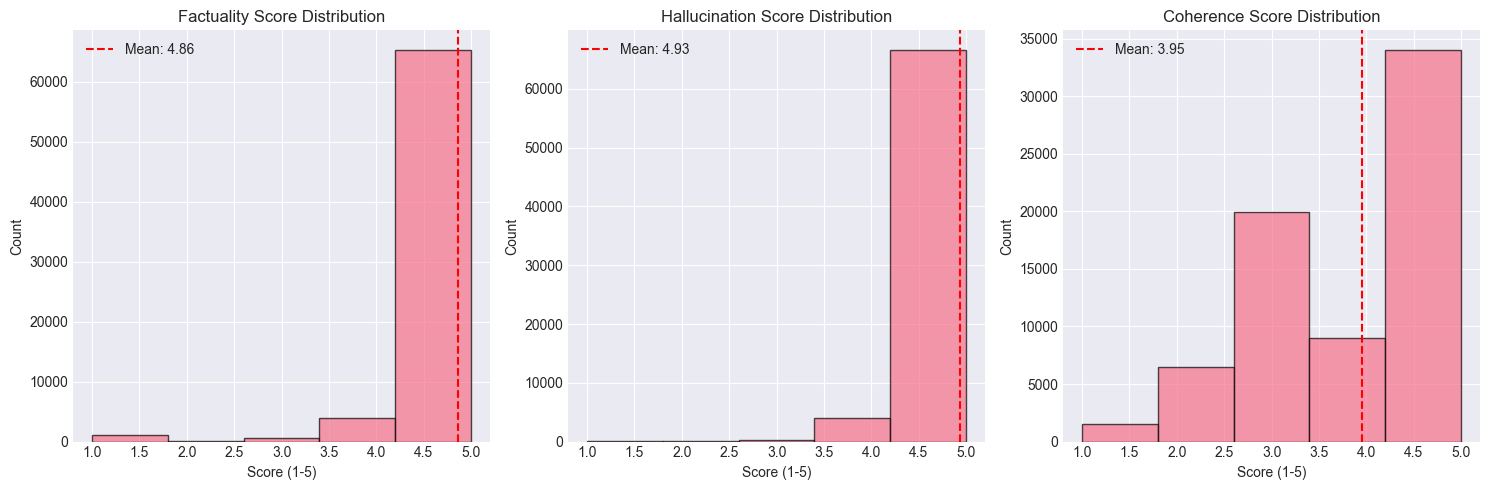

In [ ]:
# Figure 1: LLM Judge Score Distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ["factuality_score", "hallucination_score", "coherence_score"]
titles = ["Factuality", "Hallucination", "Coherence"]

for i, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[i]
    llm_judge_df[metric].hist(bins=5, ax=ax, edgecolor="black", alpha=0.7)

    ax.set_xlabel("Score (1-5)")
    ax.set_ylabel("Count")
    ax.set_title(f"{title} Score Distribution")
    ax.axvline(
        llm_judge_df[metric].mean(),
        color="red",
        linestyle="--",
        label=f"Mean: {llm_judge_df[metric].mean():.2f}",
    )
    ax.legend()

plt.tight_layout()
plt.savefig(results_dir / "llm_judge_distribution.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


In [ ]:
# Save all aggregated data
llm_judge_summary.to_csv(results_dir / "llm_judge_summary.csv", index=False)
kv_extraction_summary.to_csv(results_dir / "kv_extraction_summary.csv", index=False)
unit_time_summary.to_csv(results_dir / "unit_time_summary.csv", index=False)
with open(results_dir / "overall_statistics.json", "w") as f:
    json.dump(overall_stats, f, indent=2)


# Error analysis from unit-time accuracy and filtering a subset to analyze further. 

## Helper funcs to extract the sub-classes 

In [ ]:
class PrecisionSubsetExtractor:
    """Extract subsets of data based on temporal precision thresholds for debugging."""

    def __init__(
        self,
        meta_csv_path: str,
        output_base_path: str = "../data/precision_debug_subset",
    ):
        self.meta_csv_path = Path(meta_csv_path)
        self.output_base_path = Path(output_base_path)
        self.output_base_path.mkdir(exist_ok=True, parents=True)

        # load the metadata:
        self.meta_df = pd.read_csv(self.meta_csv_path)

    def extract_problematic_rows(
        self,
        eval_csv_path: str,
        precision_threshold: float,
        metric_column: str = "tmp_precision",
    ) -> pd.DataFrame:
        eval_df = pd.read_csv(eval_csv_path)

        # Filter rows - handle NaN
        problematic_df = eval_df[
            (eval_df[metric_column].notna())
            & (eval_df[metric_column] < precision_threshold)
        ]
        return problematic_df

    def create_subset_dataset(
        self,
        dataset_name: str,
        precision_threshold: float,
        eval_column: str,
        metric_column: str = "tmp_precision",
    ) -> Dict:
        dataset_row = self.meta_df[self.meta_df["dataset_name"] == dataset_name]
        if len(dataset_row) == 0:
            raise ValueError(f"Dataset {dataset_name} not found in the metadata.")

        dataset_info = dataset_row.iloc[0]
        try:
            eval_csv_path = dataset_info[
                eval_column
            ]  # Use dataset_info instead of dataset_row
            problematic_df = self.extract_problematic_rows(
                eval_csv_path, precision_threshold, metric_column
            )
        except (
            ValueError,
            KeyError,
        ) as e:  # Also catch KeyError in case column doesn't exist
            print(f"Eval CSV not found in: {dataset_name} ==> {eval_column}")
            print(f"Error: {e}")
            return {}

        if len(problematic_df) == 0:
            print(f"No rows found with {metric_column} < {precision_threshold}")
            return {}

        # Get unique row indicies:
        problematic_indices = problematic_df["row_idx"].unique()
        print(
            f"Found {len(problematic_indices)} problmenatic rows out of {len(problematic_df)} evaluations"
        )

        # Create output directory:
        subset_name = f"{dataset_name}_precision_{int(precision_threshold*100)}_subset"
        split = Path(dataset_info["ground_truth_csv_path"]).parent.name
        output_dir = self.output_base_path / split / subset_name
        output_dir.mkdir(parents=True, exist_ok=True)

        # create a subset of the original data:
        original_df = pd.read_csv(dataset_info["ground_truth_csv_path"])
        original_subset = original_df.iloc[problematic_indices].reset_index(drop=True)
        original_subset_path = output_dir / f"{dataset_name}_ground_truth_subset.csv"
        original_subset.to_csv(original_subset_path, index=False)

        # create subset of generated reports:
        generated_df = pd.read_csv(dataset_info["generated_reports_csv_path"])
        generated_subset = generated_df.iloc[problematic_indices].reset_index(drop=True)
        generated_subset_path = output_dir / f"{dataset_name}_generated_subset.csv"
        generated_subset.to_csv(generated_subset_path, index=False)

        # copy planned reports as is:
        planned_path = Path(dataset_info["report_types_csv_path"])
        planned_subset_path = output_dir / f"{dataset_name}_report_types_subset.csv"
        shutil.copy(planned_path, planned_subset_path)

        eval_subset_path = output_dir / f"{dataset_name}_eval_subset.csv"
        problematic_df.to_csv(eval_subset_path, index=False)

        # Create meta CSV for the subset
        subset_meta = pd.DataFrame(
            [
                {
                    "dataset_name": subset_name,
                    "ground_truth_csv_path": str(original_subset_path),
                    "report_types_csv_path": str(planned_subset_path),
                    "generated_reports_csv_path": str(generated_subset_path),
                    "eval_results_path": str(eval_subset_path),
                    "parent_dataset": dataset_name,
                    "precision_threshold": precision_threshold,
                    "metric_column": metric_column,
                    "num_rows": len(problematic_indices),
                    "original_num_rows": len(original_df),
                }
            ]
        )

        meta_path = output_dir / "subset_metadata.csv"
        subset_meta.to_csv(meta_path, index=False)

        # calculate stats:
        stats = self.calculate_subset_statistics(
            eval_csv_path, problematic_indices, metric_column
        )
        # Save statistics:
        stats_path = output_dir / "subset_stats.json"
        with open(stats_path, "w") as f:
            json.dump(stats, f, indent=2)

        print(f"\nSubset created in: {output_dir}")
        print(f"Original rows: {len(original_df)}")
        print(f"Subset rows: {len(problematic_indices)}")
        print(f"Percentage: {len(problematic_indices)/len(original_df)*100:.1f}%")

        return {
            "output_dir": output_dir,
            "stats": stats,
            "problematic_indices": problematic_indices,
        }

    def calculate_subset_statistics(
        self, eval_csv_path: str, excluded_indices: np.ndarray, metric_column: str
    ) -> Dict:
        # with and without metrics exctrated how it does:

        eval_df = pd.read_csv(eval_csv_path)

        # Original statistics
        orig_stats = {
            "total_rows": len(eval_df["row_idx"].unique()),
            "total_evaluations": len(eval_df),
            "numeric_mean_precision": eval_df["num_precision"].mean(),
            "numeric_mean_recall": eval_df["num_recall"].mean(),
            "numeric_mean_f1": eval_df["num_f1"].mean(),
            "temporal_mean_precision": eval_df["tmp_precision"].mean(),
            "temporal_mean_recall": eval_df["tmp_recall"].mean(),
            "temporal_mean_f1": eval_df["tmp_f1"].mean(),
        }
        # Statistics after exclusion
        clean_df = eval_df[~eval_df["row_idx"].isin(excluded_indices)]

        clean_stats = {
            "total_rows": len(clean_df["row_idx"].unique()),
            "total_evaluations": len(clean_df),
            "numeric_mean_precision": clean_df["num_precision"].mean(),
            "numeric_mean_recall": clean_df["num_recall"].mean(),
            "numeric_mean_f1": clean_df["num_f1"].mean(),
            "temporal_mean_precision": clean_df["tmp_precision"].mean(),
            "temporal_mean_recall": clean_df["tmp_recall"].mean(),
            "temporal_mean_f1": clean_df["tmp_f1"].mean(),
        }
        # Calculate improvements
        improvements = {
            "rows_excluded": len(excluded_indices),
            "rows_excluded_pct": len(excluded_indices) / orig_stats["total_rows"] * 100,
            "temporal_precision_improvement": clean_stats["temporal_mean_precision"]
            - orig_stats["temporal_mean_precision"],
            "temporal_f1_improvement": clean_stats["temporal_mean_f1"]
            - orig_stats["temporal_mean_f1"],
        }
        return {
            "original": orig_stats,
            "after_exclusion": clean_stats,
            "improvements": improvements,
        }


## Analyze eval results:

## Extract the problematic rows for diffrent tresholds: 

In [ ]:
extractor = PrecisionSubsetExtractor(
    meta_csv_path=meta_csv_path,
    output_base_path=results_dir,
)


## Aggregate analysis on how many of the threshold columns will remain to decide how to threshold and filter it


Processing: 00011_AdverseDrugReactionsHospitalAdmissions___AdverseDrugReactionCitations
/Users/satyanandakashyap/Library/CloudStorage/Box-Box/satyanandakashyap_macbookpro/Research/tada_hf_branch/data_ALL/eval_reports_SEC_WikiDB_subset/train/00011_AdverseDrugReactionsHospitalAdmissions___AdverseDrugReactionCitations_deepseek-chat-v3-0324_unit_time_gemini-2_5-flash-lite-preview-06-17.csv
1316


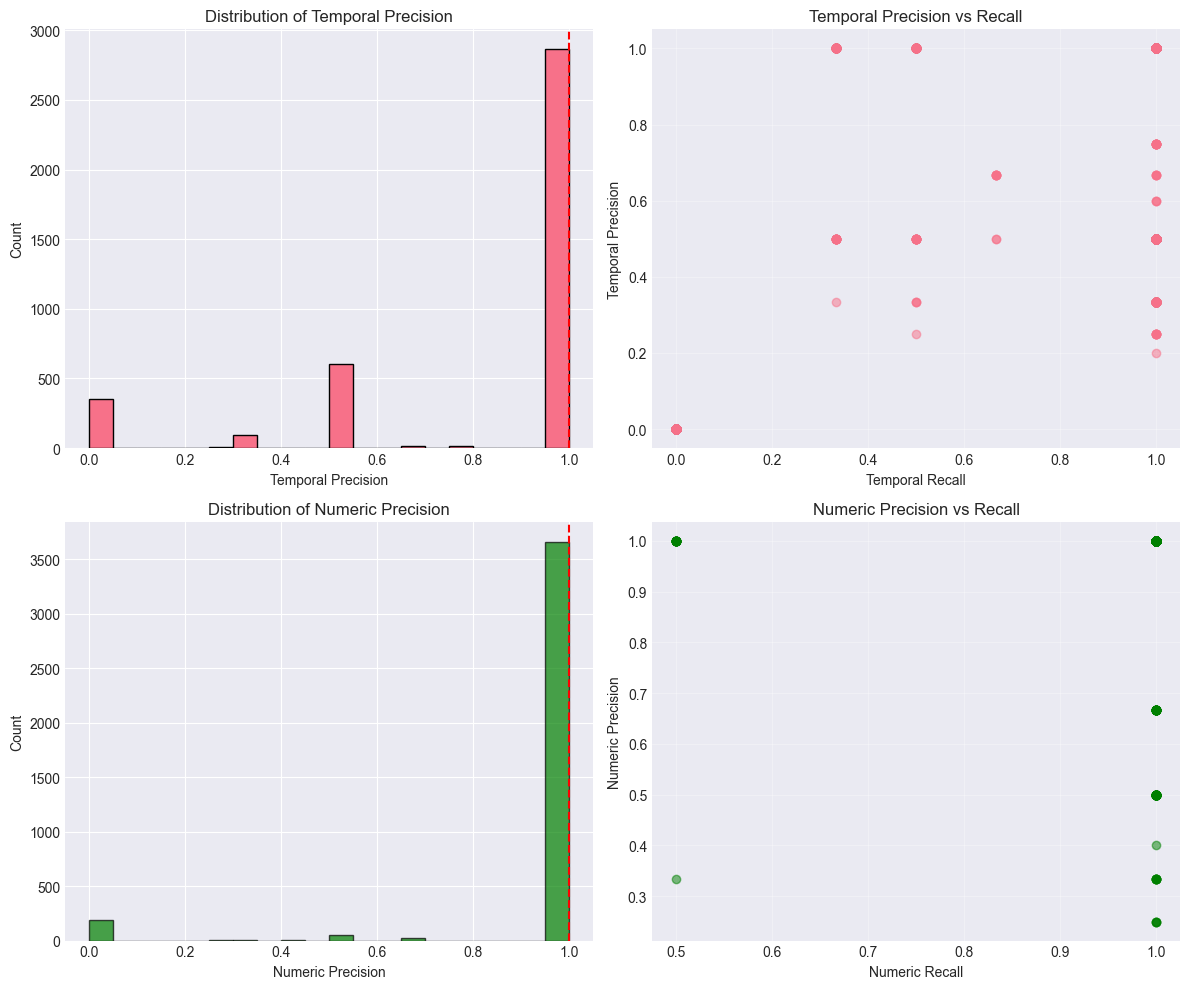

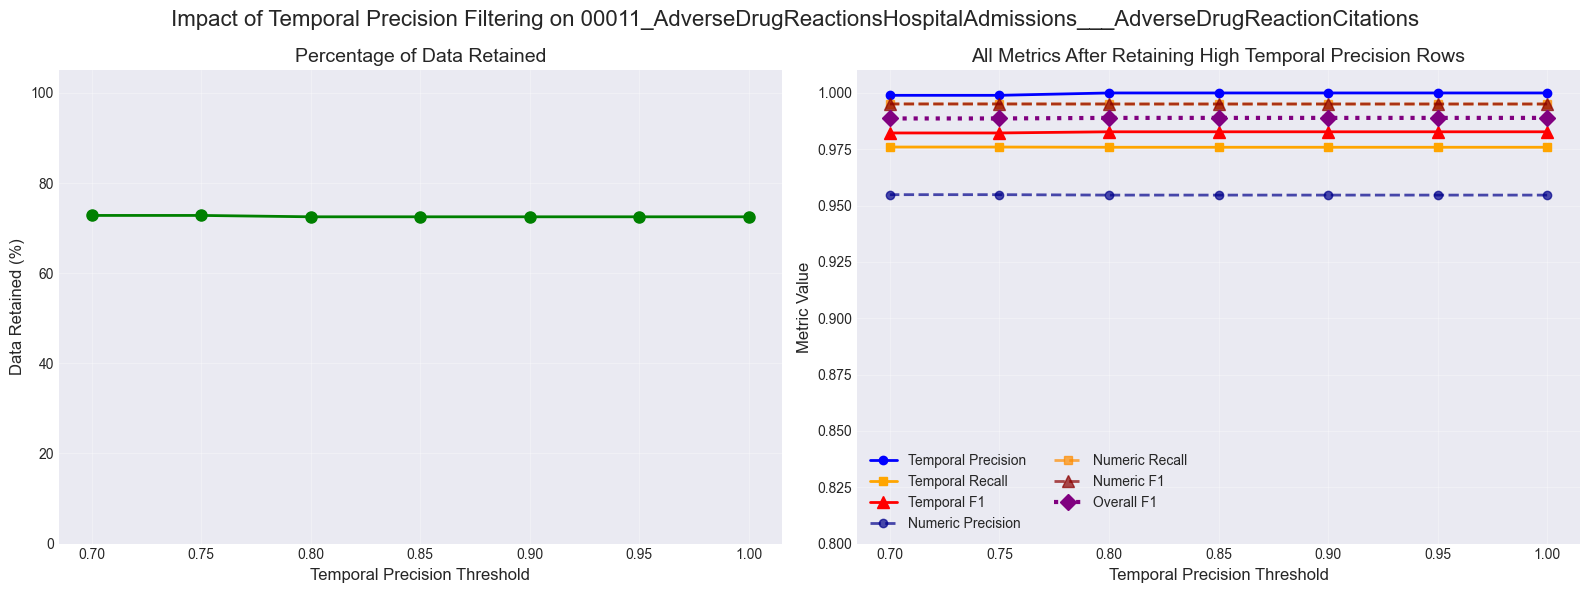

Original dataset size: 3948 rows
Original Unique rows: 1316

Original metrics before thresholding
    Temporal Precision: 0.815
    Temporal Recall: 0.888
    Temporal F1: 0.831
    Numeric Precision: 0.941
    Numeric Recall: 0.995
    Numeric F1: 0.991
    Overall F1: 0.911

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       2863         72.5         0.983      0.995      0.989     
0.95       2863         72.5         0.983      0.995      0.989     
0.90       2863         72.5         0.983      0.995      0.989     
0.85       2863         72.5         0.983      0.995      0.989     
0.80       2863         72.5         0.983      0.995      0.989     
0.75       2875         72.8         0.982      0.995      0.989     
0.70       2875         72.8         0.982      0.995      0.989     

Processing: 00046_JOURNAL_OF_PARALLEL_AND_DISTRIBUTED_COMPUTI

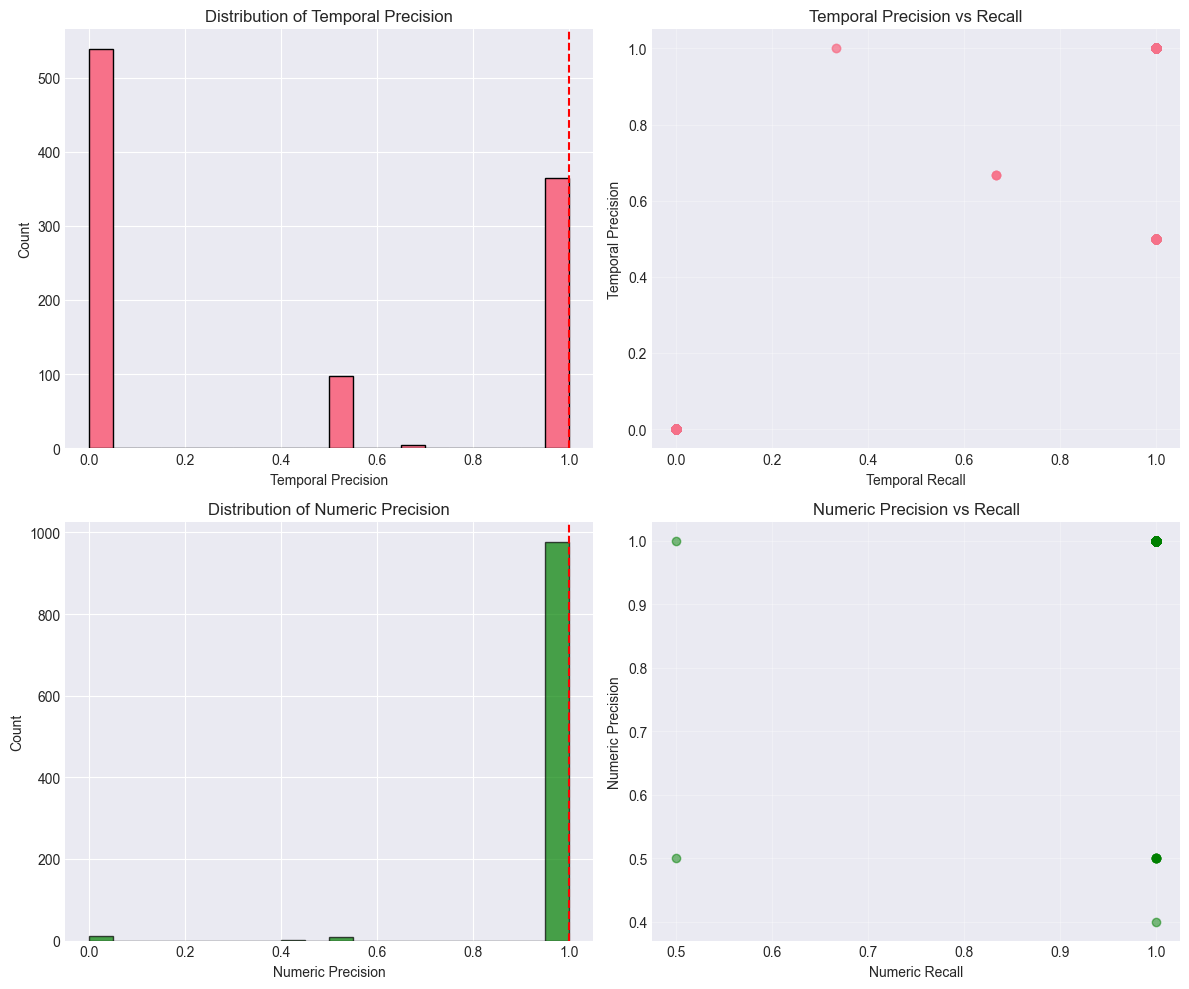

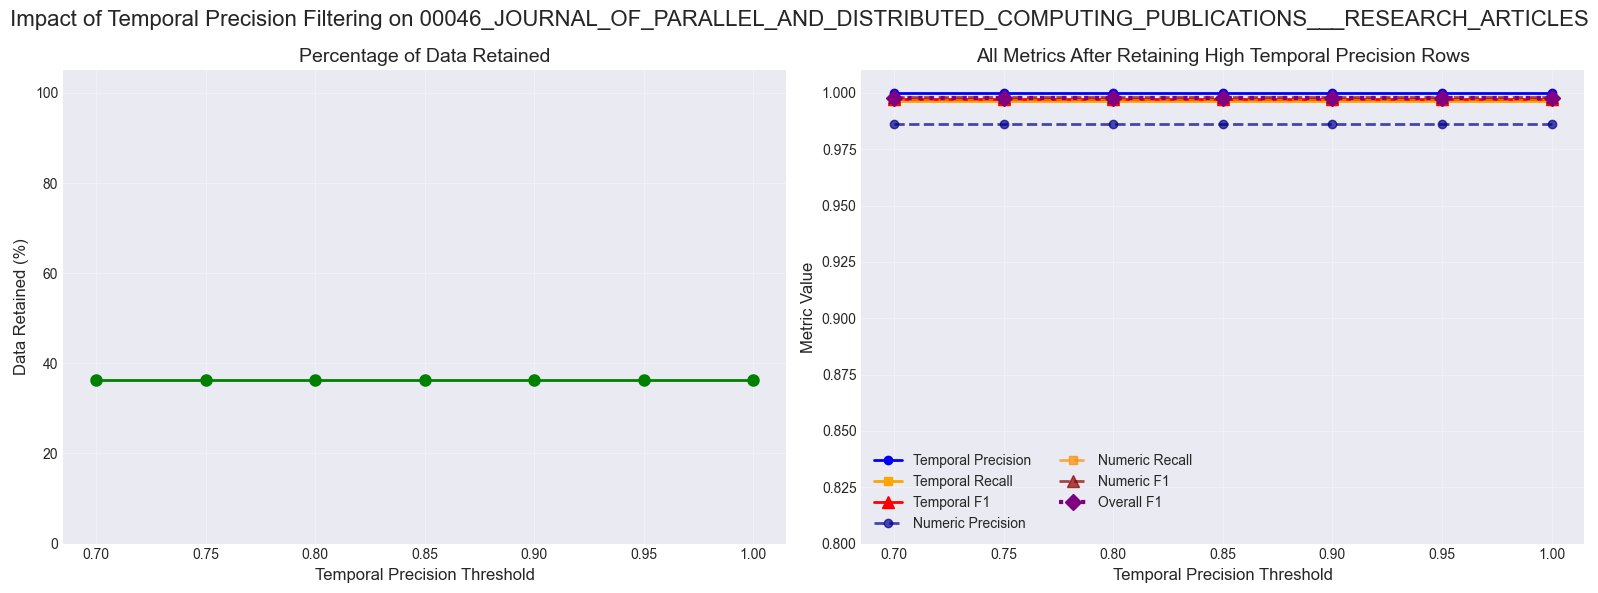

Original dataset size: 1005 rows
Original Unique rows: 335

Original metrics before thresholding
    Temporal Precision: 0.415
    Temporal Recall: 0.461
    Temporal F1: 0.430
    Numeric Precision: 0.984
    Numeric Recall: 0.991
    Numeric F1: 0.996
    Overall F1: 0.713

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       365          36.3         0.997      0.998      0.998     
0.95       365          36.3         0.997      0.998      0.998     
0.90       365          36.3         0.997      0.998      0.998     
0.85       365          36.3         0.997      0.998      0.998     
0.80       365          36.3         0.997      0.998      0.998     
0.75       365          36.3         0.997      0.998      0.998     
0.70       365          36.3         0.997      0.998      0.998     

Processing: 00074_SemiconductorScienceTechnologyPublications__

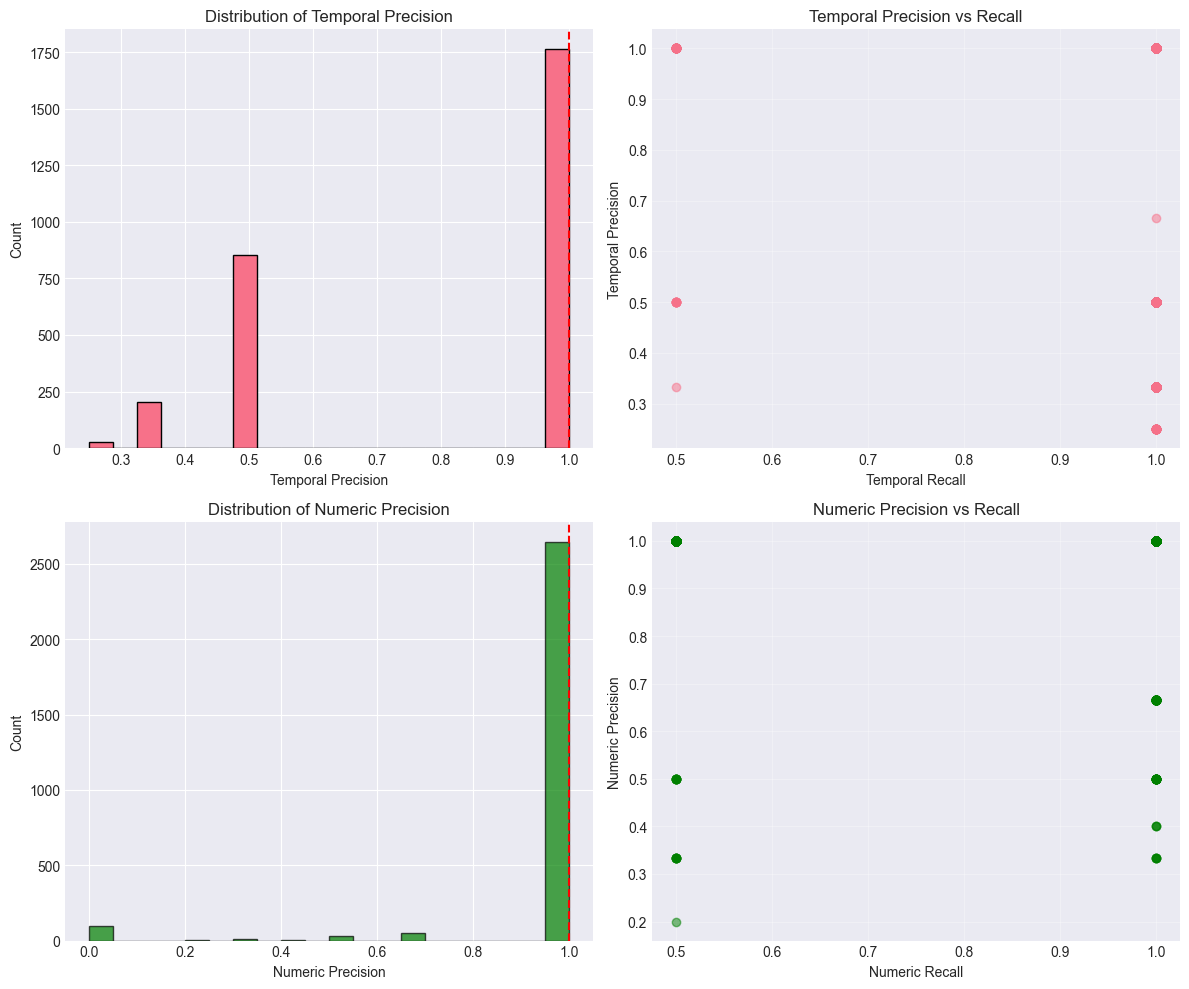

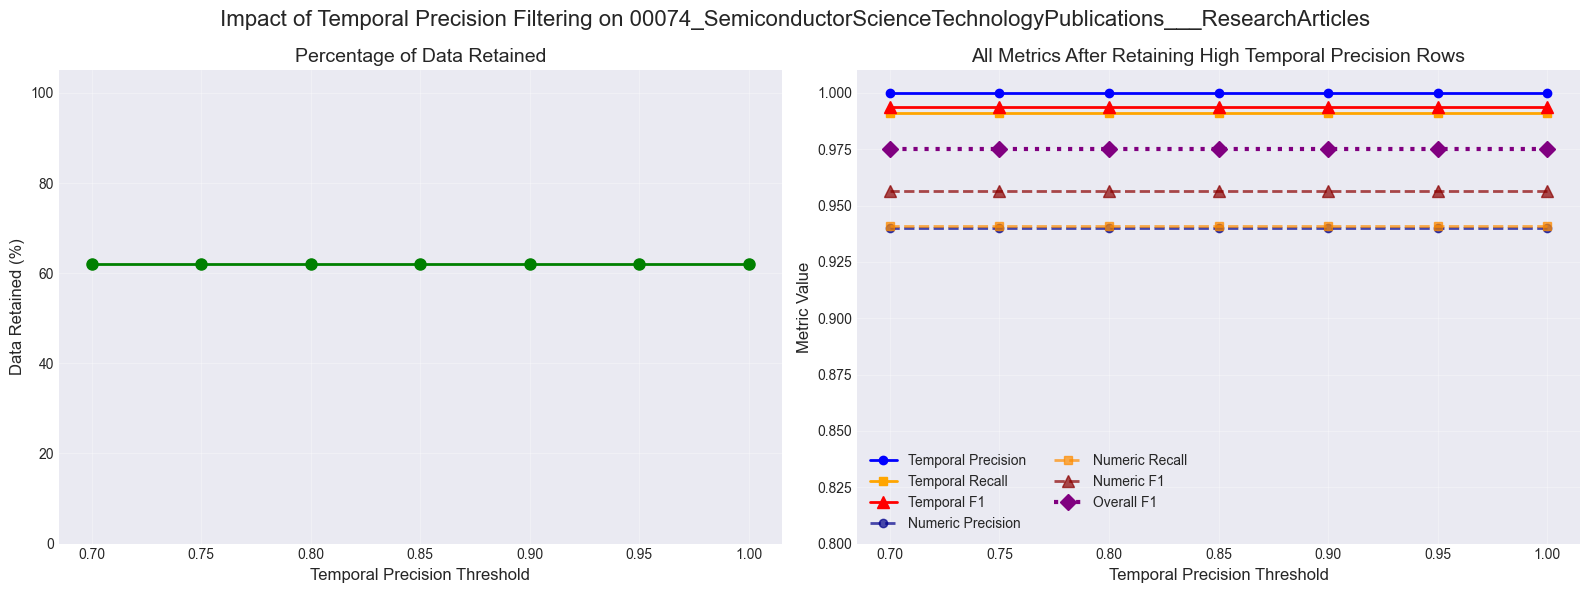

Original dataset size: 2844 rows
Original Unique rows: 948

Original metrics before thresholding
    Temporal Precision: 0.796
    Temporal Recall: 0.993
    Temporal F1: 0.855
    Numeric Precision: 0.952
    Numeric Recall: 0.902
    Numeric F1: 0.927
    Overall F1: 0.891

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       1762         62.0         0.994      0.957      0.975     
0.95       1762         62.0         0.994      0.957      0.975     
0.90       1762         62.0         0.994      0.957      0.975     
0.85       1762         62.0         0.994      0.957      0.975     
0.80       1762         62.0         0.994      0.957      0.975     
0.75       1762         62.0         0.994      0.957      0.975     
0.70       1762         62.0         0.994      0.957      0.975     

Processing: 01361_NmrSpectroscopyProjectDescriptions___NmrSpec

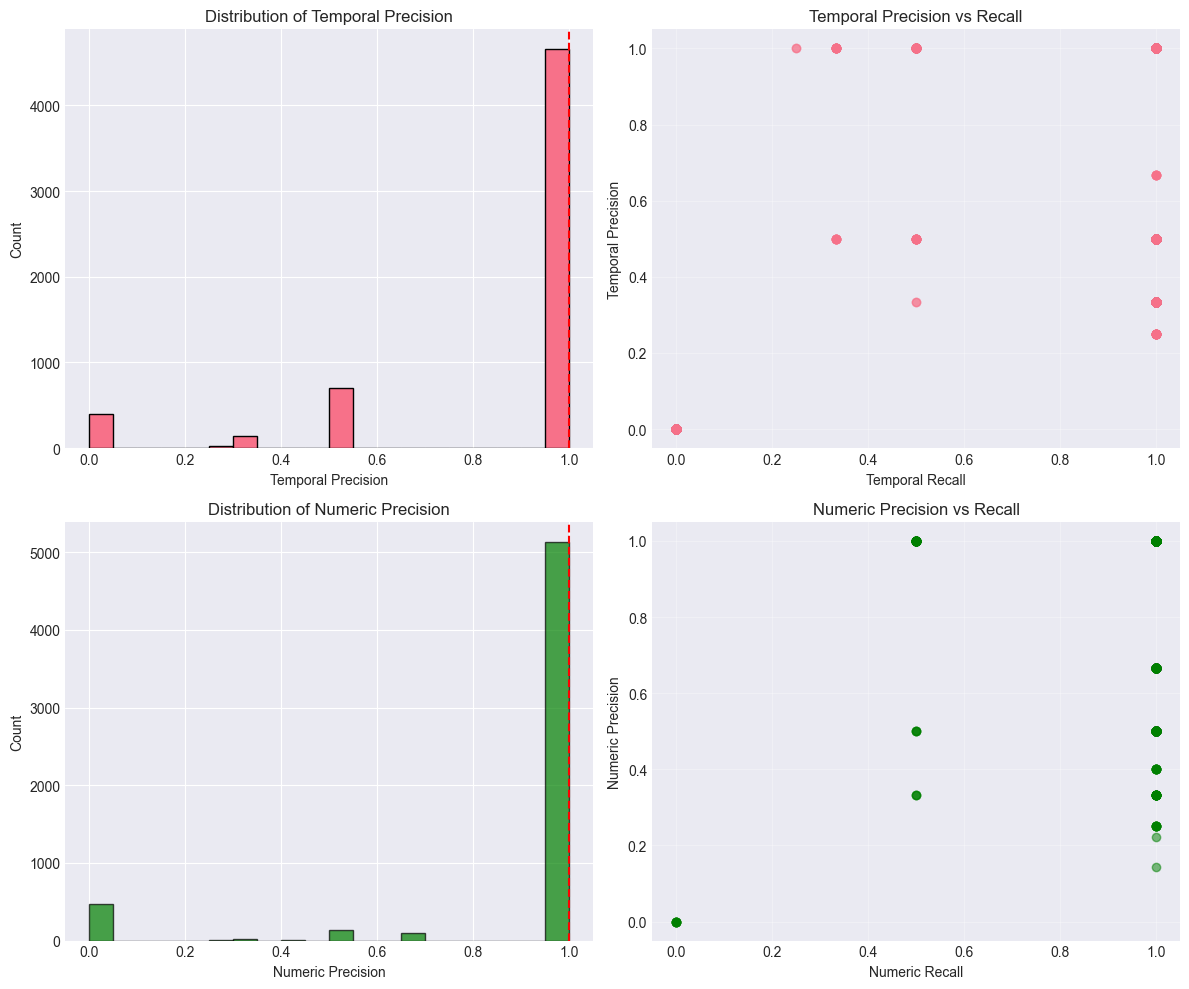

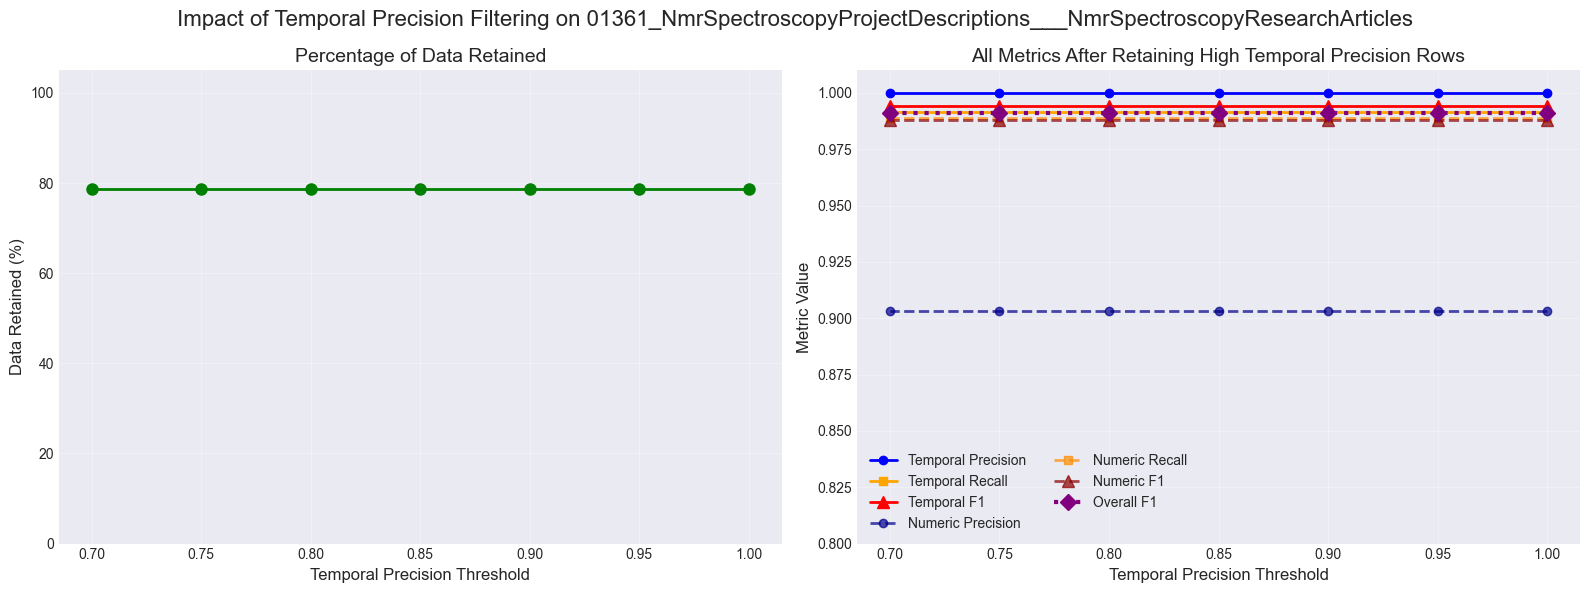

Original dataset size: 5918 rows
Original Unique rows: 1973

Original metrics before thresholding
    Temporal Precision: 0.855
    Temporal Recall: 0.923
    Temporal F1: 0.874
    Numeric Precision: 0.898
    Numeric Recall: 0.988
    Numeric F1: 0.979
    Overall F1: 0.927

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       4653         78.6         0.994      0.988      0.991     
0.95       4653         78.6         0.994      0.988      0.991     
0.90       4653         78.6         0.994      0.988      0.991     
0.85       4653         78.6         0.994      0.988      0.991     
0.80       4653         78.6         0.994      0.988      0.991     
0.75       4653         78.6         0.994      0.988      0.991     
0.70       4653         78.6         0.994      0.988      0.991     

Processing: 01769_Cinematography_Research_Database___Cinemato

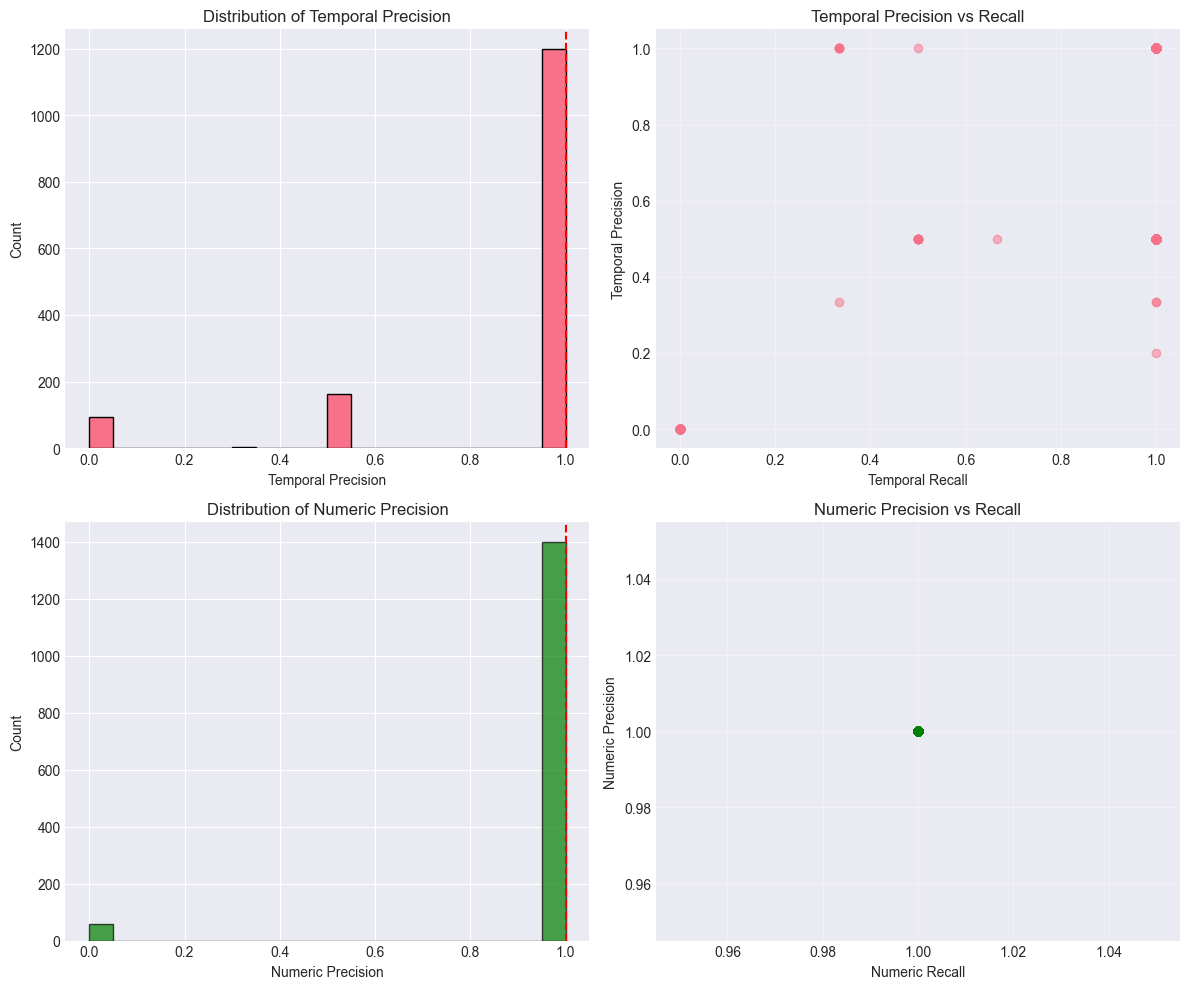

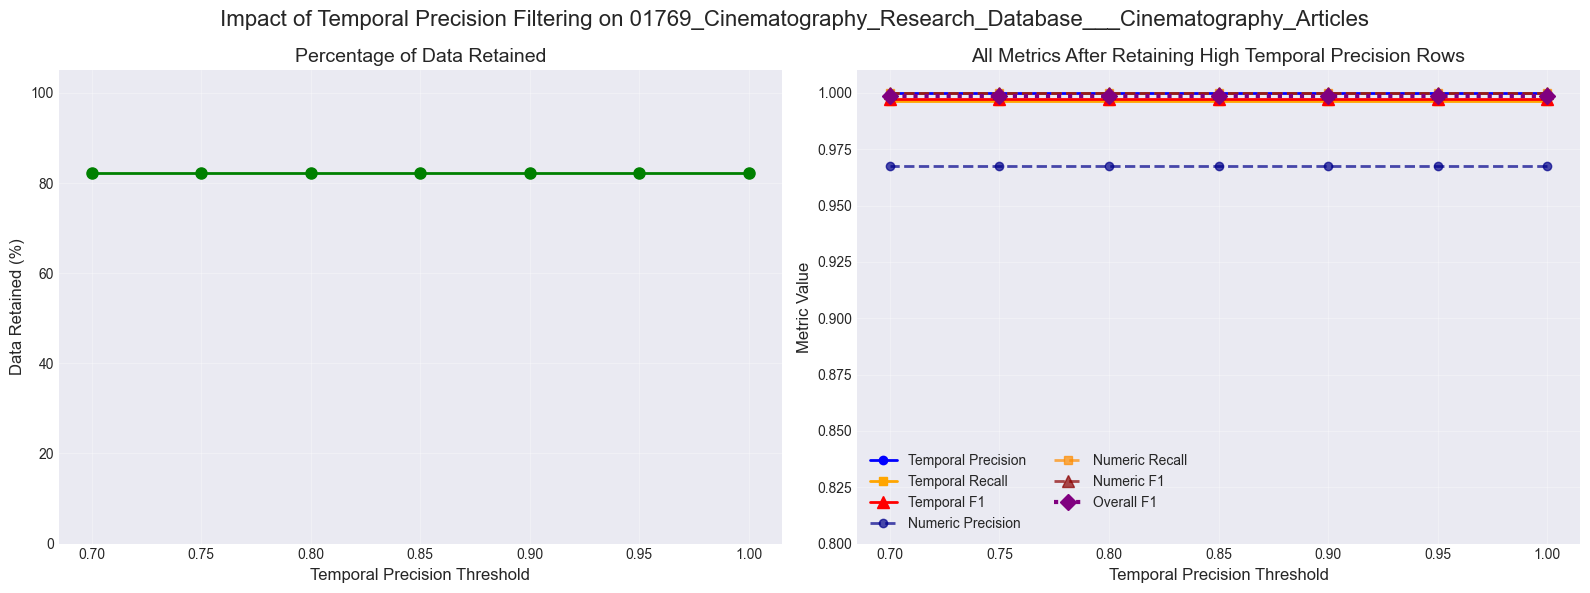

Original dataset size: 1458 rows
Original Unique rows: 486

Original metrics before thresholding
    Temporal Precision: 0.879
    Temporal Recall: 0.946
    Temporal F1: 0.910
    Numeric Precision: 0.960
    Numeric Recall: 1.000
    Numeric F1: 1.000
    Overall F1: 0.955

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       1198         82.2         0.997      1.000      0.999     
0.95       1198         82.2         0.997      1.000      0.999     
0.90       1198         82.2         0.997      1.000      0.999     
0.85       1198         82.2         0.997      1.000      0.999     
0.80       1198         82.2         0.997      1.000      0.999     
0.75       1198         82.2         0.997      1.000      0.999     
0.70       1198         82.2         0.997      1.000      0.999     

Processing: 02049_nikolai_evgenievich_tyurin_publications___sc

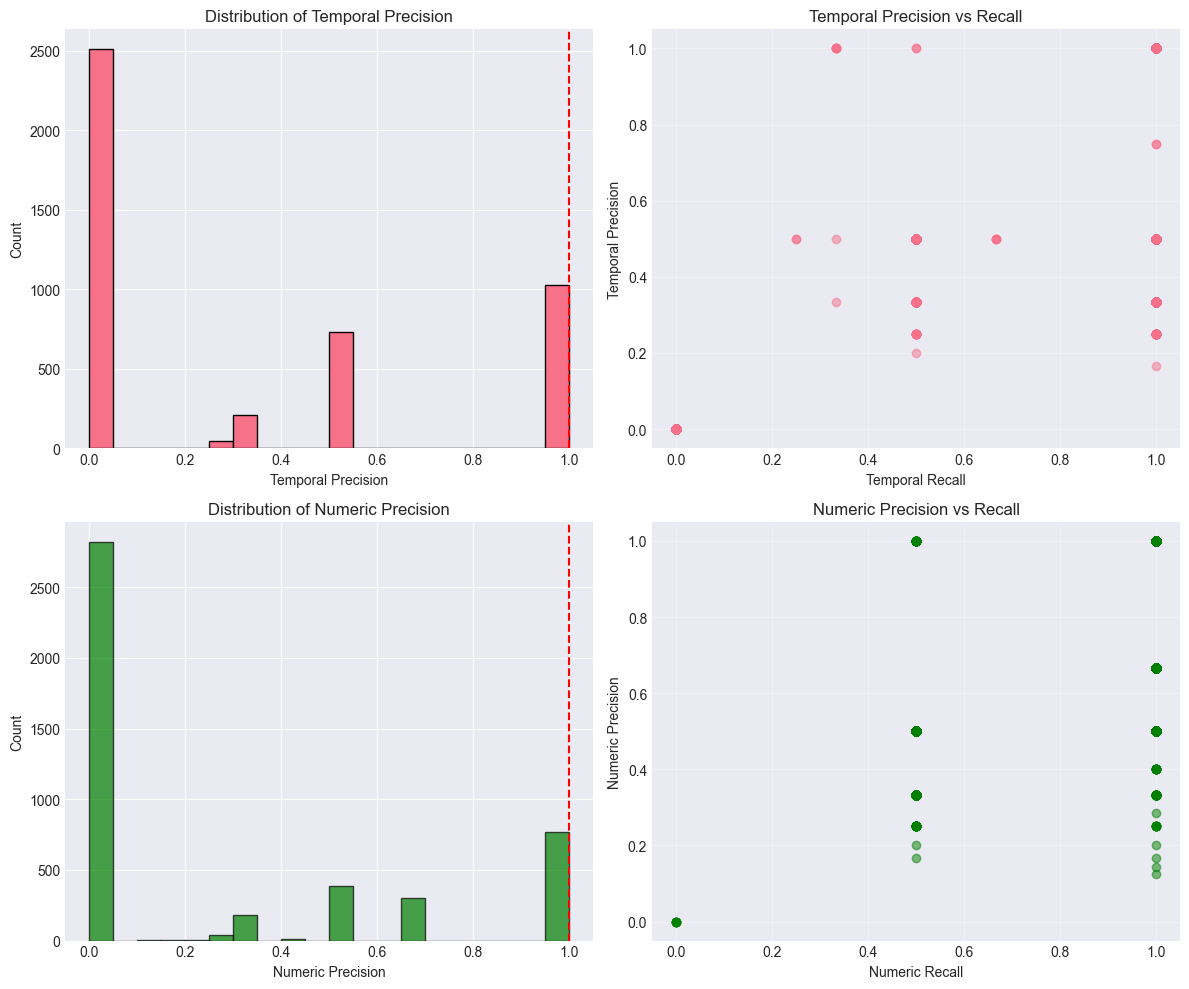

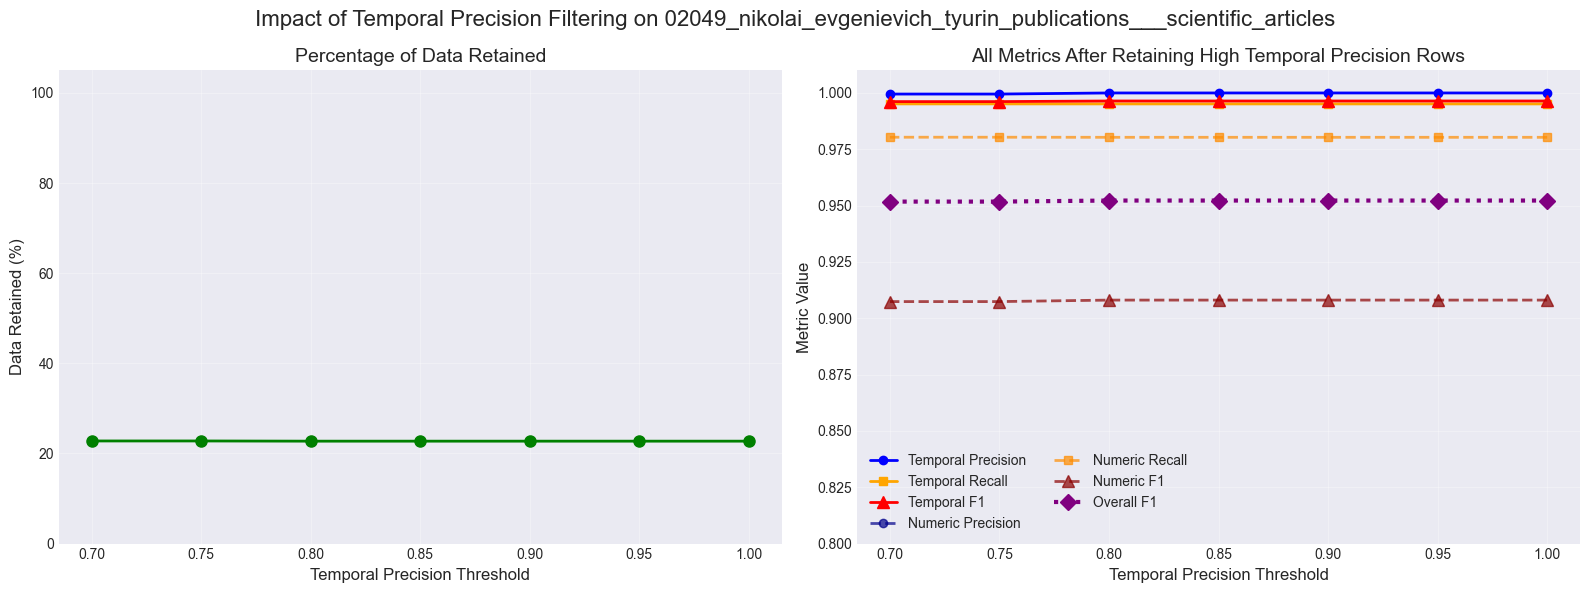

Original dataset size: 4523 rows
Original Unique rows: 1131

Original metrics before thresholding
    Temporal Precision: 0.326
    Temporal Recall: 0.403
    Temporal F1: 0.349
    Numeric Precision: 0.275
    Numeric Recall: 0.879
    Numeric F1: 0.777
    Overall F1: 0.563

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       1028         22.7         0.996      0.908      0.952     
0.95       1028         22.7         0.996      0.908      0.952     
0.90       1028         22.7         0.996      0.908      0.952     
0.85       1028         22.7         0.996      0.908      0.952     
0.80       1028         22.7         0.996      0.908      0.952     
0.75       1030         22.8         0.996      0.907      0.952     
0.70       1030         22.8         0.996      0.907      0.952     

Processing: 02188_Reproductive_Health_Research_Db___Reproduct

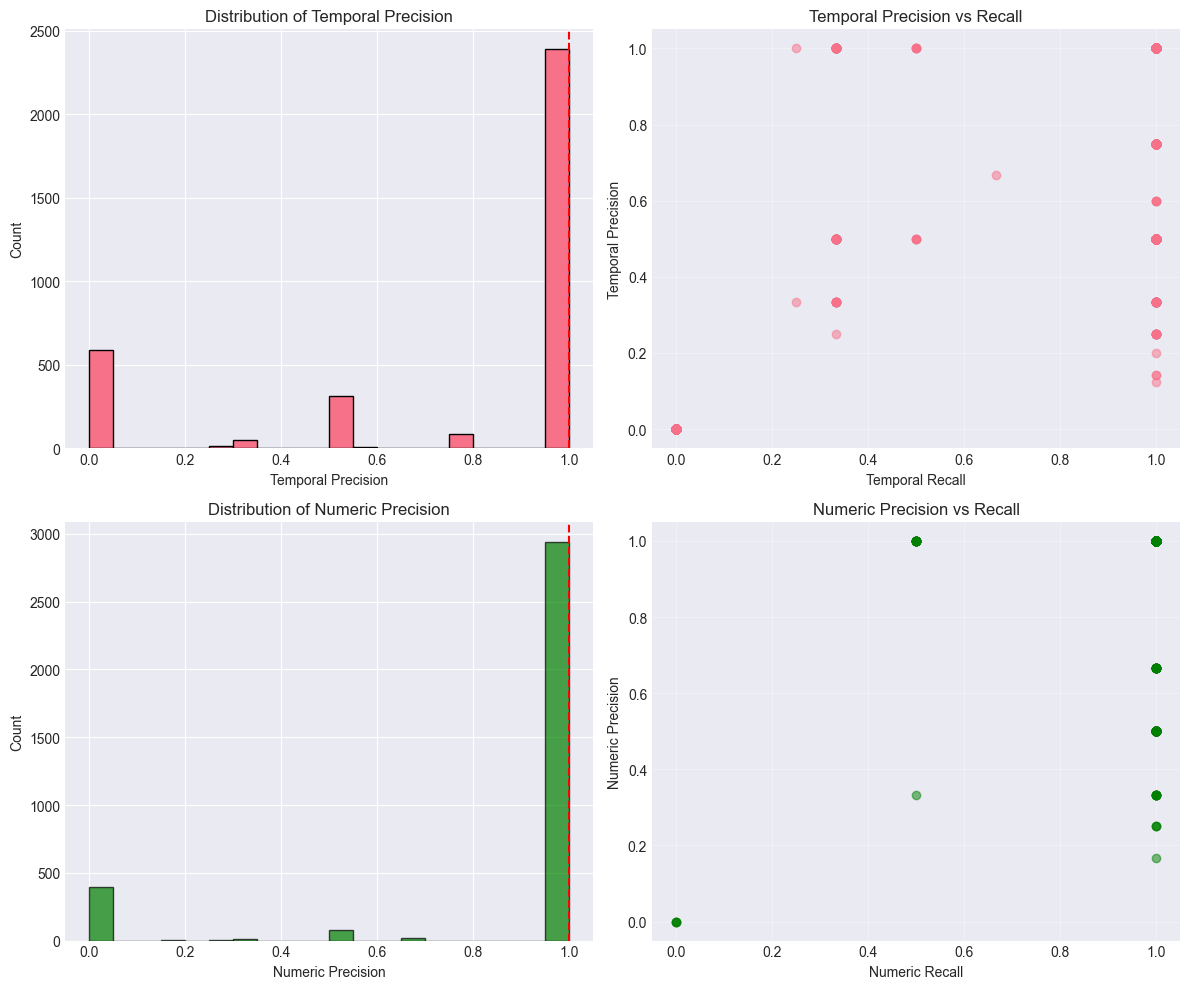

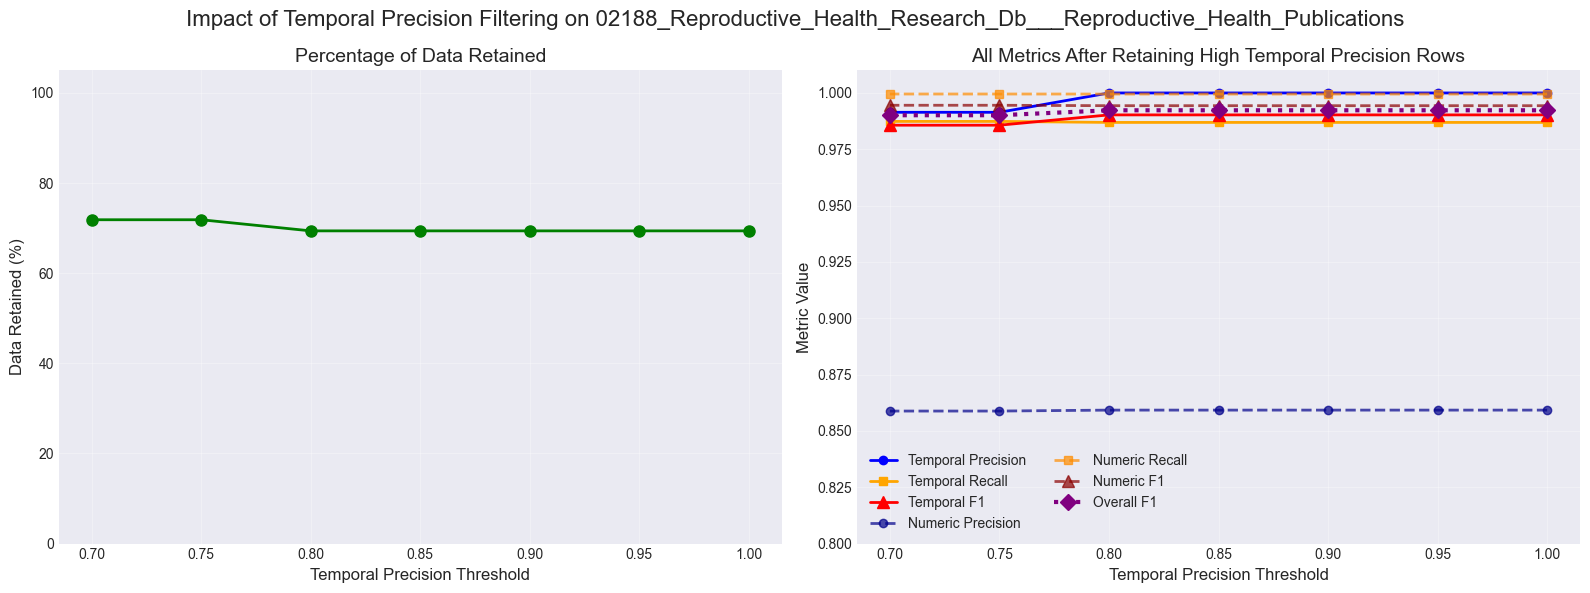

Original dataset size: 3444 rows
Original Unique rows: 1148

Original metrics before thresholding
    Temporal Precision: 0.765
    Temporal Recall: 0.811
    Temporal F1: 0.776
    Numeric Precision: 0.870
    Numeric Recall: 0.996
    Numeric F1: 0.985
    Overall F1: 0.880

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       2390         69.4         0.990      0.994      0.992     
0.95       2390         69.4         0.990      0.994      0.992     
0.90       2390         69.4         0.990      0.994      0.992     
0.85       2390         69.4         0.990      0.994      0.992     
0.80       2390         69.4         0.990      0.994      0.992     
0.75       2475         71.9         0.986      0.995      0.990     
0.70       2475         71.9         0.986      0.995      0.990     

Processing: 02652_Species_Vulnerability_To_Climate_Change___C

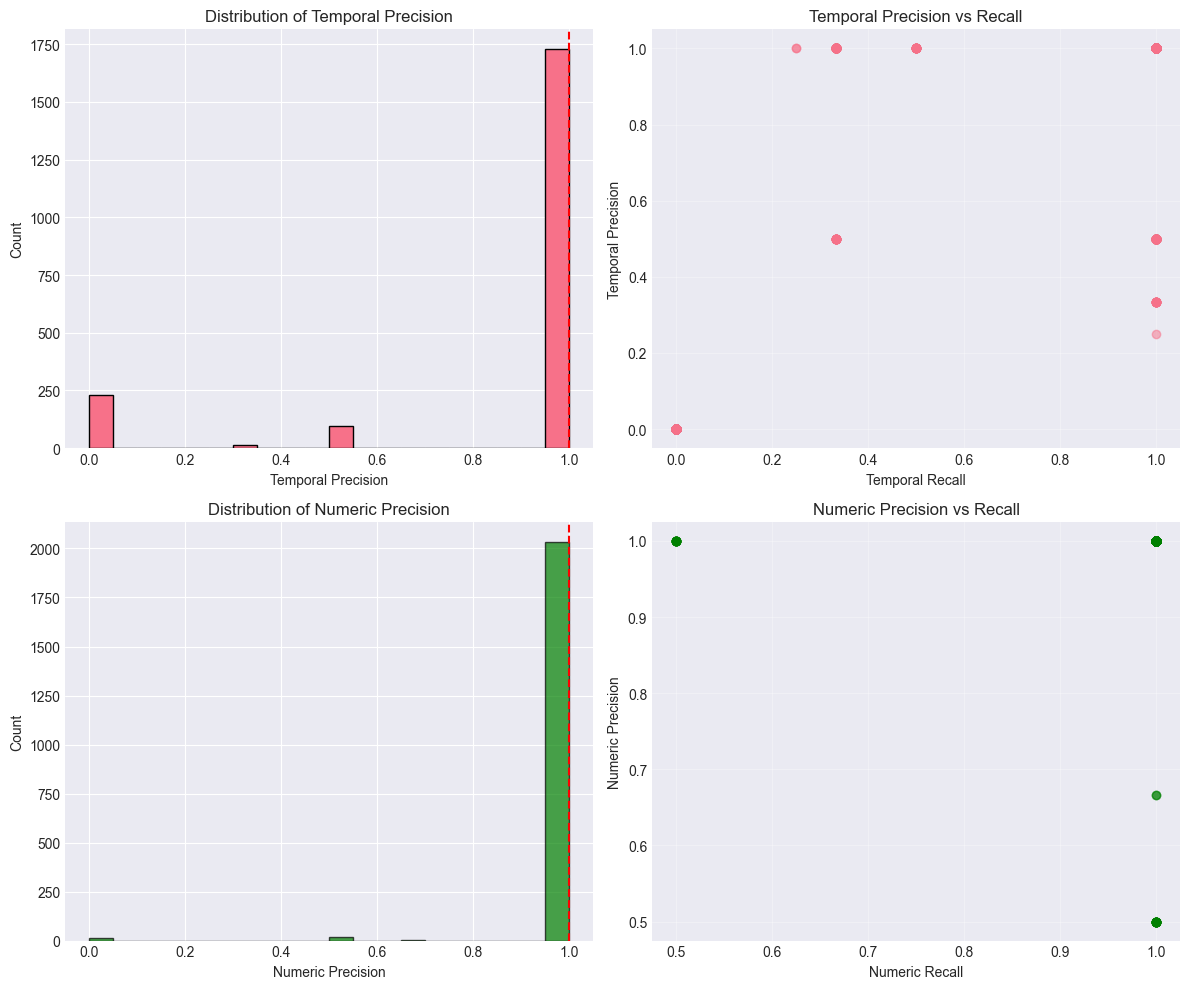

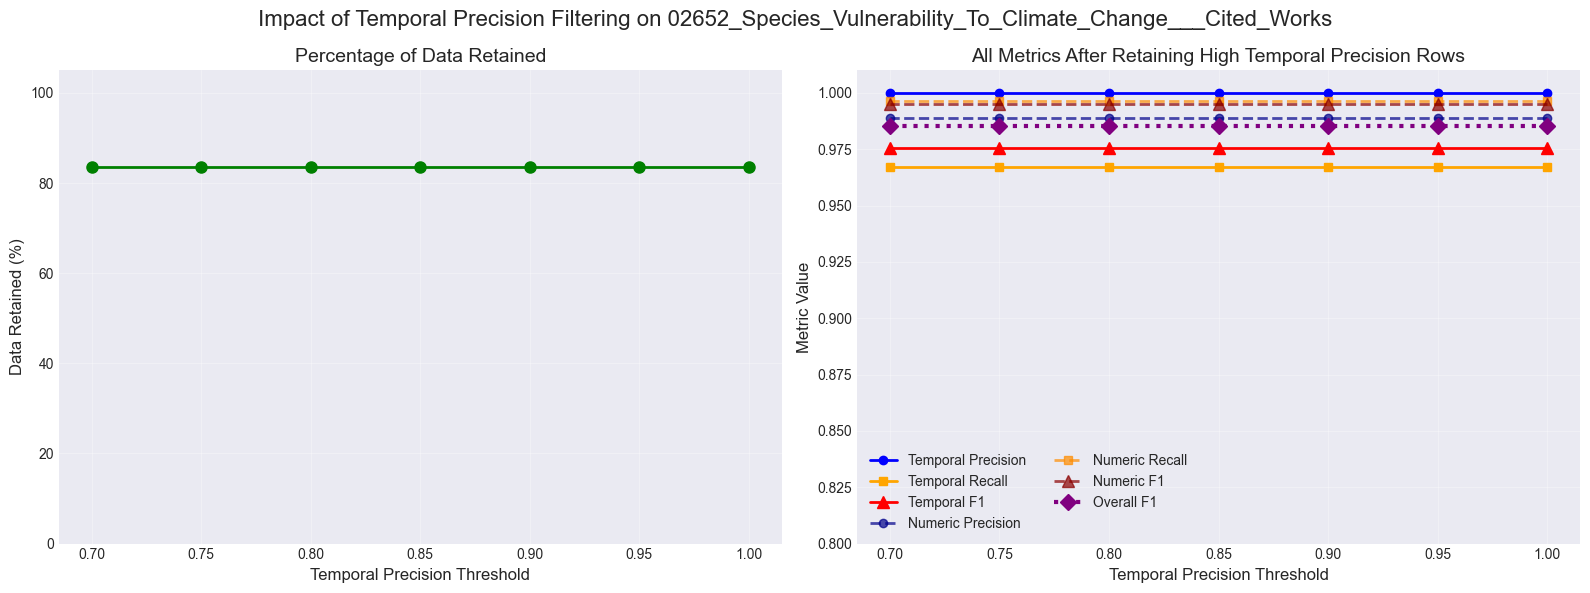

Original dataset size: 2068 rows
Original Unique rows: 517

Original metrics before thresholding
    Temporal Precision: 0.861
    Temporal Recall: 0.861
    Temporal F1: 0.852
    Numeric Precision: 0.988
    Numeric Recall: 0.997
    Numeric F1: 0.995
    Overall F1: 0.924

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       1728         83.6         0.976      0.995      0.985     
0.95       1728         83.6         0.976      0.995      0.985     
0.90       1728         83.6         0.976      0.995      0.985     
0.85       1728         83.6         0.976      0.995      0.985     
0.80       1728         83.6         0.976      0.995      0.985     
0.75       1728         83.6         0.976      0.995      0.985     
0.70       1728         83.6         0.976      0.995      0.985     

Processing: 03092_NorrkopingStJohannesBirthRecords___CountryMe

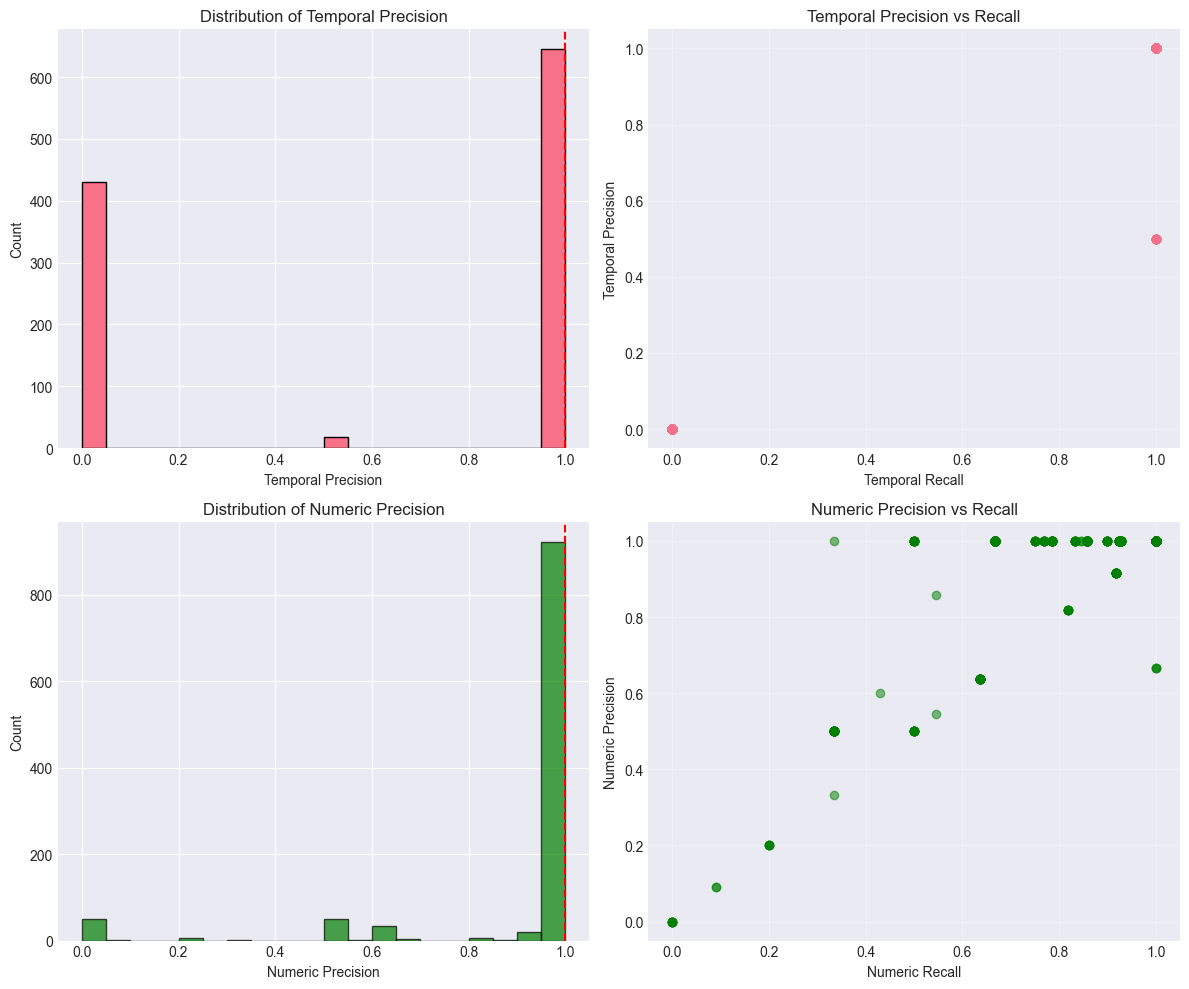

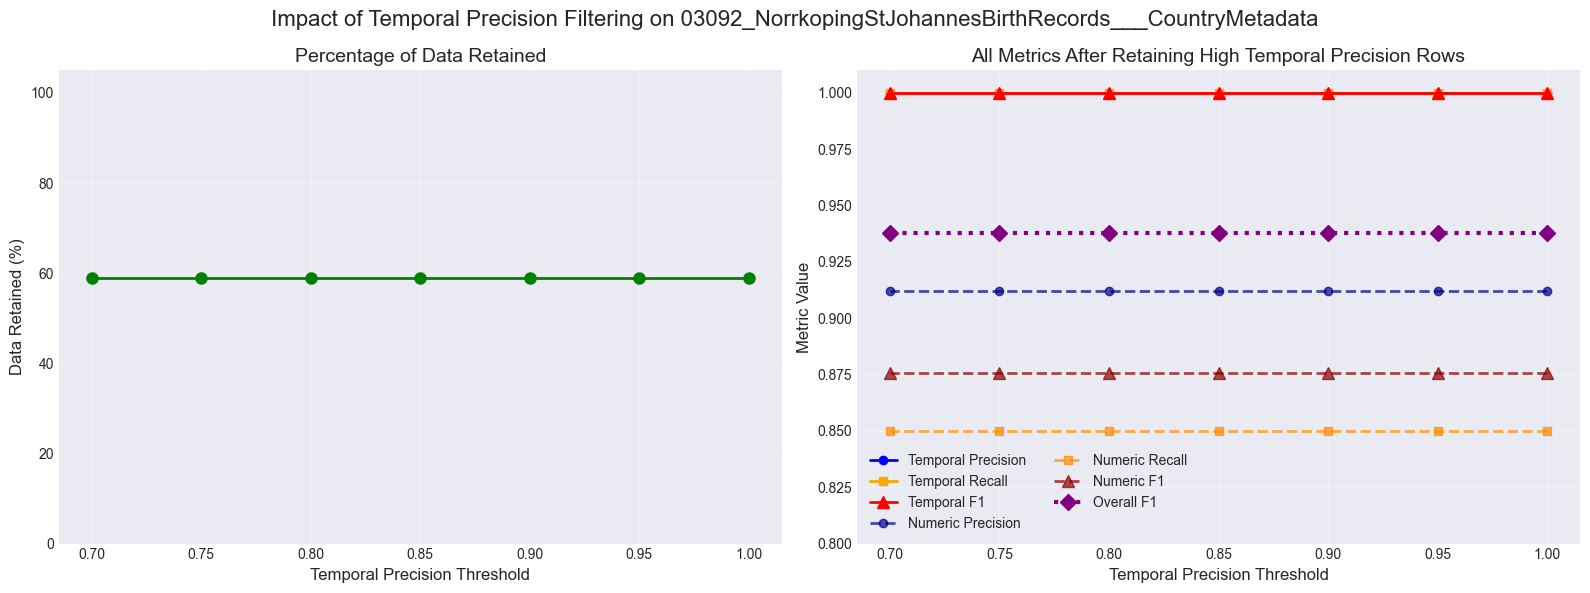

Original dataset size: 1095 rows
Original Unique rows: 219

Original metrics before thresholding
    Temporal Precision: 0.598
    Temporal Recall: 0.806
    Temporal F1: 0.800
    Numeric Precision: 0.910
    Numeric Recall: 0.879
    Numeric F1: 0.907
    Overall F1: 0.854

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       645          58.9         1.000      0.876      0.938     
0.95       645          58.9         1.000      0.876      0.938     
0.90       645          58.9         1.000      0.876      0.938     
0.85       645          58.9         1.000      0.876      0.938     
0.80       645          58.9         1.000      0.876      0.938     
0.75       645          58.9         1.000      0.876      0.938     
0.70       645          58.9         1.000      0.876      0.938     

Processing: 04657_NeuroscienceOfTinnitusResearch___ResearchArt

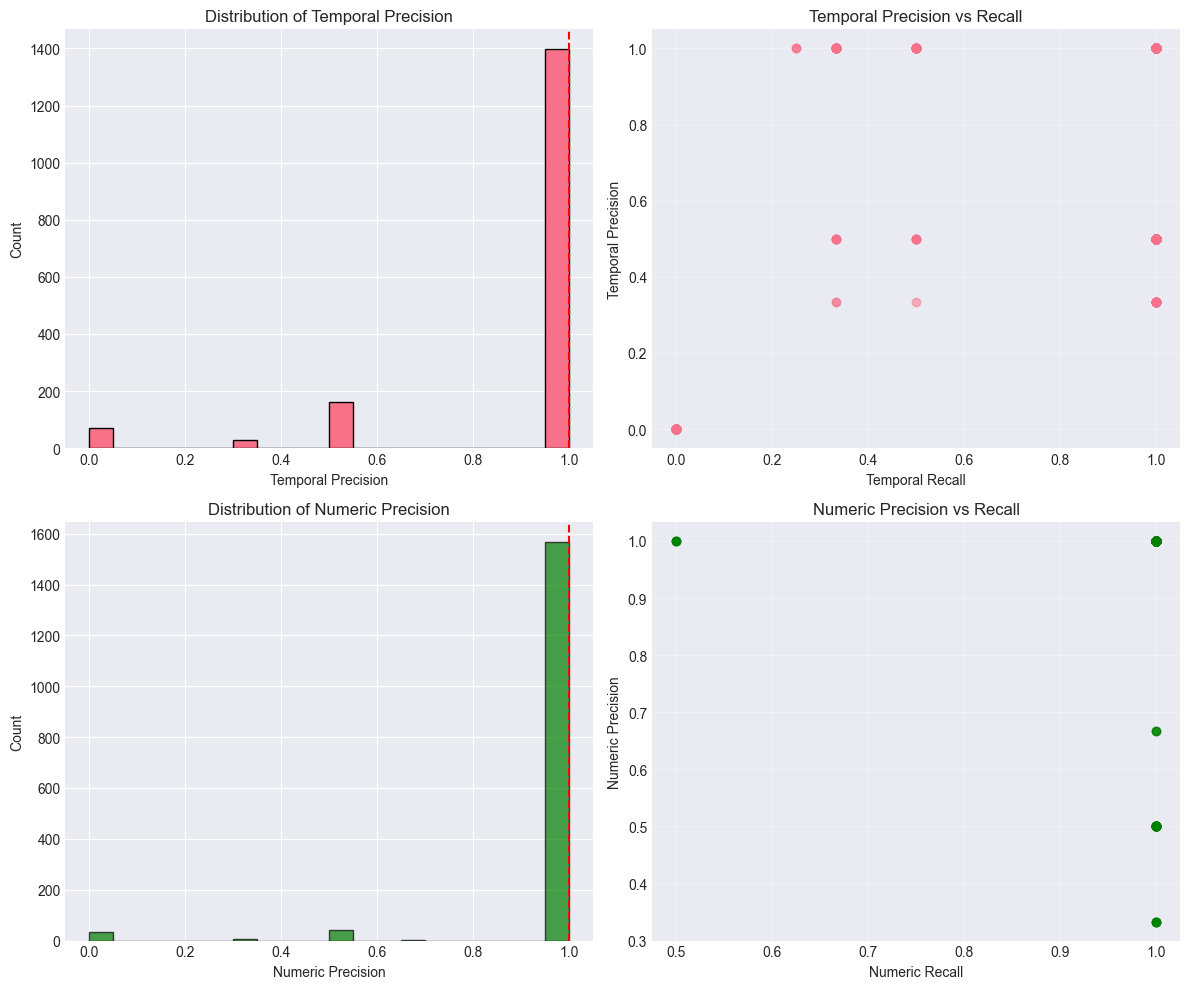

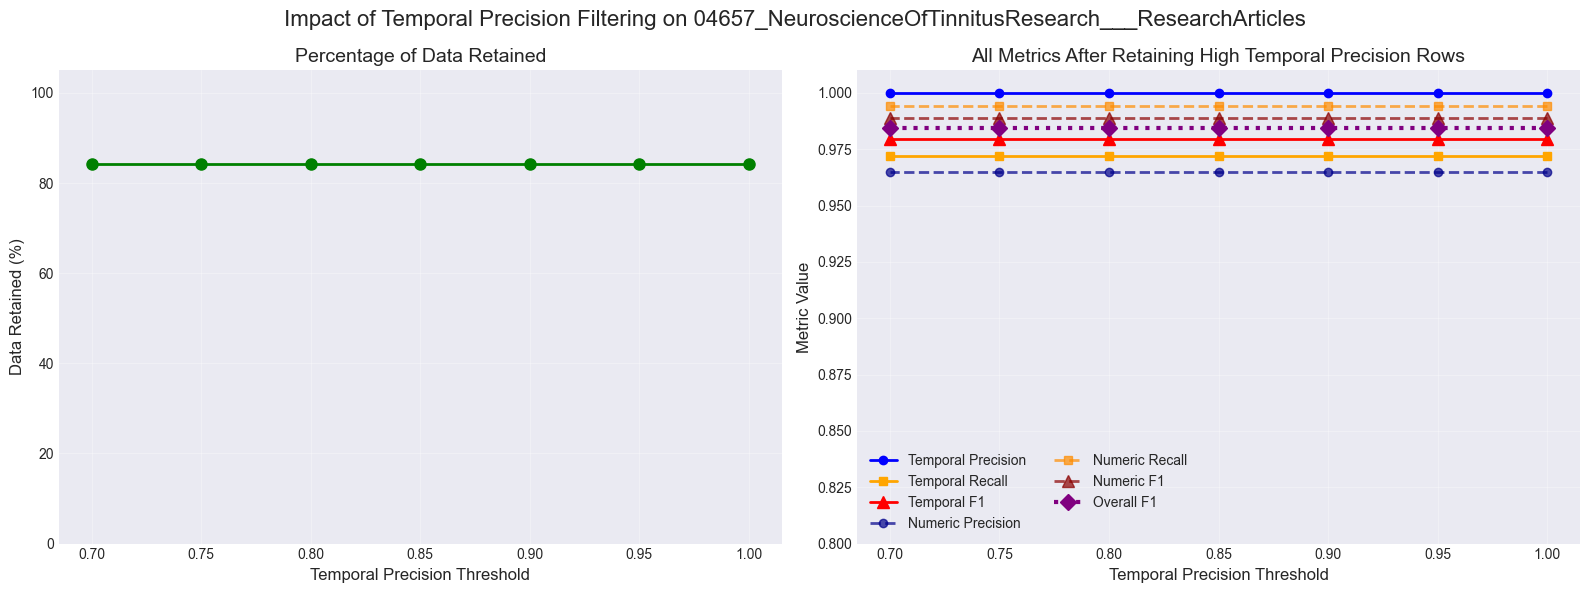

Original dataset size: 1658 rows
Original Unique rows: 553

Original metrics before thresholding
    Temporal Precision: 0.897
    Temporal Recall: 0.927
    Temporal F1: 0.897
    Numeric Precision: 0.965
    Numeric Recall: 0.994
    Numeric F1: 0.988
    Overall F1: 0.943

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       1397         84.3         0.980      0.989      0.984     
0.95       1397         84.3         0.980      0.989      0.984     
0.90       1397         84.3         0.980      0.989      0.984     
0.85       1397         84.3         0.980      0.989      0.984     
0.80       1397         84.3         0.980      0.989      0.984     
0.75       1397         84.3         0.980      0.989      0.984     
0.70       1397         84.3         0.980      0.989      0.984     

Processing: 05199_IntegraseCatalyticCoreProteinFamilyDb___Inte

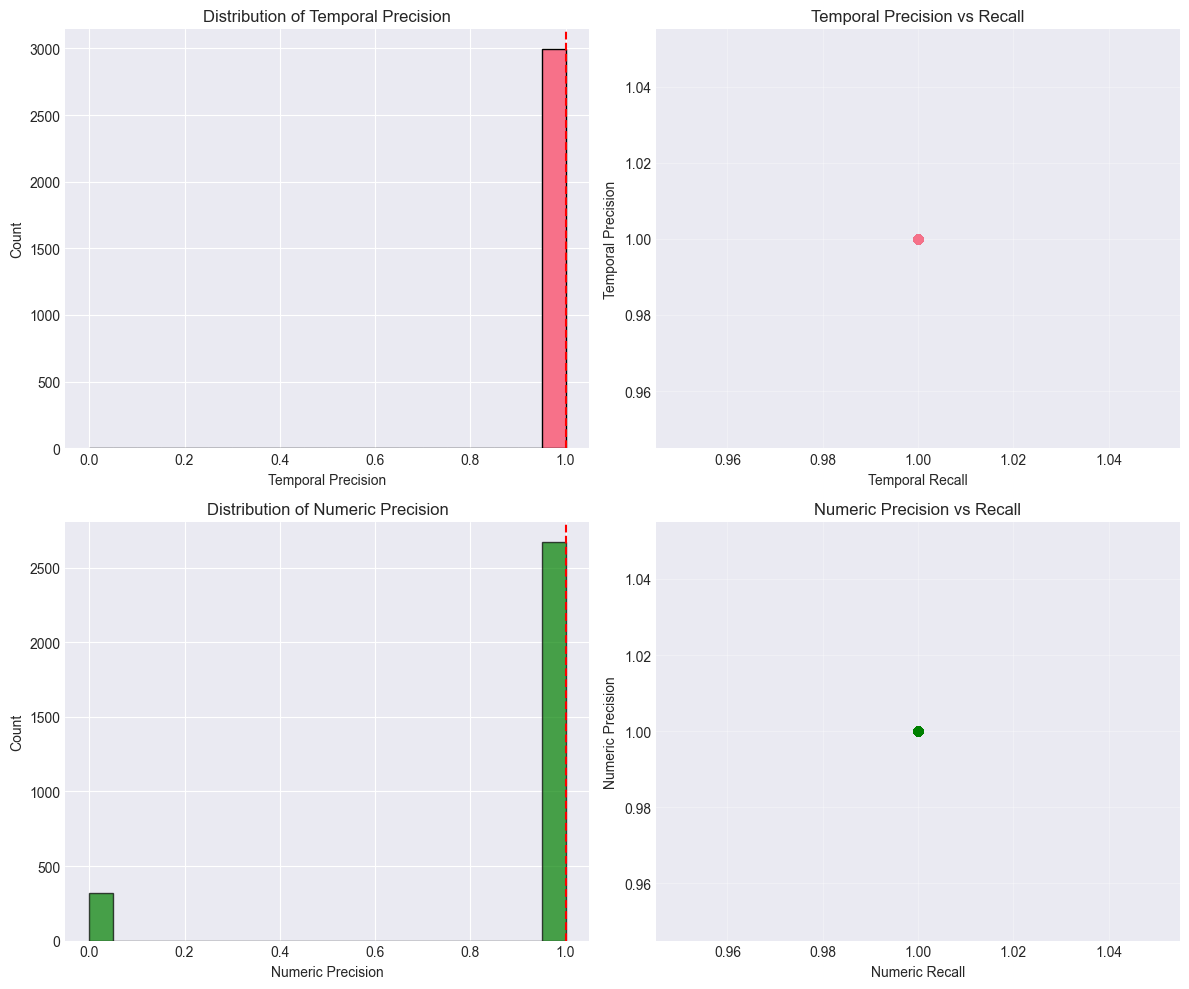

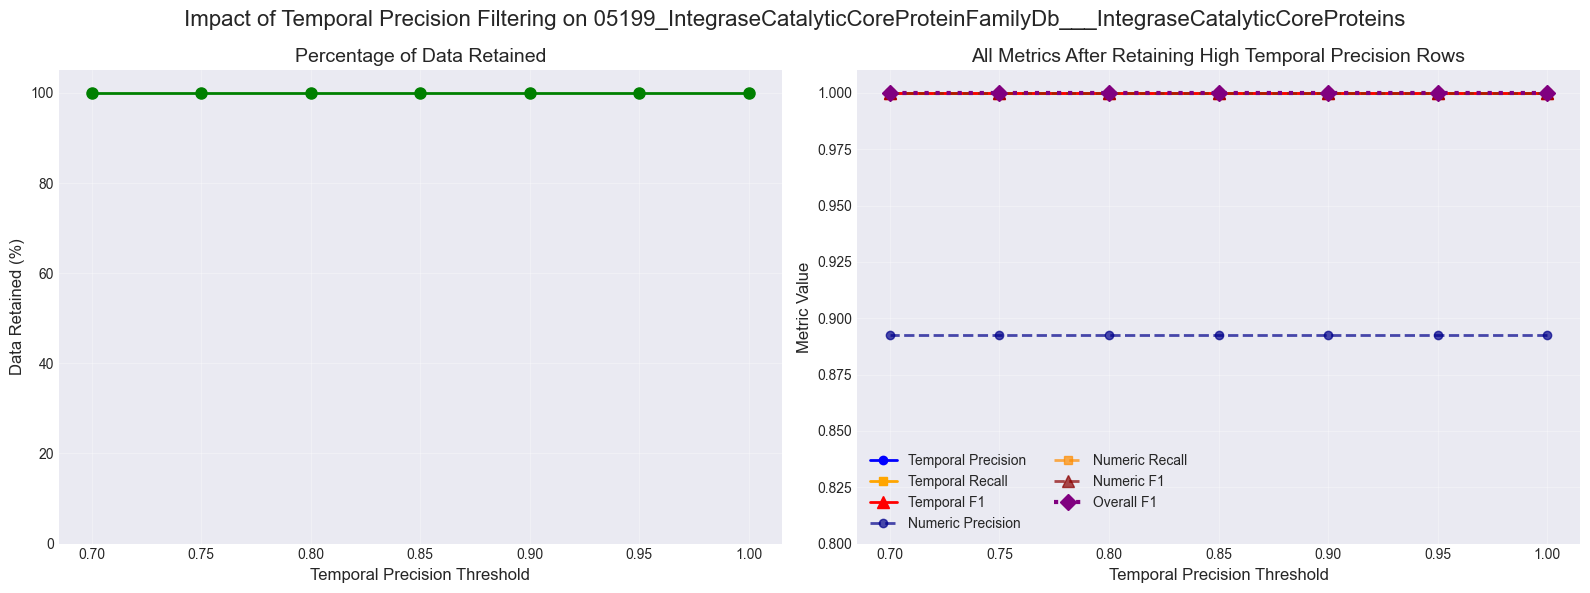

Original dataset size: 2996 rows
Original Unique rows: 749

Original metrics before thresholding
    Temporal Precision: 0.999
    Temporal Recall: 1.000
    Temporal F1: 1.000
    Numeric Precision: 0.893
    Numeric Recall: 1.000
    Numeric F1: 1.000
    Overall F1: 1.000

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       2993         99.9         1.000      1.000      1.000     
0.95       2993         99.9         1.000      1.000      1.000     
0.90       2993         99.9         1.000      1.000      1.000     
0.85       2993         99.9         1.000      1.000      1.000     
0.80       2993         99.9         1.000      1.000      1.000     
0.75       2993         99.9         1.000      1.000      1.000     
0.70       2993         99.9         1.000      1.000      1.000     

Processing: 05924_Ceredigion_Heritage_Sites___Cairns_And_Monum

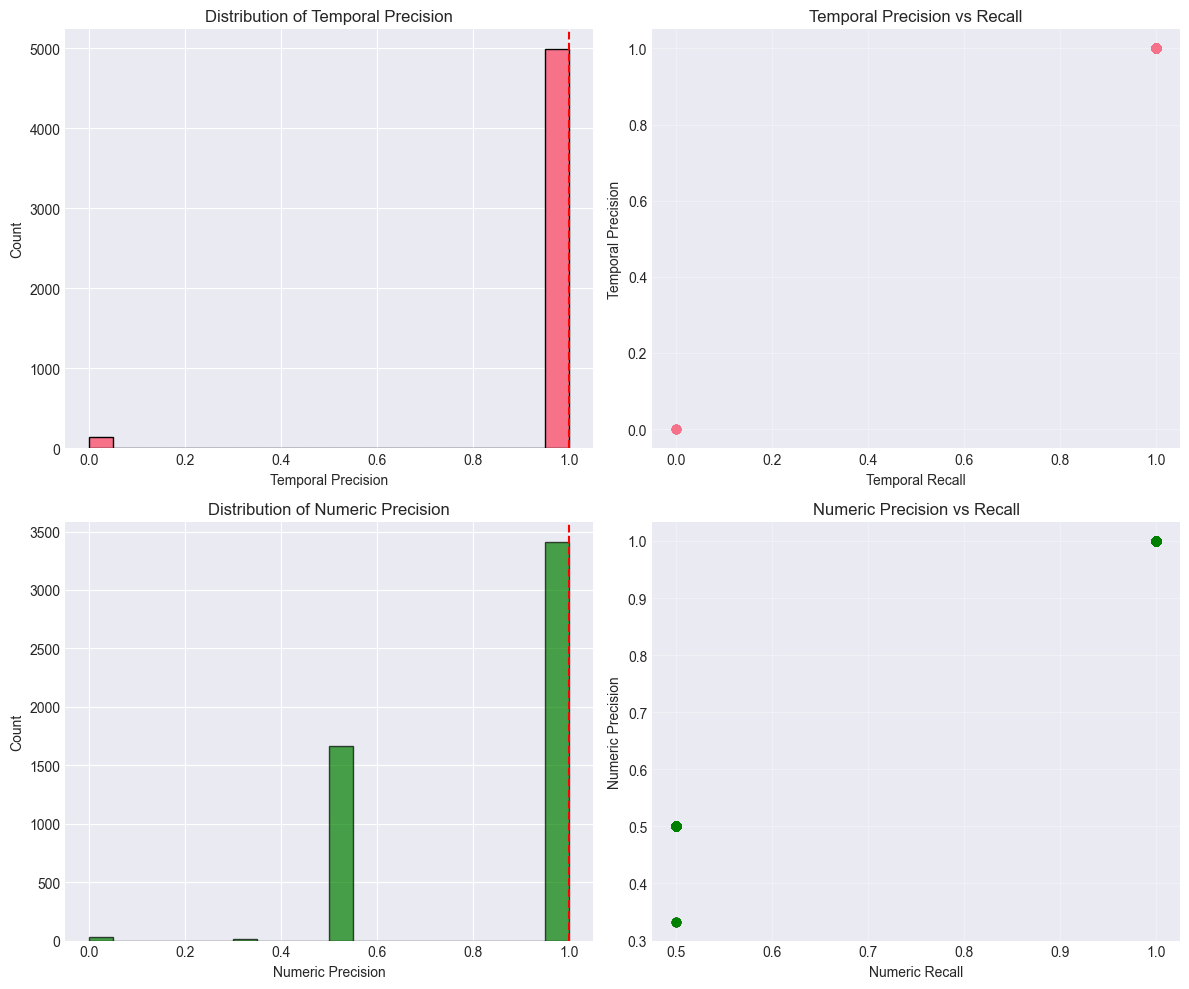

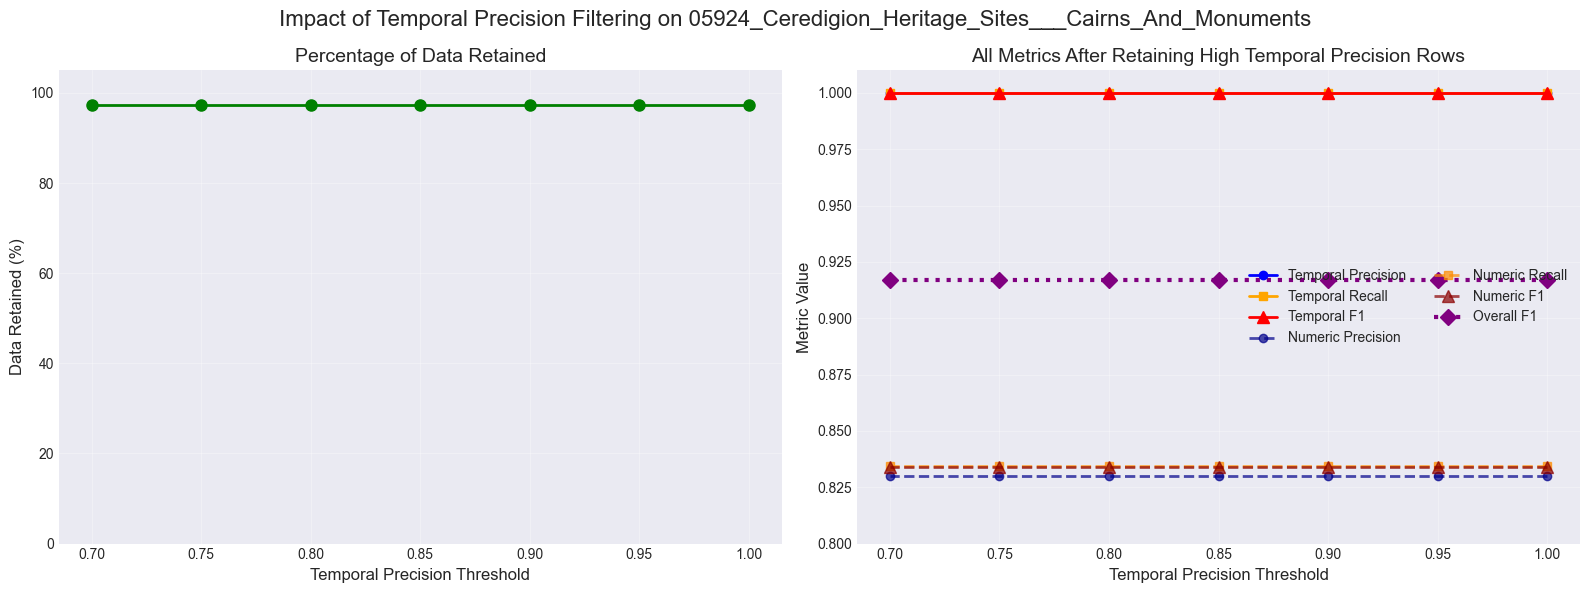

Original dataset size: 5118 rows
Original Unique rows: 1707

Original metrics before thresholding
    Temporal Precision: 0.974
    Temporal Recall: 0.997
    Temporal F1: 0.997
    Numeric Precision: 0.830
    Numeric Recall: 0.835
    Numeric F1: 0.835
    Overall F1: 0.916

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       4984         97.4         1.000      0.834      0.917     
0.95       4984         97.4         1.000      0.834      0.917     
0.90       4984         97.4         1.000      0.834      0.917     
0.85       4984         97.4         1.000      0.834      0.917     
0.80       4984         97.4         1.000      0.834      0.917     
0.75       4984         97.4         1.000      0.834      0.917     
0.70       4984         97.4         1.000      0.834      0.917     

Processing: 08359_DripIrrigationResearchDatabase___Irrigation

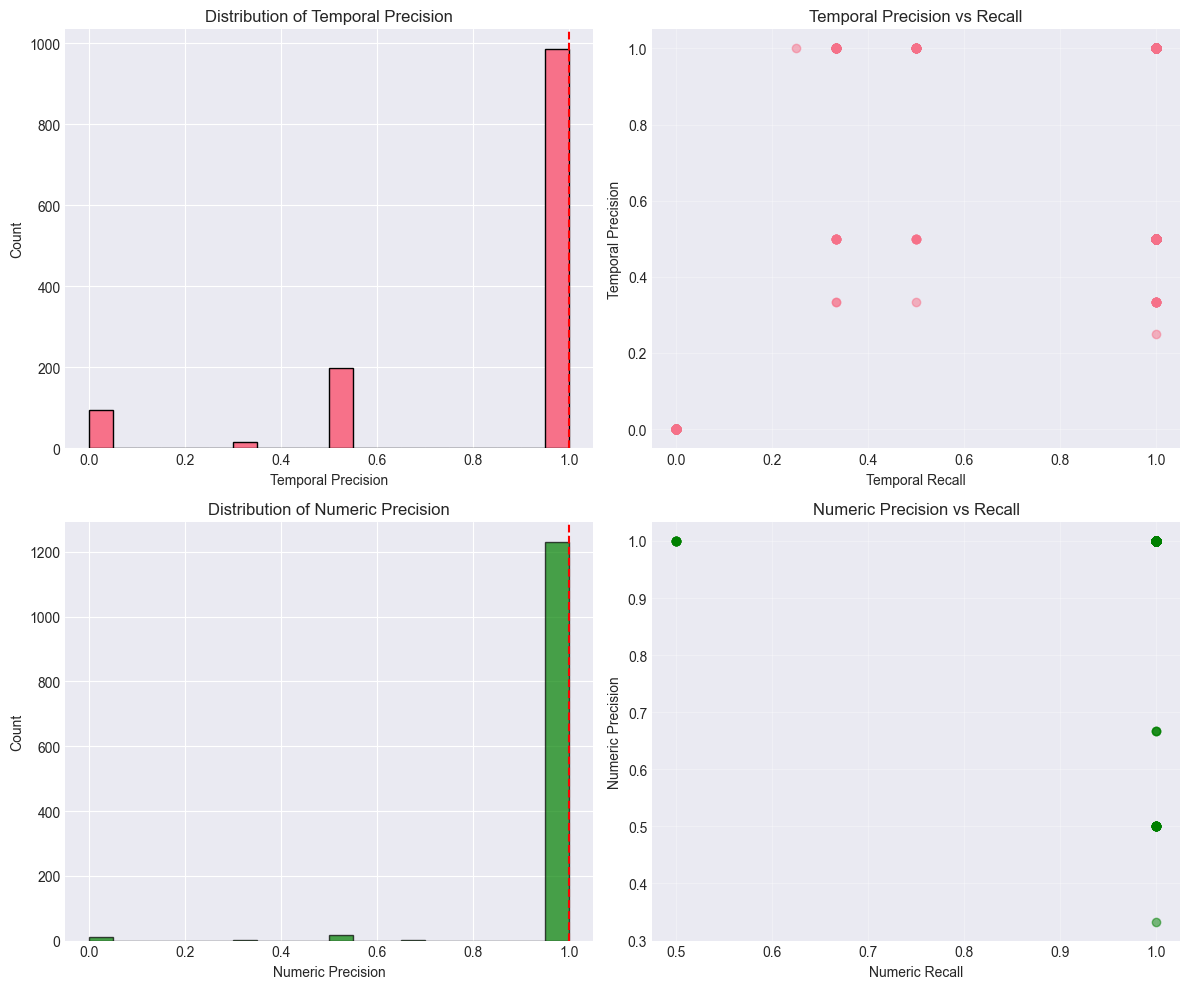

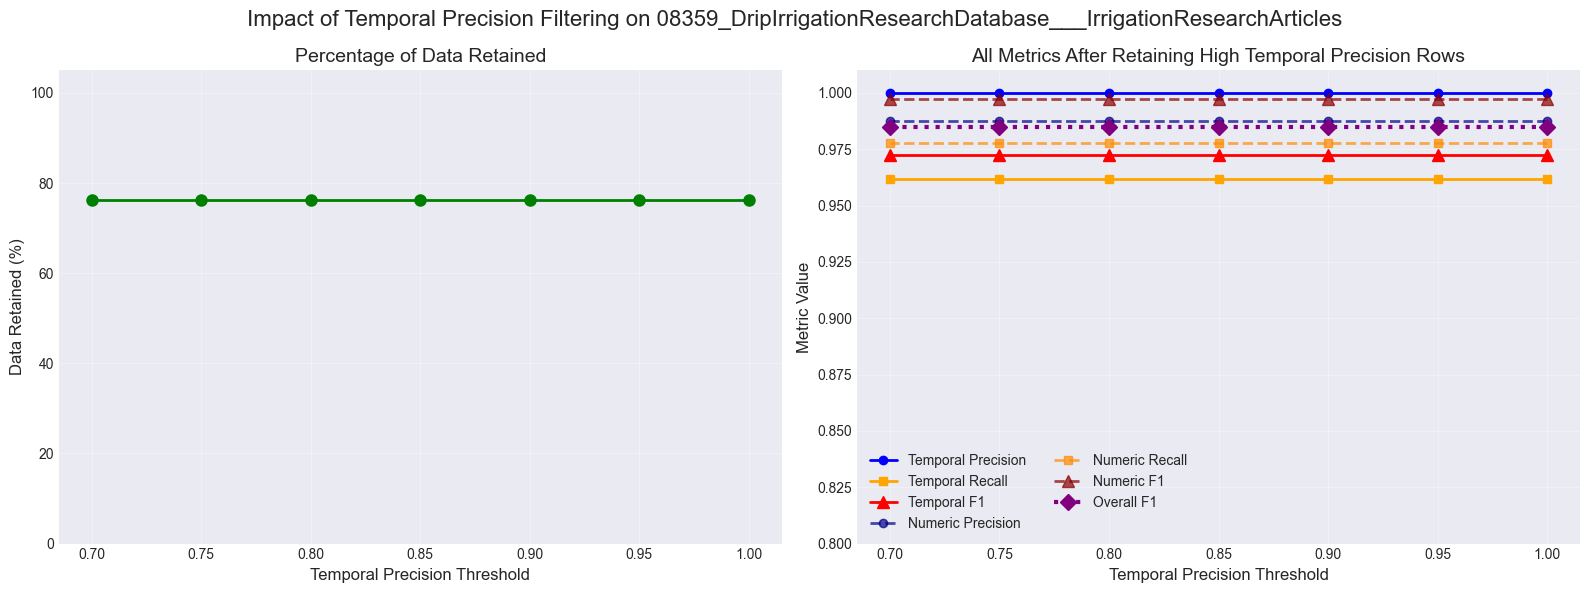

Original dataset size: 1293 rows
Original Unique rows: 431

Original metrics before thresholding
    Temporal Precision: 0.843
    Temporal Recall: 0.890
    Temporal F1: 0.846
    Numeric Precision: 0.984
    Numeric Recall: 0.973
    Numeric F1: 0.992
    Overall F1: 0.919

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       985          76.2         0.972      0.997      0.985     
0.95       985          76.2         0.972      0.997      0.985     
0.90       985          76.2         0.972      0.997      0.985     
0.85       985          76.2         0.972      0.997      0.985     
0.80       985          76.2         0.972      0.997      0.985     
0.75       985          76.2         0.972      0.997      0.985     
0.70       985          76.2         0.972      0.997      0.985     

Processing: 08906_LorenzoCassinaPublications___ScholarlyArticl

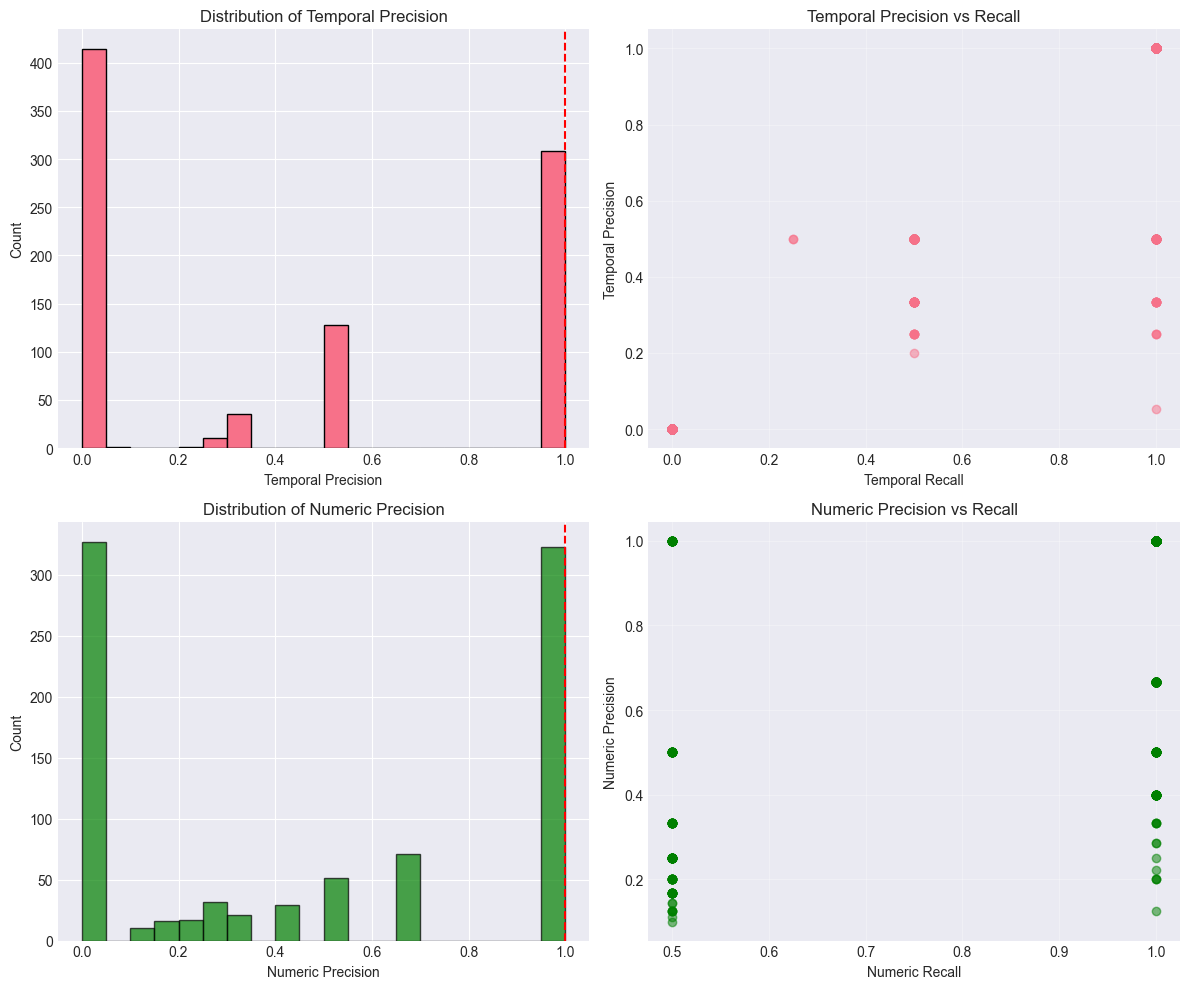

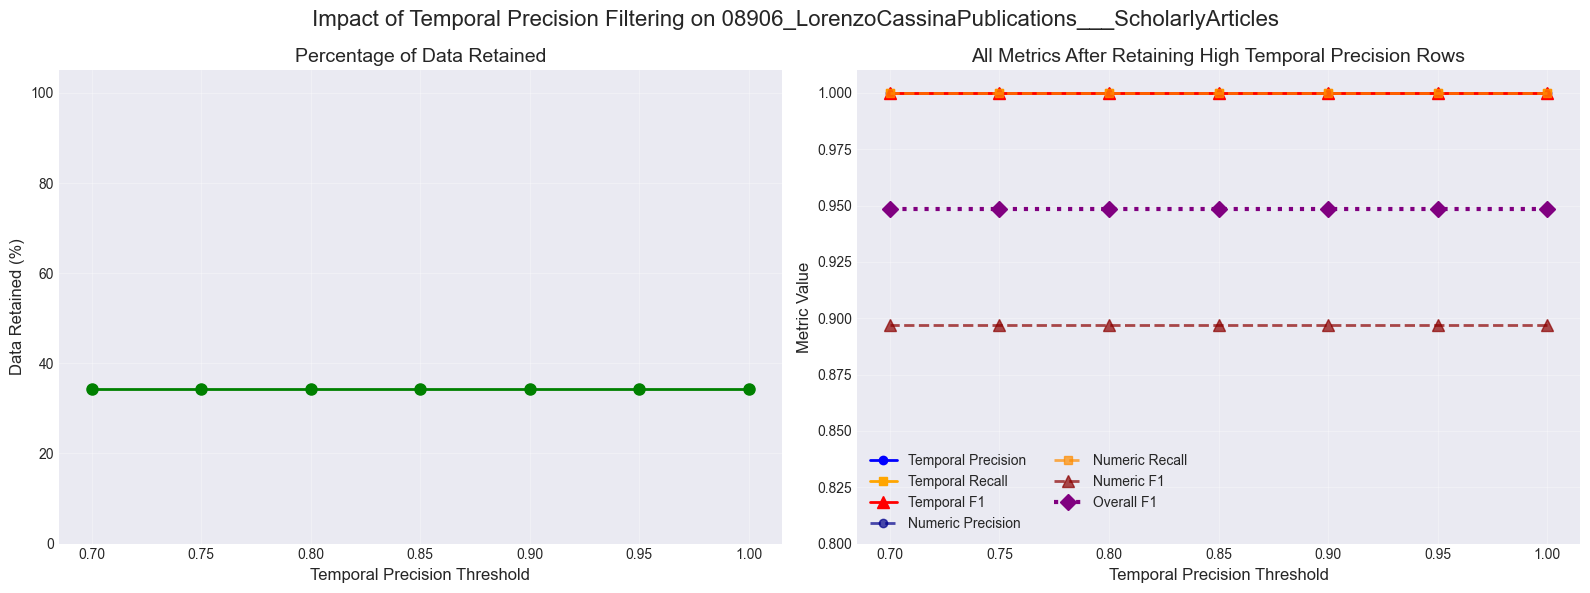

Original dataset size: 897 rows
Original Unique rows: 299

Original metrics before thresholding
    Temporal Precision: 0.431
    Temporal Recall: 0.473
    Temporal F1: 0.444
    Numeric Precision: 0.479
    Numeric Recall: 0.887
    Numeric F1: 0.789
    Overall F1: 0.616

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       308          34.3         1.000      0.897      0.948     
0.95       308          34.3         1.000      0.897      0.948     
0.90       308          34.3         1.000      0.897      0.948     
0.85       308          34.3         1.000      0.897      0.948     
0.80       308          34.3         1.000      0.897      0.948     
0.75       308          34.3         1.000      0.897      0.948     
0.70       308          34.3         1.000      0.897      0.948     

Processing: 09792_UniversityOfOtagoDissertations___UniversityAf

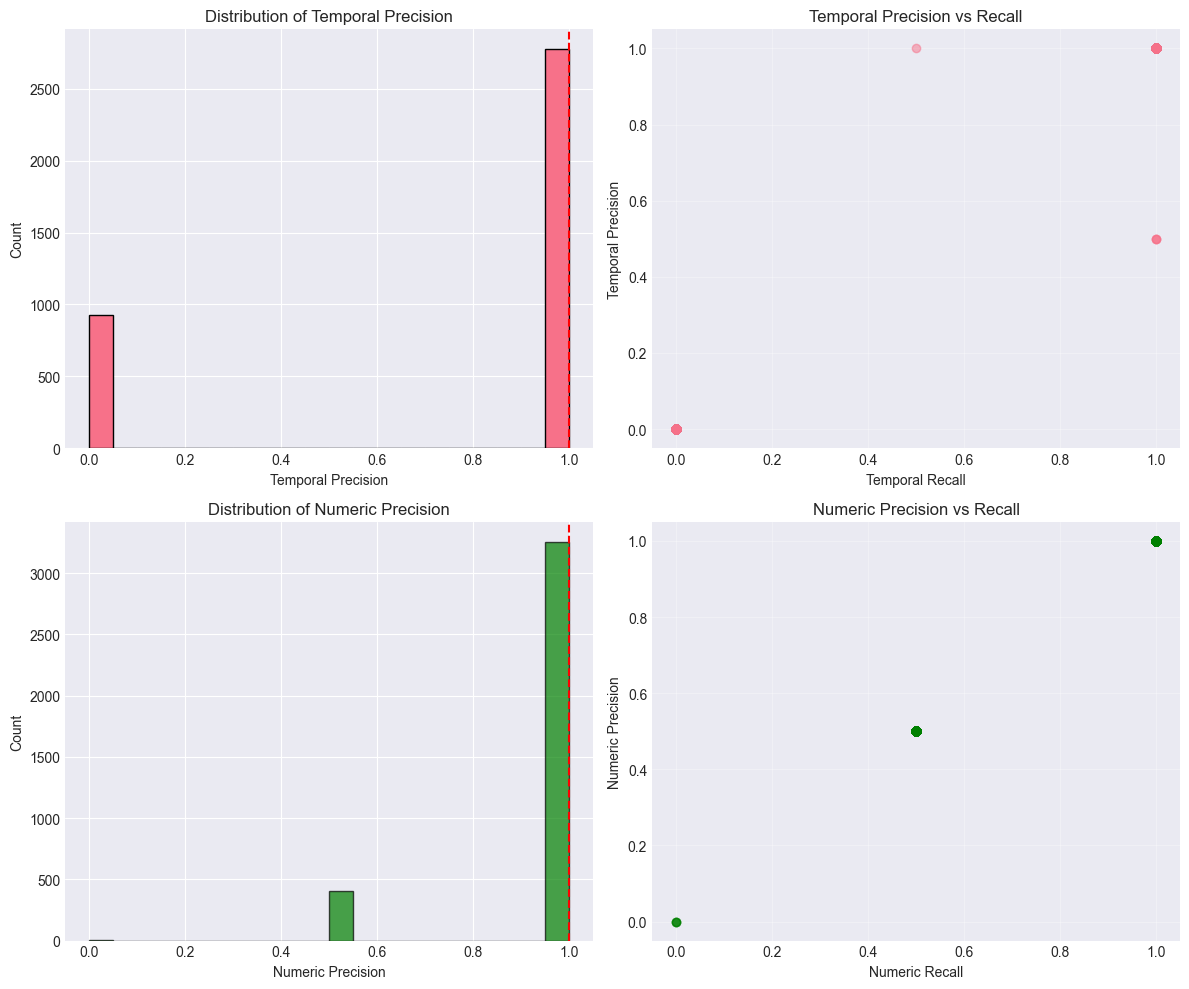

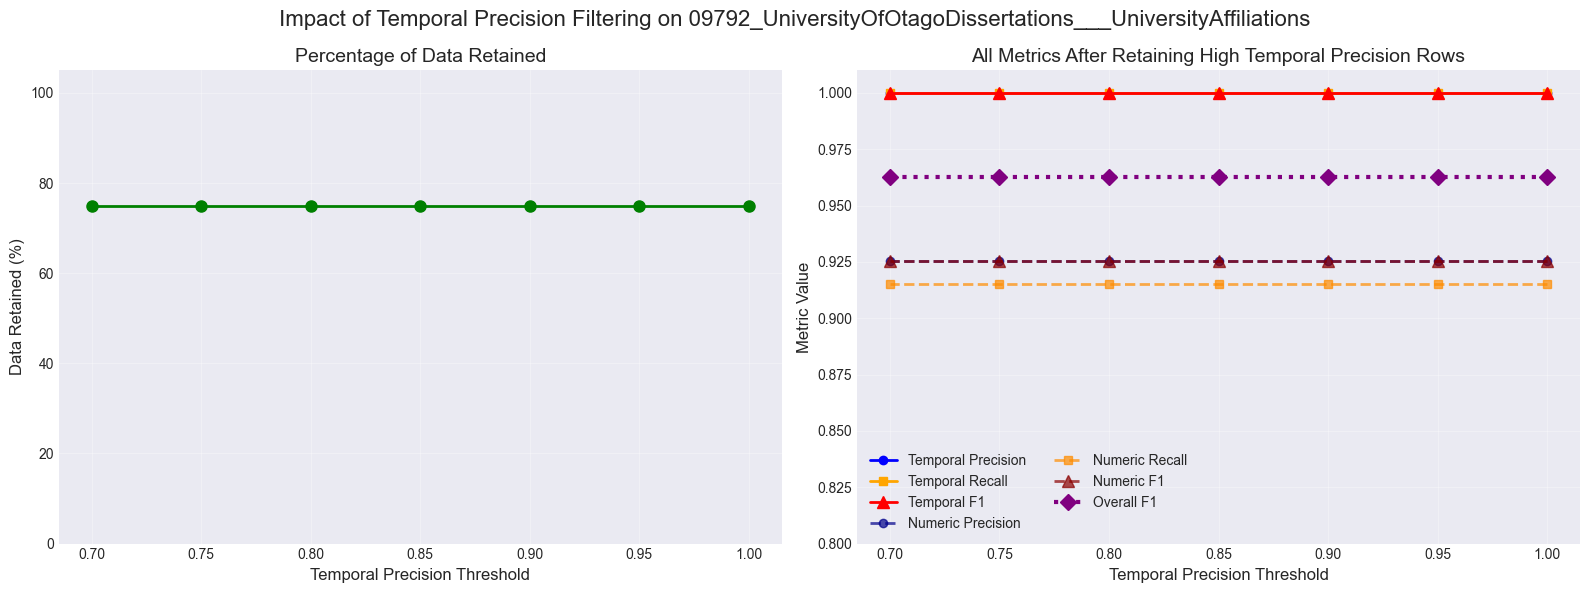

Original dataset size: 3705 rows
Original Unique rows: 741

Original metrics before thresholding
    Temporal Precision: 0.749
    Temporal Recall: 0.753
    Temporal F1: 0.752
    Numeric Precision: 0.943
    Numeric Recall: 0.934
    Numeric F1: 0.944
    Overall F1: 0.848

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       2775         74.9         1.000      0.926      0.963     
0.95       2775         74.9         1.000      0.926      0.963     
0.90       2775         74.9         1.000      0.926      0.963     
0.85       2775         74.9         1.000      0.926      0.963     
0.80       2775         74.9         1.000      0.926      0.963     
0.75       2775         74.9         1.000      0.926      0.963     
0.70       2775         74.9         1.000      0.926      0.963     

Processing: 09803_Polycyclic_Aromatic_Hydrocarbons_Research___

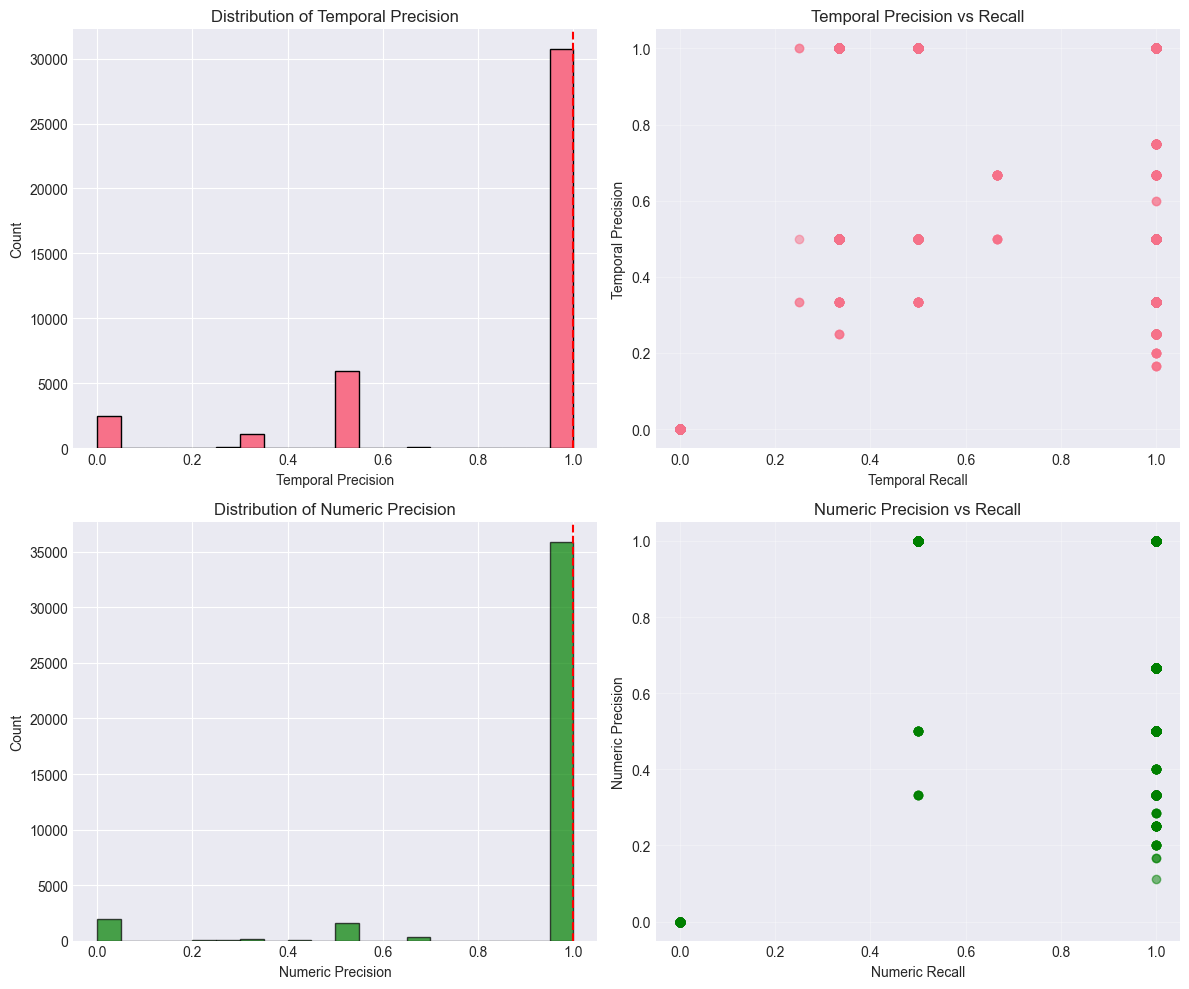

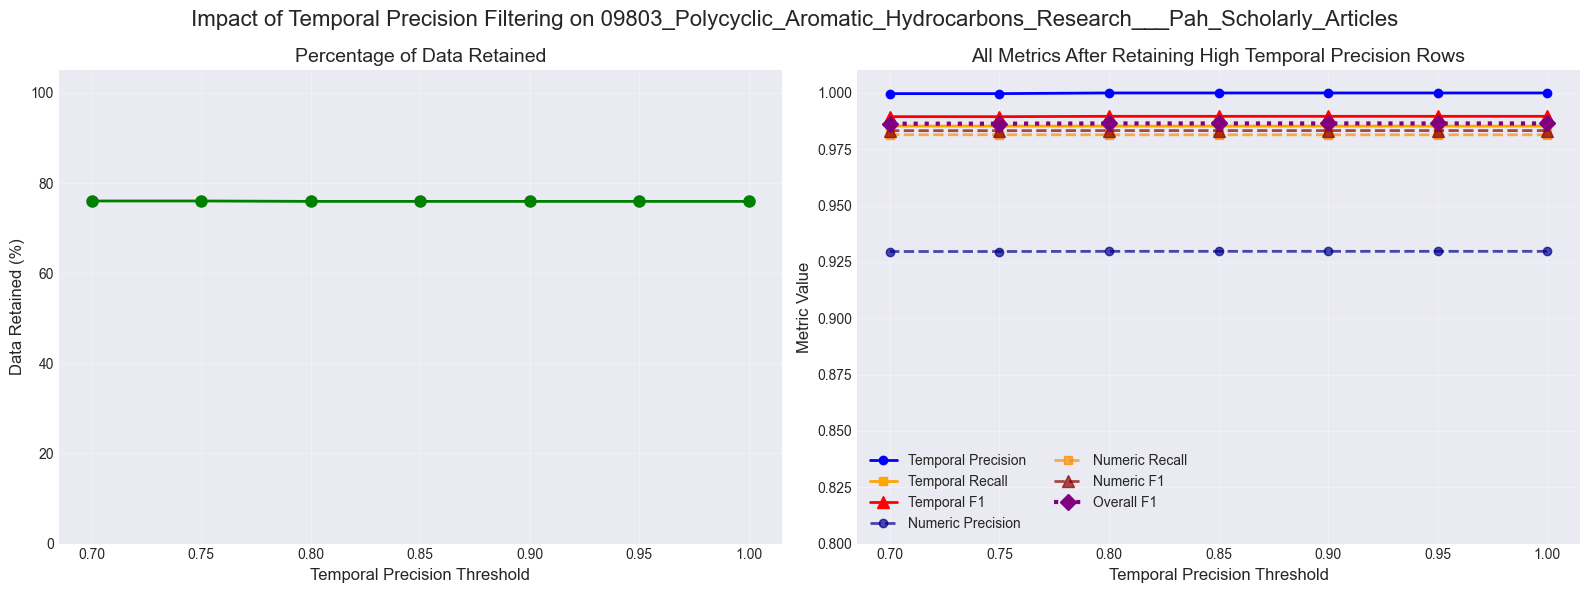

Original dataset size: 40451 rows
Original Unique rows: 10126

Original metrics before thresholding
    Temporal Precision: 0.845
    Temporal Recall: 0.923
    Temporal F1: 0.865
    Numeric Precision: 0.925
    Numeric Recall: 0.981
    Numeric F1: 0.976
    Overall F1: 0.921

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       30718        75.9         0.990      0.983      0.986     
0.95       30718        75.9         0.990      0.983      0.986     
0.90       30718        75.9         0.990      0.983      0.986     
0.85       30718        75.9         0.990      0.983      0.986     
0.80       30718        75.9         0.990      0.983      0.986     
0.75       30754        76.0         0.989      0.983      0.986     
0.70       30754        76.0         0.989      0.983      0.986     

Processing: 09941_MIGUEL_ALFONSO_OLIVEIRA_PUBLICATIONS___SC

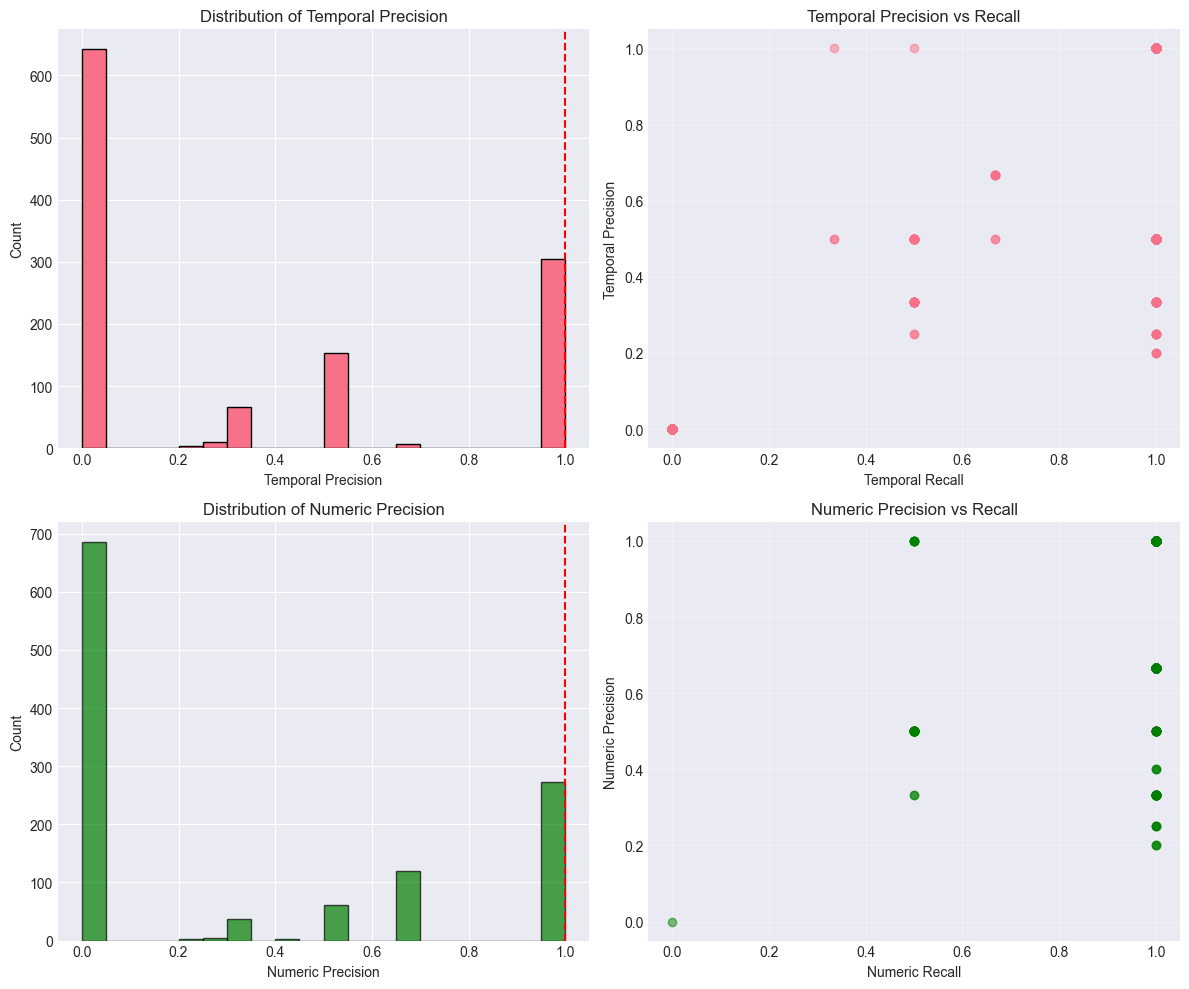

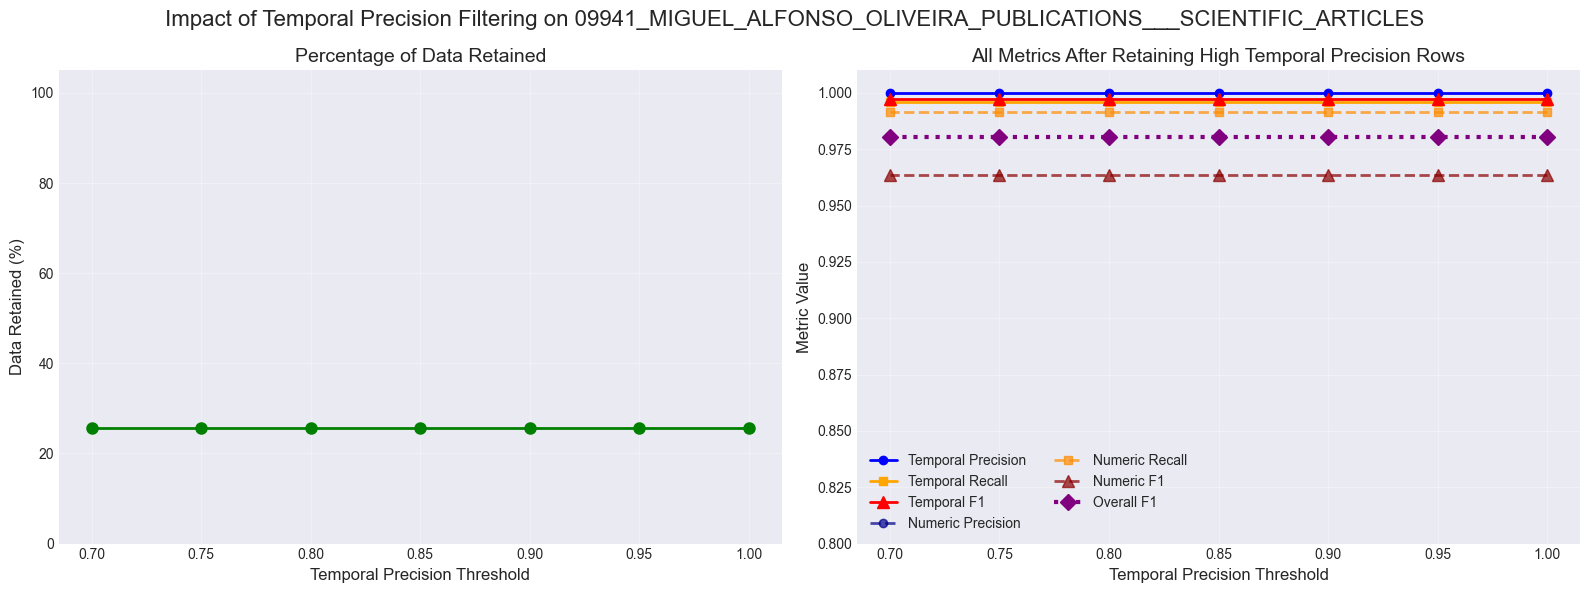

Original dataset size: 1188 rows
Original Unique rows: 297

Original metrics before thresholding
    Temporal Precision: 0.347
    Temporal Recall: 0.434
    Temporal F1: 0.372
    Numeric Precision: 0.336
    Numeric Recall: 0.947
    Numeric F1: 0.842
    Overall F1: 0.607

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       305          25.7         0.997      0.964      0.980     
0.95       305          25.7         0.997      0.964      0.980     
0.90       305          25.7         0.997      0.964      0.980     
0.85       305          25.7         0.997      0.964      0.980     
0.80       305          25.7         0.997      0.964      0.980     
0.75       305          25.7         0.997      0.964      0.980     
0.70       305          25.7         0.997      0.964      0.980     

Processing: 10048_HumanMutationRateEstimates___HumanMutationCi

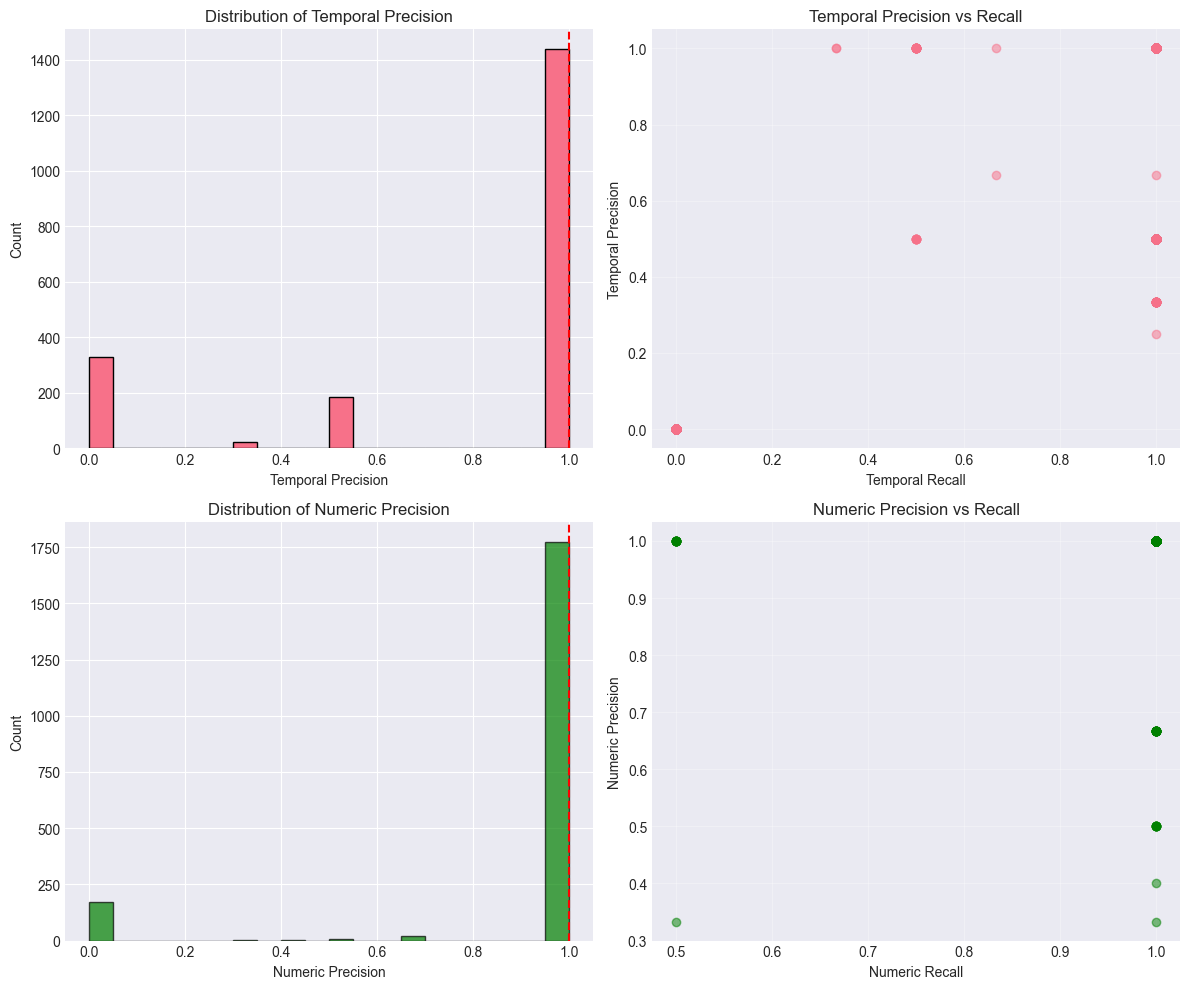

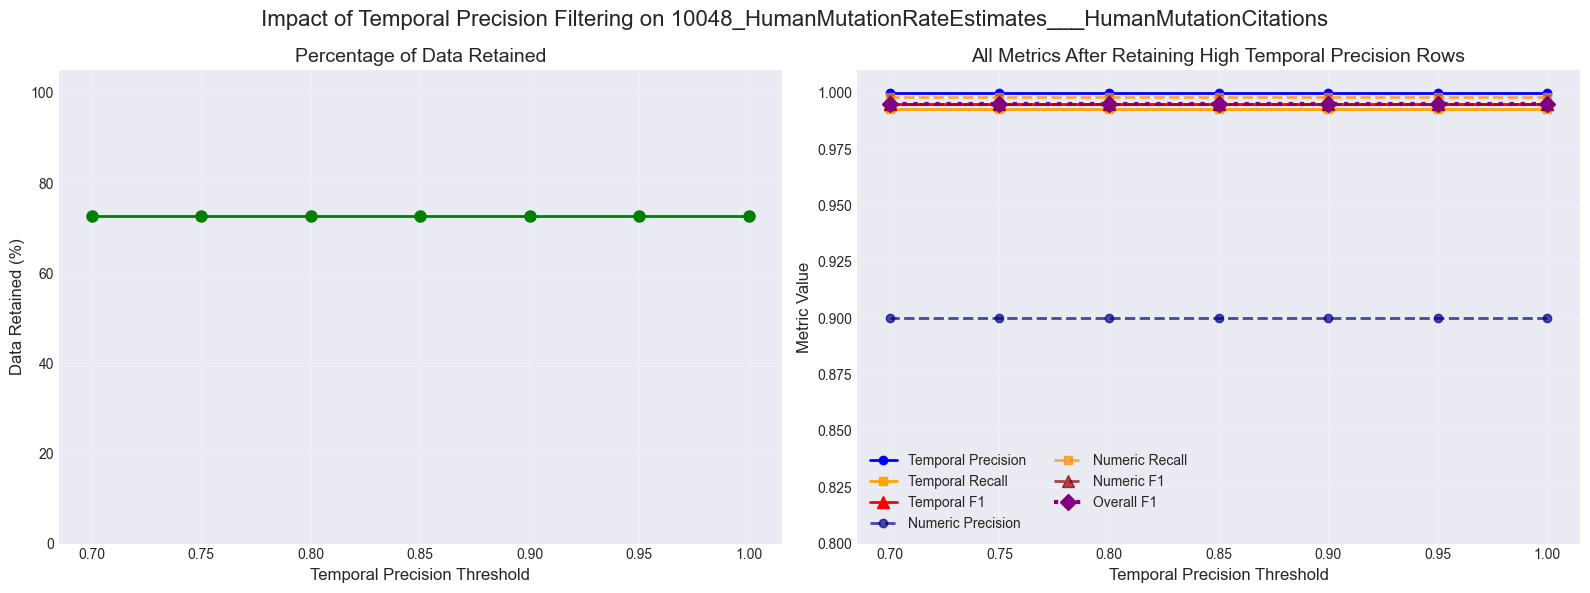

Original dataset size: 1975 rows
Original Unique rows: 395

Original metrics before thresholding
    Temporal Precision: 0.779
    Temporal Recall: 0.830
    Temporal F1: 0.796
    Numeric Precision: 0.907
    Numeric Recall: 0.996
    Numeric F1: 0.993
    Overall F1: 0.895

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       1437         72.8         0.995      0.995      0.995     
0.95       1437         72.8         0.995      0.995      0.995     
0.90       1437         72.8         0.995      0.995      0.995     
0.85       1437         72.8         0.995      0.995      0.995     
0.80       1437         72.8         0.995      0.995      0.995     
0.75       1437         72.8         0.995      0.995      0.995     
0.70       1437         72.8         0.995      0.995      0.995     

Processing: 10229_IMMEDIATE_EARLY_GENE_RESEARCH_DB___SCIENTIFI

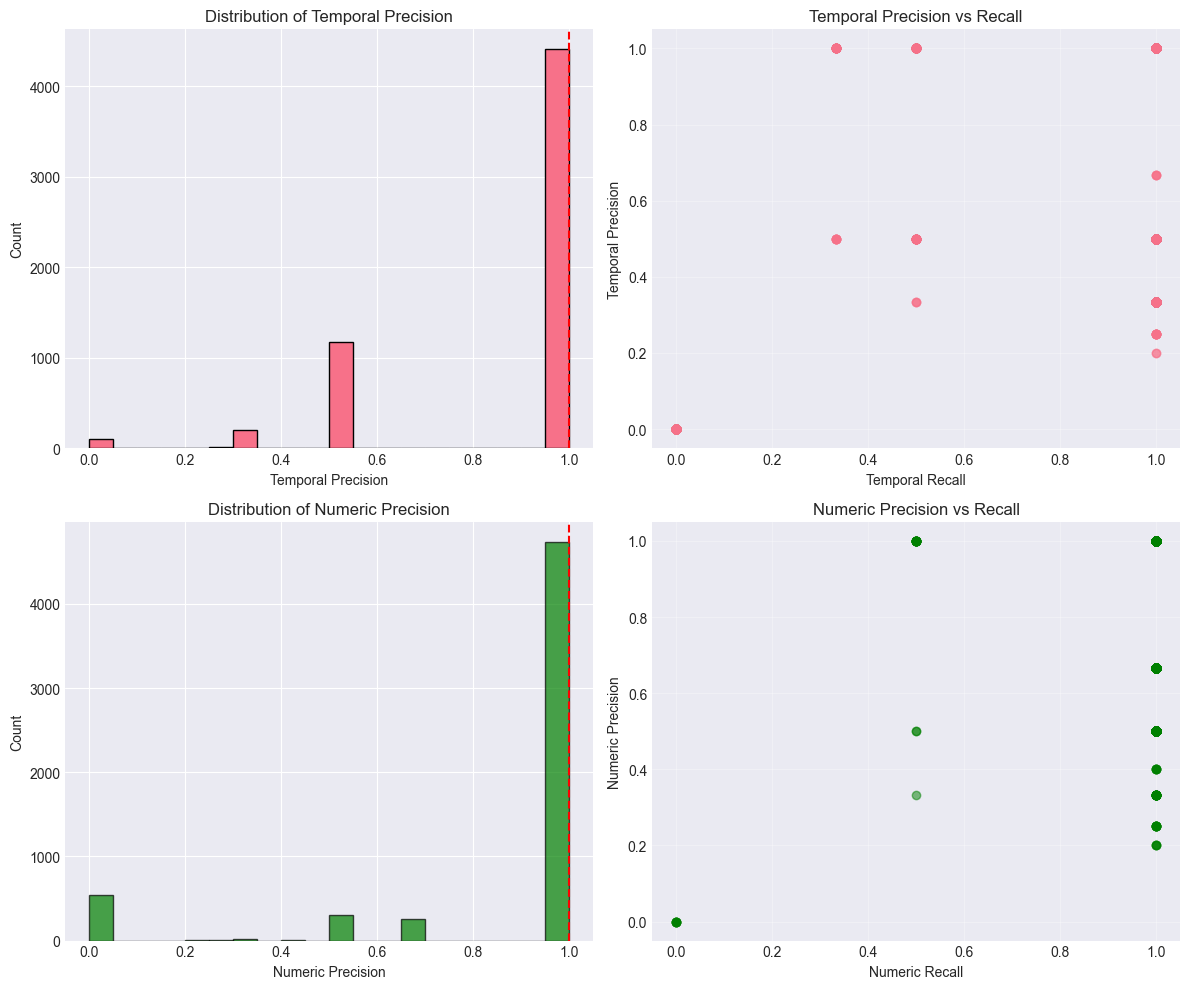

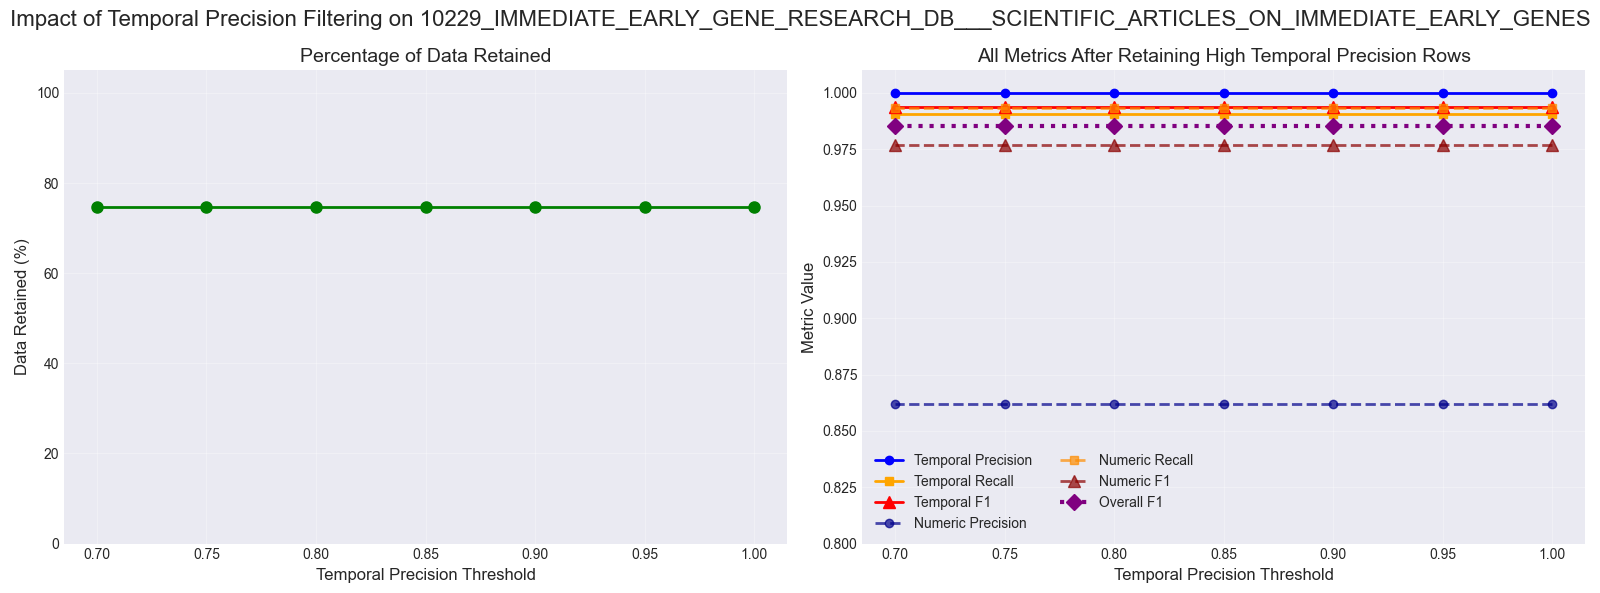

Original dataset size: 5904 rows
Original Unique rows: 1477

Original metrics before thresholding
    Temporal Precision: 0.858
    Temporal Recall: 0.972
    Temporal F1: 0.891
    Numeric Precision: 0.862
    Numeric Recall: 0.992
    Numeric F1: 0.965
    Overall F1: 0.928

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       4405         74.6         0.994      0.977      0.985     
0.95       4405         74.6         0.994      0.977      0.985     
0.90       4405         74.6         0.994      0.977      0.985     
0.85       4405         74.6         0.994      0.977      0.985     
0.80       4405         74.6         0.994      0.977      0.985     
0.75       4405         74.6         0.994      0.977      0.985     
0.70       4405         74.6         0.994      0.977      0.985     

Processing: 11157_MammalianExpressionVectorsDb___ScientificCi

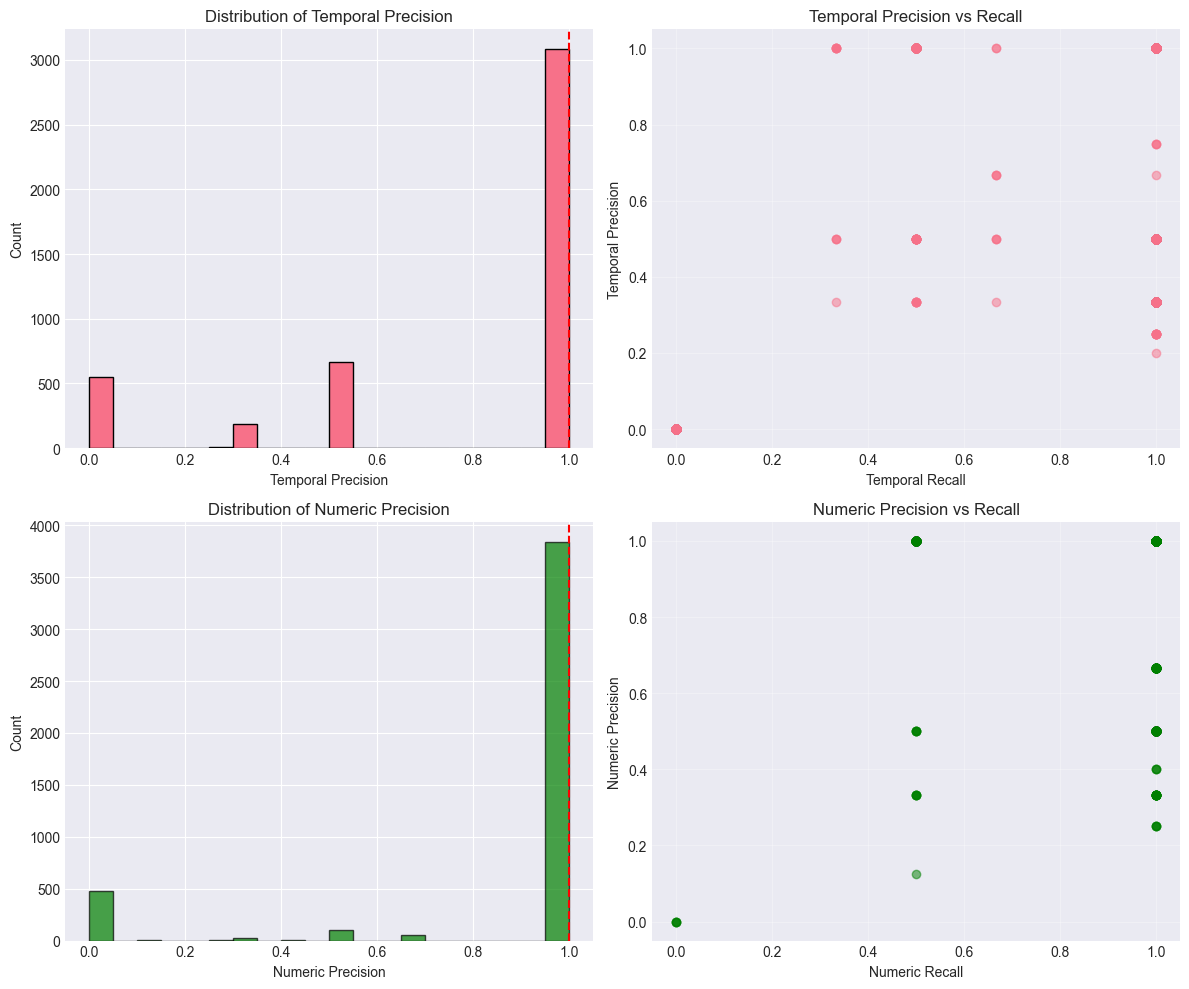

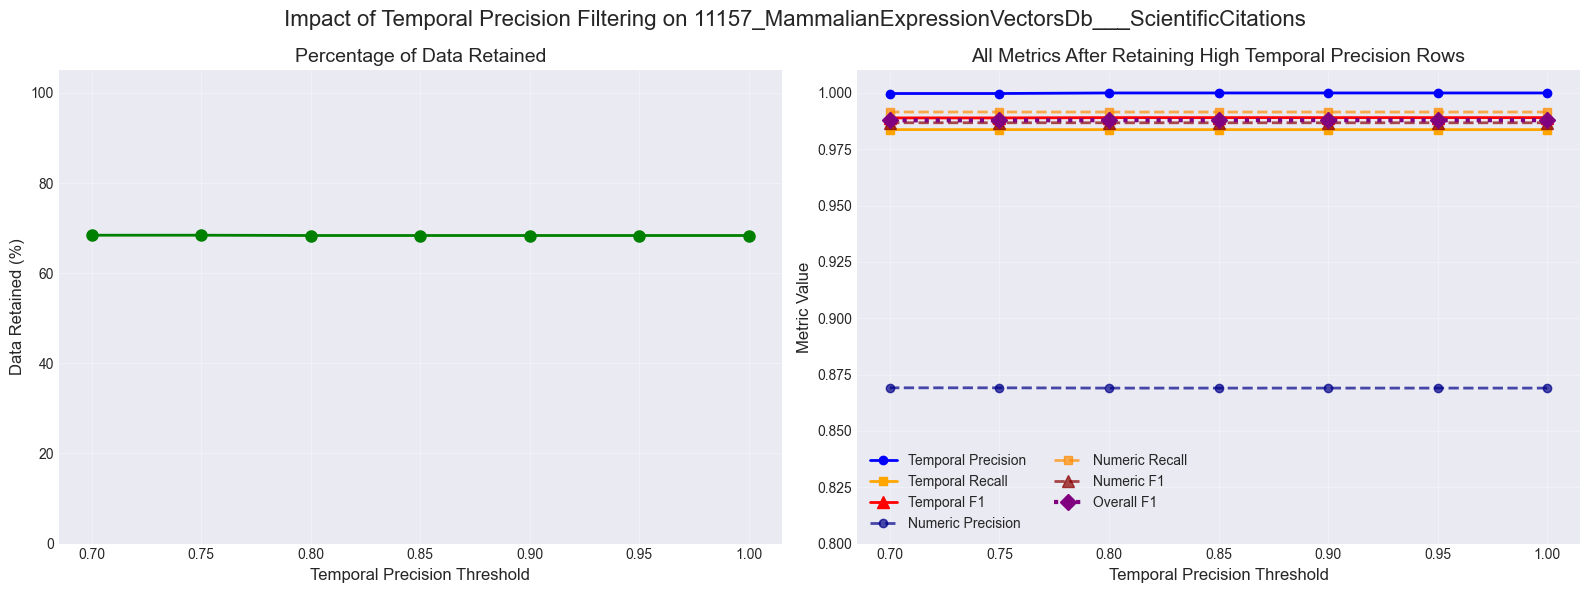

Original dataset size: 4508 rows
Original Unique rows: 1501

Original metrics before thresholding
    Temporal Precision: 0.774
    Temporal Recall: 0.862
    Temporal F1: 0.797
    Numeric Precision: 0.874
    Numeric Recall: 0.983
    Numeric F1: 0.975
    Overall F1: 0.886

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       3082         68.4         0.989      0.987      0.988     
0.95       3082         68.4         0.989      0.987      0.988     
0.90       3082         68.4         0.989      0.987      0.988     
0.85       3082         68.4         0.989      0.987      0.988     
0.80       3082         68.4         0.989      0.987      0.988     
0.75       3085         68.4         0.989      0.987      0.988     
0.70       3085         68.4         0.989      0.987      0.988     

Processing: 11165_PROTEIN_STRUCTURE_COMPARISON_DB___SCIENTIFI

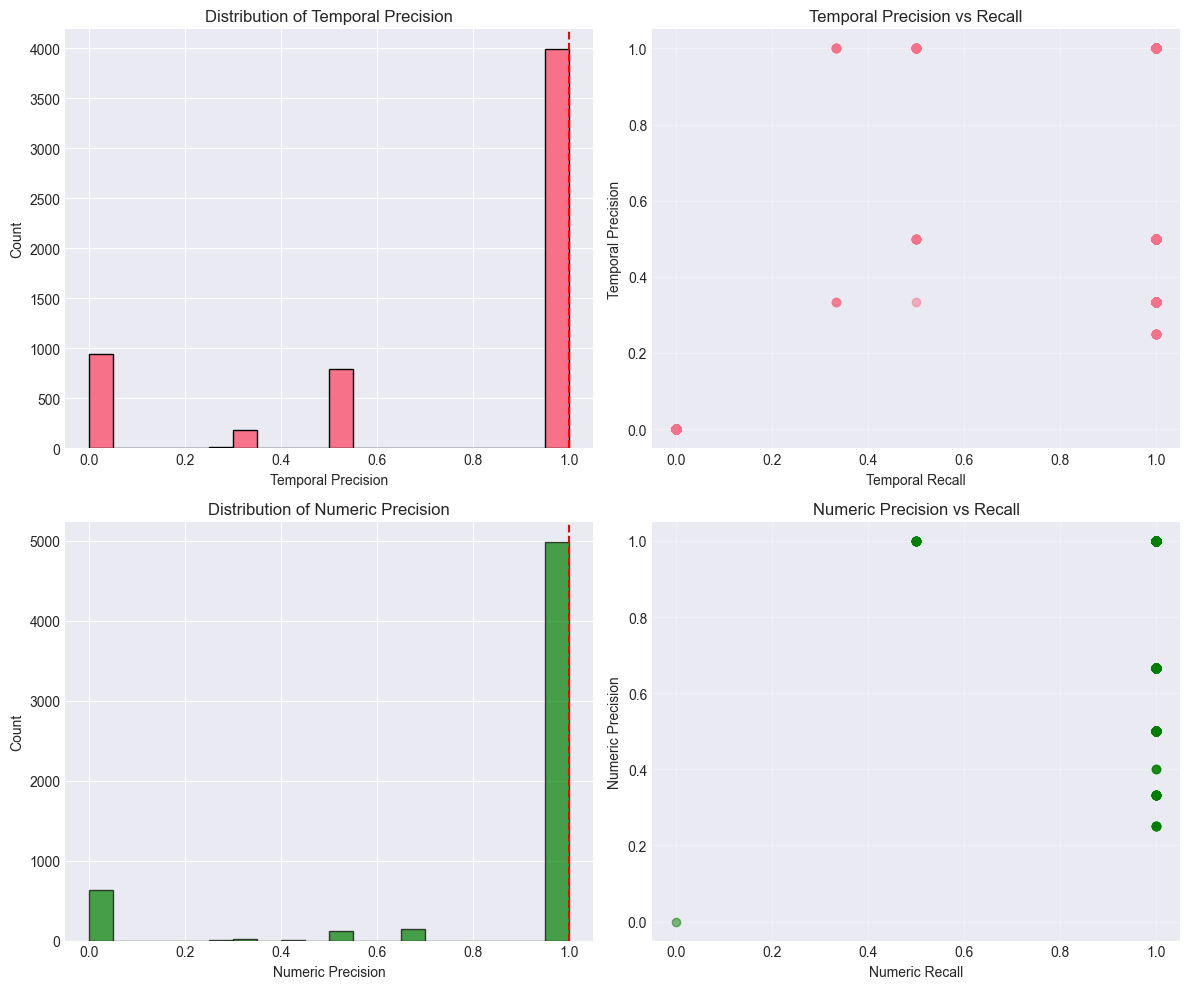

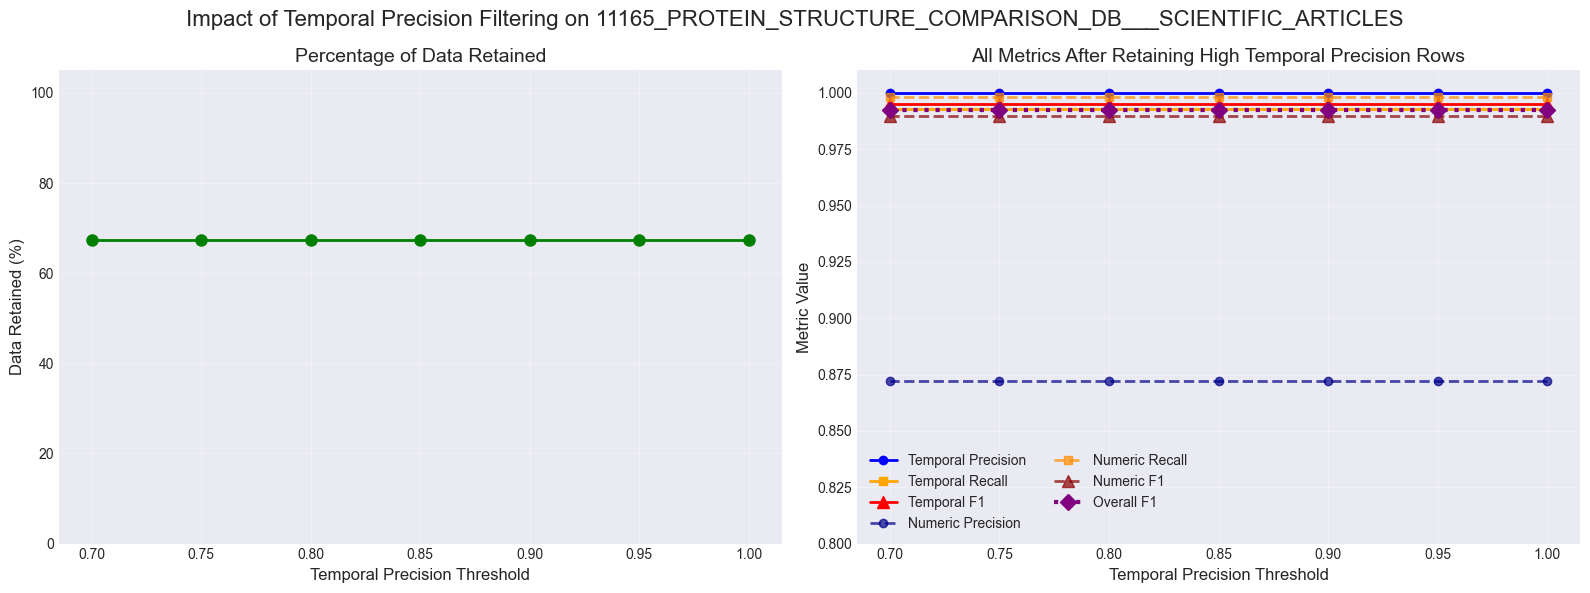

Original dataset size: 5921 rows
Original Unique rows: 1974

Original metrics before thresholding
    Temporal Precision: 0.752
    Temporal Recall: 0.835
    Temporal F1: 0.776
    Numeric Precision: 0.871
    Numeric Recall: 0.997
    Numeric F1: 0.983
    Overall F1: 0.879

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       3987         67.3         0.995      0.990      0.992     
0.95       3987         67.3         0.995      0.990      0.992     
0.90       3987         67.3         0.995      0.990      0.992     
0.85       3987         67.3         0.995      0.990      0.992     
0.80       3987         67.3         0.995      0.990      0.992     
0.75       3987         67.3         0.995      0.990      0.992     
0.70       3987         67.3         0.995      0.990      0.992     

Processing: 11240_IrishRoadTrafficLegislationDb___StatutoryIn

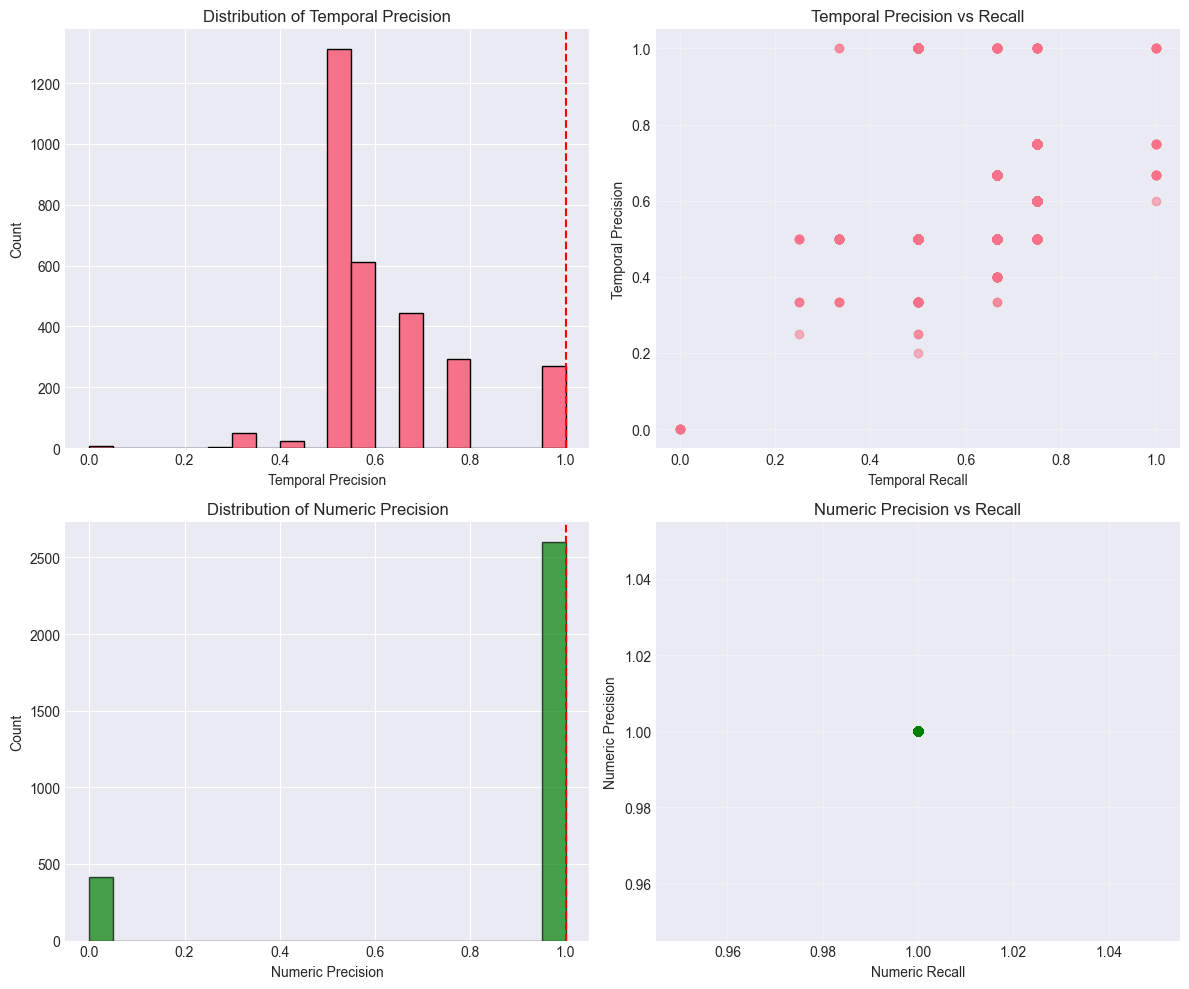

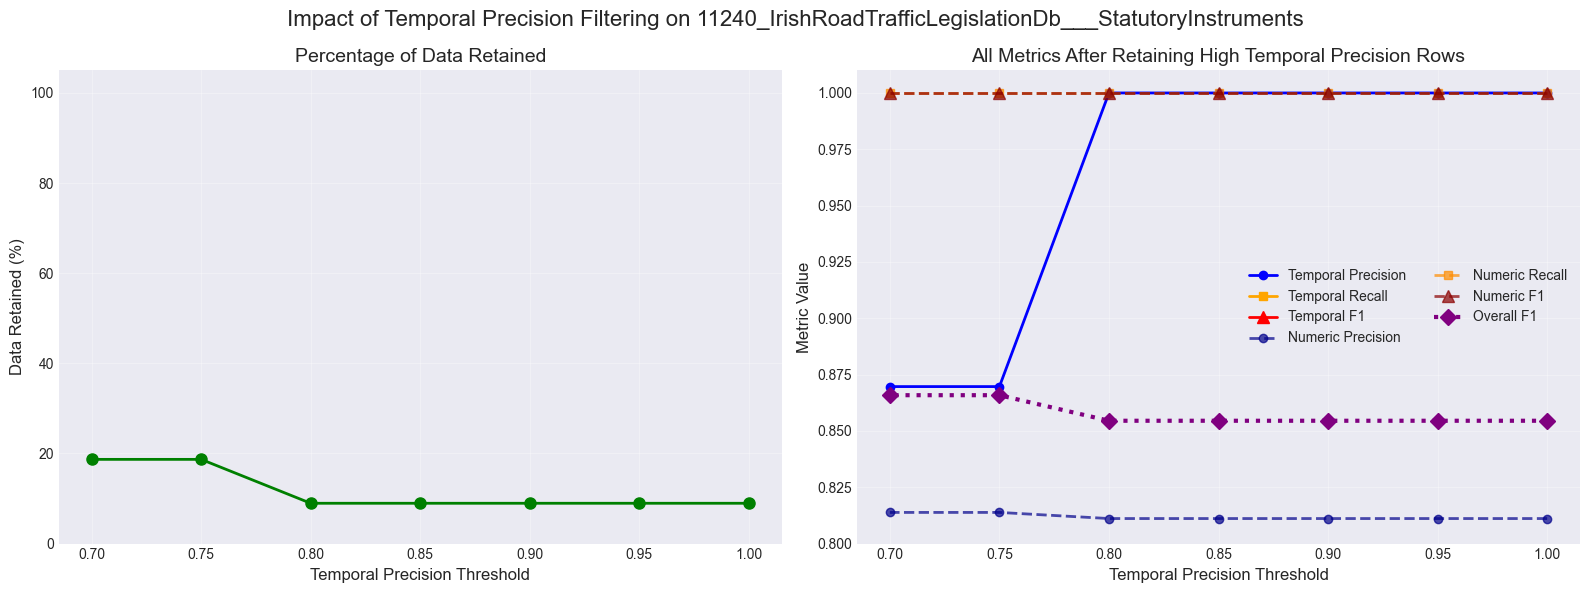

Original dataset size: 3018 rows
Original Unique rows: 1006

Original metrics before thresholding
    Temporal Precision: 0.609
    Temporal Recall: 0.637
    Temporal F1: 0.612
    Numeric Precision: 0.862
    Numeric Recall: 1.000
    Numeric F1: 1.000
    Overall F1: 0.806

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       270          8.9          0.709      1.000      0.855     
0.95       270          8.9          0.709      1.000      0.855     
0.90       270          8.9          0.709      1.000      0.855     
0.85       270          8.9          0.709      1.000      0.855     
0.80       270          8.9          0.709      1.000      0.855     
0.75       564          18.7         0.732      1.000      0.866     
0.70       564          18.7         0.732      1.000      0.866     

Processing: 11503_PhonologicalLoopLanguageLearning___Research

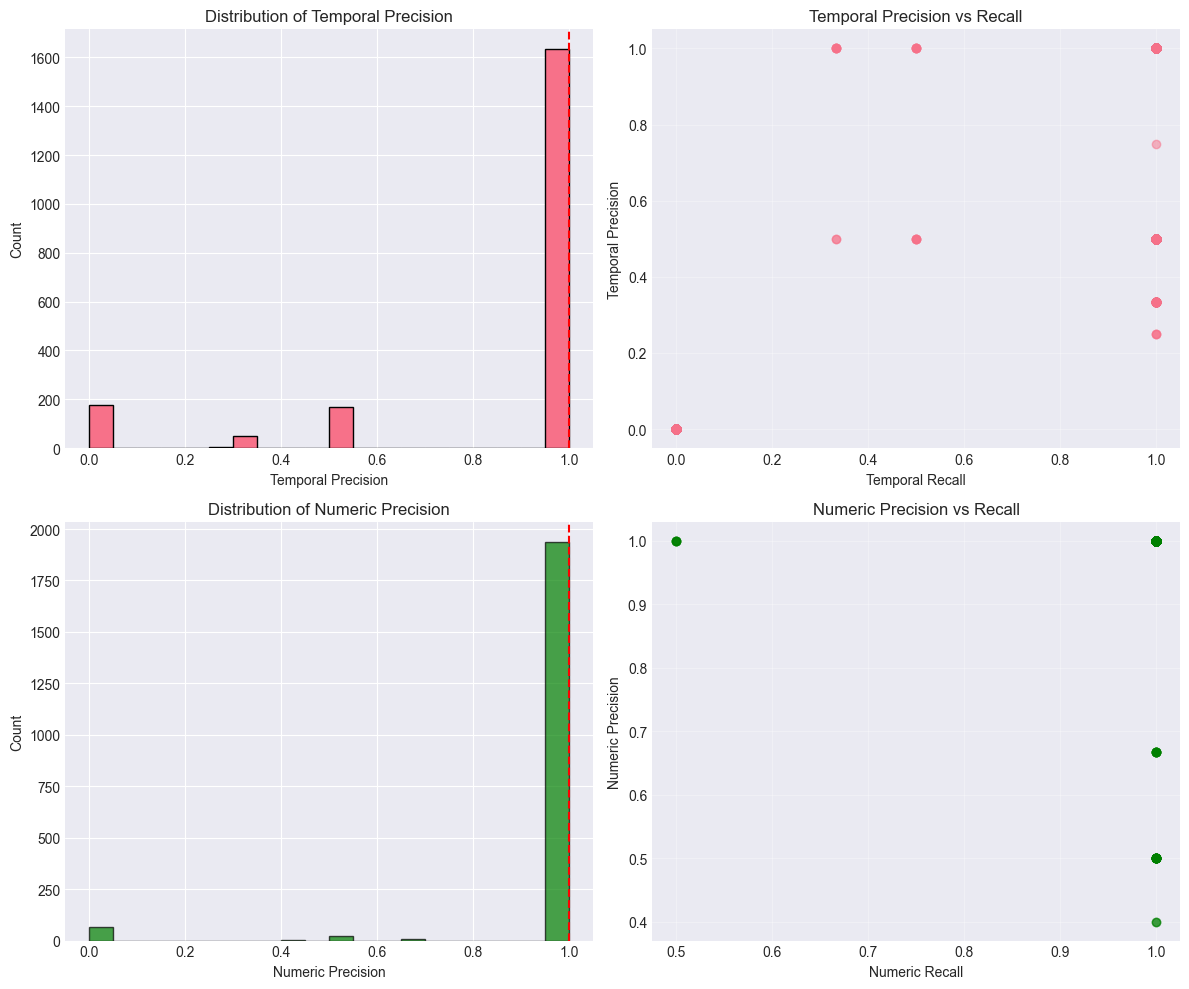

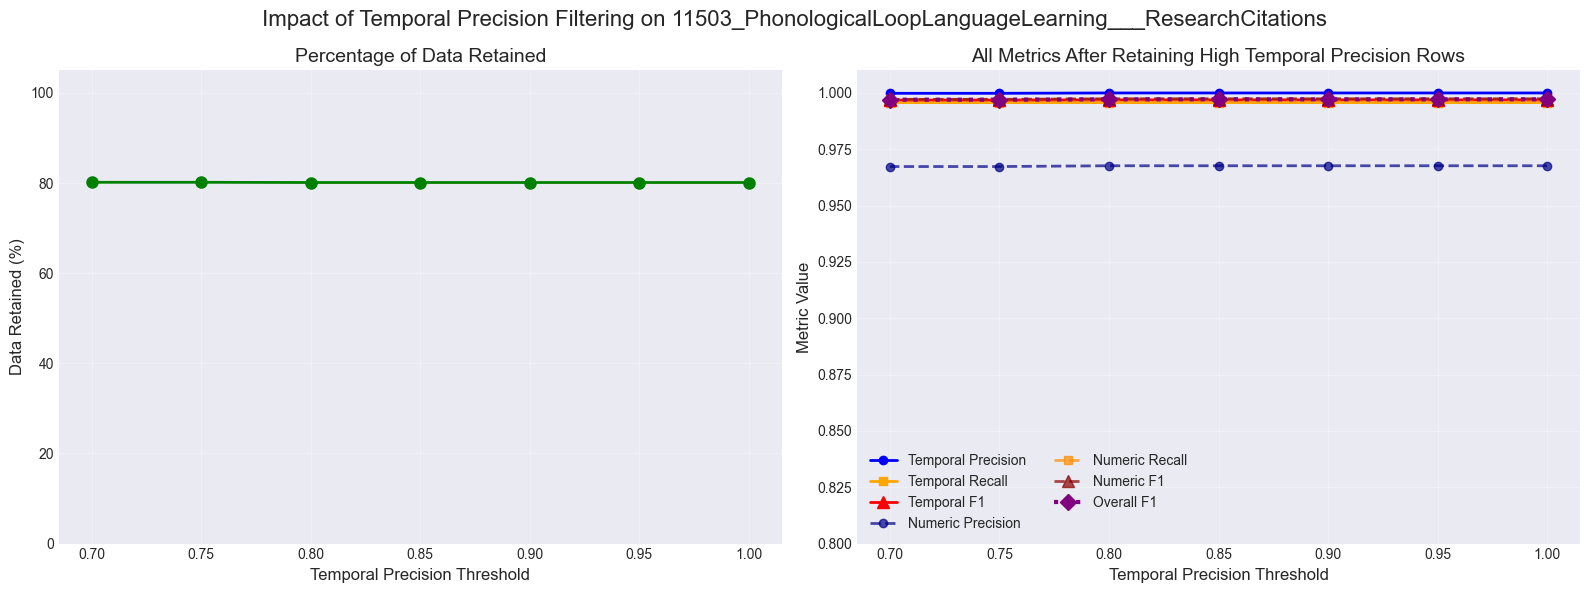

Original dataset size: 2038 rows
Original Unique rows: 510

Original metrics before thresholding
    Temporal Precision: 0.854
    Temporal Recall: 0.918
    Temporal F1: 0.882
    Numeric Precision: 0.960
    Numeric Recall: 0.997
    Numeric F1: 0.995
    Overall F1: 0.938

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       1633         80.1         0.997      0.997      0.997     
0.95       1633         80.1         0.997      0.997      0.997     
0.90       1633         80.1         0.997      0.997      0.997     
0.85       1633         80.1         0.997      0.997      0.997     
0.80       1633         80.1         0.997      0.997      0.997     
0.75       1634         80.2         0.997      0.997      0.997     
0.70       1634         80.2         0.997      0.997      0.997     

Processing: 11544_GovernmentEmployeeRecords___CountryInformati

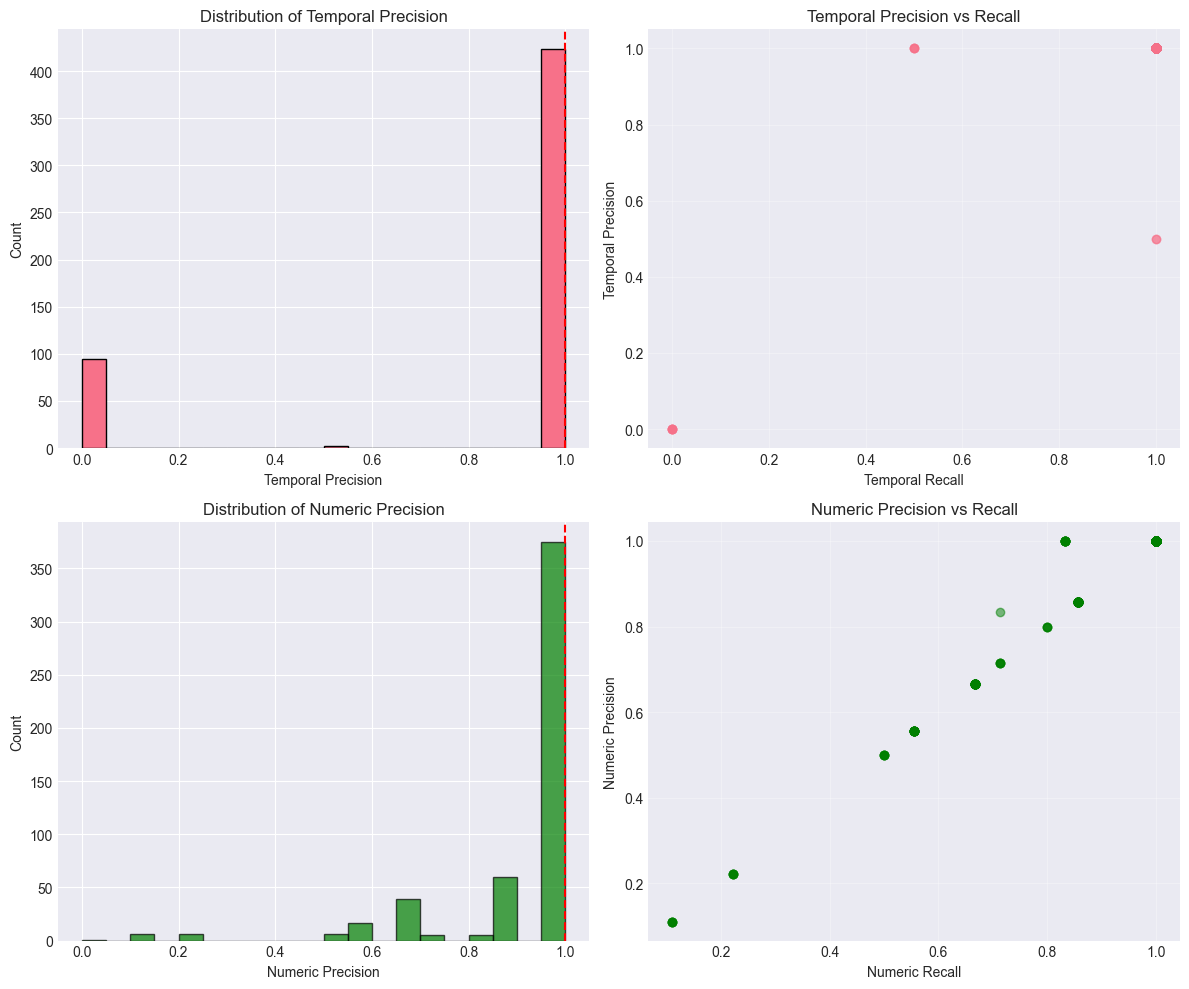

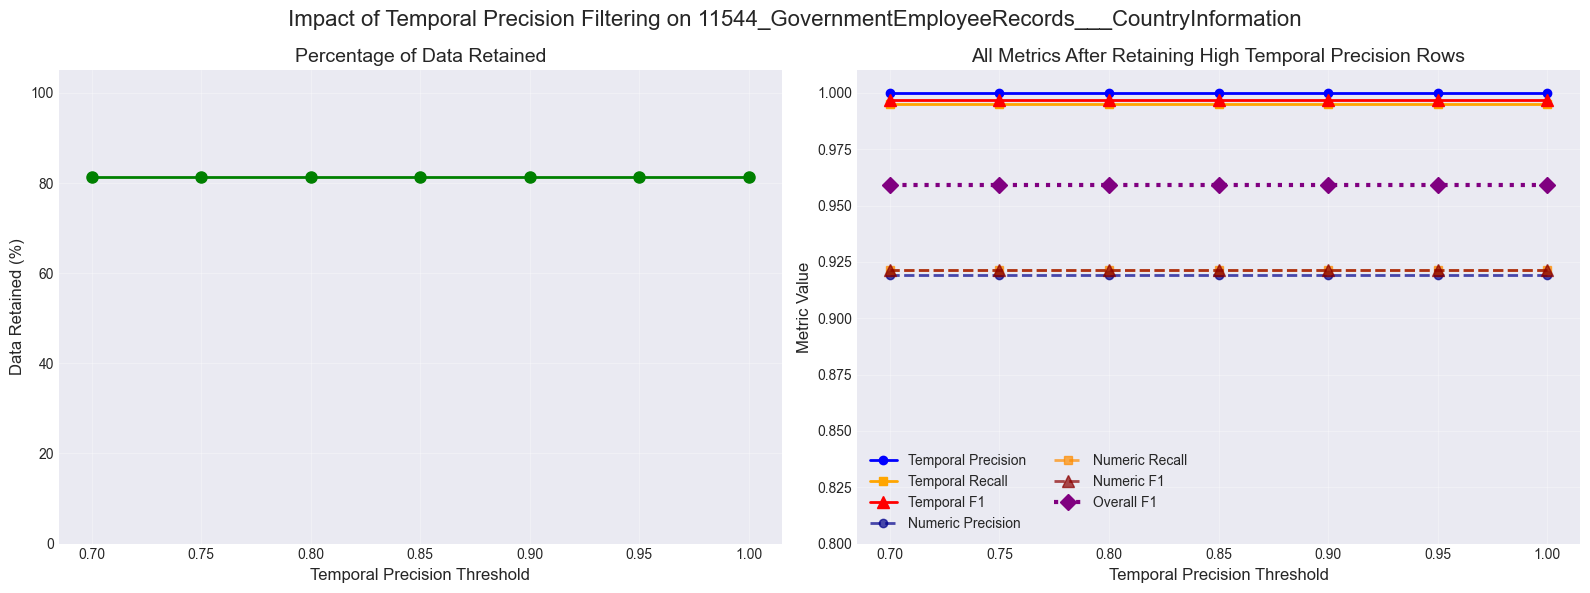

Original dataset size: 520 rows
Original Unique rows: 104

Original metrics before thresholding
    Temporal Precision: 0.815
    Temporal Recall: 0.981
    Temporal F1: 0.981
    Numeric Precision: 0.912
    Numeric Recall: 0.910
    Numeric F1: 0.912
    Overall F1: 0.947

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       423          81.3         0.997      0.921      0.959     
0.95       423          81.3         0.997      0.921      0.959     
0.90       423          81.3         0.997      0.921      0.959     
0.85       423          81.3         0.997      0.921      0.959     
0.80       423          81.3         0.997      0.921      0.959     
0.75       423          81.3         0.997      0.921      0.959     
0.70       423          81.3         0.997      0.921      0.959     

Processing: 12058_Nucleocytoplasmic_Transport_Citations_Db___Sc

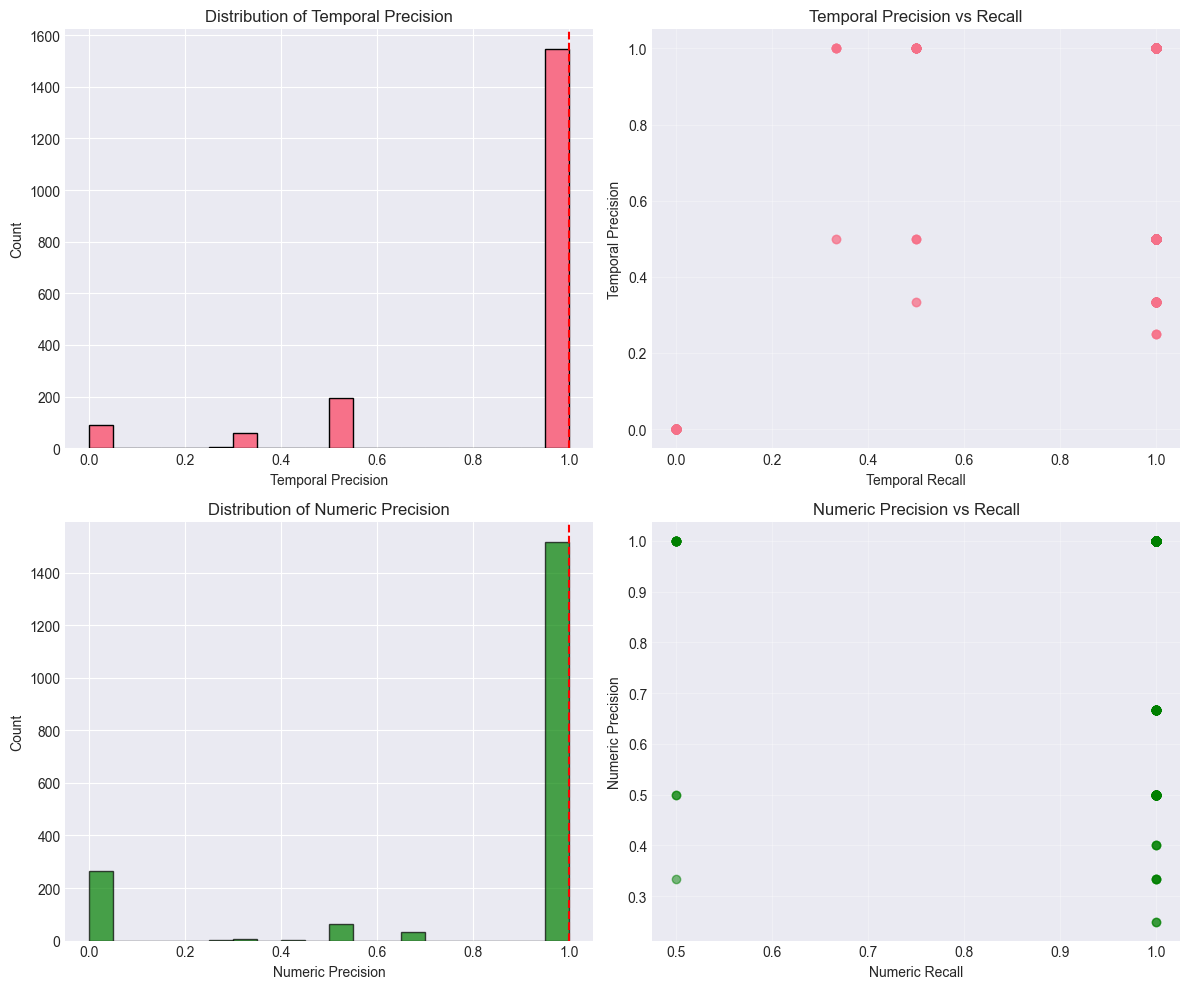

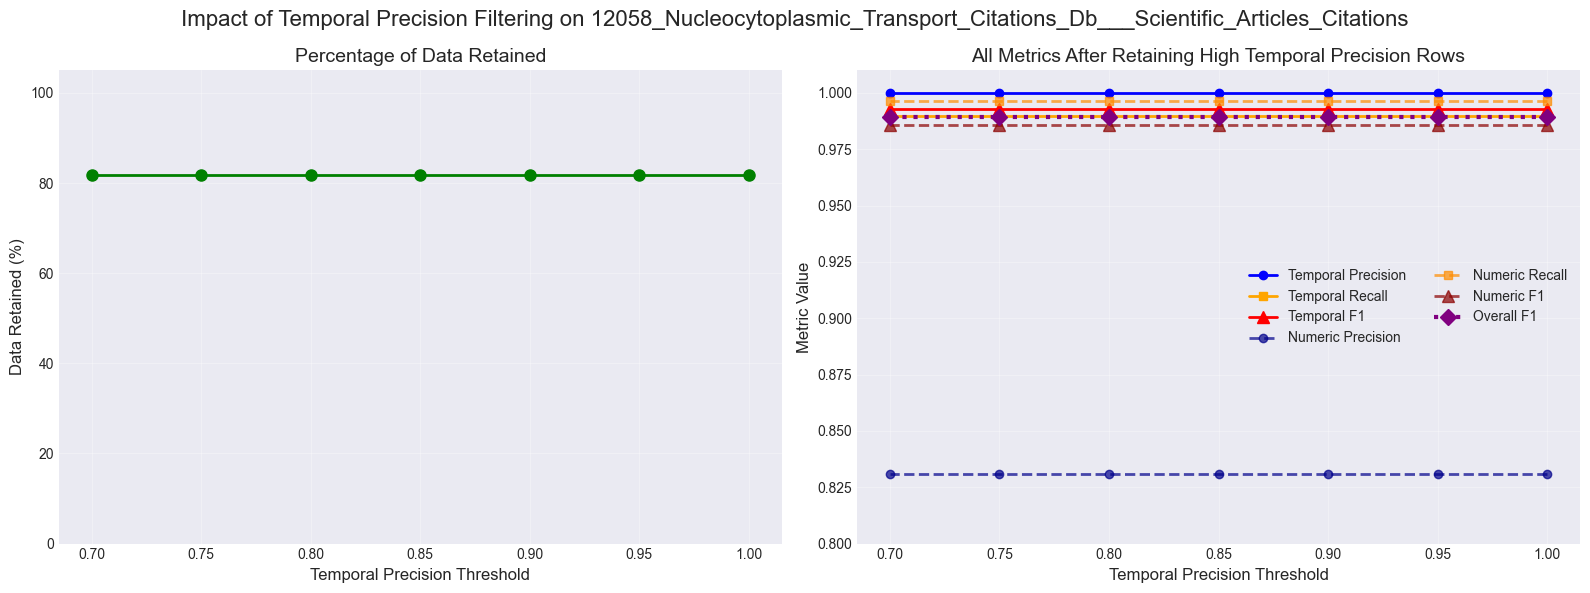

Original dataset size: 1887 rows
Original Unique rows: 629

Original metrics before thresholding
    Temporal Precision: 0.880
    Temporal Recall: 0.946
    Temporal F1: 0.899
    Numeric Precision: 0.834
    Numeric Recall: 0.995
    Numeric F1: 0.977
    Overall F1: 0.938

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       1545         81.9         0.993      0.986      0.989     
0.95       1545         81.9         0.993      0.986      0.989     
0.90       1545         81.9         0.993      0.986      0.989     
0.85       1545         81.9         0.993      0.986      0.989     
0.80       1545         81.9         0.993      0.986      0.989     
0.75       1545         81.9         0.993      0.986      0.989     
0.70       1545         81.9         0.993      0.986      0.989     

Processing: 12242_PhotographerCategoryDatabase___BirthplaceDet

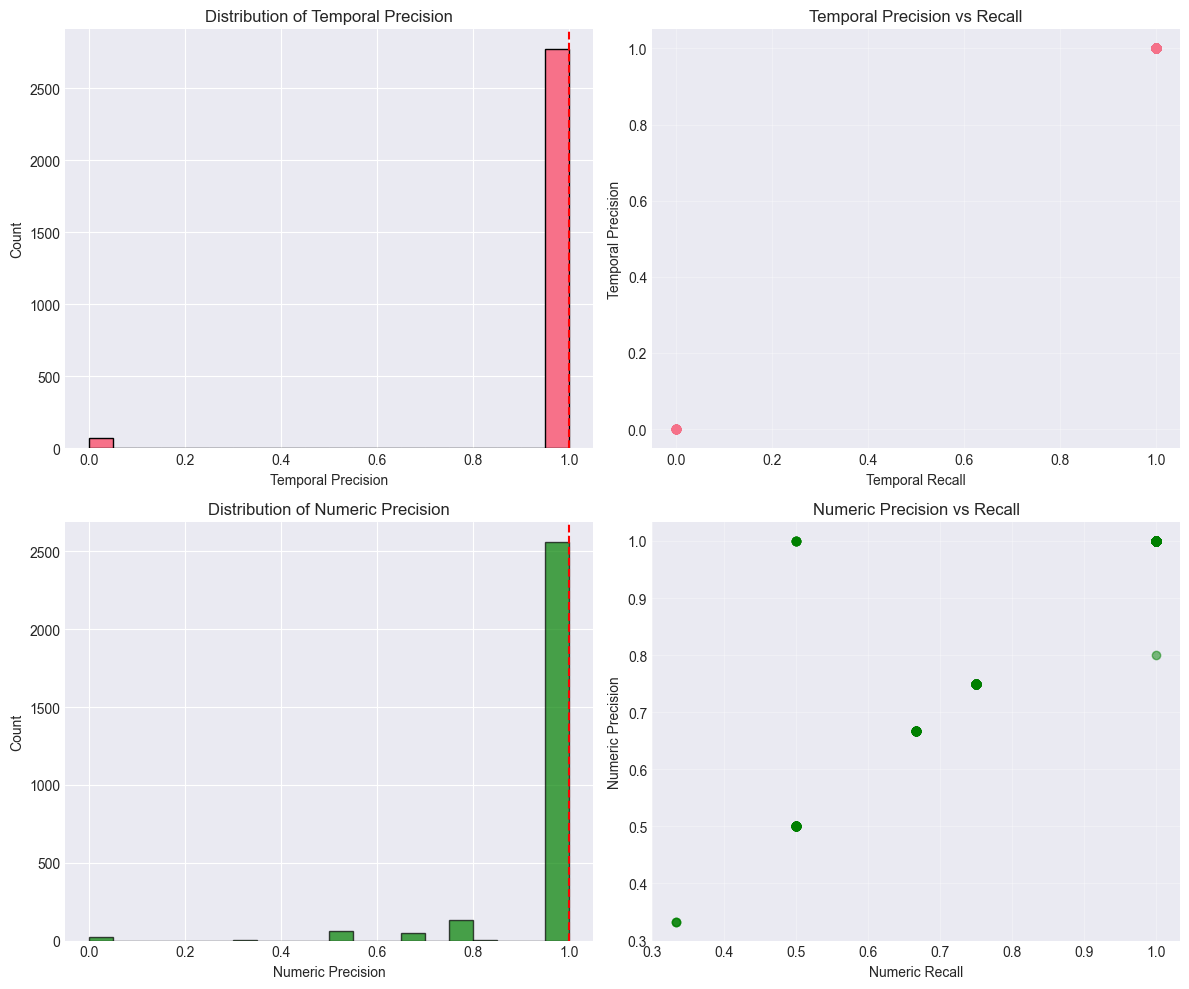

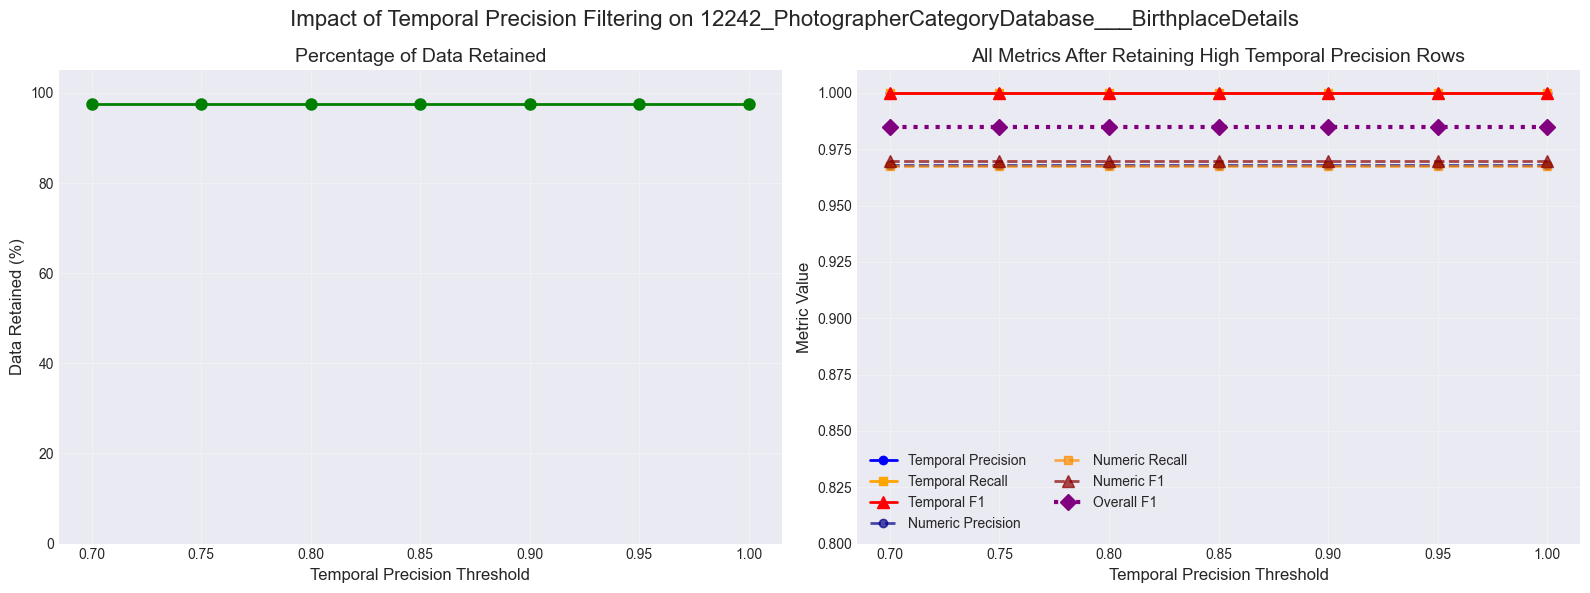

Original dataset size: 2840 rows
Original Unique rows: 710

Original metrics before thresholding
    Temporal Precision: 0.975
    Temporal Recall: 0.987
    Temporal F1: 0.987
    Numeric Precision: 0.962
    Numeric Recall: 0.966
    Numeric F1: 0.970
    Overall F1: 0.979

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       2770         97.5         1.000      0.970      0.985     
0.95       2770         97.5         1.000      0.970      0.985     
0.90       2770         97.5         1.000      0.970      0.985     
0.85       2770         97.5         1.000      0.970      0.985     
0.80       2770         97.5         1.000      0.970      0.985     
0.75       2770         97.5         1.000      0.970      0.985     
0.70       2770         97.5         1.000      0.970      0.985     

Processing: 13562_PhilipSommerPublications___ScholarlyArticles

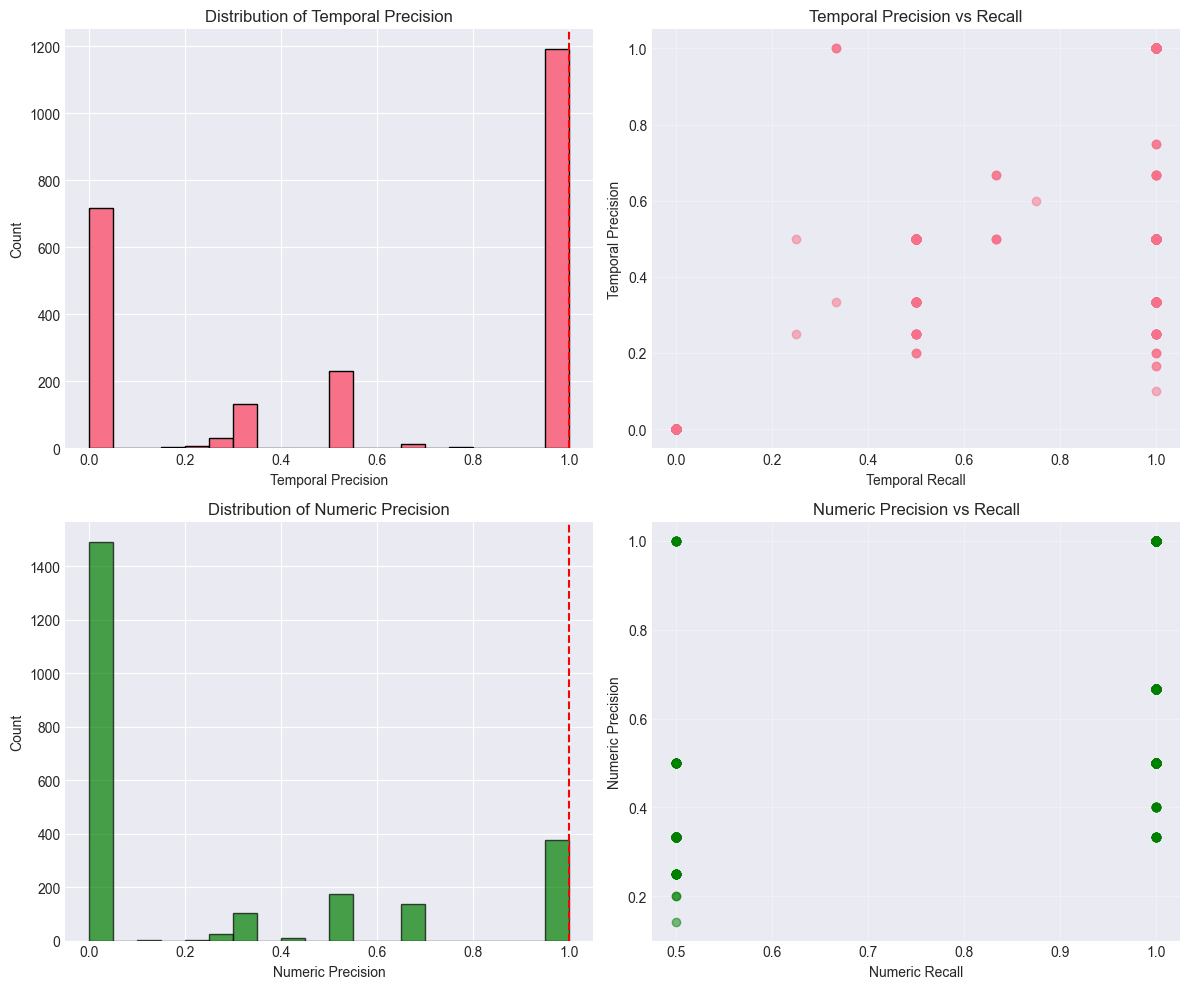

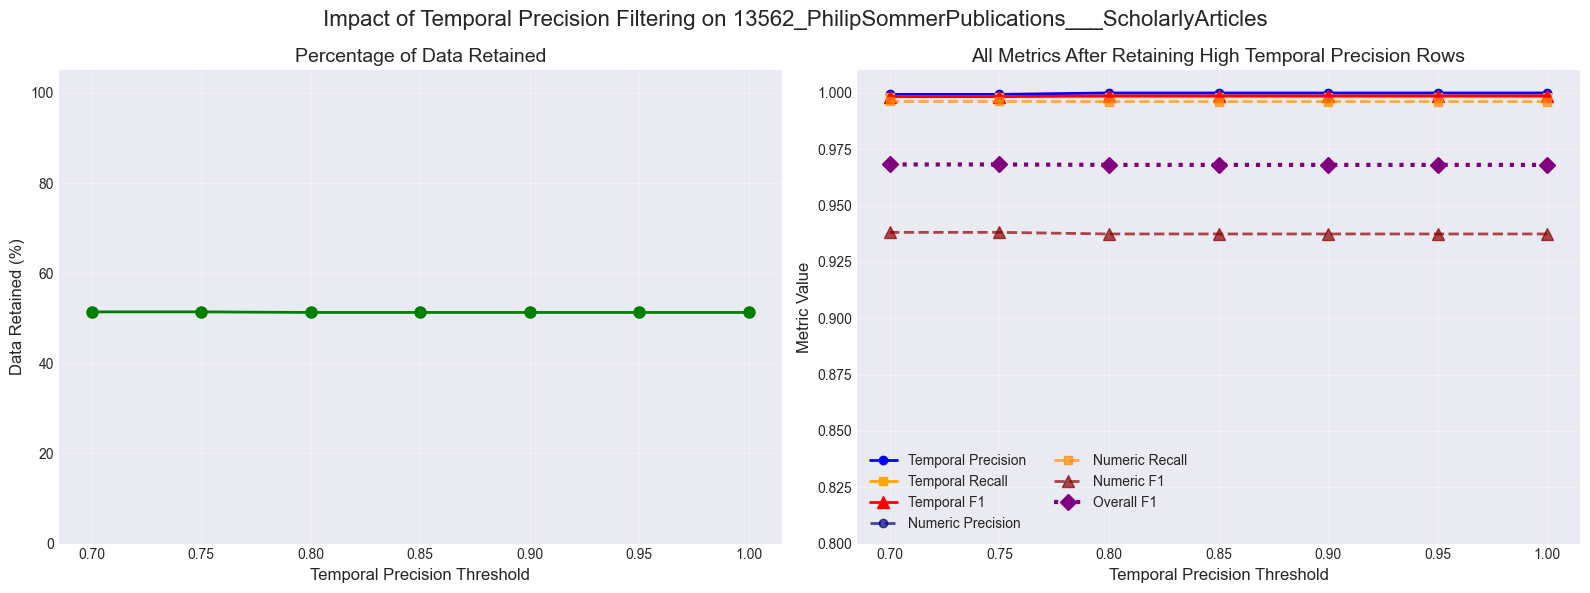

Original dataset size: 2322 rows
Original Unique rows: 582

Original metrics before thresholding
    Temporal Precision: 0.590
    Temporal Recall: 0.696
    Temporal F1: 0.646
    Numeric Precision: 0.259
    Numeric Recall: 0.902
    Numeric F1: 0.785
    Overall F1: 0.715

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       1191         51.3         0.999      0.937      0.968     
0.95       1191         51.3         0.999      0.937      0.968     
0.90       1191         51.3         0.999      0.937      0.968     
0.85       1191         51.3         0.999      0.937      0.968     
0.80       1191         51.3         0.999      0.937      0.968     
0.75       1194         51.4         0.998      0.938      0.968     
0.70       1194         51.4         0.998      0.938      0.968     

Processing: 14010_STEPHEN_P_HUNGER_PUBLICATIONS___PUBLICATION_

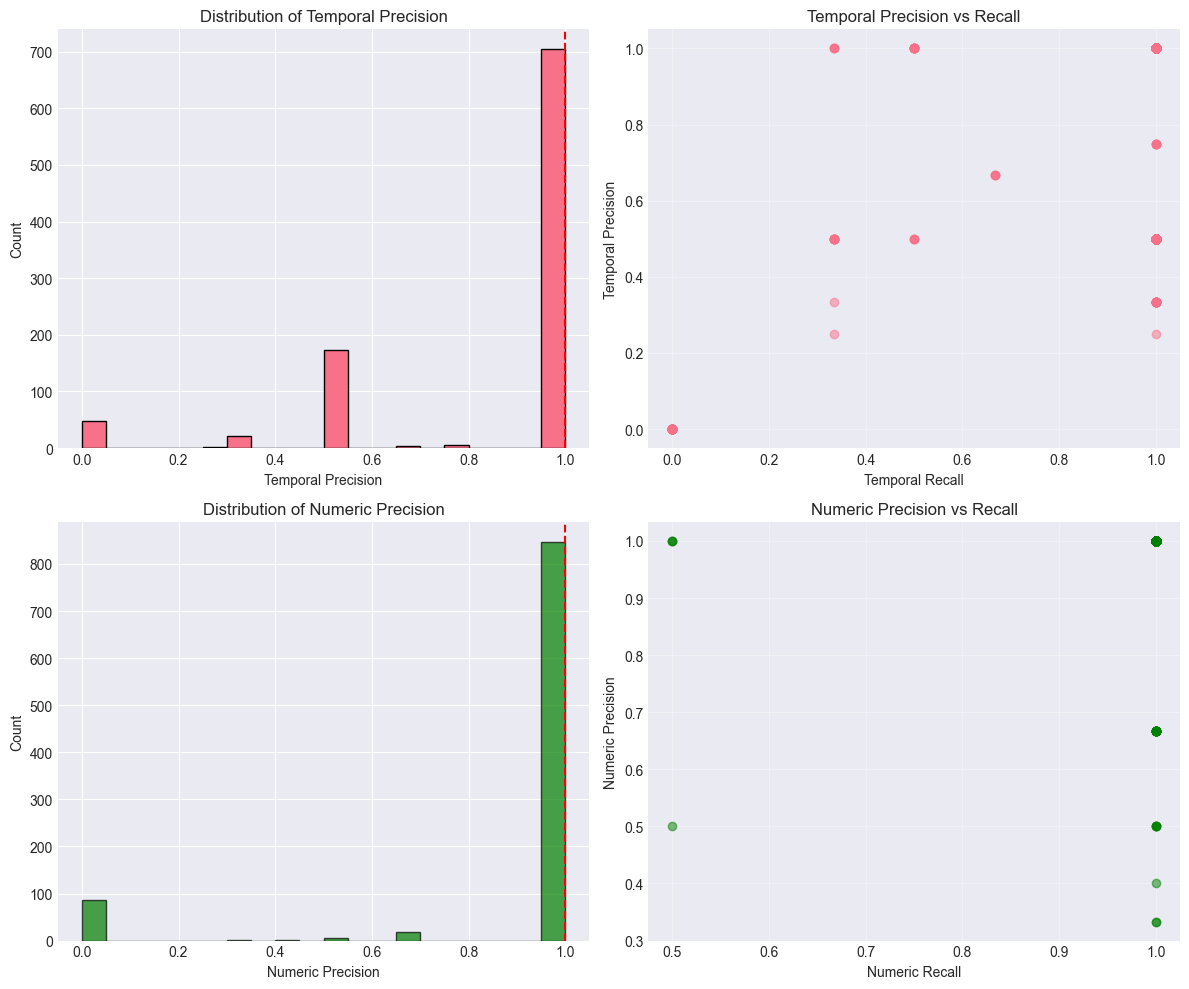

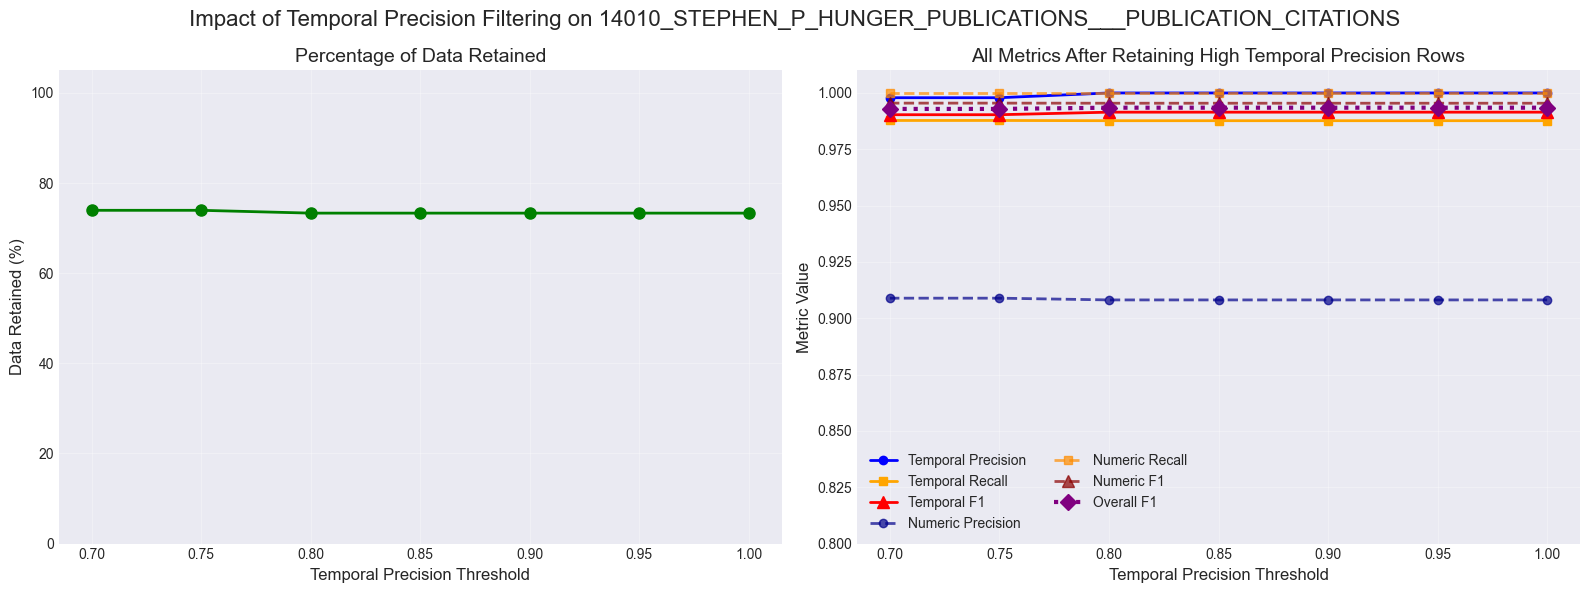

Original dataset size: 960 rows
Original Unique rows: 240

Original metrics before thresholding
    Temporal Precision: 0.840
    Temporal Recall: 0.928
    Temporal F1: 0.864
    Numeric Precision: 0.899
    Numeric Recall: 0.998
    Numeric F1: 0.991
    Overall F1: 0.927

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       704          73.3         0.991      0.995      0.993     
0.95       704          73.3         0.991      0.995      0.993     
0.90       704          73.3         0.991      0.995      0.993     
0.85       704          73.3         0.991      0.995      0.993     
0.80       704          73.3         0.991      0.995      0.993     
0.75       710          74.0         0.990      0.995      0.993     
0.70       710          74.0         0.990      0.995      0.993     

Processing: 14954_UEFA_EURO_1976_QUALIFYING_RECORDS___COUNTRY_I

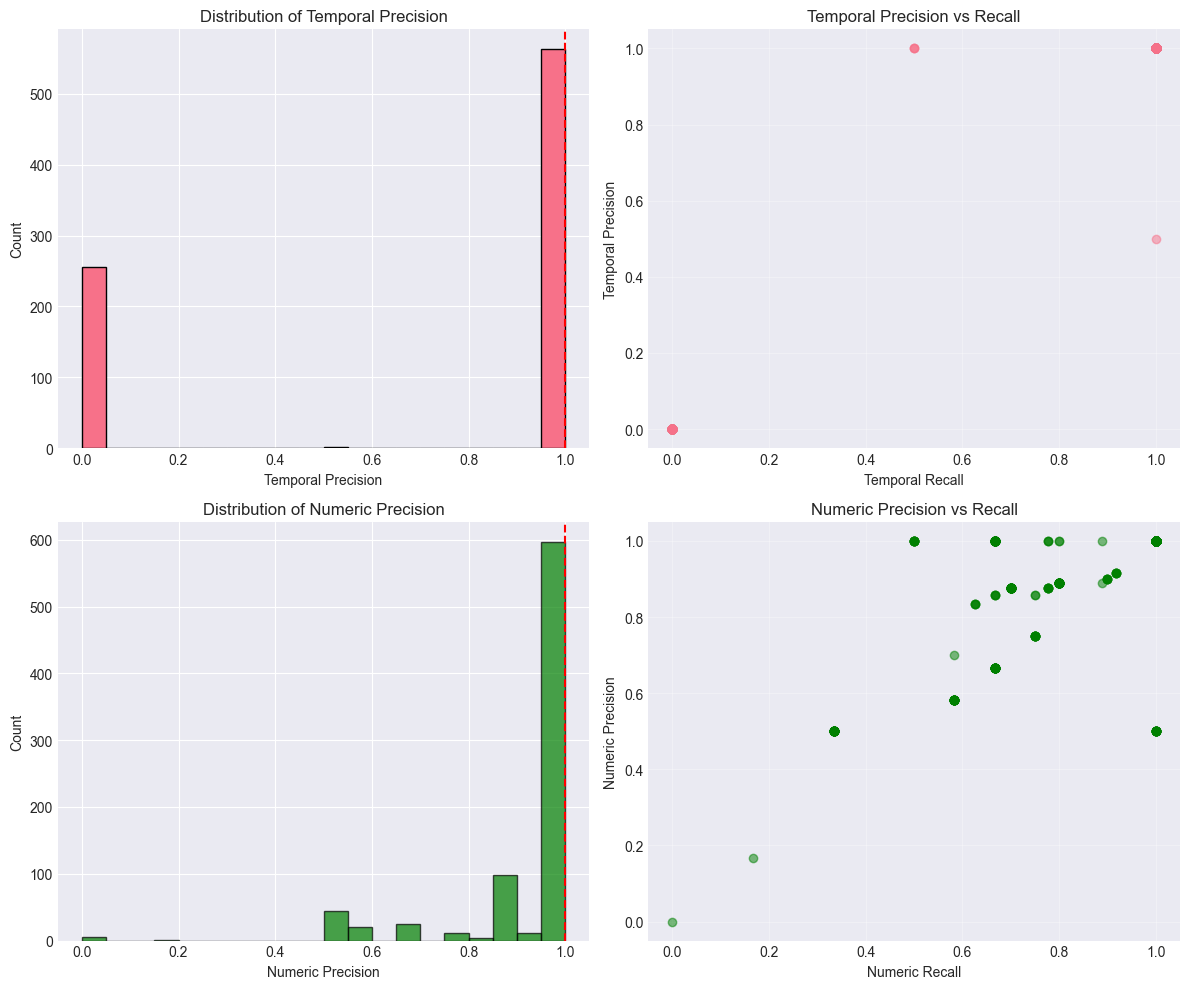

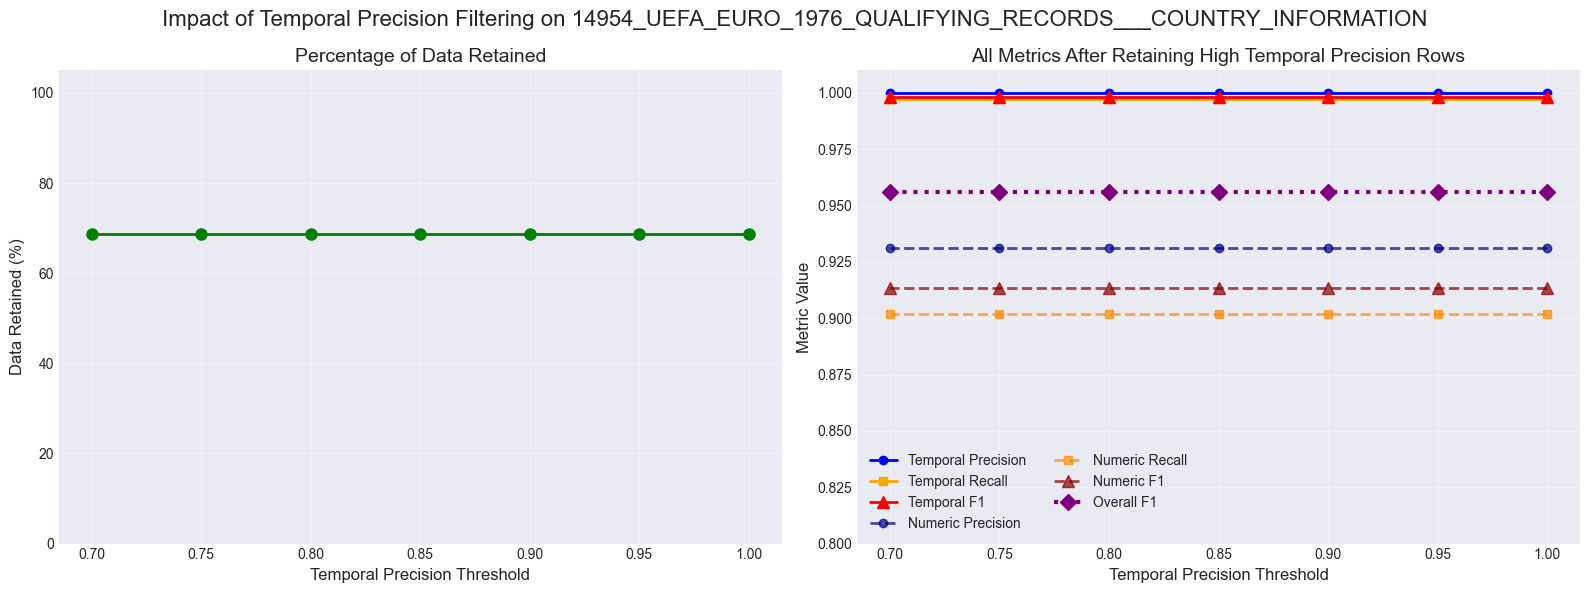

Original dataset size: 820 rows
Original Unique rows: 164

Original metrics before thresholding
    Temporal Precision: 0.687
    Temporal Recall: 0.856
    Temporal F1: 0.856
    Numeric Precision: 0.924
    Numeric Recall: 0.890
    Numeric F1: 0.904
    Overall F1: 0.880

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       563          68.7         0.998      0.914      0.956     
0.95       563          68.7         0.998      0.914      0.956     
0.90       563          68.7         0.998      0.914      0.956     
0.85       563          68.7         0.998      0.914      0.956     
0.80       563          68.7         0.998      0.914      0.956     
0.75       563          68.7         0.998      0.914      0.956     
0.70       563          68.7         0.998      0.914      0.956     

Processing: 15981_detroit_trauma_ptsd_community_survey_1996___r

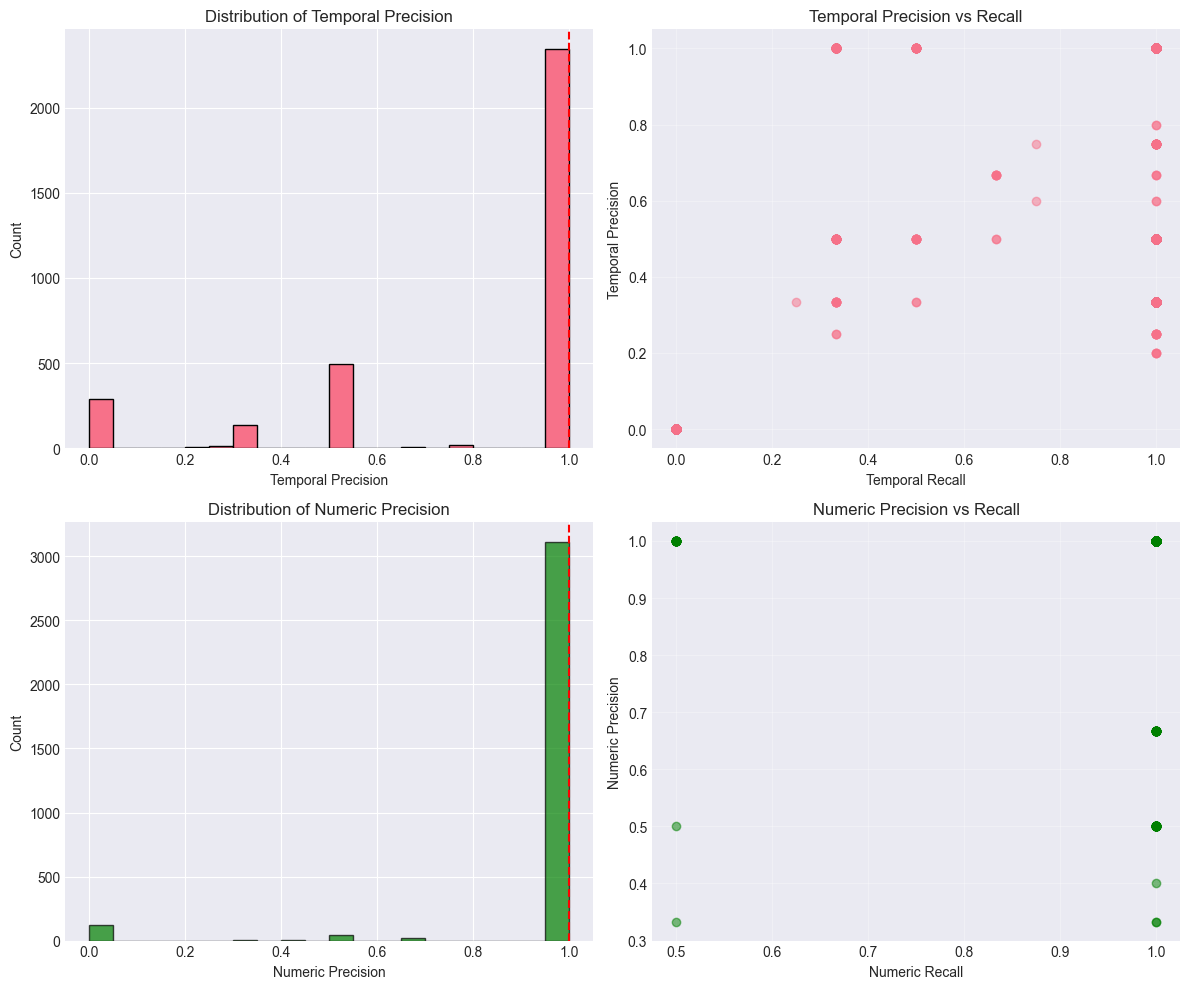

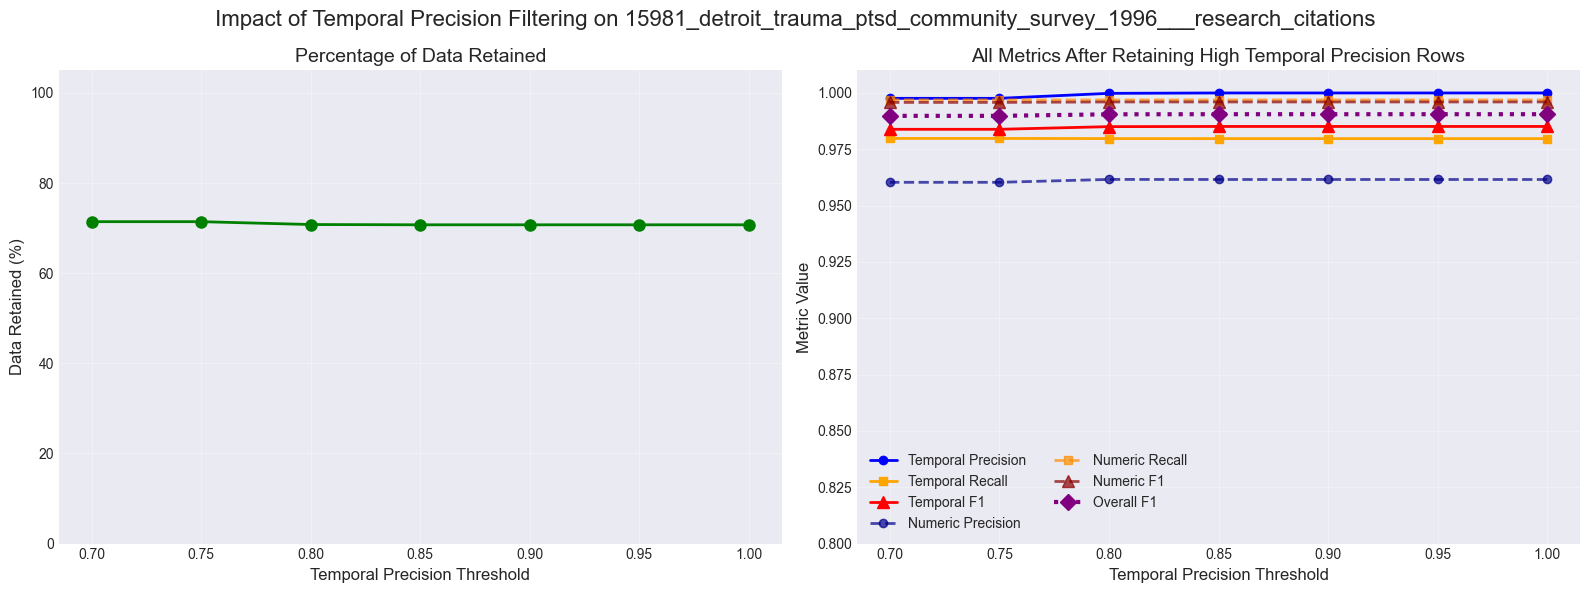

Original dataset size: 3312 rows
Original Unique rows: 1104

Original metrics before thresholding
    Temporal Precision: 0.804
    Temporal Recall: 0.888
    Temporal F1: 0.824
    Numeric Precision: 0.953
    Numeric Recall: 0.995
    Numeric F1: 0.991
    Overall F1: 0.908

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       2343         70.7         0.985      0.996      0.991     
0.95       2343         70.7         0.985      0.996      0.991     
0.90       2343         70.7         0.985      0.996      0.991     
0.85       2343         70.7         0.985      0.996      0.991     
0.80       2345         70.8         0.985      0.996      0.991     
0.75       2366         71.4         0.984      0.996      0.990     
0.70       2366         71.4         0.984      0.996      0.990     

Processing: 16467_Thymus_Expression_Gene_Database___Thymus_Ex

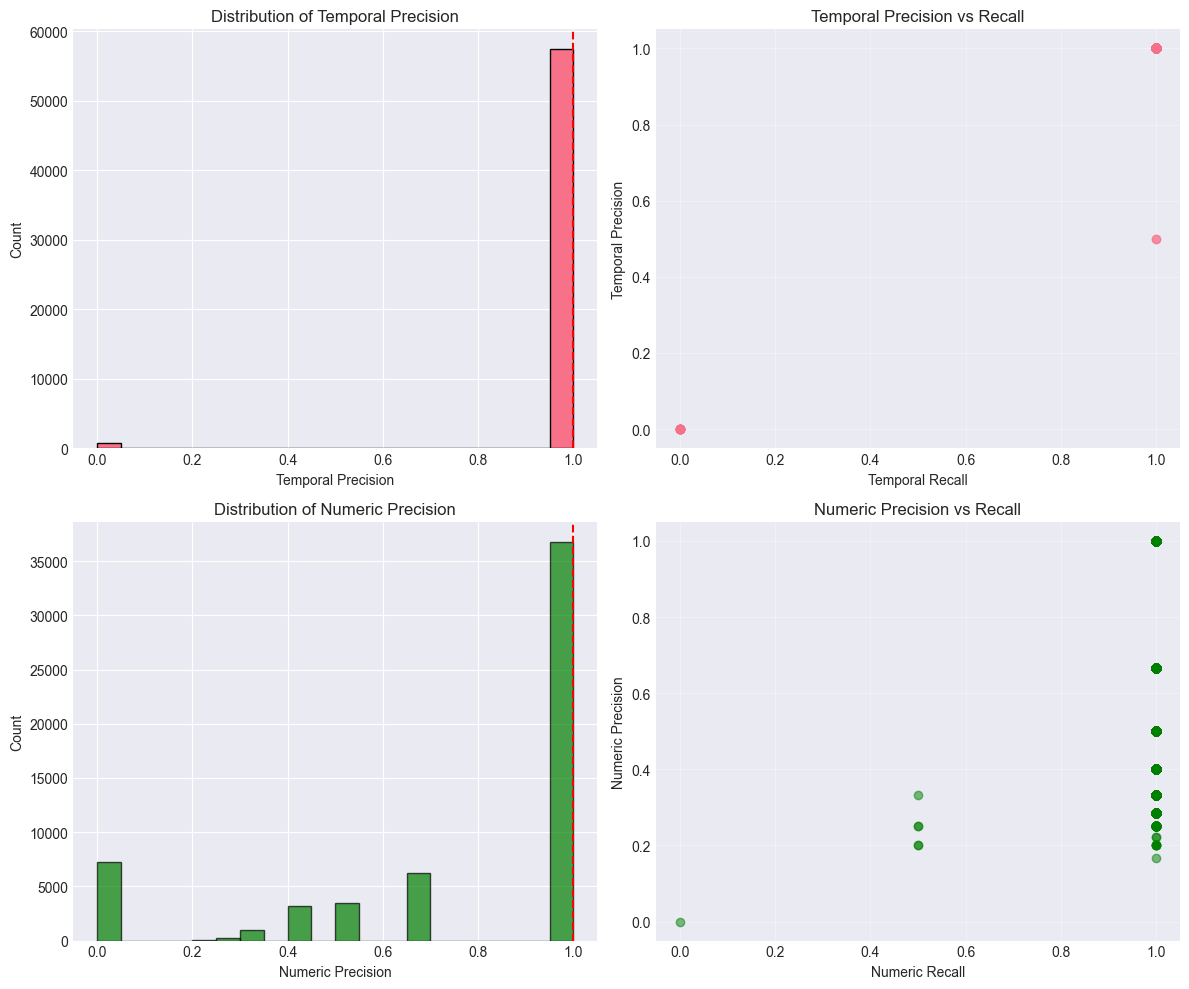

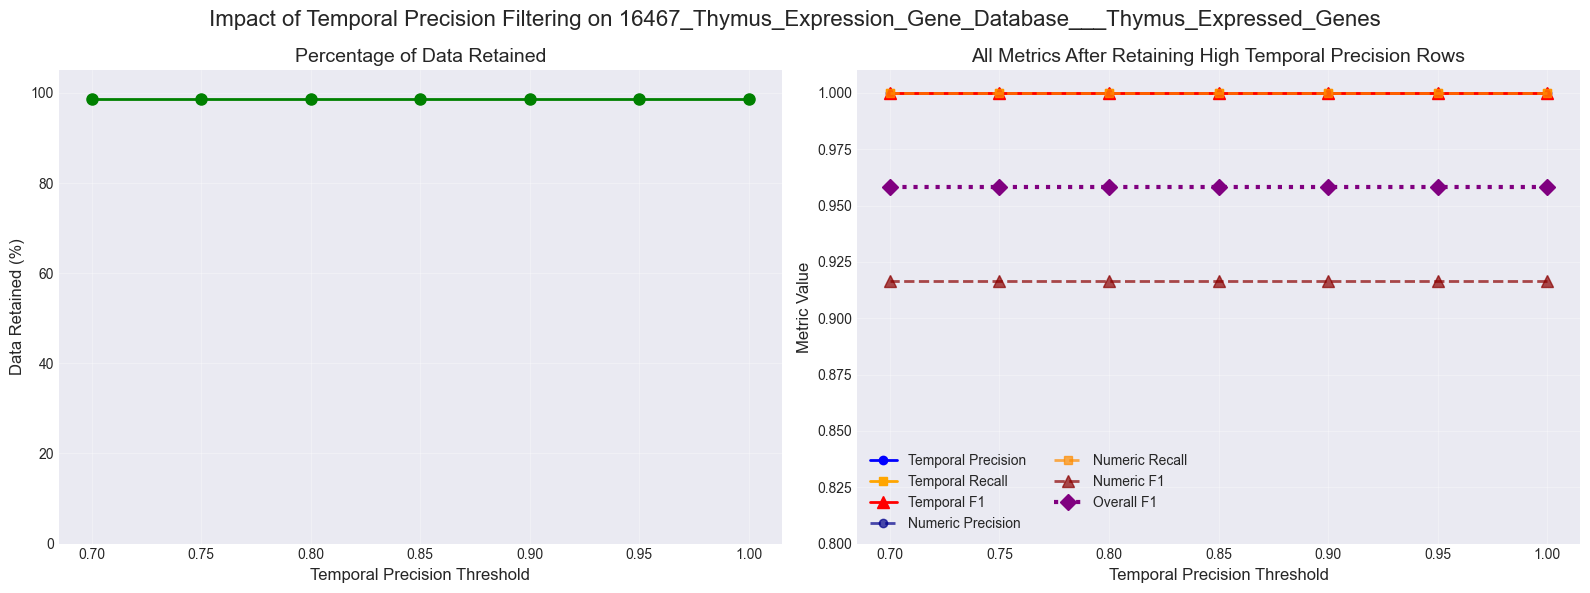

Original dataset size: 58176 rows
Original Unique rows: 14567

Original metrics before thresholding
    Temporal Precision: 0.987
    Temporal Recall: 1.000
    Temporal F1: 1.000
    Numeric Precision: 0.763
    Numeric Recall: 1.000
    Numeric F1: 0.913
    Overall F1: 0.956

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       57390        98.6         1.000      0.917      0.958     
0.95       57390        98.6         1.000      0.917      0.958     
0.90       57390        98.6         1.000      0.917      0.958     
0.85       57390        98.6         1.000      0.917      0.958     
0.80       57390        98.6         1.000      0.917      0.958     
0.75       57390        98.6         1.000      0.917      0.958     
0.70       57390        98.6         1.000      0.917      0.958     

Processing: 16881_SurvivalDataEvaluationDb___JournalPublica

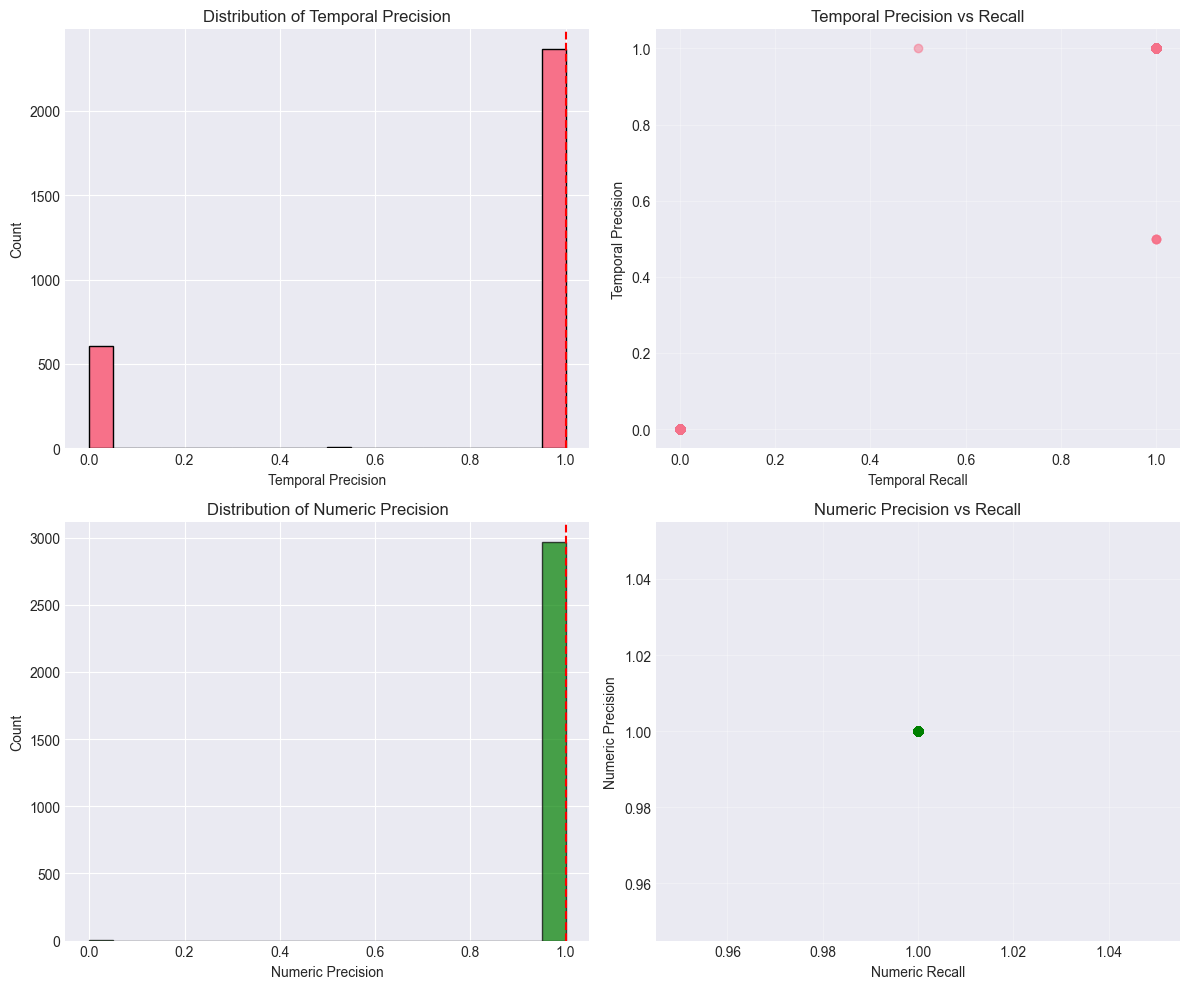

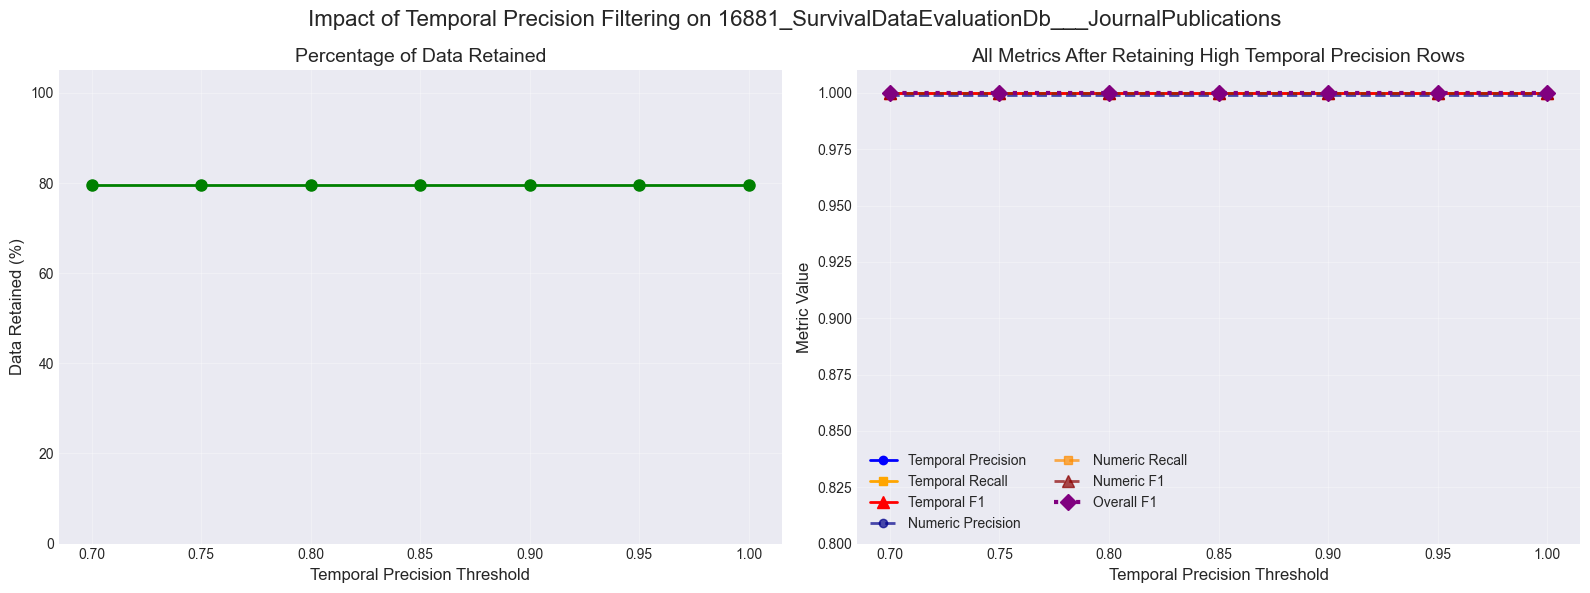

Original dataset size: 2972 rows
Original Unique rows: 743

Original metrics before thresholding
    Temporal Precision: 0.796
    Temporal Recall: 0.843
    Temporal F1: 0.842
    Numeric Precision: 0.999
    Numeric Recall: 1.000
    Numeric F1: 1.000
    Overall F1: 0.921

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       2365         79.6         1.000      1.000      1.000     
0.95       2365         79.6         1.000      1.000      1.000     
0.90       2365         79.6         1.000      1.000      1.000     
0.85       2365         79.6         1.000      1.000      1.000     
0.80       2365         79.6         1.000      1.000      1.000     
0.75       2365         79.6         1.000      1.000      1.000     
0.70       2365         79.6         1.000      1.000      1.000     

Processing: 16883_Hydrogel_Research_Publications___Hydrogel_Ar

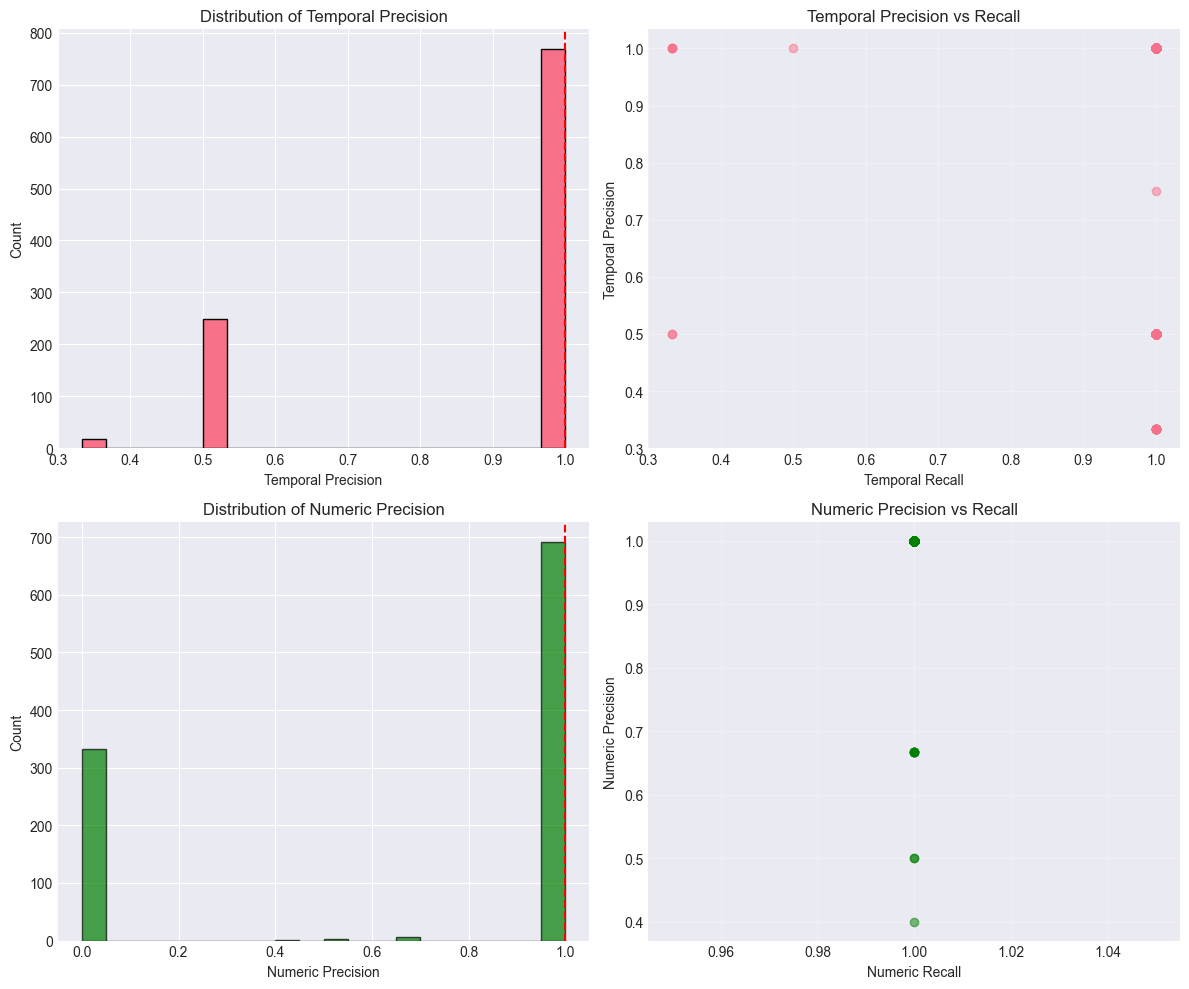

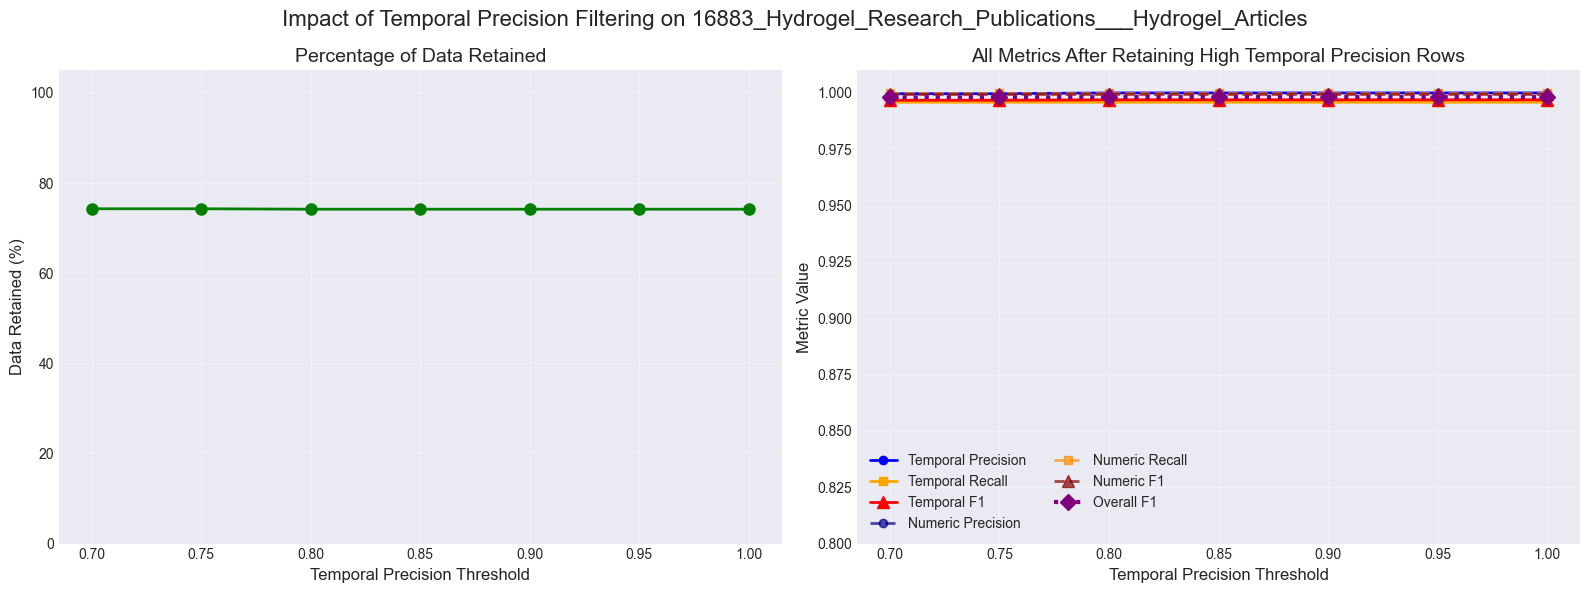

Original dataset size: 1035 rows
Original Unique rows: 345

Original metrics before thresholding
    Temporal Precision: 0.868
    Temporal Recall: 0.996
    Temporal F1: 0.909
    Numeric Precision: 0.674
    Numeric Recall: 1.000
    Numeric F1: 0.996
    Overall F1: 0.952

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       768          74.2         0.997      0.999      0.998     
0.95       768          74.2         0.997      0.999      0.998     
0.90       768          74.2         0.997      0.999      0.998     
0.85       768          74.2         0.997      0.999      0.998     
0.80       768          74.2         0.997      0.999      0.998     
0.75       769          74.3         0.997      0.999      0.998     
0.70       769          74.3         0.997      0.999      0.998     

Processing: 17592_ObstetricsGynecologyResearchPublications___R

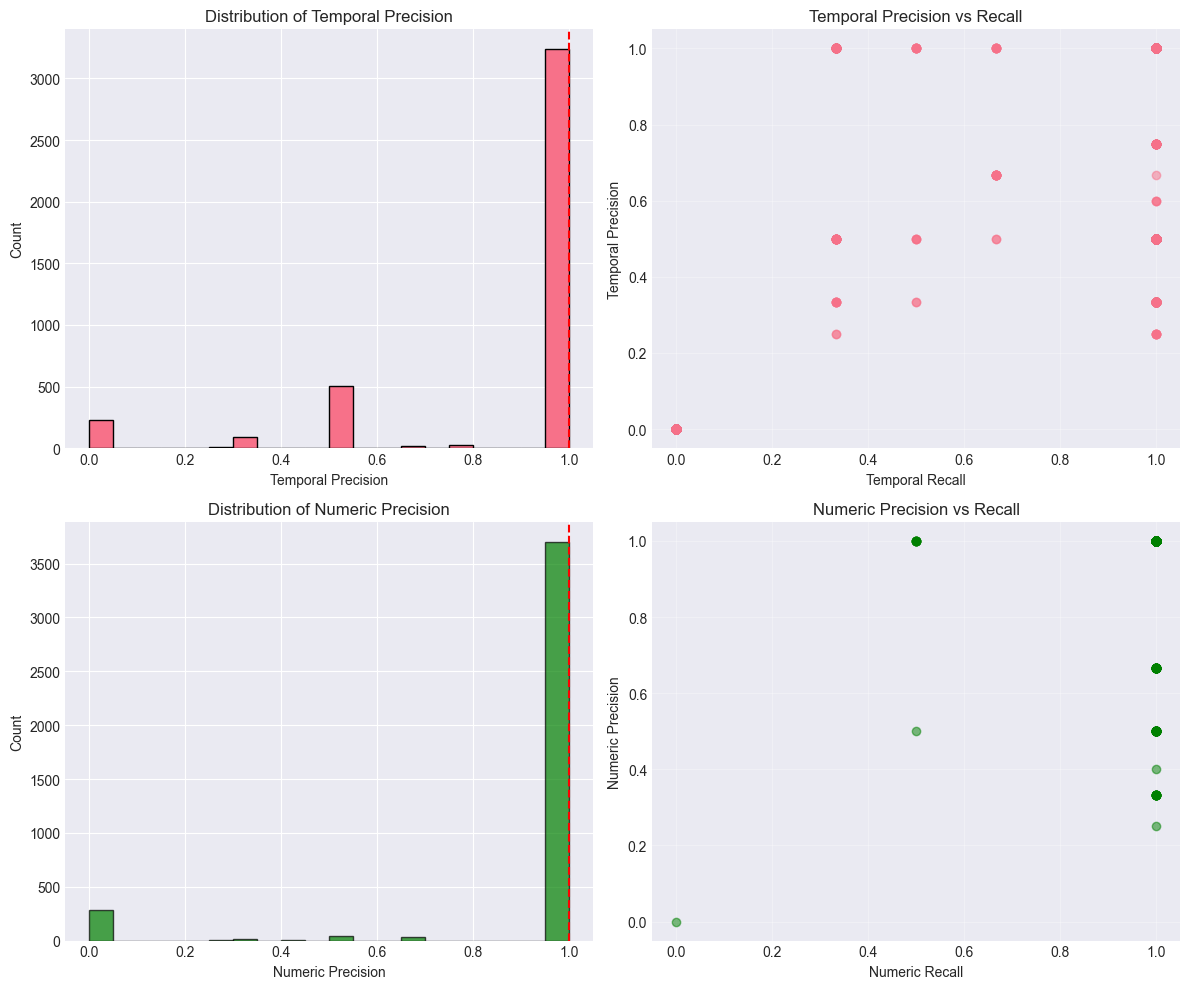

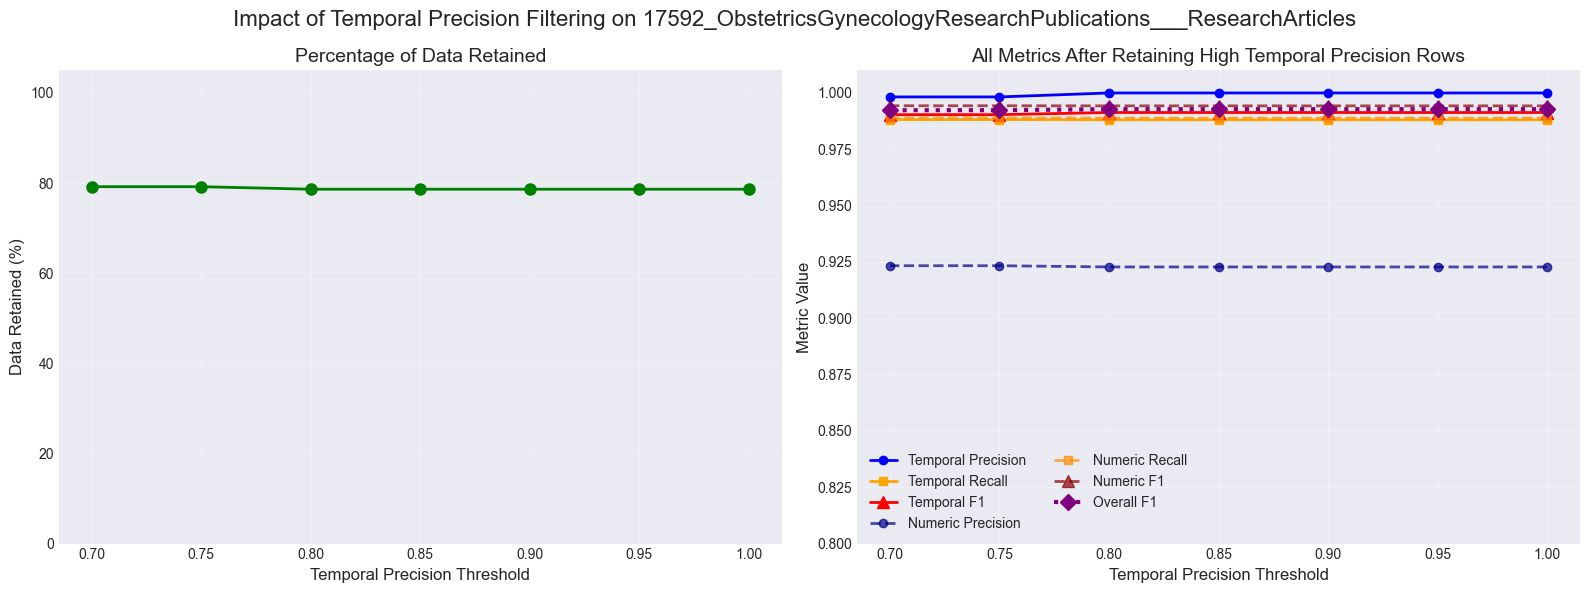

Original dataset size: 4115 rows
Original Unique rows: 1029

Original metrics before thresholding
    Temporal Precision: 0.864
    Temporal Recall: 0.946
    Temporal F1: 0.898
    Numeric Precision: 0.919
    Numeric Recall: 0.990
    Numeric F1: 0.991
    Overall F1: 0.945

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       3236         78.6         0.991      0.994      0.993     
0.95       3236         78.6         0.991      0.994      0.993     
0.90       3236         78.6         0.991      0.994      0.993     
0.85       3236         78.6         0.991      0.994      0.993     
0.80       3236         78.6         0.991      0.994      0.993     
0.75       3259         79.2         0.990      0.994      0.992     
0.70       3259         79.2         0.990      0.994      0.992     

Processing: 18577_EsophagealSquamousCellCarcinomaResearchDb__

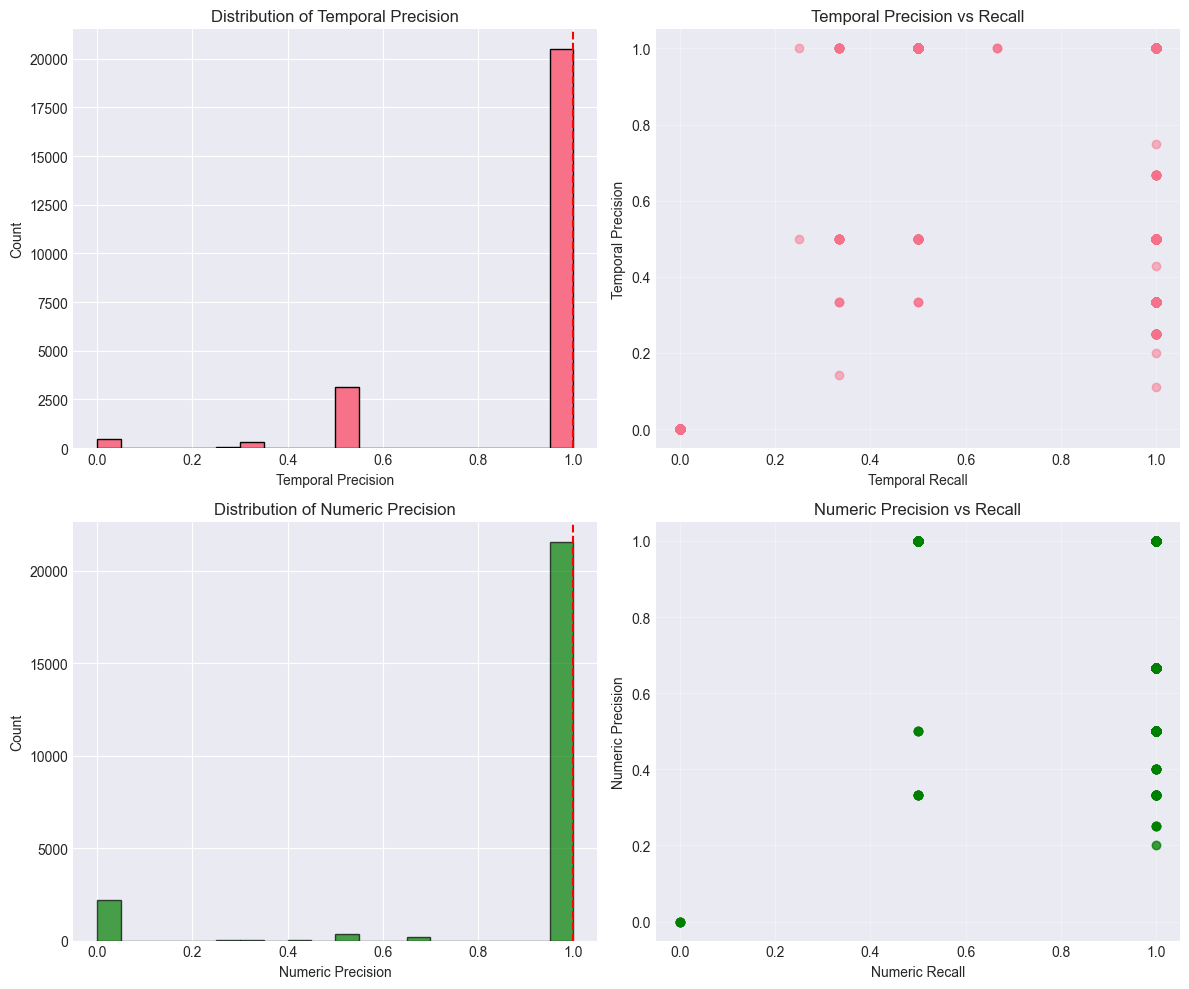

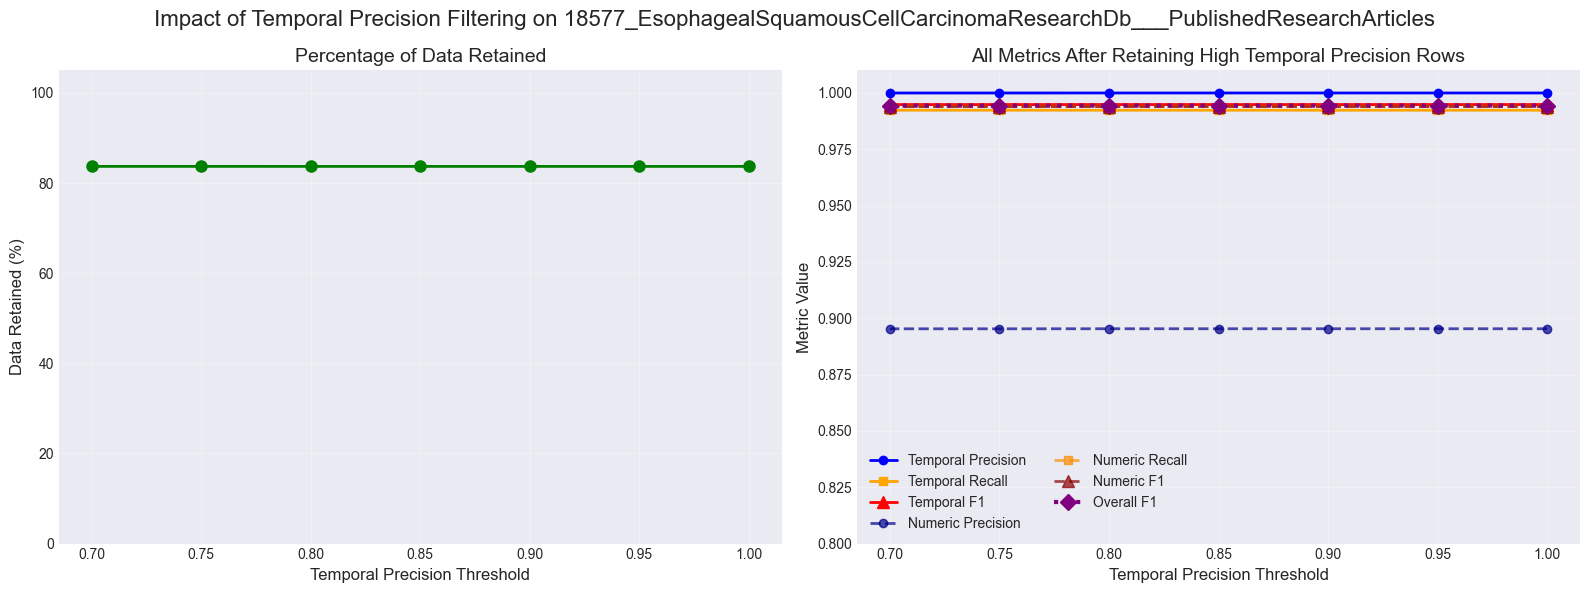

Original dataset size: 24468 rows
Original Unique rows: 6118

Original metrics before thresholding
    Temporal Precision: 0.906
    Temporal Recall: 0.972
    Temporal F1: 0.925
    Numeric Precision: 0.898
    Numeric Recall: 0.991
    Numeric F1: 0.988
    Overall F1: 0.957

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       20480        83.7         0.995      0.994      0.994     
0.95       20480        83.7         0.995      0.994      0.994     
0.90       20480        83.7         0.995      0.994      0.994     
0.85       20480        83.7         0.995      0.994      0.994     
0.80       20480        83.7         0.995      0.994      0.994     
0.75       20481        83.7         0.995      0.994      0.994     
0.70       20481        83.7         0.995      0.994      0.994     

Processing: 18692_GermanWritingLanguageProfiles___GermanAdmi

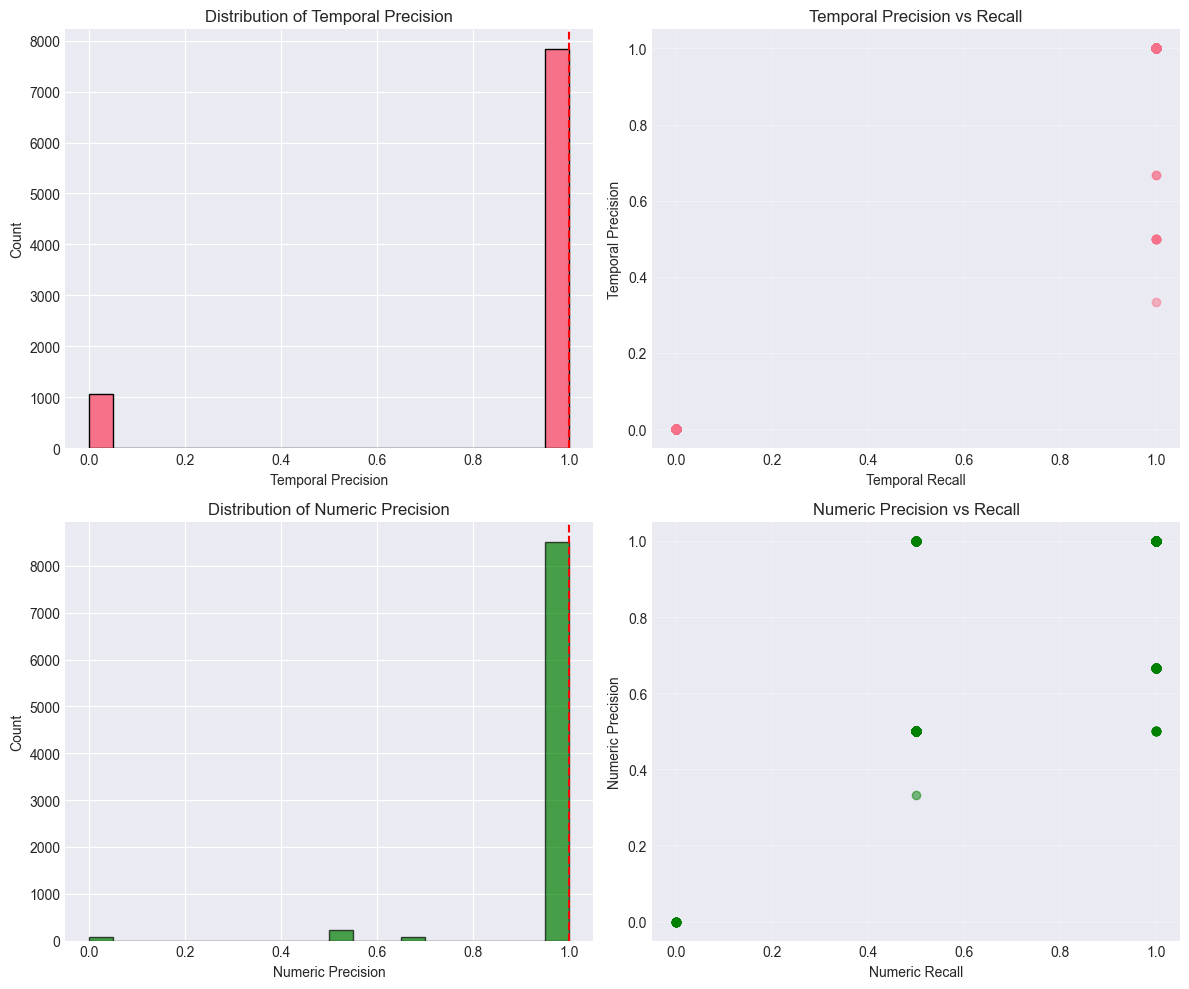

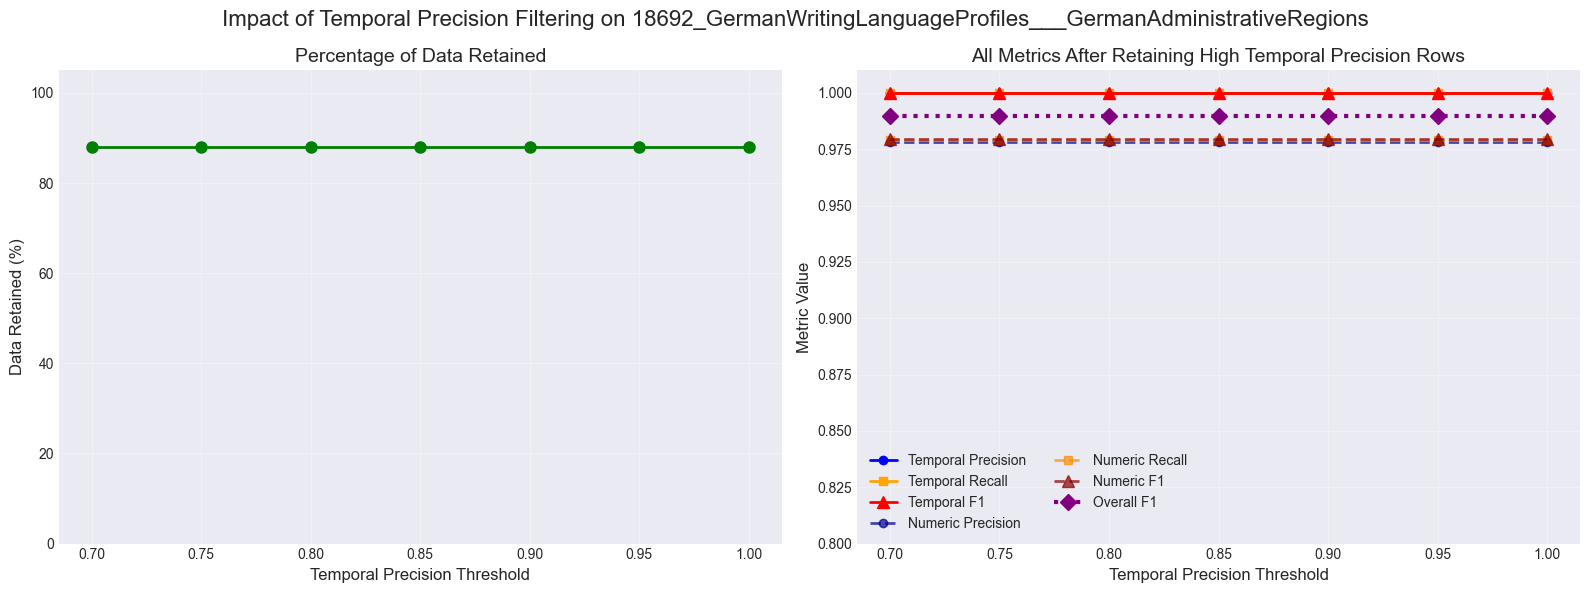

Original dataset size: 8908 rows
Original Unique rows: 2970

Original metrics before thresholding
    Temporal Precision: 0.880
    Temporal Recall: 0.887
    Temporal F1: 0.887
    Numeric Precision: 0.975
    Numeric Recall: 0.979
    Numeric F1: 0.980
    Overall F1: 0.934

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       7830         87.9         1.000      0.980      0.990     
0.95       7830         87.9         1.000      0.980      0.990     
0.90       7830         87.9         1.000      0.980      0.990     
0.85       7830         87.9         1.000      0.980      0.990     
0.80       7830         87.9         1.000      0.980      0.990     
0.75       7830         87.9         1.000      0.980      0.990     
0.70       7830         87.9         1.000      0.980      0.990     

Processing: 18744_WILLIAM_K_BROOKS_PUBLICATIONS___SCIENTIFIC_

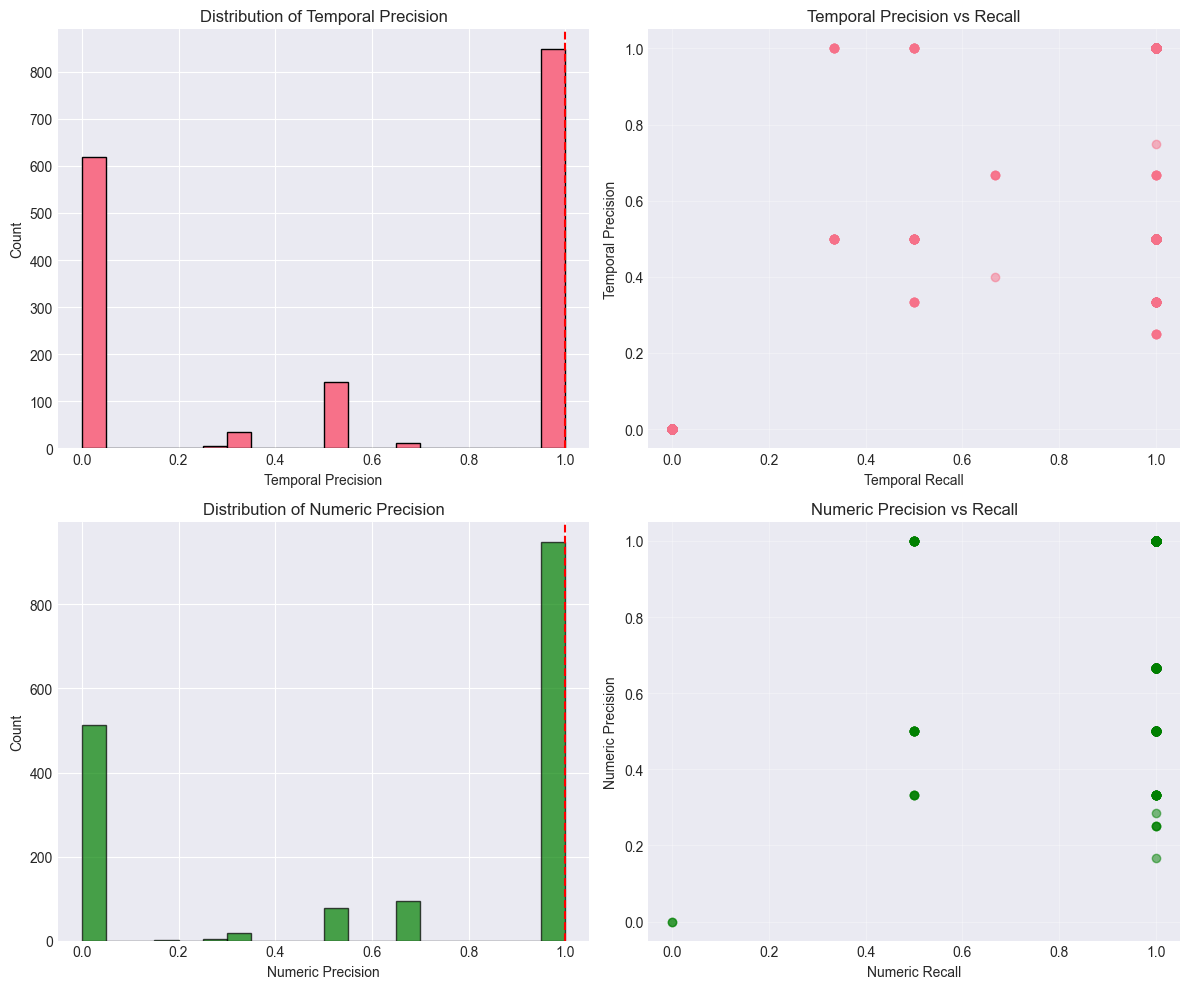

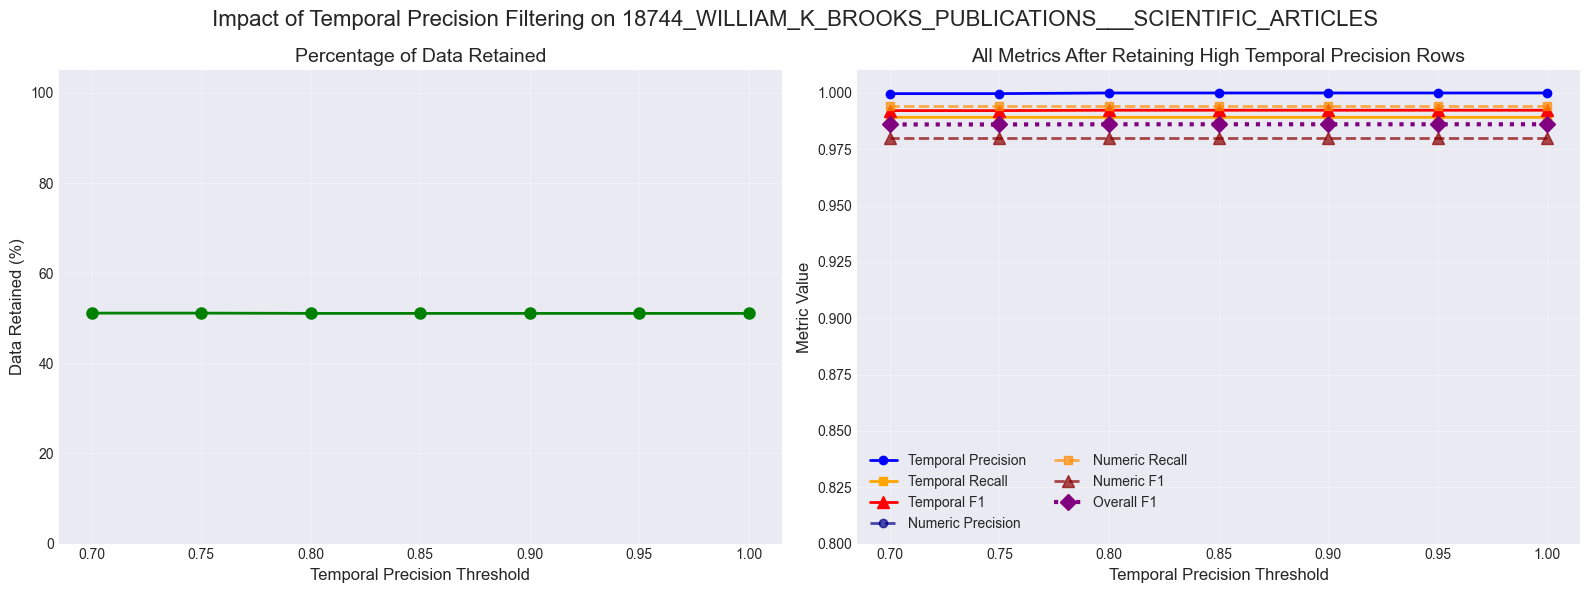

Original dataset size: 1660 rows
Original Unique rows: 415

Original metrics before thresholding
    Temporal Precision: 0.566
    Temporal Recall: 0.623
    Temporal F1: 0.590
    Numeric Precision: 0.638
    Numeric Recall: 0.986
    Numeric F1: 0.942
    Overall F1: 0.766

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       848          51.1         0.992      0.980      0.986     
0.95       848          51.1         0.992      0.980      0.986     
0.90       848          51.1         0.992      0.980      0.986     
0.85       848          51.1         0.992      0.980      0.986     
0.80       848          51.1         0.992      0.980      0.986     
0.75       849          51.1         0.992      0.980      0.986     
0.70       849          51.1         0.992      0.980      0.986     

Processing: 19746_murmansk_oblast_hydrography___murmansk_oblas

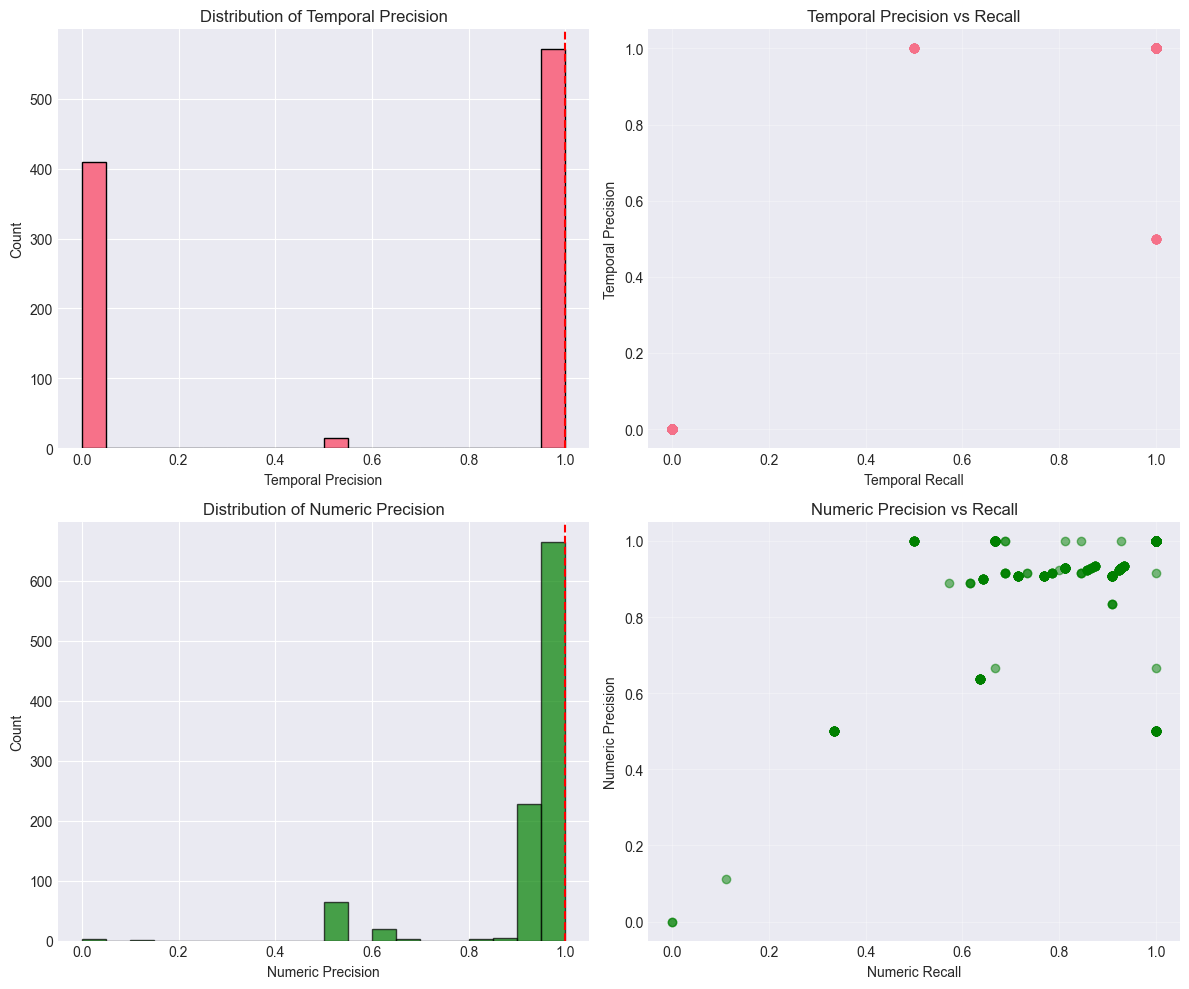

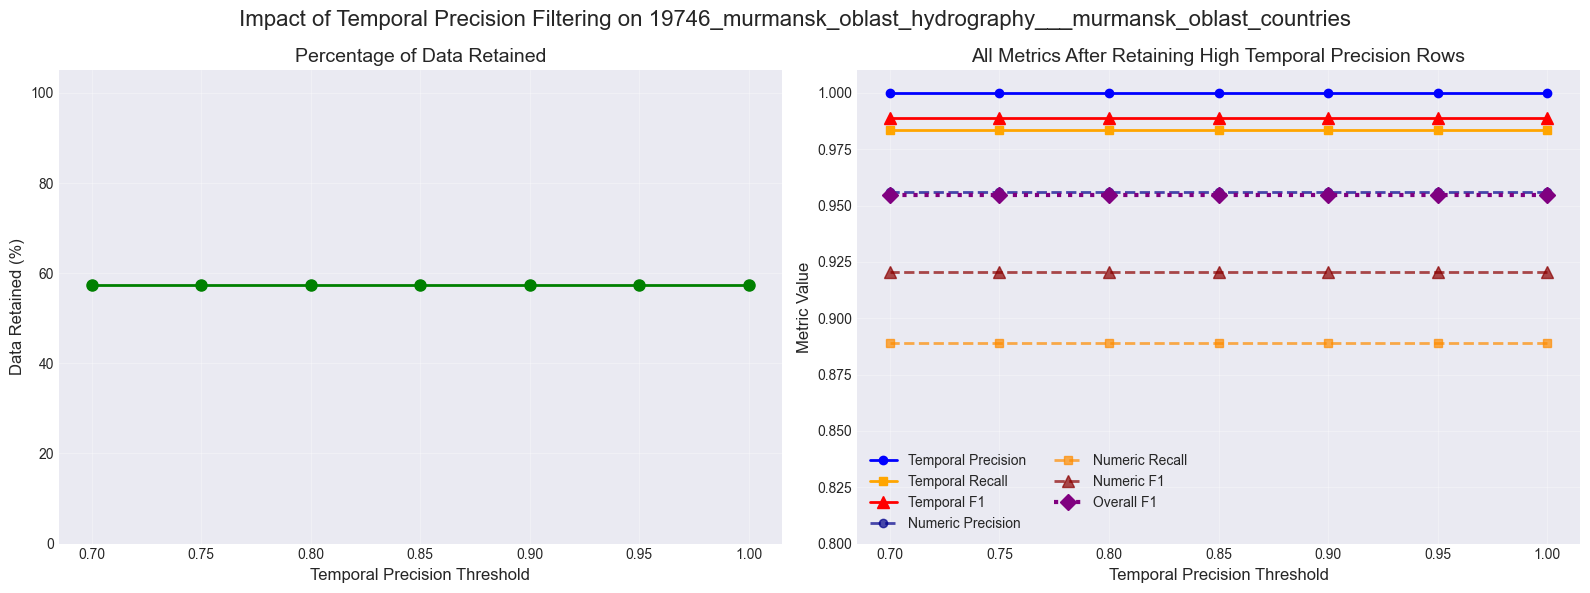

Original dataset size: 996 rows
Original Unique rows: 200

Original metrics before thresholding
    Temporal Precision: 0.581
    Temporal Recall: 0.783
    Temporal F1: 0.782
    Numeric Precision: 0.937
    Numeric Recall: 0.898
    Numeric F1: 0.912
    Overall F1: 0.847

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       571          57.3         0.989      0.921      0.955     
0.95       571          57.3         0.989      0.921      0.955     
0.90       571          57.3         0.989      0.921      0.955     
0.85       571          57.3         0.989      0.921      0.955     
0.80       571          57.3         0.989      0.921      0.955     
0.75       571          57.3         0.989      0.921      0.955     
0.70       571          57.3         0.989      0.921      0.955     

Processing: sec_data_noframes
/Users/satyanandakashyap/Library/

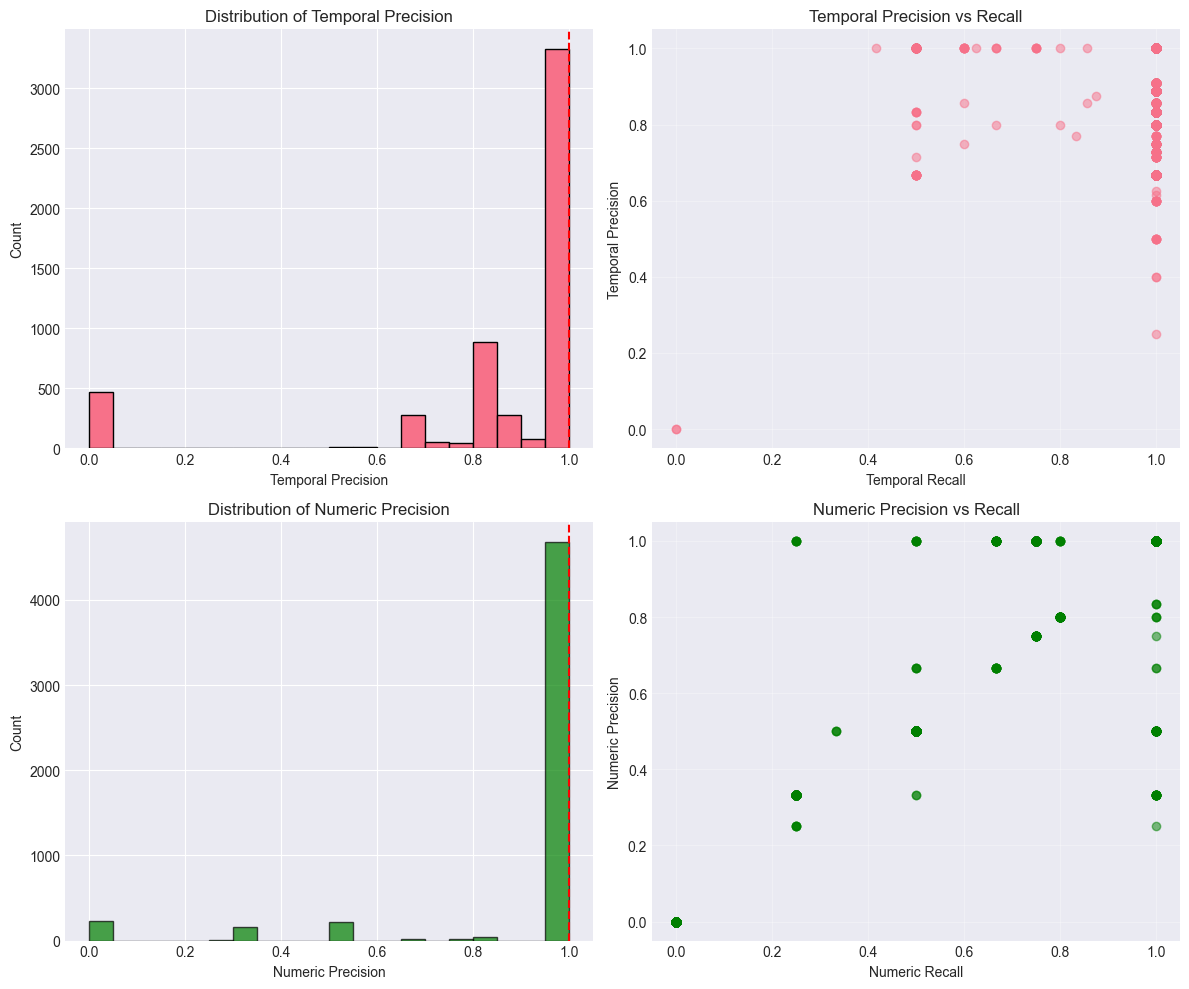

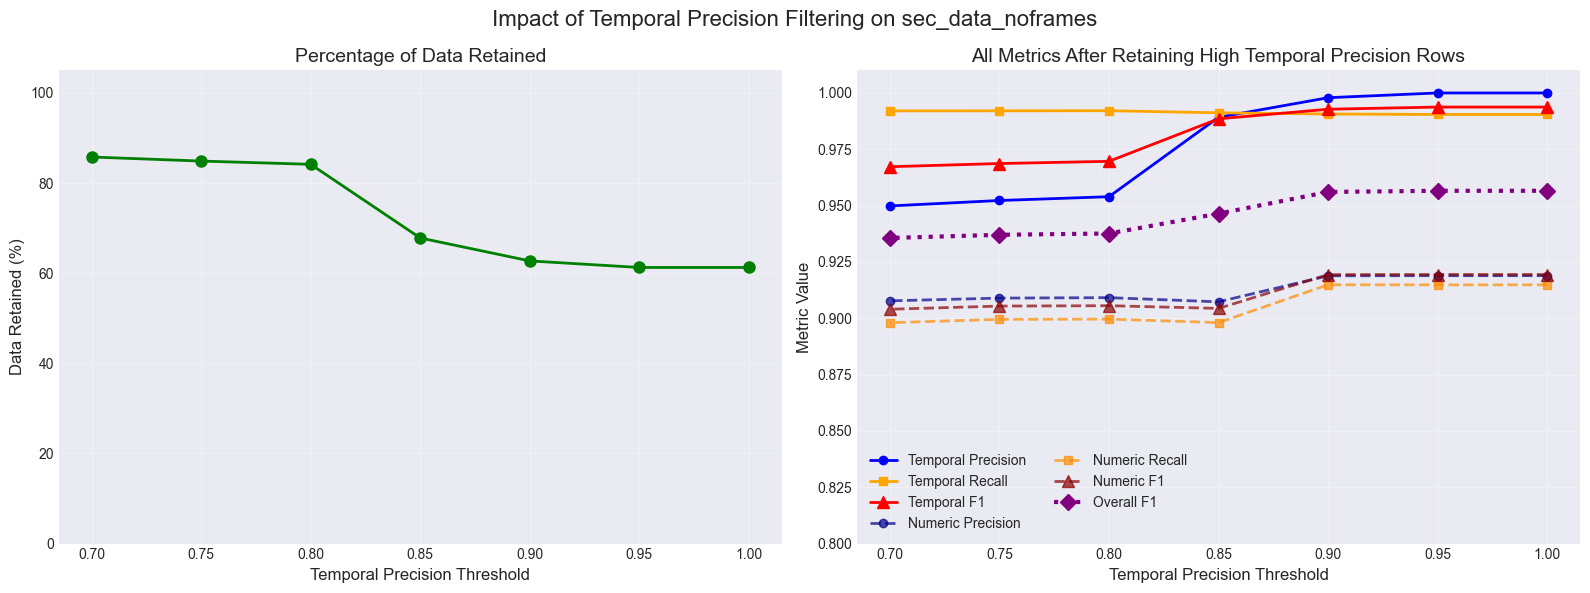

Original dataset size: 5425 rows
Original Unique rows: 1358

Original metrics before thresholding
    Temporal Precision: 0.851
    Temporal Recall: 0.991
    Temporal F1: 0.956
    Numeric Precision: 0.914
    Numeric Recall: 0.901
    Numeric F1: 0.911
    Overall F1: 0.933

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       3324         61.3         0.994      0.919      0.957     
0.95       3324         61.3         0.994      0.919      0.957     
0.90       3403         62.7         0.993      0.919      0.956     
0.85       3679         67.8         0.989      0.904      0.946     
0.80       4566         84.2         0.970      0.906      0.938     
0.75       4605         84.9         0.969      0.905      0.937     
0.70       4654         85.8         0.967      0.904      0.936     

Processing: 05092_DisneyChannelOriginalsDb___DisneyChannelEpi

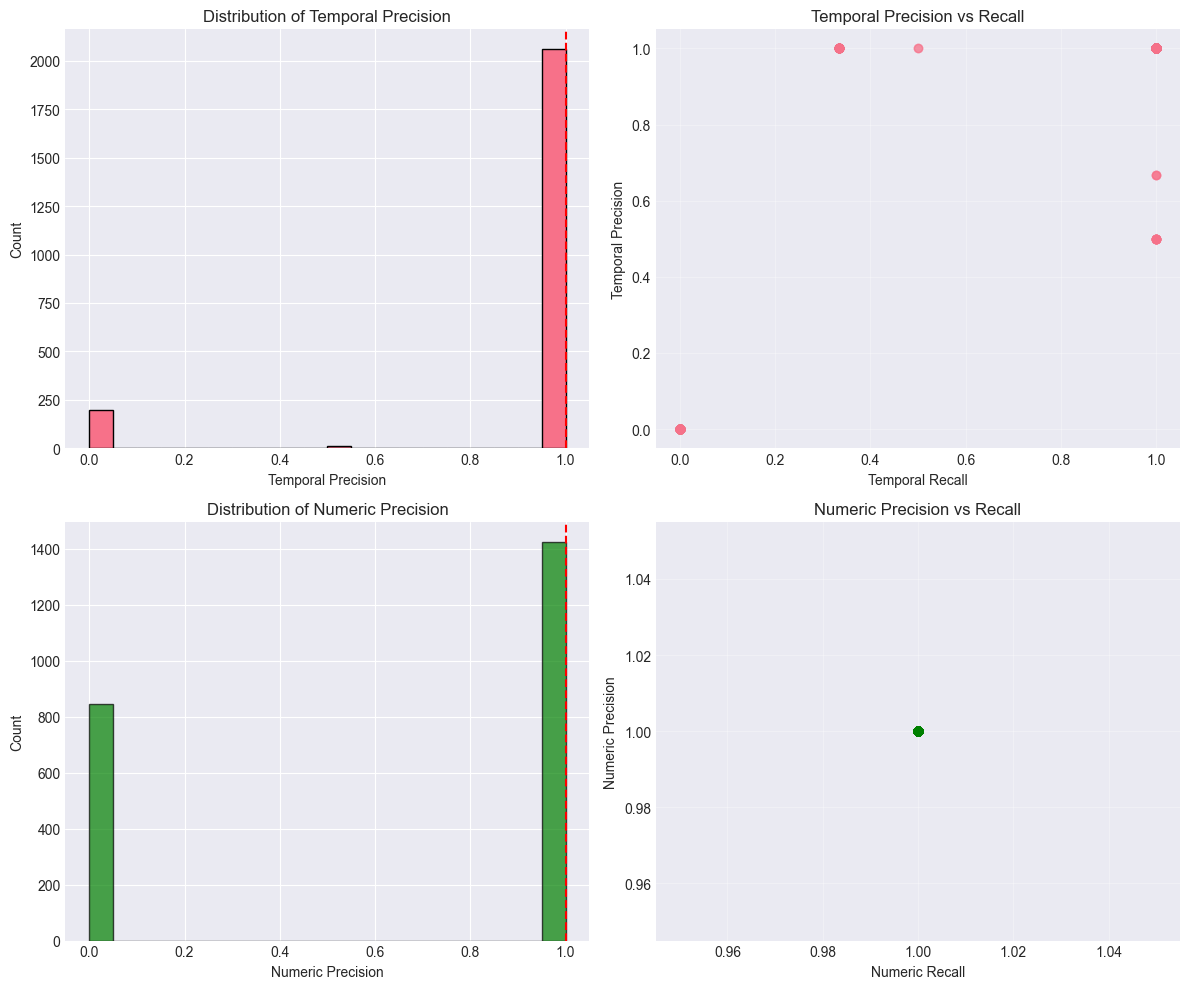

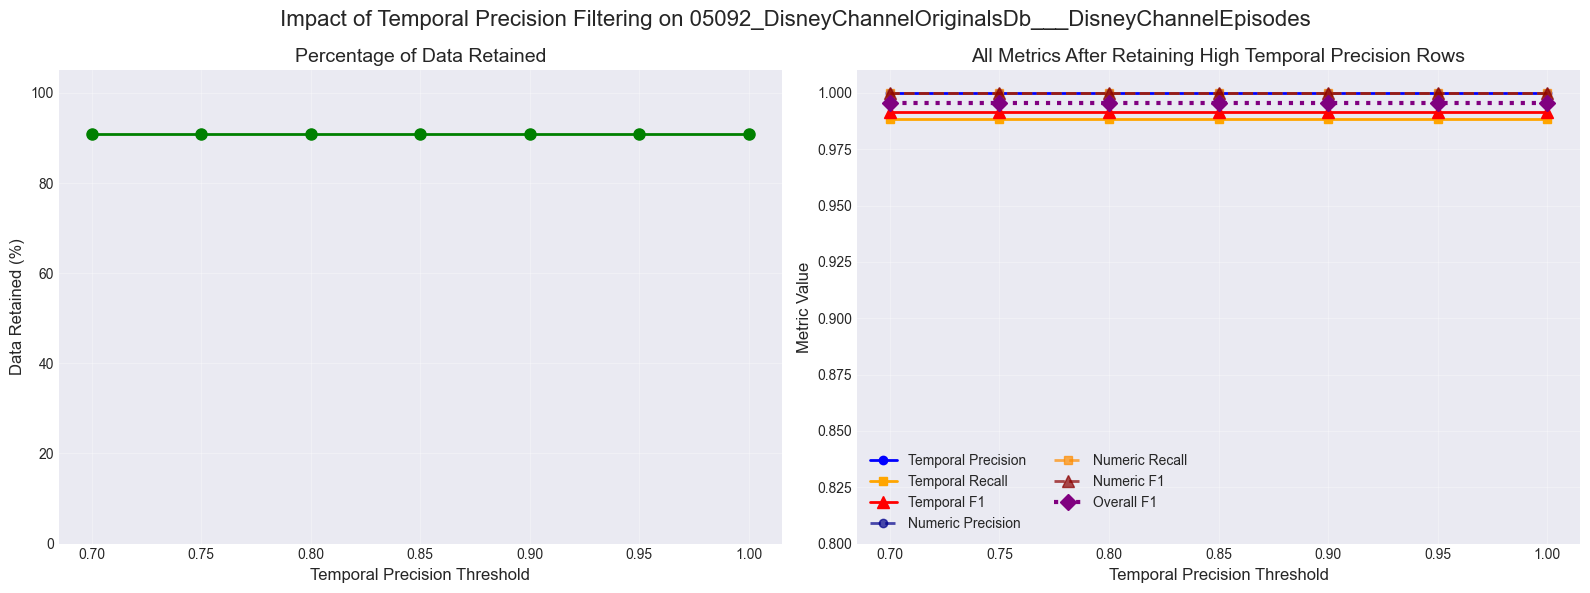

Original dataset size: 2269 rows
Original Unique rows: 1135

Original metrics before thresholding
    Temporal Precision: 0.911
    Temporal Recall: 0.948
    Temporal F1: 0.949
    Numeric Precision: 0.628
    Numeric Recall: 1.000
    Numeric F1: 1.000
    Overall F1: 0.974

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       2060         90.8         0.991      1.000      0.996     
0.95       2060         90.8         0.991      1.000      0.996     
0.90       2060         90.8         0.991      1.000      0.996     
0.85       2060         90.8         0.991      1.000      0.996     
0.80       2060         90.8         0.991      1.000      0.996     
0.75       2060         90.8         0.991      1.000      0.996     
0.70       2060         90.8         0.991      1.000      0.996     

Processing: 09178_causal_analysis_ingenuity_pathway_db___scie

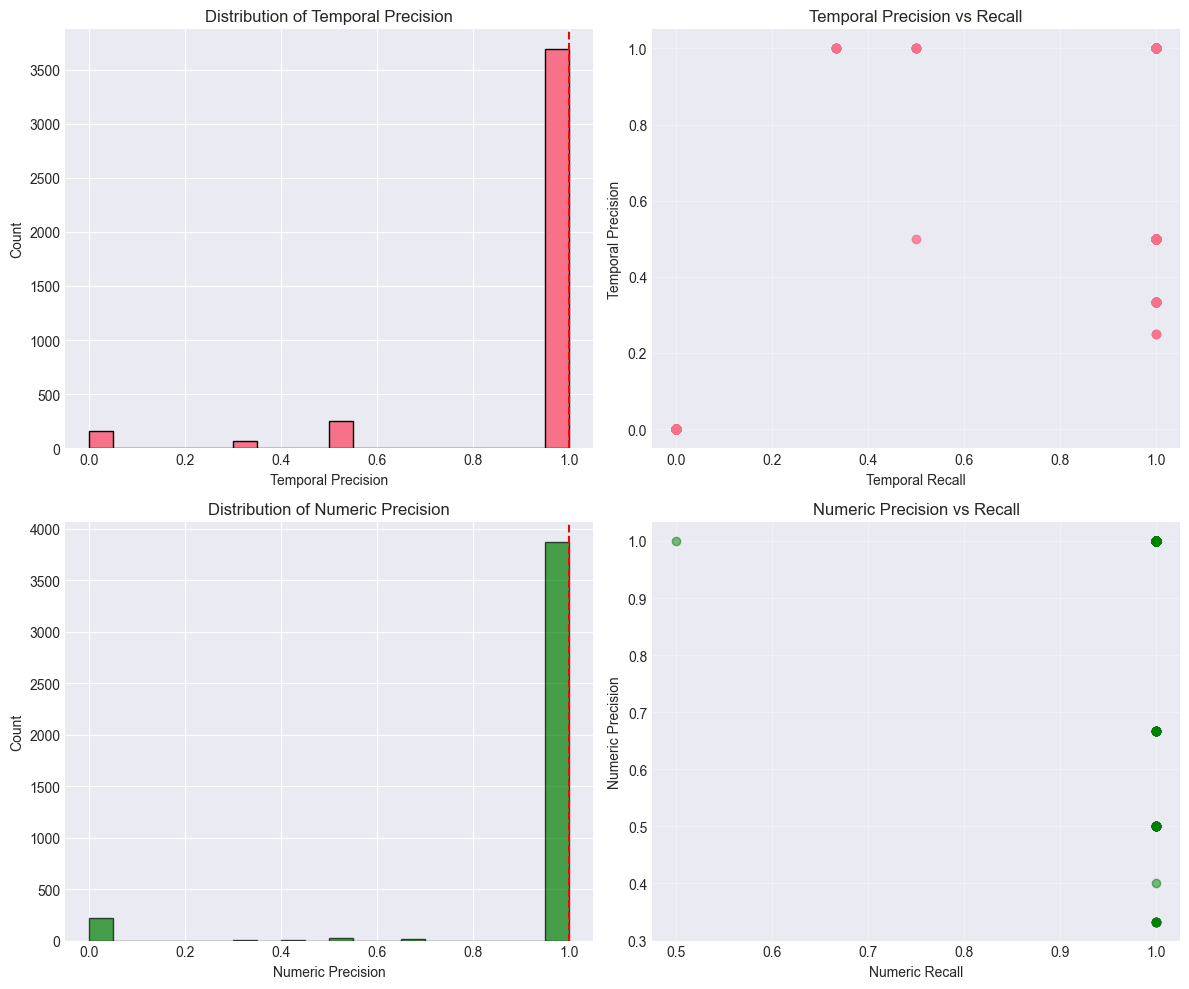

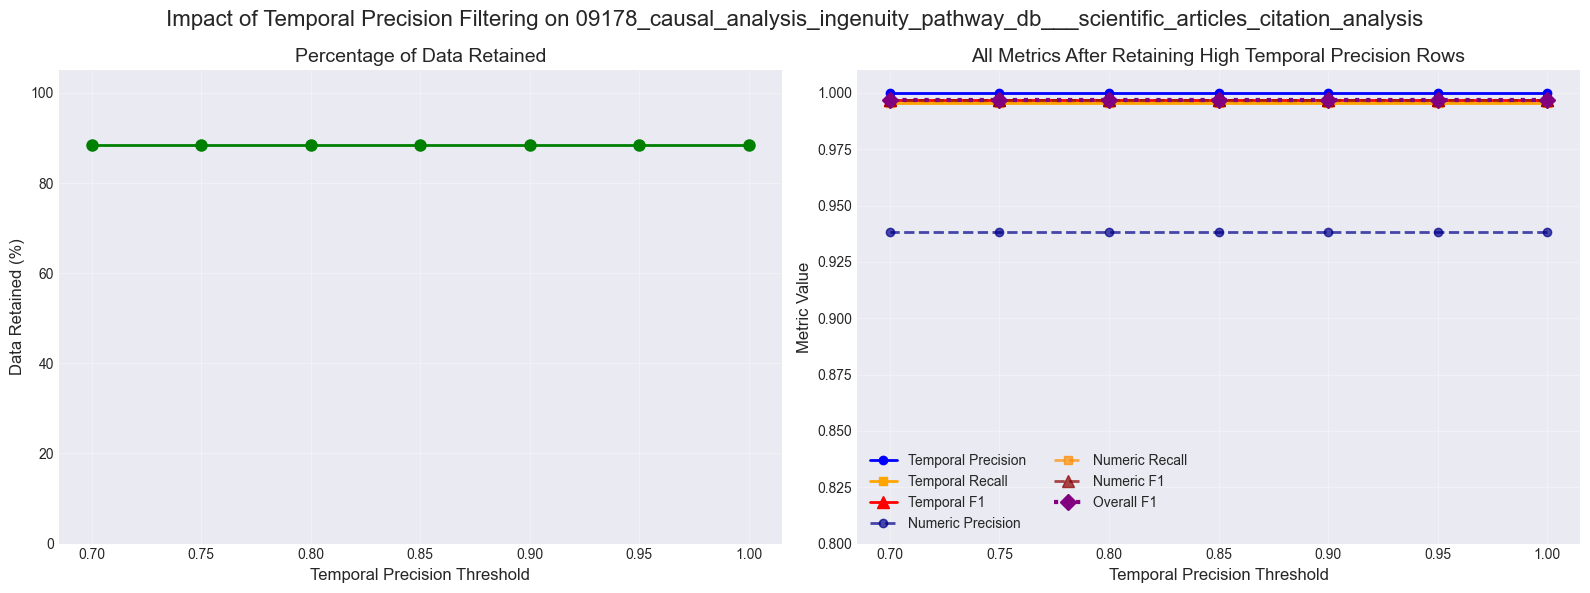

Original dataset size: 4167 rows
Original Unique rows: 1046

Original metrics before thresholding
    Temporal Precision: 0.921
    Temporal Recall: 0.962
    Temporal F1: 0.936
    Numeric Precision: 0.940
    Numeric Recall: 0.996
    Numeric F1: 0.995
    Overall F1: 0.965

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       3689         88.5         0.997      0.997      0.997     
0.95       3689         88.5         0.997      0.997      0.997     
0.90       3689         88.5         0.997      0.997      0.997     
0.85       3689         88.5         0.997      0.997      0.997     
0.80       3689         88.5         0.997      0.997      0.997     
0.75       3689         88.5         0.997      0.997      0.997     
0.70       3689         88.5         0.997      0.997      0.997     

Processing: 14918_IMMUNOLOGY_HEPATITIS_B_C_RESEARCH___RESEARC

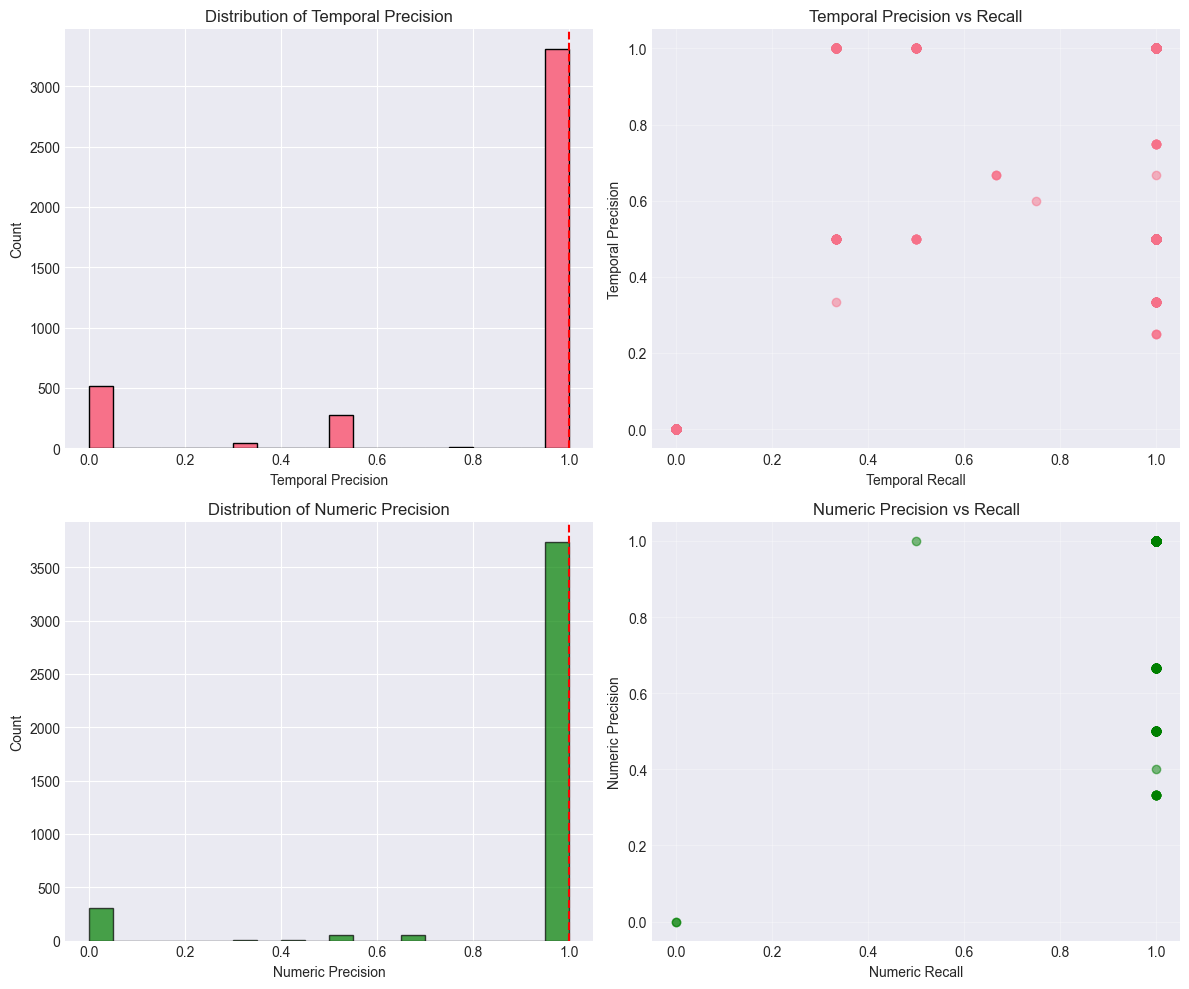

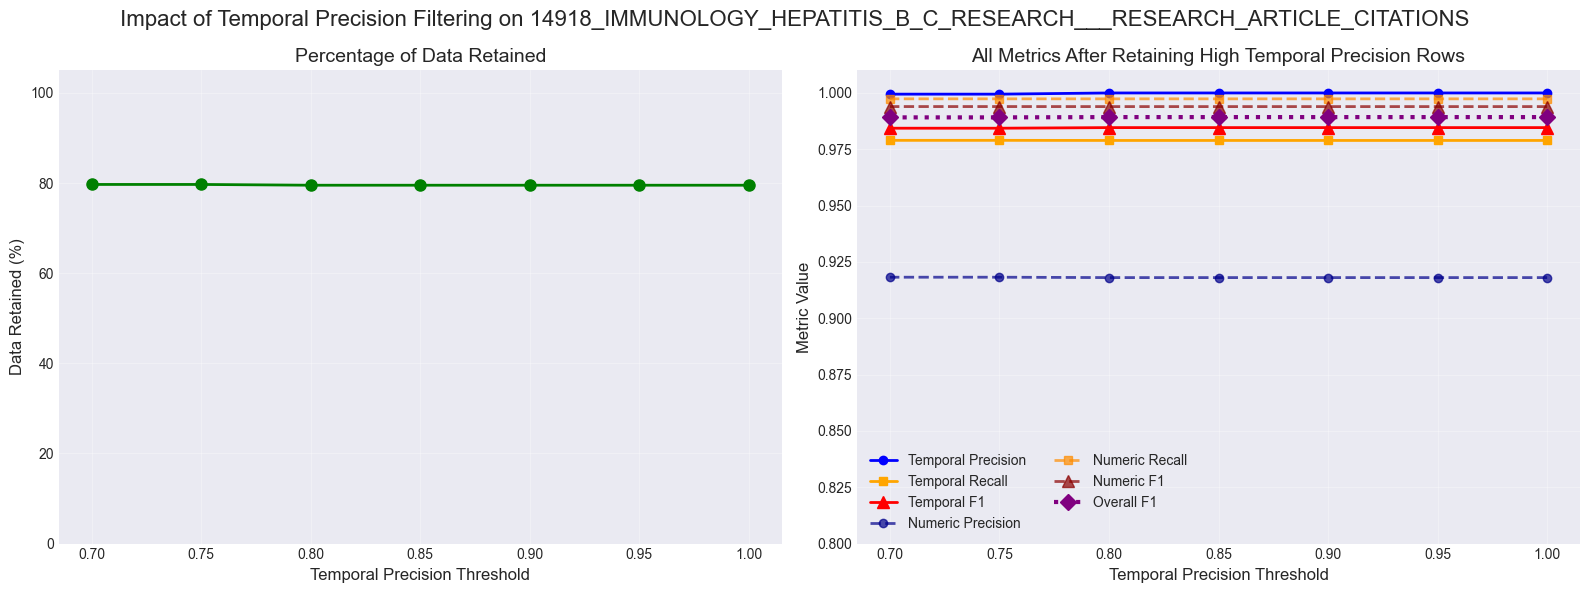

Original dataset size: 4157 rows
Original Unique rows: 1036

Original metrics before thresholding
    Temporal Precision: 0.836
    Temporal Recall: 0.852
    Temporal F1: 0.835
    Numeric Precision: 0.916
    Numeric Recall: 0.997
    Numeric F1: 0.991
    Overall F1: 0.913

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       3306         79.5         0.985      0.994      0.989     
0.95       3306         79.5         0.985      0.994      0.989     
0.90       3306         79.5         0.985      0.994      0.989     
0.85       3306         79.5         0.985      0.994      0.989     
0.80       3306         79.5         0.985      0.994      0.989     
0.75       3313         79.7         0.984      0.994      0.989     
0.70       3313         79.7         0.984      0.994      0.989     

Processing: 15781_FluvoxamineResearchArticlesDb___Fluvoxamine

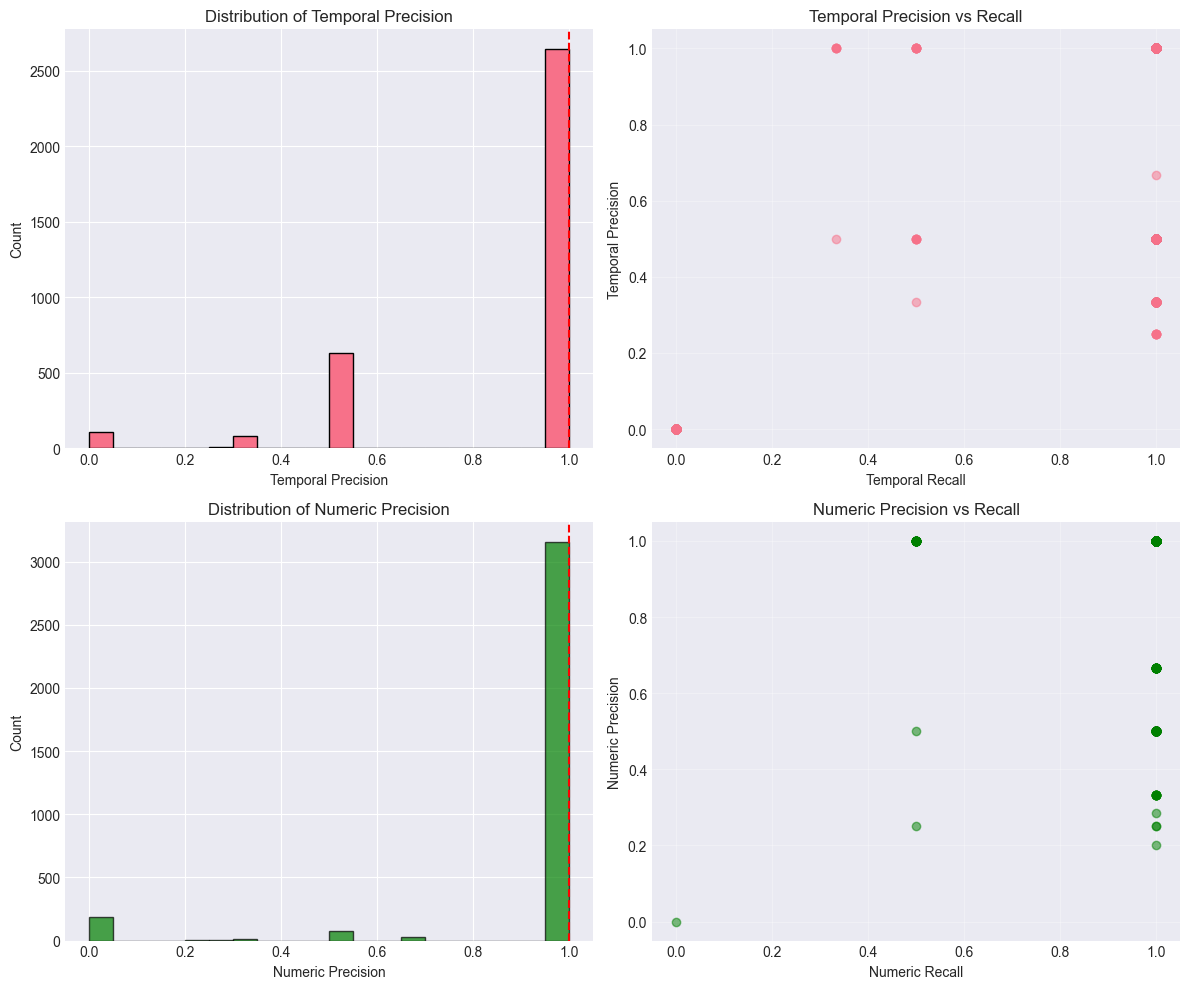

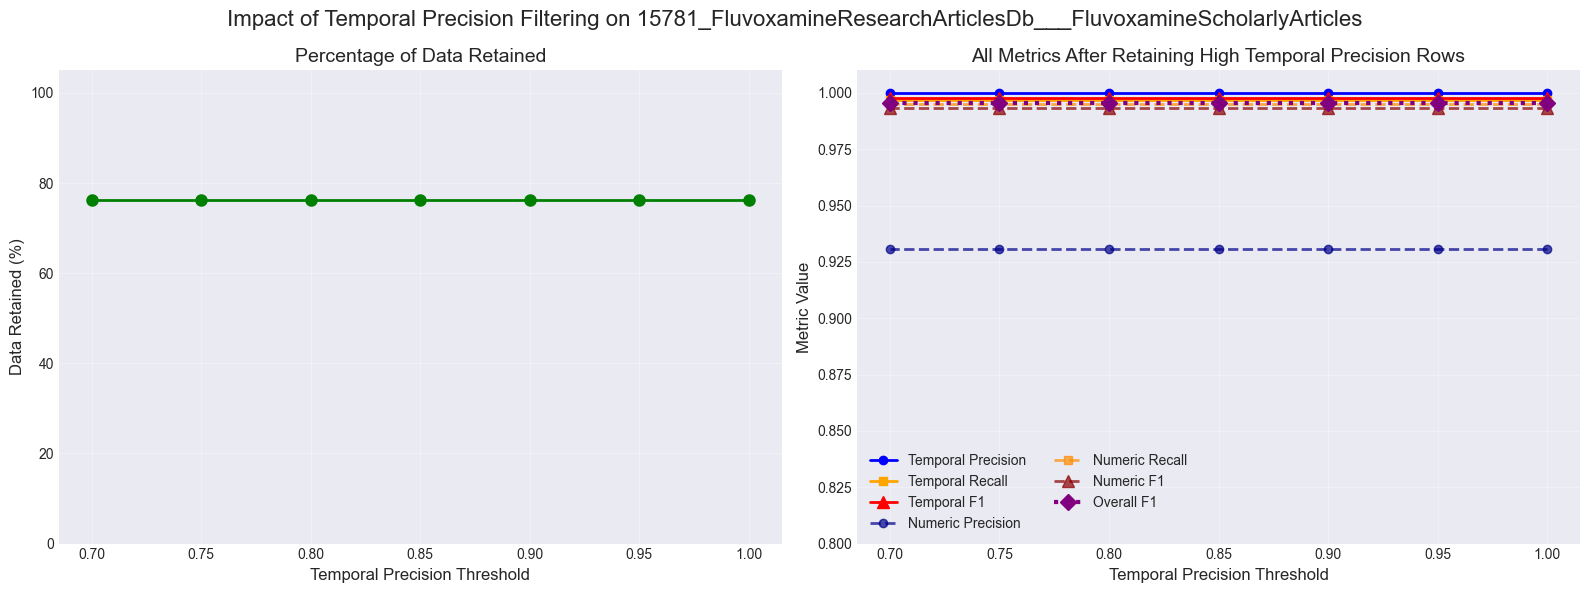

Original dataset size: 3468 rows
Original Unique rows: 1156

Original metrics before thresholding
    Temporal Precision: 0.862
    Temporal Recall: 0.967
    Temporal F1: 0.894
    Numeric Precision: 0.930
    Numeric Recall: 0.993
    Numeric F1: 0.985
    Overall F1: 0.940

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       2643         76.2         0.998      0.993      0.996     
0.95       2643         76.2         0.998      0.993      0.996     
0.90       2643         76.2         0.998      0.993      0.996     
0.85       2643         76.2         0.998      0.993      0.996     
0.80       2643         76.2         0.998      0.993      0.996     
0.75       2643         76.2         0.998      0.993      0.996     
0.70       2643         76.2         0.998      0.993      0.996     

Processing: 17477_Stefan_Mattig_Publications_Db___Research_Ar

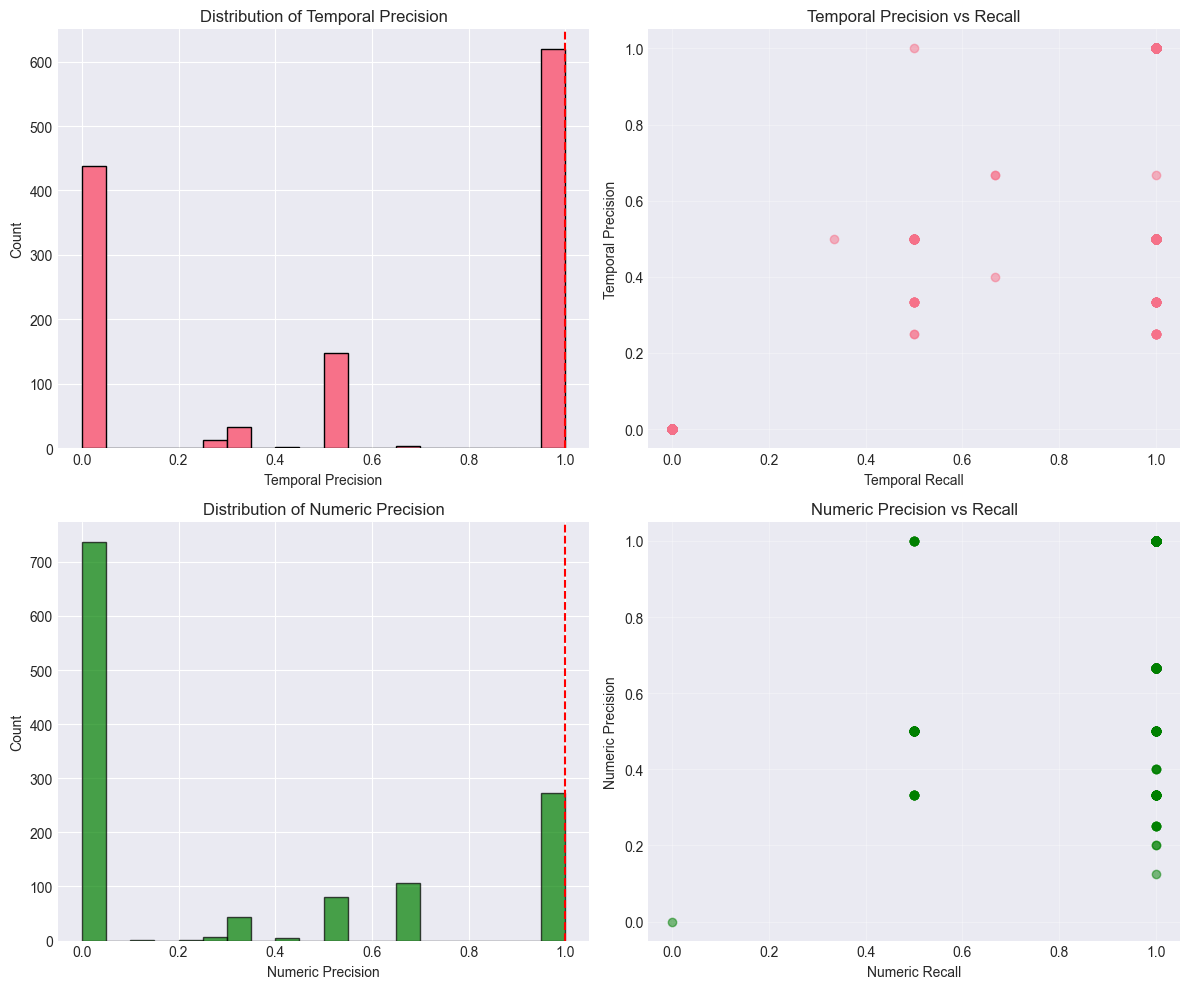

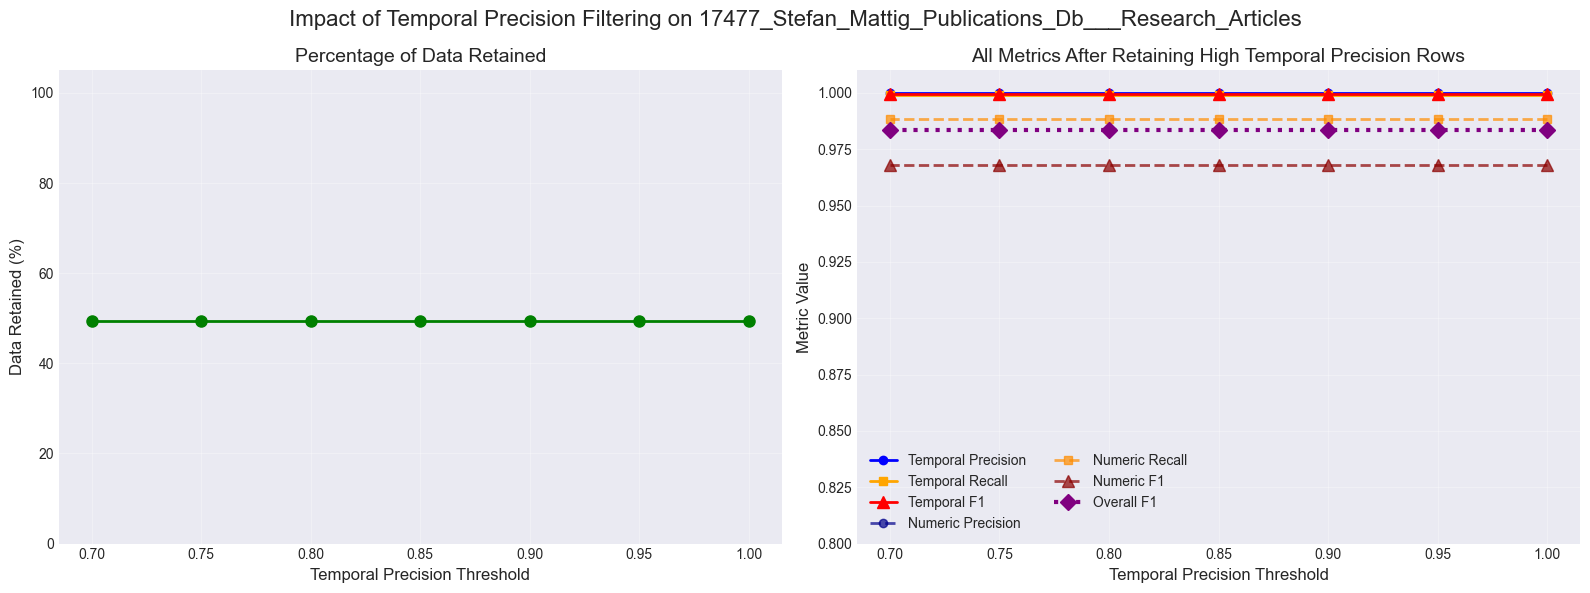

Original dataset size: 1255 rows
Original Unique rows: 314

Original metrics before thresholding
    Temporal Precision: 0.566
    Temporal Recall: 0.692
    Temporal F1: 0.645
    Numeric Precision: 0.321
    Numeric Recall: 0.939
    Numeric F1: 0.827
    Overall F1: 0.736

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       619          49.3         0.999      0.968      0.984     
0.95       619          49.3         0.999      0.968      0.984     
0.90       619          49.3         0.999      0.968      0.984     
0.85       619          49.3         0.999      0.968      0.984     
0.80       619          49.3         0.999      0.968      0.984     
0.75       619          49.3         0.999      0.968      0.984     
0.70       619          49.3         0.999      0.968      0.984     

Processing: 00737_william_b_isaacs_publications___research_pub

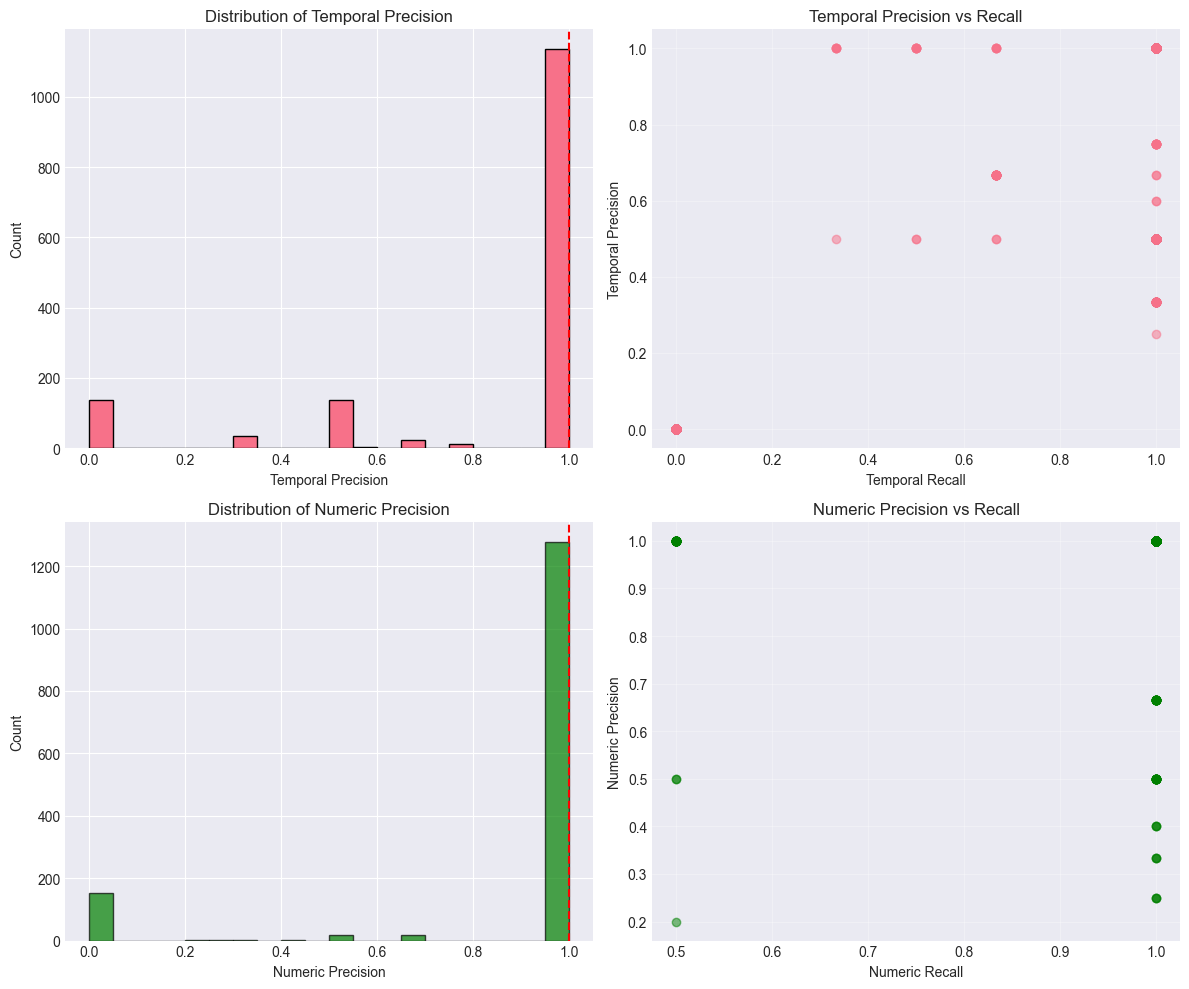

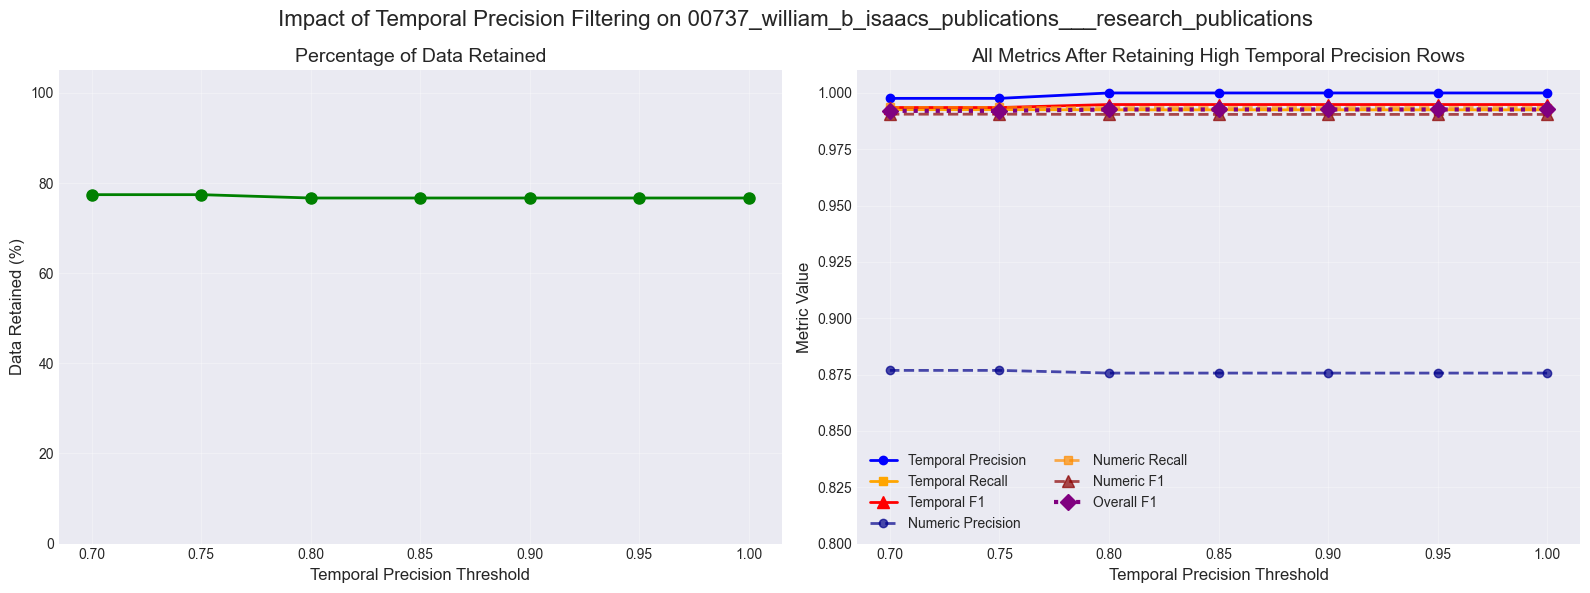

Original dataset size: 1480 rows
Original Unique rows: 370

Original metrics before thresholding
    Temporal Precision: 0.838
    Temporal Recall: 0.902
    Temporal F1: 0.860
    Numeric Precision: 0.881
    Numeric Recall: 0.985
    Numeric F1: 0.980
    Overall F1: 0.920

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       1135         76.7         0.995      0.990      0.993     
0.95       1135         76.7         0.995      0.990      0.993     
0.90       1135         76.7         0.995      0.990      0.993     
0.85       1135         76.7         0.995      0.990      0.993     
0.80       1135         76.7         0.995      0.990      0.993     
0.75       1146         77.4         0.994      0.991      0.992     
0.70       1146         77.4         0.994      0.991      0.992     

Processing: 08491_ras_signaling_complexity_research___ras_sign

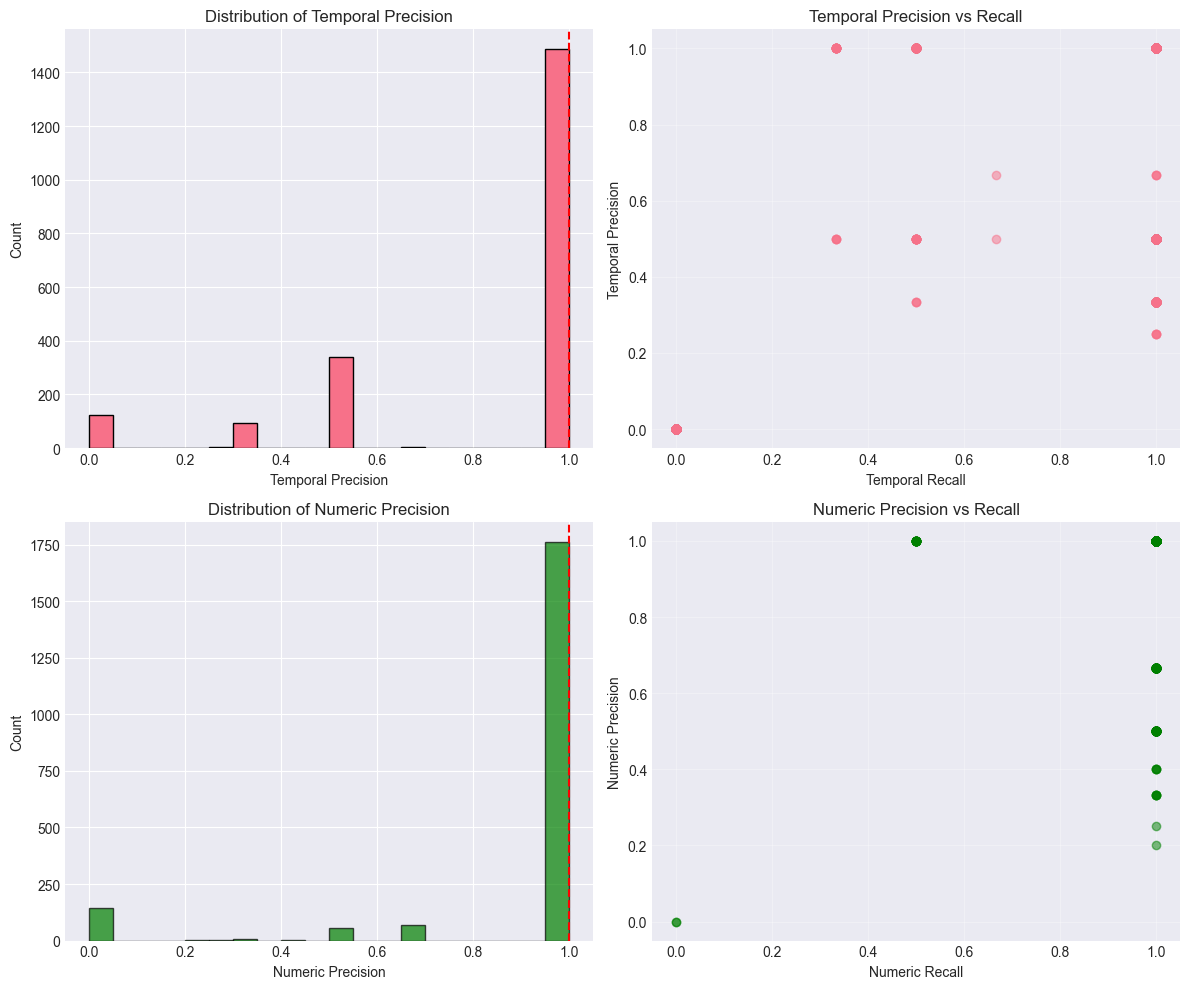

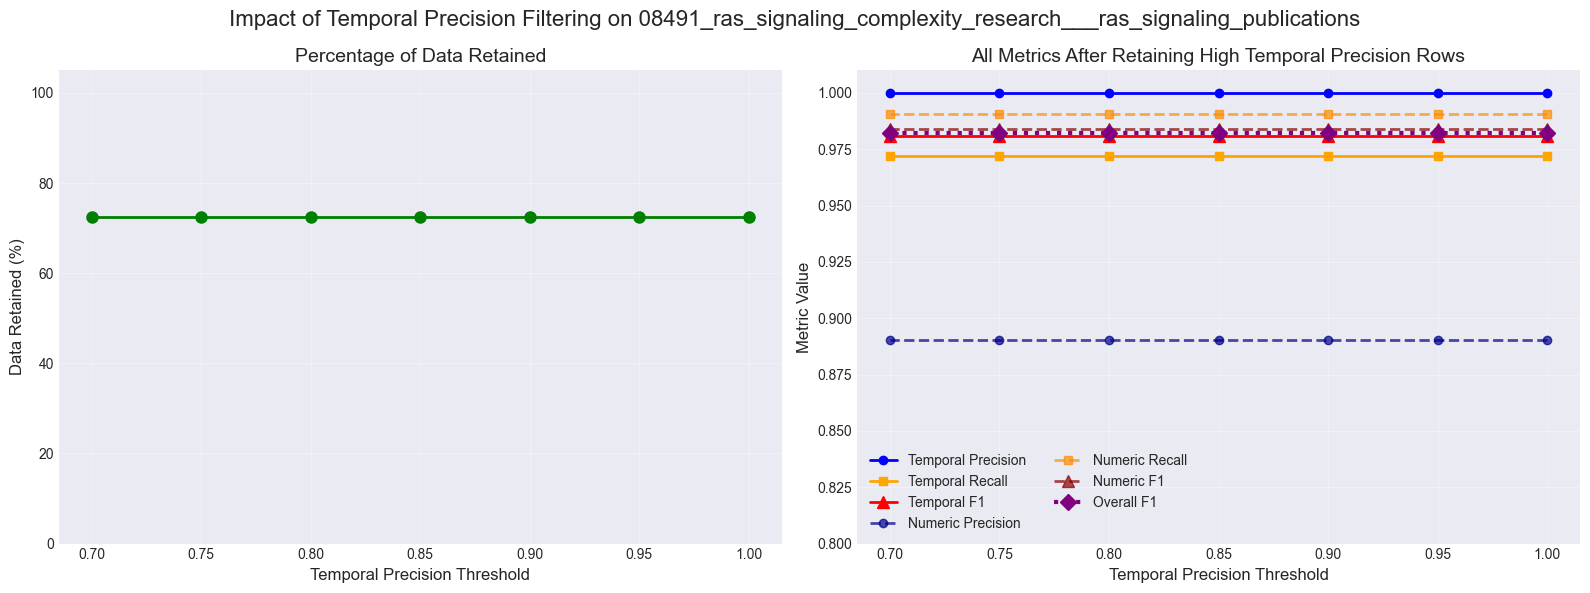

Original dataset size: 2052 rows
Original Unique rows: 513

Original metrics before thresholding
    Temporal Precision: 0.824
    Temporal Recall: 0.914
    Temporal F1: 0.845
    Numeric Precision: 0.901
    Numeric Recall: 0.989
    Numeric F1: 0.976
    Overall F1: 0.910

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       1486         72.4         0.981      0.984      0.982     
0.95       1486         72.4         0.981      0.984      0.982     
0.90       1486         72.4         0.981      0.984      0.982     
0.85       1486         72.4         0.981      0.984      0.982     
0.80       1486         72.4         0.981      0.984      0.982     
0.75       1486         72.4         0.981      0.984      0.982     
0.70       1486         72.4         0.981      0.984      0.982     

Processing: 12079_FluorescenceSpectroscopyCitationsDb___Scient

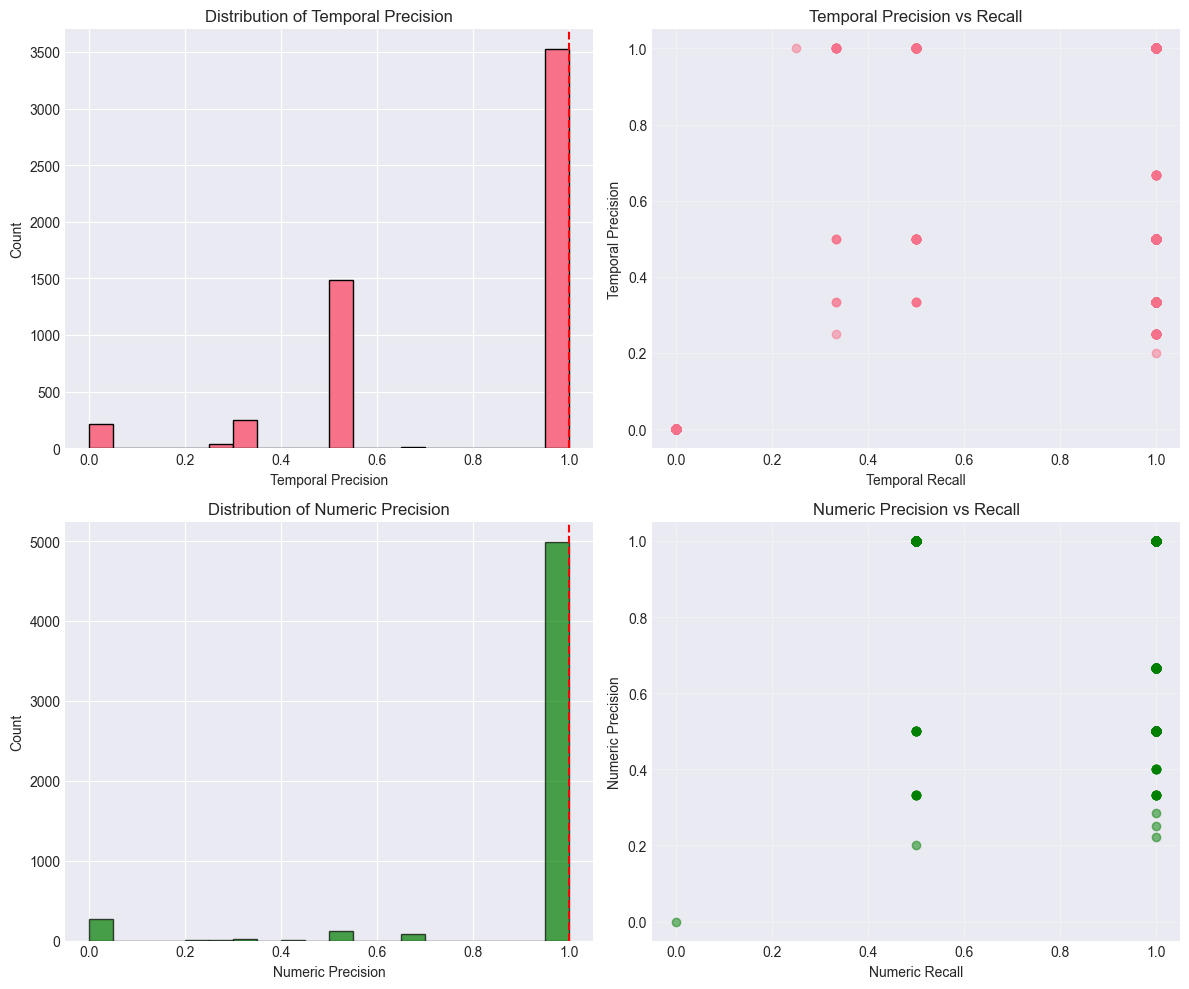

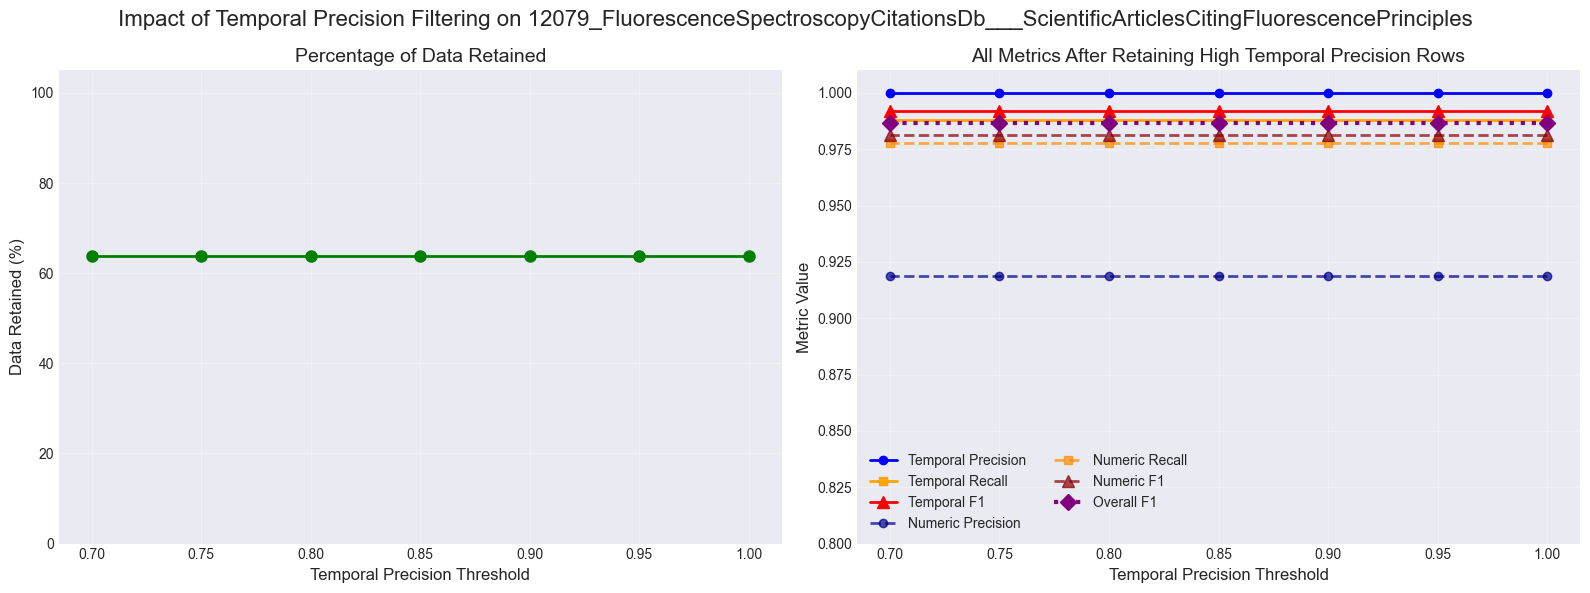

Original dataset size: 5525 rows
Original Unique rows: 1845

Original metrics before thresholding
    Temporal Precision: 0.791
    Temporal Recall: 0.949
    Temporal F1: 0.839
    Numeric Precision: 0.932
    Numeric Recall: 0.972
    Numeric F1: 0.972
    Overall F1: 0.905

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       3523         63.8         0.992      0.981      0.987     
0.95       3523         63.8         0.992      0.981      0.987     
0.90       3523         63.8         0.992      0.981      0.987     
0.85       3523         63.8         0.992      0.981      0.987     
0.80       3523         63.8         0.992      0.981      0.987     
0.75       3523         63.8         0.992      0.981      0.987     
0.70       3523         63.8         0.992      0.981      0.987     

Processing: 17990_AspergillusOryzaeRib40Chromosome6GenomicDat

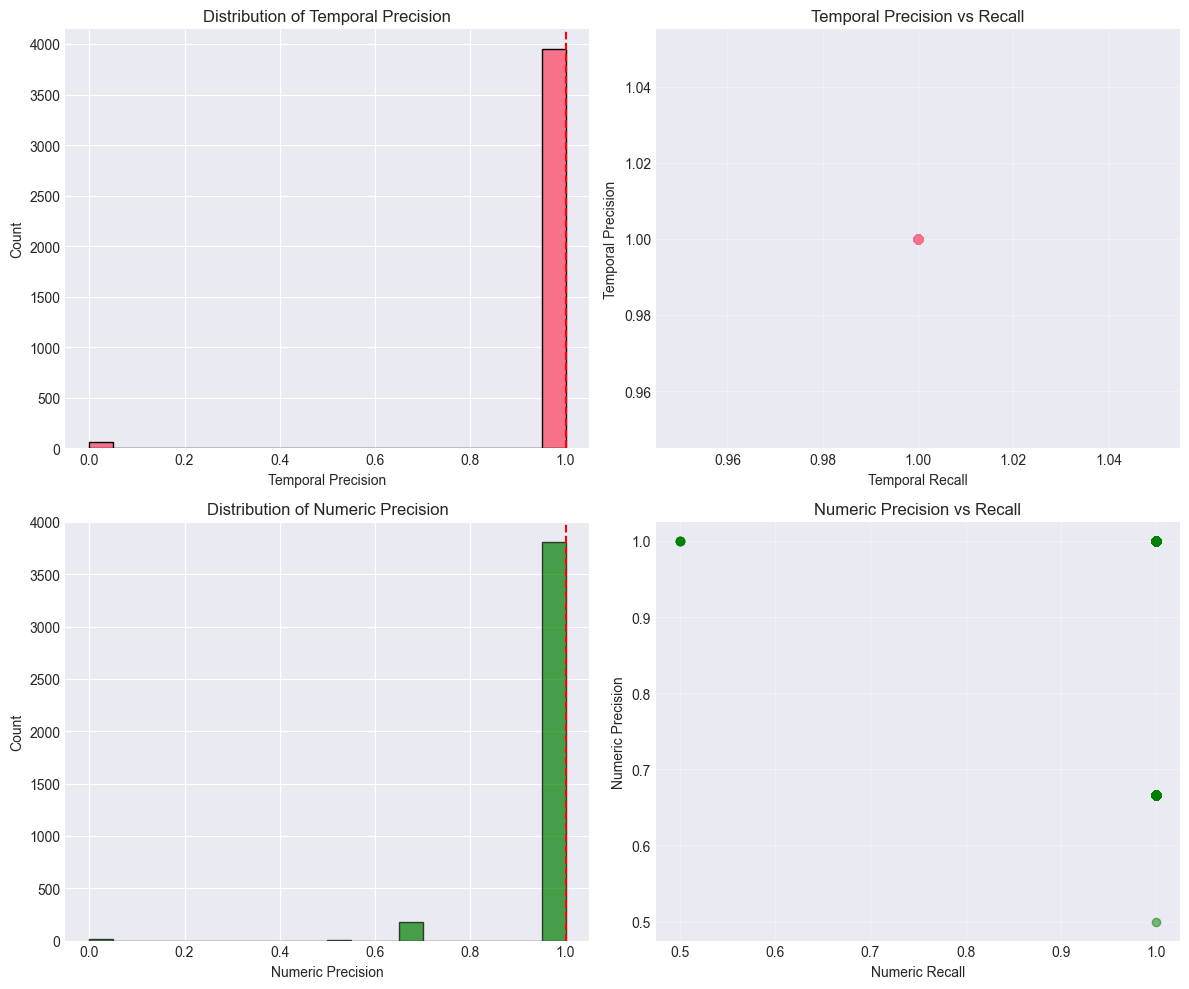

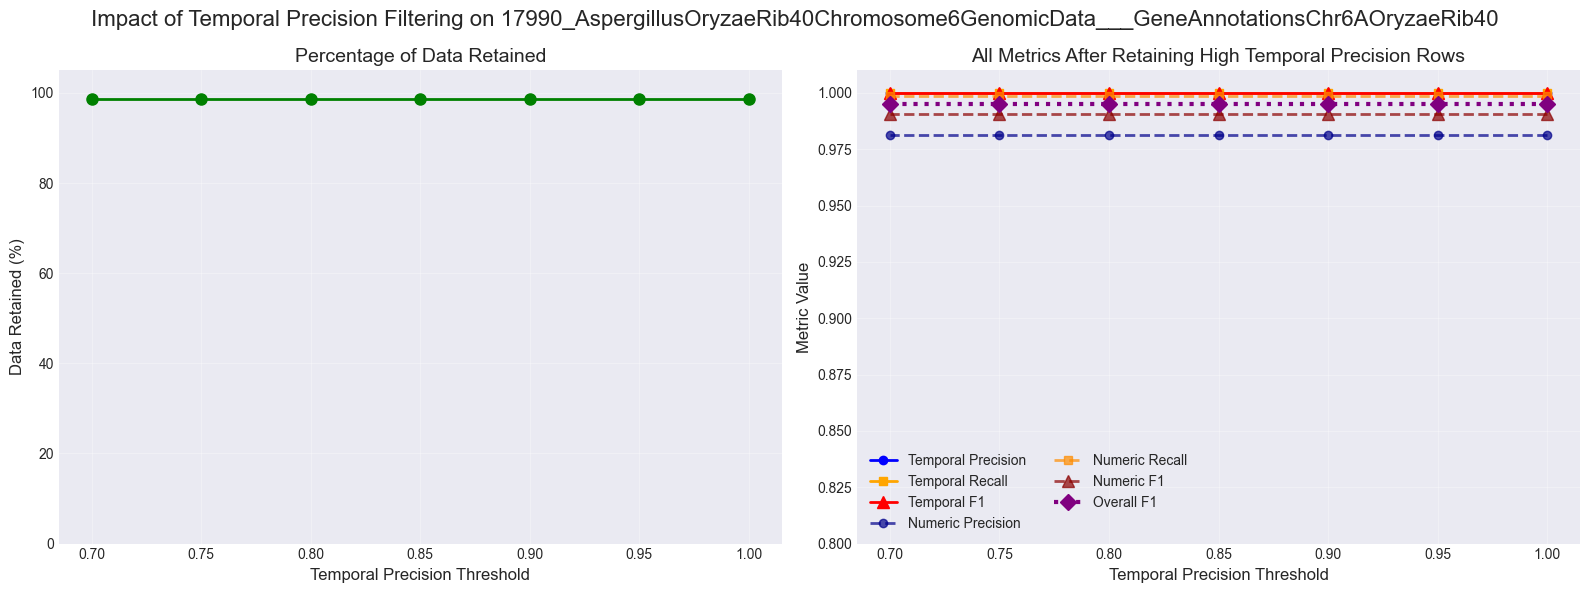

Original dataset size: 4005 rows
Original Unique rows: 1335

Original metrics before thresholding
    Temporal Precision: 0.986
    Temporal Recall: 1.000
    Temporal F1: 1.000
    Numeric Precision: 0.981
    Numeric Recall: 0.999
    Numeric F1: 0.991
    Overall F1: 0.995

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       3947         98.6         1.000      0.991      0.995     
0.95       3947         98.6         1.000      0.991      0.995     
0.90       3947         98.6         1.000      0.991      0.995     
0.85       3947         98.6         1.000      0.991      0.995     
0.80       3947         98.6         1.000      0.991      0.995     
0.75       3947         98.6         1.000      0.991      0.995     
0.70       3947         98.6         1.000      0.991      0.995     

Processing: 19251_SleepSpindleResearchDb___SleepSpindleArticl

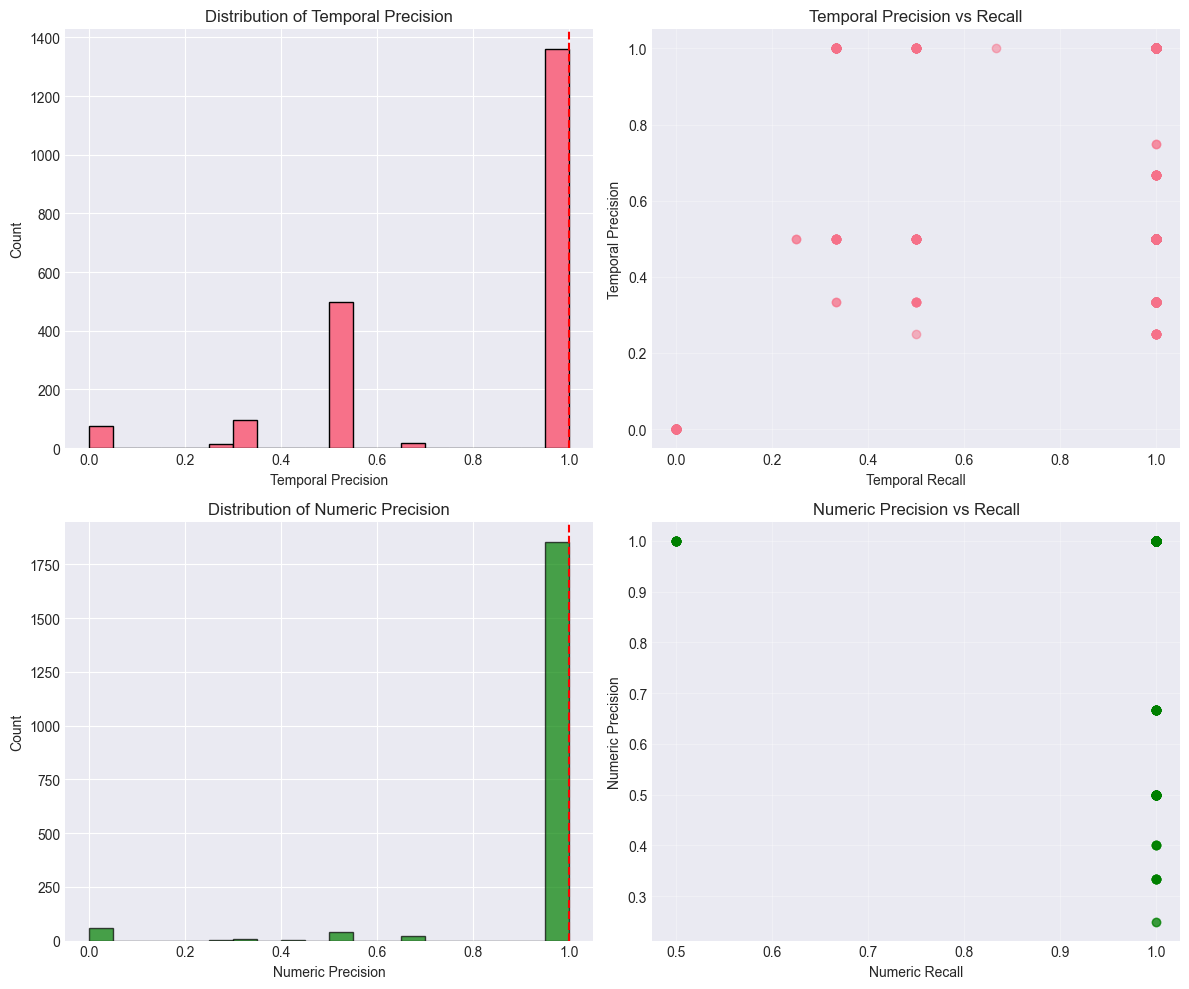

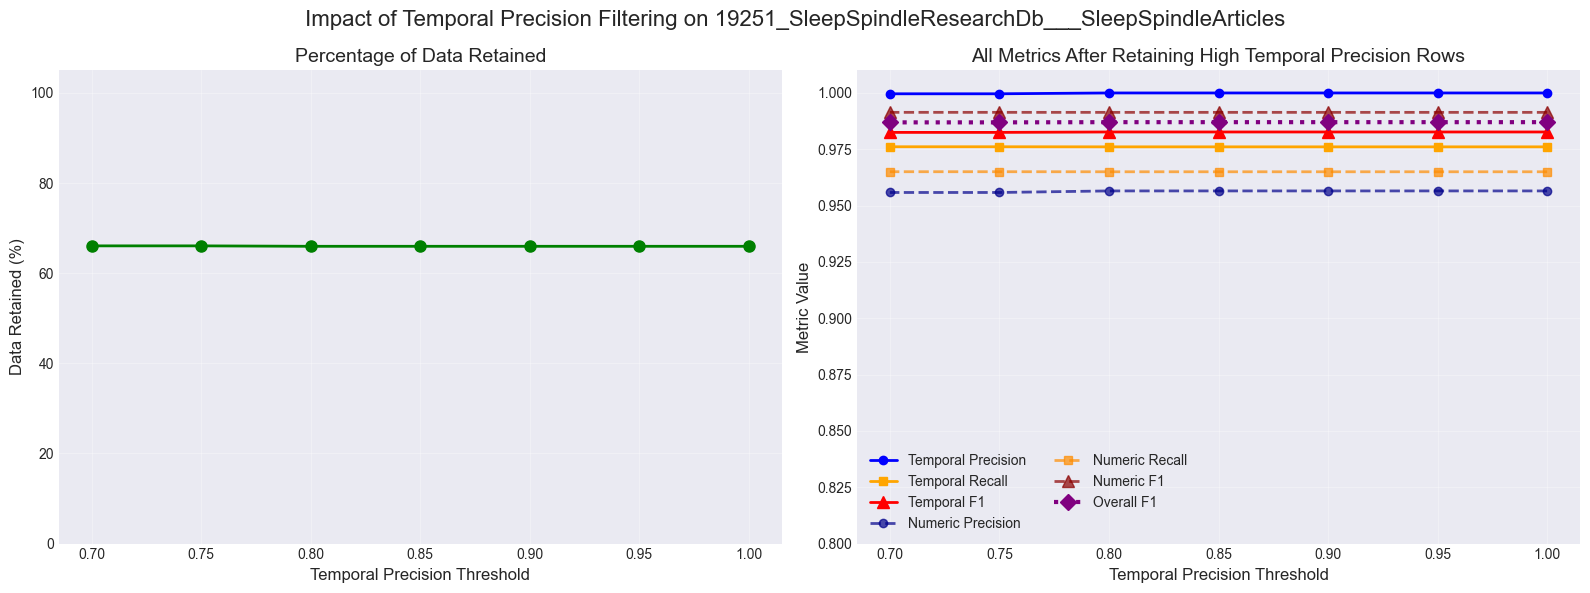

Original dataset size: 2060 rows
Original Unique rows: 515

Original metrics before thresholding
    Temporal Precision: 0.804
    Temporal Recall: 0.942
    Temporal F1: 0.844
    Numeric Precision: 0.952
    Numeric Recall: 0.962
    Numeric F1: 0.984
    Overall F1: 0.914

Data retention by threshold:
Threshold  Retained     Retained %   Temp F1    Num F1     Overall F1
----------------------------------------------------------------------
1.00       1359         66.0         0.983      0.991      0.987     
0.95       1359         66.0         0.983      0.991      0.987     
0.90       1359         66.0         0.983      0.991      0.987     
0.85       1359         66.0         0.983      0.991      0.987     
0.80       1359         66.0         0.983      0.991      0.987     
0.75       1361         66.1         0.982      0.991      0.987     
0.70       1361         66.1         0.982      0.991      0.987     


In [ ]:
# Initialize a list to store comprehensive results for all datasets
all_datasets_results = []

for idx, row in meta_df.iterrows():
    dataset_name = row["dataset_name"]
    print(f"\n{'='*60}")
    print(f"Processing: {dataset_name}")
    column_name = f"unit_time_csv_path_{out_name}"
    eval_csv_path = row[column_name]
    print(eval_csv_path)
    if not os.path.isfile(eval_csv_path):
        print(f"{eval_csv_path} not valid")
        continue

    eval_df = pd.read_csv(eval_csv_path)

    # Store original dataset size
    original_size = len(eval_df)
    original_unique_rows = (
        len(eval_df["row_idx"].unique())
        if "row_idx" in eval_df.columns
        else original_size
    )
    print(original_unique_rows)

    # Extend the visualization for both temporal and numeric distributions:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
    # Temporal Precision Histogram
    eval_df["tmp_precision"].dropna().hist(bins=20, ax=ax1, edgecolor="black")
    ax1.axvline(x=1.0, color="r", linestyle="--", label="Perfect (1.0)")
    ax1.set_xlabel("Temporal Precision")
    ax1.set_ylabel("Count")
    ax1.set_title("Distribution of Temporal Precision")

    # Temporal Precision vs Recall
    ax2.scatter(eval_df["tmp_recall"], eval_df["tmp_precision"], alpha=0.5)
    ax2.set_xlabel("Temporal Recall")
    ax2.set_ylabel("Temporal Precision")
    ax2.set_title("Temporal Precision vs Recall")
    ax2.grid(True, alpha=0.3)

    # Numeric Precision Histogram
    eval_df["num_precision"].dropna().hist(
        bins=20, ax=ax3, edgecolor="black", color="green", alpha=0.7
    )
    ax3.axvline(x=1.0, color="r", linestyle="--", label="Perfect (1.0)")
    ax3.set_xlabel("Numeric Precision")
    ax3.set_ylabel("Count")
    ax3.set_title("Distribution of Numeric Precision")

    # Numeric Precision vs Recall
    ax4.scatter(
        eval_df["num_recall"], eval_df["num_precision"], alpha=0.5, color="green"
    )
    ax4.set_xlabel("Numeric Recall")
    ax4.set_ylabel("Numeric Precision")
    ax4.set_title("Numeric Precision vs Recall")
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    ##############################################################################
    # Extract metrics for different thresholds
    thresholds = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7]

    # Initialize lists to store all metrics
    metrics_tracker = {
        "rows_retained_pct": [],  # Changed from rows_excluded to rows_retained
        "rows_retained_count": [],  # Added to track actual count
        "numeric_precision": [],
        "numeric_recall": [],
        "numeric_f1": [],
        "temporal_precision": [],
        "temporal_recall": [],
        "temporal_f1": [],
        "overall_f1": [],
    }

    # Store dataset-specific results
    dataset_results = {
        "dataset_name": dataset_name,
        "original_size": original_size,
        "original_unique_rows": original_unique_rows,
        "thresholds": {},
    }
    ##############################################################################
    # Calculate metrics for each threshold

    for thresh in thresholds:
        excluded = eval_df[eval_df["tmp_precision"] < thresh]
        remaining = eval_df[eval_df["tmp_precision"] >= thresh]

        # Calculate retention instead of exclusion
        rows_retained_count = len(remaining)
        rows_retained_pct = len(remaining) / len(eval_df) * 100

        metrics_tracker["rows_retained_count"].append(rows_retained_count)
        metrics_tracker["rows_retained_pct"].append(rows_retained_pct)

        # Store threshold-specific results
        dataset_results["thresholds"][thresh] = {
            "retained_count": rows_retained_count,
            "retained_pct": rows_retained_pct,
            "excluded_count": len(excluded),
            "excluded_pct": len(excluded) / len(eval_df) * 100,
        }

        if len(remaining) > 0:
            metrics_tracker["numeric_precision"].append(
                remaining["num_precision"].mean()
            )
            metrics_tracker["numeric_recall"].append(remaining["num_recall"].mean())
            metrics_tracker["numeric_f1"].append(remaining["num_f1"].mean())
            metrics_tracker["temporal_precision"].append(
                remaining["tmp_precision"].mean()
            )
            metrics_tracker["temporal_recall"].append(remaining["tmp_recall"].mean())
            metrics_tracker["temporal_f1"].append(remaining["tmp_f1"].mean())

            # Calculate overall F1 (average of numeric and temporal F1)
            overall_f1 = (remaining["num_f1"].mean() + remaining["tmp_f1"].mean()) / 2
            metrics_tracker["overall_f1"].append(overall_f1)

            # Add metrics to dataset results
            dataset_results["thresholds"][thresh].update(
                {
                    "numeric_f1": remaining["num_f1"].mean(),
                    "temporal_f1": remaining["tmp_f1"].mean(),
                    "overall_f1": overall_f1,
                    "numeric_recall": remaining["num_recall"].mean(),
                    "numeric_precision": remaining["num_precision"].mean(),
                    "temporal_recall": remaining["tmp_recall"].mean(),
                    "temporal_precision": remaining["tmp_precision"].mean(),
                }
            )
        else:
            # If no rows remaining, append 0
            for key in metrics_tracker:
                if key not in ["rows_retained_pct", "rows_retained_count"]:
                    metrics_tracker[key].append(0)

            dataset_results["thresholds"][thresh].update(
                {"numeric_f1": 0, "temporal_f1": 0, "overall_f1": 0}
            )

    # Add to comprehensive results
    all_datasets_results.append(dataset_results)
    ##############################################################################
    # create combined viz with all the metrics in one chart:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # data rentention perecntage:
    ax1.plot(
        thresholds,
        metrics_tracker["rows_retained_pct"],
        "o-",
        color="green",
        linewidth=2,
        markersize=8,
    )
    ax1.set_xlabel("Temporal Precision Threshold", fontsize=12)
    ax1.set_ylabel("Data Retained (%)", fontsize=12)
    ax1.set_title("Percentage of Data Retained", fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([0, 105])

    ##############################################################################
    # Put all the various metrics tracked at the different thresholds into one place:
    ax2.plot(
        thresholds,
        metrics_tracker["temporal_precision"],
        "o-",
        label="Temporal Precision",
        linewidth=2,
        color="blue",
        markersize=6,
    )
    ax2.plot(
        thresholds,
        metrics_tracker["temporal_recall"],
        "s-",
        label="Temporal Recall",
        linewidth=2,
        color="orange",
        markersize=6,
    )
    ax2.plot(
        thresholds,
        metrics_tracker["temporal_f1"],
        "^-",
        label="Temporal F1",
        linewidth=2,
        color="red",
        markersize=8,
    )

    # Numeric metrics with dashed lines
    ax2.plot(
        thresholds,
        metrics_tracker["numeric_precision"],
        "o--",
        label="Numeric Precision",
        linewidth=2,
        color="darkblue",
        markersize=6,
        alpha=0.7,
    )
    ax2.plot(
        thresholds,
        metrics_tracker["numeric_recall"],
        "s--",
        label="Numeric Recall",
        linewidth=2,
        color="darkorange",
        markersize=6,
        alpha=0.7,
    )
    ax2.plot(
        thresholds,
        metrics_tracker["numeric_f1"],
        "^--",
        label="Numeric F1",
        linewidth=2,
        color="darkred",
        markersize=8,
        alpha=0.7,
    )

    # Overall F1 with thick dotted line
    ax2.plot(
        thresholds,
        metrics_tracker["overall_f1"],
        "D:",
        label="Overall F1",
        linewidth=3,
        color="purple",
        markersize=8,
    )

    ax2.set_xlabel("Temporal Precision Threshold", fontsize=12)
    ax2.set_ylabel("Metric Value", fontsize=12)
    ax2.set_title(
        "All Metrics After Retaining High Temporal Precision Rows", fontsize=14
    )
    ax2.legend(loc="best", ncol=2, fontsize=10)
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0.8, 1.01])
    plt.suptitle(
        f"Impact of Temporal Precision Filtering on {dataset_name}", fontsize=16
    )
    plt.tight_layout()
    plt.show()
    ##############################################################################
    print(f"Original dataset size: {original_size} rows")
    print(f"Original Unique rows: {original_unique_rows}")
    print()
    print(f"Original metrics before thresholding")
    print(f"    Temporal Precision: {eval_df['tmp_precision'].mean():.3f}")
    print(f"    Temporal Recall: {eval_df['tmp_recall'].mean():.3f}")
    print(f"    Temporal F1: {eval_df['tmp_f1'].mean():.3f}")
    print(f"    Numeric Precision: {eval_df['num_precision'].mean():.3f}")
    print(f"    Numeric Recall: {eval_df['num_recall'].mean():.3f}")
    print(f"    Numeric F1: {eval_df['num_f1'].mean():.3f}")
    print(
        f"    Overall F1: {(eval_df['tmp_f1'].mean() + eval_df['num_f1'].mean()) / 2:.3f}"
    )
    print()
    print("Data retention by threshold:")
    print(
        f"{'Threshold':<10} {'Retained':<12} {'Retained %':<12} {'Temp F1':<10} {'Num F1':<10} {'Overall F1':<10}"
    )
    print("-" * 70)
    for i, thresh in enumerate(thresholds):
        print(
            f"{thresh:<10.2f} {metrics_tracker['rows_retained_count'][i]:<12} "
            f"{metrics_tracker['rows_retained_pct'][i]:<12.1f} "
            f"{metrics_tracker['temporal_f1'][i]:<10.3f} "
            f"{metrics_tracker['numeric_f1'][i]:<10.3f} "
            f"{metrics_tracker['overall_f1'][i]:<10.3f}"
        )
#########################################################################################


In [ ]:
print("COMPREHENSIVE SUMMARY")
summary_data = []
for dataset in all_datasets_results:
    row_data = {
        "Dataset": dataset["dataset_name"],
        "Original_size": dataset["original_size"],
    }

    # Add data for each of the thresholds:
    for thresh in thresholds:
        if thresh in dataset["thresholds"]:
            thresh_data = dataset["thresholds"][thresh]
            row_data[f"Retaind@{thresh}"] = thresh_data["retained_count"]
            row_data[f"Retained%@{thresh}"] = f"{thresh_data['retained_pct']:.1f}%"
            row_data[f"F1@{thresh}"] = f"{thresh_data['overall_f1']:.3f}"

    summary_data.append(row_data)


COMPREHENSIVE SUMMARY


In [ ]:
summary_df = pd.DataFrame(summary_data)
# print("\nDataset Summary Table:")
# print(summary_df.to_string(index=False))


In [ ]:
summary_df


Dataset  Original_size  \
0   00011_AdverseDrugReactionsHospitalAdmissions__...           3948   
1   00046_JOURNAL_OF_PARALLEL_AND_DISTRIBUTED_COMP...           1005   
2   00074_SemiconductorScienceTechnologyPublicatio...           2844   
3   01361_NmrSpectroscopyProjectDescriptions___Nmr...           5918   
4   01769_Cinematography_Research_Database___Cinem...           1458   
5   02049_nikolai_evgenievich_tyurin_publications_...           4523   
6   02188_Reproductive_Health_Research_Db___Reprod...           3444   
7   02652_Species_Vulnerability_To_Climate_Change_...           2068   
8   03092_NorrkopingStJohannesBirthRecords___Count...           1095   
9   04657_NeuroscienceOfTinnitusResearch___Researc...           1658   
10  05199_IntegraseCatalyticCoreProteinFamilyDb___...           2996   
11  05924_Ceredigion_Heritage_Sites___Cairns_And_M...           5118   
12  08359_DripIrrigationResearchDatabase___Irrigat...           1293   
13  08906_LorenzoCassinaPublications___ScholarlyAr...            897   
14  09792_UniversityOfOtagoDissertations___Univers...           3705   
15  09803_Polycyclic_Aromatic_Hydrocarbons_Researc...          40451   
16  09941_MIGUEL_ALFONSO_OLIVEIRA_PUBLICATIONS___S...           1188   
17  10048_HumanMutationRateEstimates___HumanMutati...           1975   
18  10229_IMMEDIATE_EARLY_GENE_RESEARCH_DB___SCIEN...           5904   
19  11157_MammalianExpressionVectorsDb___Scientifi...           4508   
20  11165_PROTEIN_STRUCTURE_COMPARISON_DB___SCIENT...           5921   
21  11240_IrishRoadTrafficLegislationDb___Statutor...           3018   
22  11503_PhonologicalLoopLanguageLearning___Resea...           2038   
23  11544_GovernmentEmployeeRecords___CountryInfor...            520   
24  12058_Nucleocytoplasmic_Transport_Citations_Db...           1887   
25  12242_PhotographerCategoryDatabase___Birthplac...           2840   
26  13562_PhilipSommerPublications___ScholarlyArti...           2322   
27  14010_STEPHEN_P_HUNGER_PUBLICATIONS___PUBLICAT...            960   
28  14954_UEFA_EURO_1976_QUALIFYING_RECORDS___COUN...            820   
29  15981_detroit_trauma_ptsd_community_survey_199...           3312   
30  16467_Thymus_Expression_Gene_Database___Thymus...          58176   
31  16881_SurvivalDataEvaluationDb___JournalPublic...           2972   
32  16883_Hydrogel_Research_Publications___Hydroge...           1035   
33  17592_ObstetricsGynecologyResearchPublications...           4115   
34  18577_EsophagealSquamousCellCarcinomaResearchD...          24468   
35  18692_GermanWritingLanguageProfiles___GermanAd...           8908   
36  18744_WILLIAM_K_BROOKS_PUBLICATIONS___SCIENTIF...           1660   
37  19746_murmansk_oblast_hydrography___murmansk_o...            996   
38                                  sec_data_noframes           5425   
39  05092_DisneyChannelOriginalsDb___DisneyChannel...           2269   
40  09178_causal_analysis_ingenuity_pathway_db___s...           4167   
41  14918_IMMUNOLOGY_HEPATITIS_B_C_RESEARCH___RESE...           4157   
42  15781_FluvoxamineResearchArticlesDb___Fluvoxam...           3468   
43  17477_Stefan_Mattig_Publications_Db___Research...           1255   
44  00737_william_b_isaacs_publications___research...           1480   
45  08491_ras_signaling_complexity_research___ras_...           2052   
46  12079_FluorescenceSpectroscopyCitationsDb___Sc...           5525   
47  17990_AspergillusOryzaeRib40Chromosome6Genomic...           4005   
48  19251_SleepSpindleResearchDb___SleepSpindleArt...           2060   

    Retaind@1.0 Retained%@1.0 F1@1.0  Retaind@0.95 Retained%@0.95 F1@0.95  \
0          2863         72.5%  0.989          2863          72.5%   0.989   
1           365         36.3%  0.998           365          36.3%   0.998   
2          1762         62.0%  0.975          1762          62.0%   0.975   
3          4653         78.6%  0.991          4653          78.6%   0.991   
4          1198         82.2%  0.999          1198          

In [ ]:
# Now aggregate them stats:
print("AGGREGATE STATS")

total_original = sum(d["original_size"] for d in all_datasets_results)
print(f"Total original rows across all datasets: {total_original}")
for thresh in thresholds:
    total_retained = sum(
        d["thresholds"][thresh]["retained_count"]
        for d in all_datasets_results
        if thresh in d["thresholds"]
    )
    pct_retained = (total_retained / total_original * 100) if total_original > 0 else 0
    avg_f1s = [
        d["thresholds"][thresh]["overall_f1"]
        for d in all_datasets_results
        if thresh in d["thresholds"] and d["thresholds"][thresh]["overall_f1"] > 0
    ]
    avg_f1 = np.mean(avg_f1s) if avg_f1s else 0

    print(f"\nThreshold {thresh}:")
    print(f"  Total retained: {total_retained} ({pct_retained:.1f}%)")
    print(f"  Average Overall F1: {avg_f1:.3f}")
    print(f"--" * 10)
# Save comprehensive results to CSV
summary_df.to_csv(f"{results_dir}/temporal_precision_analysis_summary.csv", index=False)
print(f"\nSummary saved to: temporal_precision_analysis_summary.csv")


AGGREGATE STATS
Total original rows across all datasets: 257827

Threshold 1.0:
  Total retained: 206029 (79.9%)
  Average Overall F1: 0.979
--------------------

Threshold 0.95:
  Total retained: 206029 (79.9%)
  Average Overall F1: 0.979
--------------------

Threshold 0.9:
  Total retained: 206108 (79.9%)
  Average Overall F1: 0.979
--------------------

Threshold 0.85:
  Total retained: 206384 (80.0%)
  Average Overall F1: 0.979
--------------------

Threshold 0.8:
  Total retained: 207273 (80.4%)
  Average Overall F1: 0.979
--------------------

Threshold 0.75:
  Total retained: 207821 (80.6%)
  Average Overall F1: 0.979
--------------------

Threshold 0.7:
  Total retained: 207870 (80.6%)
  Average Overall F1: 0.979
--------------------

Summary saved to: temporal_precision_analysis_summary.csv


In [ ]:
dataset = all_datasets_results[0]
dataset["thresholds"][0.95]


{'retained_count': 2863,
 'retained_pct': 72.51773049645391,
 'excluded_count': 1085,
 'excluded_pct': 27.482269503546096,
 'numeric_f1': np.float64(0.9950973236009732),
 'temporal_f1': np.float64(0.9827686575852834),
 'overall_f1': np.float64(0.9889329905931283),
 'numeric_recall': np.float64(0.9950873362445415),
 'numeric_precision': np.float64(0.9546701692936368),
 'temporal_recall': np.float64(0.9758994062172547),
 'temporal_precision': np.float64(1.0)}

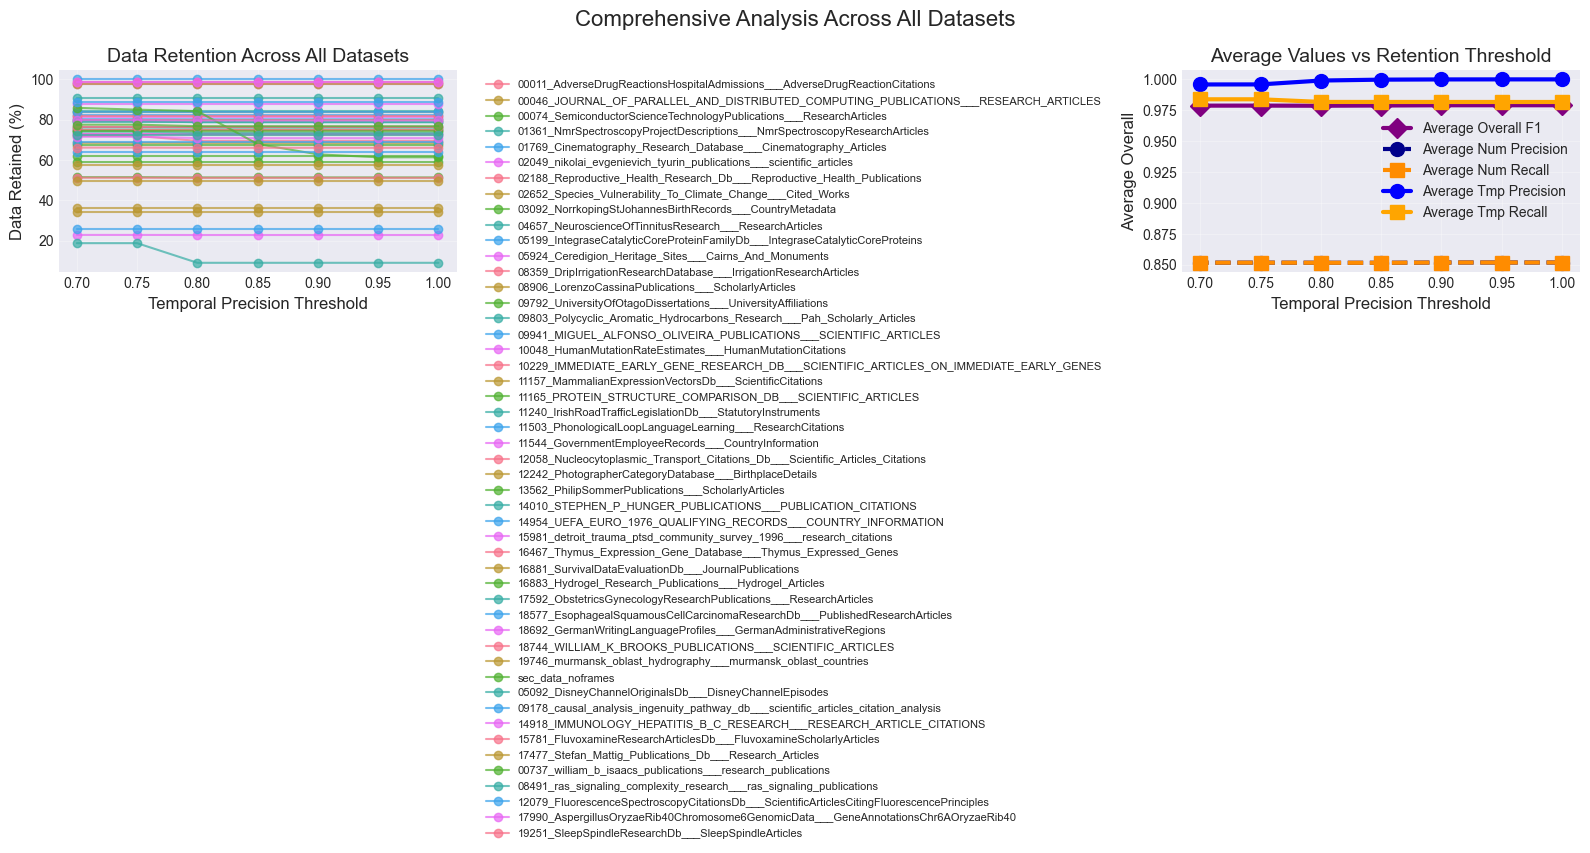

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for dataset in all_datasets_results:
    retention_pcts = [
        dataset["thresholds"][t]["retained_pct"]
        for t in thresholds
        if t in dataset["thresholds"]
    ]
    ax1.plot(
        thresholds[: len(retention_pcts)],
        retention_pcts,
        "o-",
        label=dataset["dataset_name"],
        alpha=0.7,
    )
ax1.set_xlabel("Temporal Precision Threshold", fontsize=12)
ax1.set_ylabel("Data Retained (%)", fontsize=12)
ax1.set_title("Data Retention Across All Datasets", fontsize=14)
ax1.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
ax1.grid(True, alpha=0.3)

# Plot average F1 scores
avg_f1_by_threshold = []
avg_num_f1 = []
avg_temp_f1 = []
avg_tmp_precision = []
avg_tmp_recall = []
avg_num_precision = []
avg_num_recall = []

for thresh in thresholds:
    f1s = [
        d["thresholds"][thresh]["overall_f1"]
        for d in all_datasets_results
        if thresh in d["thresholds"] and d["thresholds"][thresh]["overall_f1"] > 0
    ]
    num_precision = [
        d["thresholds"][thresh]["numeric_precision"]
        for d in all_datasets_results
        if thresh in d["thresholds"]
        and d["thresholds"][thresh]["numeric_precision"] > 0
    ]
    num_recall = [
        d["thresholds"][thresh]["numeric_recall"]
        for d in all_datasets_results
        if thresh in d["thresholds"] and d["thresholds"][thresh]["numeric_recall"] > 0
    ]
    tmp_precision = [
        d["thresholds"][thresh]["temporal_precision"]
        for d in all_datasets_results
        if thresh in d["thresholds"]
        and d["thresholds"][thresh]["temporal_precision"] > 0
    ]
    tmp_recall = [
        d["thresholds"][thresh]["temporal_recall"]
        for d in all_datasets_results
        if thresh in d["thresholds"] and d["thresholds"][thresh]["temporal_recall"] > 0
    ]
    avg_f1_by_threshold.append(np.mean(f1s) if f1s else 0)
    avg_num_precision.append(np.mean(num_precision) if num_precision else 0)
    avg_num_recall.append(np.mean(num_precision) if num_precision else 0)
    avg_tmp_precision.append(np.mean(tmp_precision) if tmp_precision else 0)
    avg_tmp_recall.append(np.mean(tmp_recall) if tmp_recall else 0)


ax2.plot(
    thresholds,
    avg_f1_by_threshold,
    "D-",
    color="purple",
    linewidth=3,
    markersize=10,
    label="Average Overall F1",
)
ax2.plot(
    thresholds,
    avg_num_precision,
    "o--",
    color="darkblue",
    linewidth=3,
    markersize=10,
    label="Average Num Precision",
)
ax2.plot(
    thresholds,
    avg_num_recall,
    "s--",
    color="darkorange",
    linewidth=3,
    markersize=10,
    label="Average Num Recall",
)
ax2.plot(
    thresholds,
    avg_tmp_precision,
    "o-",
    color="blue",
    linewidth=3,
    markersize=10,
    label="Average Tmp Precision",
)
ax2.plot(
    thresholds,
    avg_tmp_recall,
    "s-",
    color="orange",
    linewidth=3,
    markersize=10,
    label="Average Tmp Recall",
)


ax2.set_xlabel("Temporal Precision Threshold", fontsize=12)
ax2.set_ylabel("Average Overall", fontsize=12)
ax2.set_title("Average Values vs Retention Threshold", fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.suptitle("Comprehensive Analysis Across All Datasets", fontsize=16)
plt.tight_layout()
plt.show()


## Run a subset extractor with these different thresholds if you want to release only those amounts per dataset 

In [ ]:
for idx, row in meta_df.iterrows():
    dataset_name = row["dataset_name"]
    print(f"\n{'='*60}")
    for thresh in thresholds:
        result_100 = extractor.create_subset_dataset(
            dataset_name=dataset_name,
            precision_threshold=thresh,
            eval_column=column_name,
            metric_column="tmp_precision",
        )
        # check if result is empty before accessing stats:
        if not result_100:
            print(f"No subset created for {dataset_name} at threshold {thresh}")
            continue
        if "stats" not in result_100:
            print(f"No stats available for {dataset_name} at threshold {thresh}")
            continue

        print(f"\nImpact of removing rows with precision < {thresh}:")
        print(
            f"Original temporal precision: {result_100['stats']['original']['temporal_mean_precision']:.3f}"
        )
        print(
            f"After exclusion: {result_100['stats']['after_exclusion']['temporal_mean_precision']:.3f}"
        )
        print(
            f"Improvement: {result_100['stats']['improvements']['temporal_precision_improvement']:.3f}"
        )



Found 707 problmenatic rows out of 1085 evaluations


KeyboardInterrupt: 